In [ ]:
import hopsworks
project = hopsworks.login()
fs = project.get_feature_store(name='recipe_recommender_featurestore')
fg = fs.get_feature_group('review', version=1)
review_data = fg.read()

fg = fs.get_feature_group('recipe', version=2)
recipe_data = fg.read()


2024-12-13 11:26:03,043 INFO: Initializing external client
2024-12-13 11:26:03,045 INFO: Base URL: https://c.app.hopsworks.ai:443

Multiple projects found. 

	 (1) recipe_recommender
	 (2) twotowers

Enter number corresponding to the project to use: 1
2024-12-13 11:26:08,206 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1193139
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (37.78s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (97.28s) 


In [ ]:
fg = fs.get_feature_group('review', version=2)
review_data_2 = fg.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (23.62s) 


In [ ]:
# Display the DataFrame
print(recipe_data.head())

   recipe_id                                               name  totaltime  \
0      74693  [-0.11858532, -0.026803663, 0.004331223, -0.01...  -0.002155   
1     348593  [-0.049816504, 0.031972684, -0.054860238, 0.03...  -0.001754   
2     481289  [-0.029086659, -0.0066378973, -0.069572374, 0....  -0.001194   
3      97198  [0.04650832, -0.0252251, -0.020362781, -0.0263...  -0.002636   
4     271084  [0.024470098, 0.022764772, -0.13294053, -0.013...  -0.003277   

                                      recipecategory  aggregatedrating  \
0  [-0.04197564, -0.01328214, -0.038452026, 0.047...         -0.946508   
1  [-0.058947407, 0.038253948, 0.010567888, 0.028...          1.207007   
2  [0.005264935, 0.007629845, 0.0011869151, 0.039...         -0.946508   
3  [-0.03719919, 0.010785129, -0.06619944, 0.0736...         -0.946508   
4  [0.006180383, -0.008532286, -0.12505494, 0.001...         -0.946508   

   reviewcount  calories  fatcontent  saturatedfatcontent  cholesterolcontent  \
0    

In [ ]:
print(review_data.head())

   reviewid  recipe_id  user_id    rating  \
0    376275     201965   424680  0.465609   
1    565527     203782   667915  0.465609   
2    277879      36123   176615  0.465609   
3    746144      19177    52648 -0.320427   
4   1253618     255645   424680  0.465609   

                                              review      year  month_sin  \
0  [-0.03471386, -0.0034809876, 0.025403176, 0.01... -0.522026   0.866025   
1  [-0.048685435, -0.05063994, 0.0123515455, 0.07... -0.252375   0.500000   
2  [-0.10000747, -0.06447308, -0.005737721, 0.062... -0.791677   0.500000   
3  [-0.08373337, 0.005466032, -0.02001648, 0.0557... -0.252375  -0.500000   
4  [-0.06095889, -0.015254693, 0.03496923, -0.011...  0.556577  -1.000000   

      month_cos  
0  5.000000e-01  
1  8.660254e-01  
2 -8.660254e-01  
3  8.660254e-01  
4 -1.836970e-16  


In [ ]:
print(review_data_2.head())

   reviewid  recipe_id  user_id    rating  \
0     91973      13144    50778  0.465443   
1    724825      77397   629484  0.465443   
2    480933      26626    87680  0.465443   
3    194427       3595    83314  0.465443   
4     44461      32566    35526  0.465443   

                                              review      year  month_sin  \
0  Lovely.  I'm playing with the fresh ginger lev... -1.332569   1.000000   
1  I call this recipe 'fake cinnamon rolls'.  It ... -0.253116  -0.866025   
2  Fabulous recipe. I made these for a fundraiser... -0.522979  -1.000000   
3  An excellent cake! Unfortunately, I did not ha... -0.792843   0.866025   
4  Made these to go along with a roasted chicken ... -1.602432   1.000000   

      month_cos  
0  6.123234e-17  
1  5.000000e-01  
2 -1.836970e-16  
3  5.000000e-01  
4  6.123234e-17  


In [ ]:
print(recipe_data.shape)
print(review_data.shape)

(522517, 15)
(500000, 8)


In [ ]:
print(review_data_2.shape)

(1401982, 8)


ensure that review dataset 2 has the exact same reviews

In [ ]:
# select only the data2 reviews that are already used in the original data
filtered_review_data_2 = review_data_2[review_data_2["reviewid"].isin(review_data["reviewid"])]

# check shapes to see if its correct
print(filtered_review_data_2.shape)
print(review_data.shape)

# check the top
print(filtered_review_data_2.head())

review_data_2 = filtered_review_data_2


(500000, 8)
(500000, 8)
   reviewid  recipe_id  user_id    rating  \
0     91973      13144    50778  0.465443   
1    724825      77397   629484  0.465443   
5    387775     211598   135470 -1.106870   
6    420637     220314   162826  0.465443   
8    460462     199491    28995  0.465443   

                                              review      year  month_sin  \
0  Lovely.  I'm playing with the fresh ginger lev... -1.332569   1.000000   
1  I call this recipe 'fake cinnamon rolls'.  It ... -0.253116  -0.866025   
5  I thought this was Ok but the ladies in my Bib... -0.522979   1.000000   
6  Very tasty! When I make again; think I'll try ... -0.522979   0.500000   
8  AWESOME cheesecake- it came out perfect - than... -0.522979  -0.866025   

      month_cos  
0  6.123234e-17  
1  5.000000e-01  
5  6.123234e-17  
6 -8.660254e-01  
8 -5.000000e-01  


## different labels

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# pre-trained BERT-model
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name).to(device)

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development


vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# sentiment analysis of reviews
def get_sentiment_bert(review):
    with torch.no_grad():
        inputs = tokenizer(review, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
        outputs = model(**inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        sentiment_score = probabilities[:, -1].item()  # Score van meest positieve class
    return sentiment_score

# log transformations of rating
def log_transform_ratings(rating):
    transformed_rating = torch.log1p(torch.tensor(rating)) / torch.log1p(torch.tensor(5.0))
    return transformed_rating.item()

# combine sentiment and log transformed ratings to combined score
def combine_sentiment_and_rating(row):
    sentiment_score = row['sentiment_score']
    log_rating = row['log_transformed_rating']
    combined_score = 2 * (sentiment_score * log_rating) / (sentiment_score + log_rating + 1e-8)
    return combined_score

# sentimentanalysis for review data 2
print("Applying sentiment analysis to reviews...")
review_data_2['sentiment_score'] = review_data_2['review'].apply(get_sentiment_bert)

# log transformation for review data 2
print("Applying log transformation to ratings...")
review_data_2['log_transformed_rating'] = review_data_2['rating'].apply(log_transform_ratings)

# combined data for review data 2
print("Combining sentiment and ratings...")
review_data_2['combined_score'] = review_data_2.apply(combine_sentiment_and_rating, axis=1)

print("Preview of the updated dataset:")
print(review_data_2[['reviewid', 'combined_score']].head())

Applying sentiment analysis to reviews...
Applying log transformation to ratings...
Combining sentiment and ratings...
Preview of the updated dataset:
   reviewid  combined_score
0     91973        0.322536
1    724825        0.322602
5    387775             NaN
6    420637        0.268046
8    460462        0.347447


In [ ]:
print(review_data_2.shape)

(500000, 11)


In [ ]:
# NaN values in 'combined_score'
print("Aantal NaN-waarden in 'combined_score':", review_data_2['combined_score'].isna().sum())

# remove rows with NaN in combined score
review_data_2_cleaned = review_data_2.dropna(subset=['combined_score'])

# remove the 'sentiment_score' and 'log_transformed_rating' columns, not necessary for the labels or model
review_data_2_cleaned = review_data_2_cleaned.drop(columns=['sentiment_score', 'log_transformed_rating'])

# check shape
print("\nAantal rijen na verwijderen van NaN-waarden in 'combined_score':")
print(review_data_2_cleaned.shape)

# check data
print("\nPreview of cleaned data:")
print(review_data_2_cleaned.head())

review_data_2 = review_data_2_cleaned

Aantal NaN-waarden in 'combined_score': 57130

Aantal rijen na verwijderen van NaN-waarden in 'combined_score':
(442870, 9)

Preview of cleaned data:
    reviewid  recipe_id  user_id    rating  \
0      91973      13144    50778  0.465443   
1     724825      77397   629484  0.465443   
6     420637     220314   162826  0.465443   
8     460462     199491    28995  0.465443   
10    350324       3595   211184  0.465443   

                                               review      year     month_sin  \
0   Lovely.  I'm playing with the fresh ginger lev... -1.332569  1.000000e+00   
1   I call this recipe 'fake cinnamon rolls'.  It ... -0.253116 -8.660254e-01   
6   Very tasty! When I make again; think I'll try ... -0.522979  5.000000e-01   
8   AWESOME cheesecake- it came out perfect - than... -0.522979 -8.660254e-01   
10  This cake was a hit last night at my SIL's. Un... -0.792843 -2.449294e-16   

       month_cos  combined_score  
0   6.123234e-17        0.322536  
1   5.000000e-01

#### the rating all looks weird the same, so ill copy it from the review data 1

In [ ]:
# merge the rating from review into review data 2 based on `reviewid`, ensure we have the correct ratings
review_data_2 = review_data_2.merge(
    review_data[['reviewid', 'rating']],
    on='reviewid',
    suffixes=('', '_original'),
    how='left'
)

# use right ratings in data 2, just to be sure
review_data_2['rating'] = review_data_2['rating_original']

# drop temporary `rating_original` column
review_data_2.drop(columns=['rating_original'], inplace=True)

# check results
print("Ratings overwritten successfully!")
print(review_data_2.info())  # no columns were lost
print(review_data_2[['reviewid', 'rating']].head())


Ratings overwritten successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442870 entries, 0 to 442869
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewid        442870 non-null  int64  
 1   recipe_id       442870 non-null  int64  
 2   user_id         442870 non-null  int64  
 3   rating          442870 non-null  float64
 4   review          442870 non-null  object 
 5   year            442870 non-null  float64
 6   month_sin       442870 non-null  float64
 7   month_cos       442870 non-null  float64
 8   combined_score  442870 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 30.4+ MB
None
   reviewid    rating
0     91973  0.465609
1    724825  0.465609
2    420637  0.465609
3    460462  0.465609
4    350324  0.465609


## other stuff

In [ ]:
review_data.rename(columns={'authorid' : 'user_id', 'recipeid' : 'recipe_id'}, inplace=True)
review_data_2.rename(columns={'authorid' : 'user_id', 'recipeid' : 'recipe_id'}, inplace=True)

In [ ]:
combined_data = review_data.merge(recipe_data, on='recipe_id', how='left')
combined_data_2 = review_data_2.merge(recipe_data, on='recipe_id', how='left')

print("\nCombined DataFrame:")
print(combined_data.shape)
print(combined_data.head())
print(combined_data['rating'].describe())


print("\nCombined DataFrame 2:")
print(combined_data_2.shape)
print(combined_data_2.head())
print(combined_data_2['combined_score'].describe())



Combined DataFrame:
(500000, 22)
   reviewid  recipe_id  user_id    rating  \
0    376275     201965   424680  0.465609   
1    565527     203782   667915  0.465609   
2    277879      36123   176615  0.465609   
3    746144      19177    52648 -0.320427   
4   1253618     255645   424680  0.465609   

                                              review      year  month_sin  \
0  [-0.03471386, -0.0034809876, 0.025403176, 0.01... -0.522026   0.866025   
1  [-0.048685435, -0.05063994, 0.0123515455, 0.07... -0.252375   0.500000   
2  [-0.10000747, -0.06447308, -0.005737721, 0.062... -0.791677   0.500000   
3  [-0.08373337, 0.005466032, -0.02001648, 0.0557... -0.252375  -0.500000   
4  [-0.06095889, -0.015254693, 0.03496923, -0.011...  0.556577  -1.000000   

      month_cos                                               name  totaltime  \
0  5.000000e-01  [-0.06611006, -0.0069223987, 0.018684912, 0.02...  -0.003966   
1  8.660254e-01  [-0.062545806, -0.094709985, -0.0037616168, 0....  -0

In [ ]:
lower_cap = combined_data_2['combined_score'].quantile(0.01)
upper_cap = combined_data_2['combined_score'].quantile(0.99)

combined_data_2['combined_score'] = combined_data_2['combined_score'].clip(lower=lower_cap, upper=upper_cap)


## create labels on rating

In [ ]:
# rating avg for labels
mean_rating = combined_data['rating'].mean()

# generate labels based on the mean
combined_data['label'] = (combined_data['rating'] > mean_rating).astype(int)

# check
print(f"Mean rating: {mean_rating}")
print(combined_data['label'].value_counts())
print(combined_data['label'].value_counts(normalize=True) * 100)


Mean rating: 0.0013967873357576017
label
1    361064
0    138936
Name: count, dtype: int64
label
1    72.2128
0    27.7872
Name: proportion, dtype: float64


## create labels on combined scorre (rating + review)

In [ ]:
# combined score avg for the labels
mean_combined_score = combined_data_2['combined_score'].mean()

# generate labels based on the mean
combined_data_2['label'] = (combined_data_2['combined_score'] > mean_combined_score).astype(int)

# check
print(f"Mean combined score: {mean_combined_score}")
print(combined_data_2['label'].value_counts())
print(combined_data_2['label'].value_counts(normalize=True) * 100)


Mean combined score: 0.17818863496595616
label
1    357741
0     85129
Name: count, dtype: int64
label
1    80.777881
0    19.222119
Name: proportion, dtype: float64


In [ ]:
# filter column names
required_columns = ["name", "recipecategory"]

# check missing or empty values
combined_data_filtered = combined_data.dropna(subset=required_columns)  # Verwijder rijen met NaN
combined_data_filtered = combined_data_filtered[
    (combined_data_filtered["name"].str.strip() != '') &
    (combined_data_filtered["recipecategory"].str.strip() != '')
]


# reset index
combined_data = combined_data_filtered.reset_index(drop=True)

# check
print(f"New shape of combined_data: {combined_data.shape}")
print(combined_data.info())



New shape of combined_data: (499993, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499993 entries, 0 to 499992
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   reviewid             499993 non-null  int64  
 1   recipe_id            499993 non-null  int64  
 2   user_id              499993 non-null  int64  
 3   rating               499993 non-null  float64
 4   review               499993 non-null  object 
 5   year                 499993 non-null  float64
 6   month_sin            499993 non-null  float64
 7   month_cos            499993 non-null  float64
 8   name                 499993 non-null  object 
 9   totaltime            499993 non-null  float64
 10  recipecategory       499993 non-null  object 
 11  aggregatedrating     499993 non-null  float64
 12  reviewcount          499993 non-null  float64
 13  calories             499993 non-null  float64
 14  fatcontent           499993

In [ ]:
# filter column names
required_columns_2 = ["name", "recipecategory"]

# check missing or empty values
combined_data_2_filtered = combined_data_2.dropna(subset=required_columns_2)
combined_data_2_filtered = combined_data_2_filtered[
    (combined_data_2_filtered["name"].str.strip() != '') &
    (combined_data_2_filtered["recipecategory"].str.strip() != '')
]

# reset index
combined_data_2 = combined_data_2_filtered.reset_index(drop=True)

# check
print(f"New shape of combined_data_2: {combined_data_2.shape}")
print(combined_data_2.info())


New shape of combined_data_2: (442864, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442864 entries, 0 to 442863
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   reviewid             442864 non-null  int64  
 1   recipe_id            442864 non-null  int64  
 2   user_id              442864 non-null  int64  
 3   rating               442864 non-null  float64
 4   review               442864 non-null  object 
 5   year                 442864 non-null  float64
 6   month_sin            442864 non-null  float64
 7   month_cos            442864 non-null  float64
 8   combined_score       442864 non-null  float64
 9   name                 442864 non-null  object 
 10  totaltime            442864 non-null  float64
 11  recipecategory       442864 non-null  object 
 12  aggregatedrating     442864 non-null  float64
 13  reviewcount          442864 non-null  float64
 14  calories             4428

#### check correlations

In [ ]:
import pandas as pd

combined_data['label'] = combined_data['label'].astype('int64')
numerical_data = combined_data.select_dtypes(include=['float64', 'int64'])
print(numerical_data.corr()['label'])



reviewid              -0.051818
recipe_id             -0.002280
user_id               -0.086541
rating                 0.749829
year                  -0.054722
month_sin             -0.001837
month_cos             -0.010472
totaltime             -0.003110
aggregatedrating       0.406290
reviewcount            0.020643
calories              -0.000507
fatcontent             0.003611
saturatedfatcontent    0.003549
cholesterolcontent    -0.006609
sodiumcontent          0.005928
carbohydratecontent   -0.002466
fibercontent          -0.001466
sugarcontent           0.003842
proteincontent        -0.009771
label                  1.000000
Name: label, dtype: float64


In [ ]:
combined_data_2['label'] = combined_data_2['label'].astype('int64')
numerical_data_2 = combined_data_2.select_dtypes(include=['float64', 'int64'])
print(numerical_data_2.corr()['label'])


reviewid               0.022898
recipe_id             -0.000258
user_id                0.006509
rating                 0.734564
year                   0.020158
month_sin              0.001261
month_cos             -0.001500
combined_score         0.735740
totaltime             -0.001141
aggregatedrating       0.287512
reviewcount            0.028205
calories               0.001117
fatcontent             0.001168
saturatedfatcontent    0.000424
cholesterolcontent    -0.003216
sodiumcontent          0.006408
carbohydratecontent    0.003230
fibercontent          -0.006288
sugarcontent           0.010124
proteincontent        -0.008547
label                  1.000000
Name: label, dtype: float64


### authors with more than one review

## Training and test set for labels based on rating

In [ ]:
from sklearn.model_selection import train_test_split

# select active users with more than 20 reviews
user_review_counts = combined_data.groupby("user_id").size().reset_index(name="review_count")
active_users = user_review_counts[user_review_counts["review_count"] > 20]
active_user_ids = active_users["user_id"].tolist()

# filter data to active users
active_user_data = combined_data[combined_data["user_id"].isin(active_user_ids)]

# split data per user based based on best reviews
train_data = []
test_data = []

for user_id, user_reviews in active_user_data.groupby("user_id"):
    # sort reviews high to low
    user_reviews_sorted = user_reviews.sort_values(by="rating", ascending=False)

    # use top 20% as testset
    test_size = max(1, int(0.2 * len(user_reviews_sorted)))  # at least 1 in the test set, not really necessary since its for active users right
    test_reviews = user_reviews_sorted.head(test_size)

    # use the rest as trainset
    train_reviews = user_reviews_sorted.iloc[test_size:]

    # add both to their respective list
    train_data.append(train_reviews)
    test_data.append(test_reviews)

# combine all splits
train_data = pd.concat(train_data).reset_index(drop=True)
test_data = pd.concat(test_data).reset_index(drop=True)

# readd all the inactive users to the trainingsdataset
inactive_user_data = combined_data[~combined_data["user_id"].isin(active_user_ids)]
train_data = pd.concat([train_data, inactive_user_data]).reset_index(drop=True)

# check sizes
print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")


Train set size: 447753
Test set size: 52240


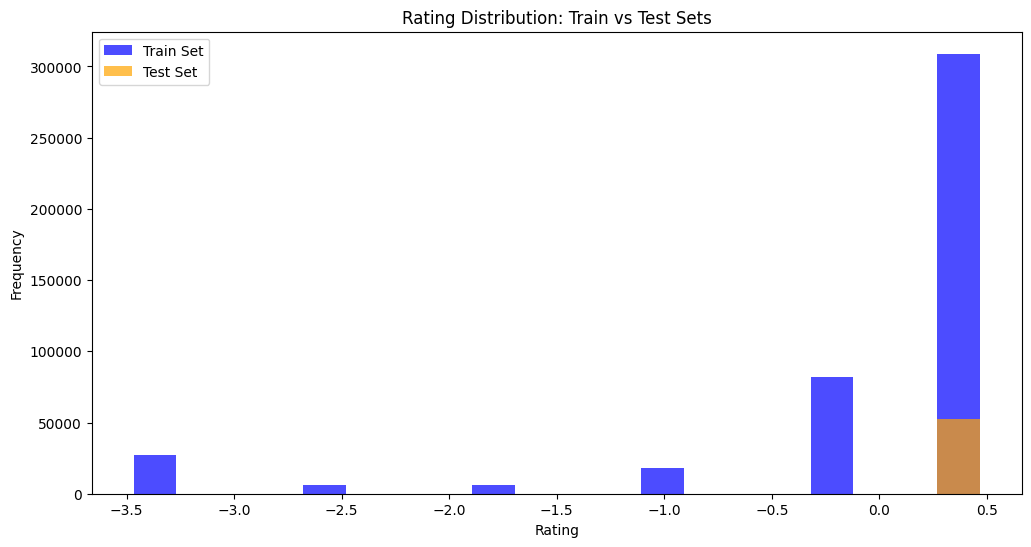

In [ ]:
import matplotlib.pyplot as plt

# plot trainingsset
plt.figure(figsize=(12, 6))
plt.hist(train_data["rating"], bins=20, alpha=0.7, label="Train Set", color="blue")
plt.hist(test_data["rating"], bins=20, alpha=0.7, label="Test Set", color="orange")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating Distribution: Train vs Test Sets")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# select active users with more than 20 reviews
user_review_counts_2 = combined_data_2.groupby("user_id").size().reset_index(name="review_count")
active_users_2 = user_review_counts_2[user_review_counts_2["review_count"] > 20]
active_user_ids_2 = active_users_2["user_id"].tolist()

# filter data to active users
active_user_data_2 = combined_data_2[combined_data_2["user_id"].isin(active_user_ids_2)]

# split data per user based on best reviews
train_data_2 = []
test_data_2 = []

for user_id, user_reviews in active_user_data_2.groupby("user_id"):
    # sort reviews by high combined score (instead of rating)
    user_reviews_sorted = user_reviews.sort_values(by="combined_score", ascending=False)

    # use top 20% as test set
    test_size = max(1, int(0.2 * len(user_reviews_sorted)))  # Ensure at least 1 review in the test set
    test_reviews = user_reviews_sorted.head(test_size)

    # use the rest as train set
    train_reviews = user_reviews_sorted.iloc[test_size:]

    # add both to their respective lists
    train_data_2.append(train_reviews)
    test_data_2.append(test_reviews)

# combine all splits
train_data_2 = pd.concat(train_data_2).reset_index(drop=True)
test_data_2 = pd.concat(test_data_2).reset_index(drop=True)

# readd all the inactive users to the training dataset
inactive_user_data_2 = combined_data_2[~combined_data_2["user_id"].isin(active_user_ids_2)]
train_data_2 = pd.concat([train_data_2, inactive_user_data_2]).reset_index(drop=True)

# check sizes
print(f"Train set size (combined_data_2): {len(train_data_2)}")
print(f"Test set size (combined_data_2): {len(test_data_2)}")


Train set size (combined_data_2): 394915
Test set size (combined_data_2): 47949


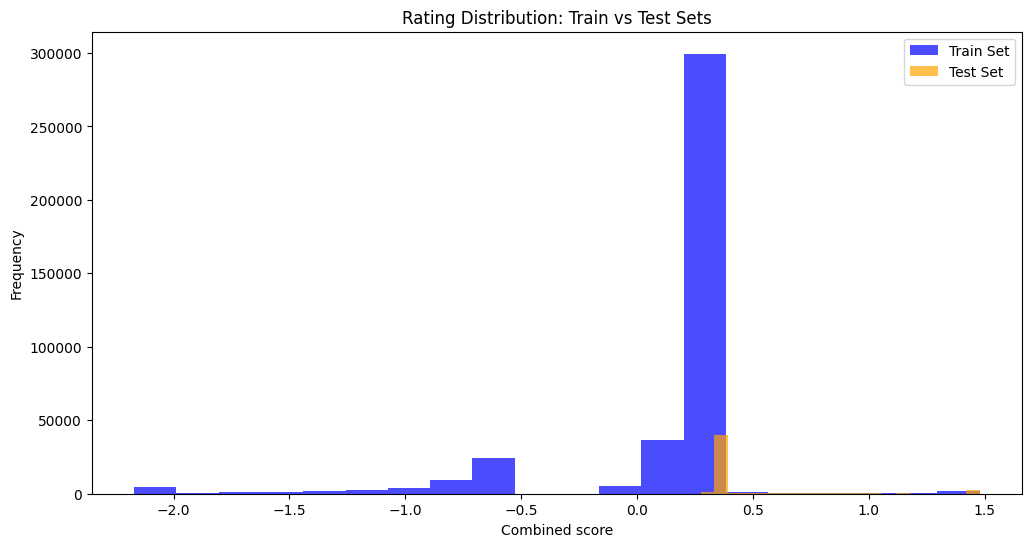

In [ ]:
import matplotlib.pyplot as plt

# plot trainigsset
plt.figure(figsize=(12, 6))
plt.hist(train_data_2["combined_score"], bins=20, alpha=0.7, label="Train Set", color="blue")
plt.hist(test_data_2["combined_score"], bins=20, alpha=0.7, label="Test Set", color="orange")
plt.xlabel("Combined score")
plt.ylabel("Frequency")
plt.title("Rating Distribution: Train vs Test Sets")
plt.legend()
plt.show()


## correct features

In [ ]:
# Review tower features
review_features = {
    "user_id": train_data["user_id"].values, # Author review
    "review": train_data["review"].values,  # Embedding review
    "year": train_data["year"].values,
    "month_sin": train_data["month_sin"].values,
    "month_cos": train_data["month_cos"].values,
}

# Recipe tower features
recipe_features = {
    "name": train_data["name"].values,  # Embedding recipename
    "totaltime": train_data["totaltime"].values,
    "recipecategory": train_data["recipecategory"].values,  # Embedding recipecategory
    "aggregatedrating": train_data["aggregatedrating"].values,
    "reviewcount": train_data["reviewcount"].values,
    "calories": train_data["calories"].values,
    "fatcontent": train_data["fatcontent"].values,
    "saturatedfatcontent": train_data["saturatedfatcontent"].values,
    "cholesterolcontent": train_data["cholesterolcontent"].values,
    "sodiumcontent": train_data["sodiumcontent"].values,
    "carbohydratecontent": train_data["carbohydratecontent"].values,
    "fibercontent": train_data["fibercontent"].values,
    "sugarcontent": train_data["sugarcontent"].values,
    "proteincontent": train_data["proteincontent"].values,
}

# Labels
labels = train_data["label"].values


In [ ]:
# Review tower features for train_data_2
review_features_2 = {
    "user_id": train_data_2["user_id"].values,  # Author review
    "review": train_data_2["review"].values,   # Embedding review
    "year": train_data_2["year"].values,
    "month_sin": train_data_2["month_sin"].values,
    "month_cos": train_data_2["month_cos"].values,
}

# Recipe tower features for train_data_2
recipe_features_2 = {
    "name": train_data_2["name"].values,  # Embedding recipename
    "totaltime": train_data_2["totaltime"].values,
    "recipecategory": train_data_2["recipecategory"].values,  # Embedding recipecategory
    "aggregatedrating": train_data_2["aggregatedrating"].values,
    "reviewcount": train_data_2["reviewcount"].values,
    "calories": train_data_2["calories"].values,
    "fatcontent": train_data_2["fatcontent"].values,
    "saturatedfatcontent": train_data_2["saturatedfatcontent"].values,
    "cholesterolcontent": train_data_2["cholesterolcontent"].values,
    "sodiumcontent": train_data_2["sodiumcontent"].values,
    "carbohydratecontent": train_data_2["carbohydratecontent"].values,
    "fibercontent": train_data_2["fibercontent"].values,
    "sugarcontent": train_data_2["sugarcontent"].values,
    "proteincontent": train_data_2["proteincontent"].values,
}

# Labels for train_data_2
labels_2 = train_data_2["label"].values

# Verification
print("Review Features:", review_features_2.keys())
print("Recipe Features:", recipe_features_2.keys())
print("Labels shape:", labels_2.shape)


Review Features: dict_keys(['user_id', 'review', 'year', 'month_sin', 'month_cos'])
Recipe Features: dict_keys(['name', 'totaltime', 'recipecategory', 'aggregatedrating', 'reviewcount', 'calories', 'fatcontent', 'saturatedfatcontent', 'cholesterolcontent', 'sodiumcontent', 'carbohydratecontent', 'fibercontent', 'sugarcontent', 'proteincontent'])
Labels shape: (394915,)


# Dataset and Dataloader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
class CombinedDataset(Dataset):
    def __init__(self, combined_df):
        """
        Args:
            reviews_df (pd.DataFrame): Dataframe containing the reviews data.
        """
        self.features = combined_df

    def __len__(self):
        # Return the total number of samples
        return len(self.features)

    def __getitem__(self, idx):
        """
        Args:
            idx (int): Index of the sample to fetch.
        Returns:
            A dictionary with tensors for the input features and target rating.
        """
        row = self.features.iloc[idx]

        # Extract features
        user_id = row["user_id"]
        user_id_index = row["user_id_index"]
        recipe_id = row["recipe_id"]
        recipe_id_index = row["recipe_id_index"]
        year = torch.tensor(row["year"], dtype=torch.float32)
        month_sin = torch.tensor(row["month_sin"], dtype=torch.float32)
        month_cos = torch.tensor(row["month_cos"], dtype=torch.float32)
        rating = torch.tensor(row["rating"], dtype=torch.float32)
        name_embedding = torch.tensor(row["name"], dtype=torch.float32)
        total_time = torch.tensor(row["totaltime"], dtype=torch.float32)
        category_embedding = torch.tensor(row["recipecategory"], dtype=torch.float32)
        aggr_rating = torch.tensor(row["aggregatedrating"], dtype=torch.float32)
        review_count = torch.tensor(row["reviewcount"], dtype=torch.float32)
        calories = torch.tensor(row["calories"], dtype=torch.float32)
        fat_content = torch.tensor(row["fatcontent"], dtype=torch.float32)
        saturated_fat_content = torch.tensor(row["saturatedfatcontent"], dtype=torch.float32)
        cholesterol_content = torch.tensor(row["cholesterolcontent"], dtype=torch.float32)
        sodium_content = torch.tensor(row["sodiumcontent"], dtype=torch.float32)
        carbohydrate_content = torch.tensor(row["carbohydratecontent"], dtype=torch.float32)
        fiber_content = torch.tensor(row["fibercontent"], dtype=torch.float32)
        sugar_content = torch.tensor(row["sugarcontent"], dtype=torch.float32)
        protein_content = torch.tensor(row["proteincontent"], dtype=torch.float32)
        label = row["label"]
        return {
            "user_id": user_id,
            "user_id_index": user_id_index,
            "recipe_id": recipe_id,
            "recipe_id_index": recipe_id_index,
            "year": year,
            "month_sin": month_sin,
            "month_cos": month_cos,
            "name_embedding": name_embedding,
            "total_time": total_time,
            "category_embedding": category_embedding,
            "aggr_rating": aggr_rating,
            "calories": calories,
            "review_count" : review_count,
            "fat_content": fat_content,
            "saturated_fat_content": saturated_fat_content,
            "cholesterol_content": cholesterol_content,
            "sodium_content" : sodium_content,
            "carbohydrate_content" : carbohydrate_content,
            "fiber_content" : fiber_content,
            "sugar_content" : sugar_content,
            "protein_content" : protein_content,
            "label" : label
        }

# Models

## User Tower

In [ ]:
class UserTower(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        """
        Args:
            review_embedding_dim (int): Dimensionality of the review feature vector.
            embedding_dim (int): Dimensionality of the output embedding vector.
        """
        super(UserTower, self).__init__()
        self.embedding_dim = embedding_dim

        self.user_embedding = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=self.embedding_dim)

        self.fc1 = nn.Linear(embedding_dim + 3, 128)  # Double check what first dimension should be: embedding_dim + month_sin, month_cos, and year, and rating?
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, embedding_dim)  # Final embedding layer

    def forward(self, user_id, month_sin=None, month_cos=None, year=None, rating=None):
        """
        Forward pass for the review tower.

        Args:
            user_id (Tensor): User ID tensor.
            month_sin (Tensor): Sinusoidal month feature.
            month_cos (Tensor): Cosine month feature.
            year (Tensor): Year feature.
            rating (Tensor): Rating given to recipe

        Returns:
            Tensor: user review embedding of size embedding_dim.
        """

        user_id_embedding = self.user_embedding(user_id)

        if not self.training:
            return user_id_embedding

        # Concatenate all features (now all are 2D tensors)
        x = torch.cat((user_id_embedding, month_sin.unsqueeze(1), month_cos.unsqueeze(1), year.unsqueeze(1)), dim=1)

        # Pass through fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Final embedding vector
        return x

## Item Tower

In [ ]:
class ItemTower(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, recipe_embedding_dim):
        """
        Args:
            review_vector_dim (int): Dimensionality of the review feature vector.
            embedding_dim (int): Dimensionality of the output embedding vector.
        """
        super(ItemTower, self).__init__()

        self.embedding_dim = embedding_dim

        self.item_embedding = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=self.embedding_dim)

        self.fc1 = nn.Linear(embedding_dim + recipe_embedding_dim * 2 + 12, 128)  # Add month_sin, month_cos, and year, and rating
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, embedding_dim)  # Final embedding layer

    def forward(self, recipe_id, name_embedding, total_time, category_embedding,
                aggr_rating, review_count, calories, fat_content, saturated_fat_content,
                cholesterol_content, sodium_content, carbohydrate_content, fiber_content,
                sugar_content, protein_content
                ):
        """
        Forward pass for the recipe tower.

        Args:
            name_embedding (Tensor): Embedding made for the recipe name.
            author_id (Tensor): ID for the author.
            total_time (Tensor): Parsed total time taken to prepare the recipe.
            category_embedding (Tensor): Embedding made for the recipe category.
            aggr_rating (Tensor): Average rating for the recipe.
            review_count (Tensor): Count of reviews for the recipe.
            (The rest are very self-explanatory)

        Returns:
            Tensor: Embedded vector for the review.
        """
        recipe_id = recipe_id.long()
        item_id_embedding = self.item_embedding(recipe_id)

        # Concatenate all features
        x = torch.cat((
        item_id_embedding,
        name_embedding,
        total_time.unsqueeze(1),
        category_embedding,
        aggr_rating.unsqueeze(1),
        review_count.unsqueeze(1),
        calories.unsqueeze(1),
        fat_content.unsqueeze(1),
        saturated_fat_content.unsqueeze(1),
        cholesterol_content.unsqueeze(1),
        sodium_content.unsqueeze(1),
        carbohydrate_content.unsqueeze(1),
        fiber_content.unsqueeze(1),
        sugar_content.unsqueeze(1),
        protein_content.unsqueeze(1)
        ), dim=1)

        # Pass through fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Final embedding vector
        return x


In [ ]:
class TwoTowerRecommender(nn.Module):
    def __init__(self):
        super(TwoTowerRecommender, self).__init__()

    def forward(self, user_embedding, item_embedding):
        # Compute cosine similarity
        similarity = F.cosine_similarity(user_embedding, item_embedding, dim=1)
        # scale from [-1, 1] to [0, 1] for BCE loss
        similarity = torch.clamp(0.5 * (similarity + 1), min=0, max=1)
        return similarity


# Tower Testing for labels based on rating

In [ ]:
# Create a mapping from user_id to indices
unique_user_ids = train_data['user_id'].unique()
user_id_to_index = {user_id: idx for idx, user_id in enumerate(unique_user_ids)}

# Apply the mapping to the DataFrame or DataLoader
train_data['user_id_index'] = train_data['user_id'].map(user_id_to_index)


In [ ]:
# Create a mapping from recipe_id to indices
unique_recipe_ids = train_data['recipe_id'].unique()
recipe_id_to_index = {recipe_id: idx for idx, recipe_id in enumerate(unique_recipe_ids)}

# Apply the mapping to the DataFrame or DataLoader
train_data['recipe_id_index'] = train_data['recipe_id'].map(recipe_id_to_index)


In [ ]:
# Apply the same mapping to the test data
test_data['user_id_index'] = test_data['user_id'].map(user_id_to_index)
test_data['recipe_id_index'] = test_data['recipe_id'].map(recipe_id_to_index)


In [ ]:
from torch.utils.data import DataLoader

NUM_USERS = 271_907
NUM_RECIPES = 522_517

batch_size = 32

# Create review and recipe dataloaders
# Create the dataset
dataset = CombinedDataset(train_data)


# Define dimensions
embedding_dim = 32  # Size of the output embedding vector (arbitrary, tunable)
review_embedding_dim = recipe_embedding_dim = 384  # Dimensionality of the "review" feature

# Initialize the model
user_tower = UserTower(num_embeddings=NUM_USERS, embedding_dim=embedding_dim)
item_tower = ItemTower(num_embeddings=NUM_RECIPES, embedding_dim=embedding_dim, recipe_embedding_dim=recipe_embedding_dim)

# Create a DataLoader for batching
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


# Example: Iterate through the DataLoader
for batch in dataloader:
    user_embeddings = user_tower(batch["user_id_index"], batch["month_sin"], batch["month_cos"], batch["year"])
    item_embeddings = item_tower(
        batch["recipe_id"],
        batch["name_embedding"],
        batch["total_time"],
        batch["category_embedding"],
        batch["aggr_rating"],
        batch["review_count"],
        batch["calories"],
        batch["fat_content"],
        batch["saturated_fat_content"],
        batch["cholesterol_content"],
        batch["sodium_content"],
        batch["carbohydrate_content"],
        batch["fiber_content"],
        batch["sugar_content"],
        batch["protein_content"]
    )
    print("User Embedding shape:", user_embeddings.shape)
    print(user_embeddings)
    print("Item Embedding shape:", item_embeddings.shape)
    print(item_embeddings)
    break

User Embedding shape: torch.Size([64, 32])
tensor([[-0.0632, -0.1120, -0.1491,  ...,  0.0035, -0.0152,  0.0385],
        [ 0.0224,  0.1300, -0.1150,  ..., -0.0662,  0.0219,  0.0608],
        [ 0.1315,  0.0404,  0.0413,  ..., -0.1115, -0.1367,  0.2479],
        ...,
        [-0.0364,  0.0007, -0.0214,  ..., -0.1529, -0.0563,  0.1600],
        [-0.0276, -0.0298, -0.0929,  ..., -0.0432, -0.0452,  0.0609],
        [ 0.1521,  0.0148,  0.0375,  ..., -0.0497, -0.0517,  0.1707]],
       grad_fn=<AddmmBackward0>)
Item Embedding shape: torch.Size([64, 32])
tensor([[-0.0741,  0.0081, -0.0964,  ...,  0.0690, -0.0027,  0.1005],
        [-0.0713,  0.0329, -0.0856,  ...,  0.0246, -0.0126,  0.1086],
        [-0.0514,  0.0117, -0.0823,  ...,  0.0320, -0.0360,  0.1173],
        ...,
        [-0.1144,  0.0465, -0.1090,  ...,  0.0027, -0.0507,  0.0796],
        [-0.0815,  0.0249, -0.0870,  ...,  0.0463, -0.0357,  0.1076],
        [-0.0377,  0.0149, -0.1079,  ...,  0.0487, -0.0180,  0.1259]],
       grad_f

# Tower Testing for labels based on rating and review

In [ ]:
# Create mappings for user_id and recipe_id in train_data_2
unique_user_ids_2 = train_data_2['user_id'].unique()
user_id_to_index_2 = {user_id: idx for idx, user_id in enumerate(unique_user_ids_2)}
train_data_2['user_id_index'] = train_data_2['user_id'].map(user_id_to_index_2)

unique_recipe_ids_2 = train_data_2['recipe_id'].unique()
recipe_id_to_index_2 = {recipe_id: idx for idx, recipe_id in enumerate(unique_recipe_ids_2)}
train_data_2['recipe_id_index'] = train_data_2['recipe_id'].map(recipe_id_to_index_2)

# Apply the same mappings to test_data_2
test_data_2['user_id_index'] = test_data_2['user_id'].map(user_id_to_index_2)
test_data_2['recipe_id_index'] = test_data_2['recipe_id'].map(recipe_id_to_index_2)


In [ ]:
NUM_USERS_2 = len(train_data_2['user_id_index'].unique())
NUM_RECIPES_2 = len(train_data_2['recipe_id_index'].unique())


# Create the dataset for train_data_2
dataset_2 = CombinedDataset(train_data_2)

# Create the DataLoader for batching
batch_size = 64
dataloader_2 = DataLoader(dataset_2, batch_size=batch_size, shuffle=True)

# Define dimensions
embedding_dim = 32  # Size of the output embedding vector (arbitrary, tunable)
review_embedding_dim = recipe_embedding_dim = 384  # Dimensionality of the "review" feature

# Initialize the models
user_tower_2 = UserTower(num_embeddings=NUM_USERS_2, embedding_dim=embedding_dim)
item_tower_2 = ItemTower(num_embeddings=NUM_RECIPES_2, embedding_dim=embedding_dim, recipe_embedding_dim=recipe_embedding_dim)


# Example: Iterate through the DataLoader for train_data_2
for batch in dataloader_2:
    user_embeddings = user_tower_2(
        batch["user_id_index"],
        batch["month_sin"],
        batch["month_cos"],
        batch["year"]
    )
    item_embeddings = item_tower_2(
        batch["recipe_id_index"],
        batch["name_embedding"],
        batch["total_time"],
        batch["category_embedding"],
        batch["aggr_rating"],
        batch["review_count"],
        batch["calories"],
        batch["fat_content"],
        batch["saturated_fat_content"],
        batch["cholesterol_content"],
        batch["sodium_content"],
        batch["carbohydrate_content"],
        batch["fiber_content"],
        batch["sugar_content"],
        batch["protein_content"]
    )
    print("User Embedding shape:", user_embeddings.shape)
    print(user_embeddings)
    print("Item Embedding shape:", item_embeddings.shape)
    print(item_embeddings)
    break



User Embedding shape: torch.Size([64, 32])
tensor([[ 0.0562, -0.0639,  0.0826,  ...,  0.2361, -0.0030, -0.0171],
        [ 0.1498, -0.0134,  0.2390,  ...,  0.0824,  0.0046,  0.0054],
        [ 0.1102,  0.0168,  0.2061,  ...,  0.1156, -0.0993,  0.0024],
        ...,
        [ 0.1395,  0.0344,  0.2193,  ...,  0.1408,  0.0936,  0.0471],
        [ 0.2067, -0.0079,  0.2767,  ...,  0.0711,  0.0238,  0.0113],
        [ 0.0680, -0.0915,  0.1864,  ...,  0.0666, -0.0488,  0.0438]],
       grad_fn=<AddmmBackward0>)
Item Embedding shape: torch.Size([64, 32])
tensor([[-0.1379,  0.0324, -0.0181,  ...,  0.0909, -0.1370,  0.1233],
        [-0.4967,  0.3038, -0.1000,  ...,  0.1394, -0.2304, -0.1583],
        [-0.1464,  0.0566, -0.0141,  ...,  0.0637, -0.1312,  0.0829],
        ...,
        [-0.1021,  0.0237, -0.0379,  ...,  0.0662, -0.1169,  0.1247],
        [-0.1397,  0.0149, -0.0332,  ...,  0.0773, -0.1095,  0.0950],
        [-0.1152,  0.0594, -0.0024,  ...,  0.0658, -0.1139,  0.1196]],
       grad_f

# Training labels on rating

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from tqdm import tqdm

# Number of epochs and learning rate
num_epochs = 20
learning_rate = 1e-3

# Initialize models
user_tower = UserTower(num_embeddings=NUM_USERS, embedding_dim=embedding_dim)
item_tower = ItemTower(num_embeddings=NUM_RECIPES, embedding_dim=embedding_dim, recipe_embedding_dim=recipe_embedding_dim)
model = TwoTowerRecommender()

# Define optimizer
optimizer = optim.Adam(list(user_tower.parameters()) + list(item_tower.parameters()), lr=learning_rate)

label_counts = train_data['label'].value_counts()
total_samples = label_counts[0] + label_counts[1]
class_weights = torch.tensor([
    total_samples / (2.0 * label_counts[0]),
    total_samples / (2.0 * label_counts[1])
], dtype=torch.float32)


# Set models to training mode
user_tower.train()
item_tower.train()
model.train()

# Create DataLoader for the dataset
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Early stopping parameters
patience = 2  # Number of epochs to wait for improvement
best_loss = float('inf')
wait = 0  # Counter for patience, break once two epochs in a row the loss doesn't improve

# Initialize list to store loss per epoch
epoch_losses = []

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch in tqdm(dataloader):
        # Extract input data
        user_embeddings = user_tower(
            batch["user_id_index"],
            batch["month_sin"],
            batch["month_cos"],
            batch["year"]
        )
        item_embeddings = item_tower(
            batch["recipe_id_index"],
            batch["name_embedding"],
            batch["total_time"],
            batch["category_embedding"],
            batch["aggr_rating"],
            batch["review_count"],
            batch["calories"],
            batch["fat_content"],
            batch["saturated_fat_content"],
            batch["cholesterol_content"],
            batch["sodium_content"],
            batch["carbohydrate_content"],
            batch["fiber_content"],
            batch["sugar_content"],
            batch["protein_content"]
        )

        # Compute cosine similarity
        similarity = model(user_embeddings, item_embeddings)

        # Target labels
        labels = batch["label"].float()  # Ensure labels are float for BCE Loss

        # Assign weights to labels based on their class
        weights = labels * class_weights[1] + (1 - labels) * class_weights[0]

        # Compute weighted loss
        loss_fn = nn.BCELoss(reduction='none')  # Weighted loss function
        loss = loss_fn(similarity, labels)
        weighted_loss = (loss * weights).mean()

        # Backpropagation and optimization
        optimizer.zero_grad()
        weighted_loss.backward()
        optimizer.step()

        # Accumulate loss
        total_loss += weighted_loss.item()

    # Calculate average loss for the epoch
    average_loss = total_loss / len(dataloader)
    epoch_losses.append(average_loss)

    # Print epoch loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}")

    # Early stopping logic
    if average_loss < best_loss:
        best_loss = average_loss
        wait = 0  # Reset the patience counter, needs to be two epochs in a row to break
        print("Validation loss improved, resetting patience counter.")
    else:
        wait += 1
        print(f"Validation loss did not improve. Patience counter: {wait}/{patience}")

    if wait >= patience:
        print("Early stopping triggered.")
        break

print("Training complete.")


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:01<00:00, 16.59it/s]


Epoch 1/20, Loss: 0.5687
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:01<00:00, 16.58it/s]


Epoch 2/20, Loss: 0.5223
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:03<00:00, 16.54it/s]


Epoch 3/20, Loss: 0.4920
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:03<00:00, 16.53it/s]


Epoch 4/20, Loss: 0.4611
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:03<00:00, 16.51it/s]


Epoch 5/20, Loss: 0.4285
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:02<00:00, 16.55it/s]


Epoch 6/20, Loss: 0.3968
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:02<00:00, 16.57it/s]


Epoch 7/20, Loss: 0.3685
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:01<00:00, 16.62it/s]


Epoch 8/20, Loss: 0.3435
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:00<00:00, 16.64it/s]


Epoch 9/20, Loss: 0.3226
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [06:59<00:00, 16.67it/s]


Epoch 10/20, Loss: 0.3045
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:01<00:00, 16.61it/s]


Epoch 11/20, Loss: 0.2903
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:00<00:00, 16.64it/s]


Epoch 12/20, Loss: 0.2779
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:03<00:00, 16.53it/s]


Epoch 13/20, Loss: 0.2667
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:00<00:00, 16.63it/s]


Epoch 14/20, Loss: 0.2574
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [06:59<00:00, 16.67it/s]


Epoch 15/20, Loss: 0.2490
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [06:57<00:00, 16.77it/s]


Epoch 16/20, Loss: 0.2418
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [06:58<00:00, 16.70it/s]


Epoch 17/20, Loss: 0.2351
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [06:56<00:00, 16.80it/s]


Epoch 18/20, Loss: 0.2292
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [07:00<00:00, 16.64it/s]


Epoch 19/20, Loss: 0.2239
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6997/6997 [06:58<00:00, 16.71it/s]

Epoch 20/20, Loss: 0.2186
Validation loss improved, resetting patience counter.
Training complete.


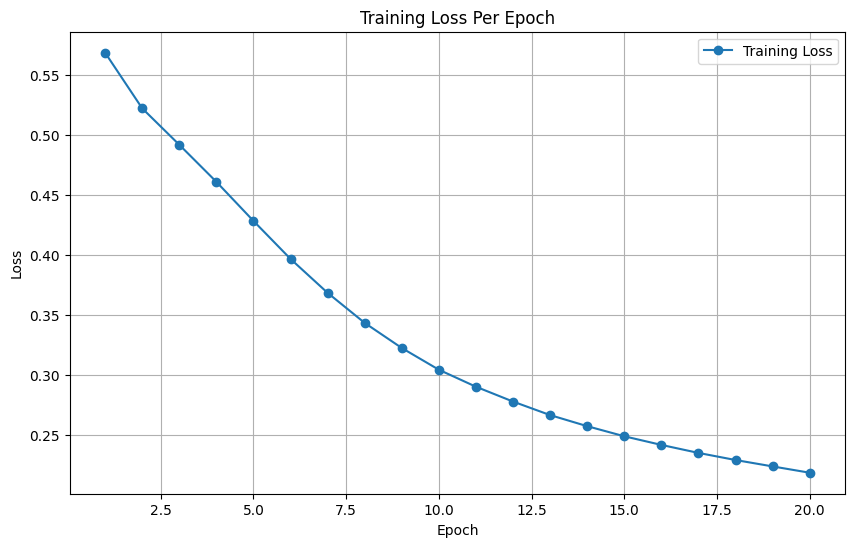

In [ ]:
# plot epoch loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', label='Training Loss')  # Adjust range
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Per Epoch')
plt.legend()
plt.grid(True)
plt.show()


## Save the models

In [ ]:
import os

# save path for the models
save_path = r"C:\Users\timov\OneDrive\Documents\AI\s3\Information Retrieval\models"

#  check directory
os.makedirs(save_path, exist_ok=True)

# saves models
torch.save(user_tower.state_dict(), os.path.join(save_path, "user_tower.pth"))
torch.save(item_tower.state_dict(), os.path.join(save_path, "item_tower.pth"))
torch.save(model.state_dict(), os.path.join(save_path, "two_tower_model.pth"))

# saves optimizer state
torch.save(optimizer.state_dict(), os.path.join(save_path, "optimizer.pth"))

print(f"Models saved successfully to {save_path}!")

Models saved successfully to C:\Users\timov\OneDrive\Documents\AI\s3\Information Retrieval\models!


# Training labels on rating and review

In [ ]:
from tqdm import tqdm

# Number of epochs and learning rate
num_epochs = 20
learning_rate = 1e-3

# Initialize models
user_tower_2 = UserTower(num_embeddings=NUM_USERS_2, embedding_dim=embedding_dim)
item_tower_2 = ItemTower(num_embeddings=NUM_RECIPES_2, embedding_dim=embedding_dim, recipe_embedding_dim=recipe_embedding_dim)
model_2 = TwoTowerRecommender()

# Define optimizer
optimizer_2 = optim.Adam(list(user_tower_2.parameters()) + list(item_tower_2.parameters()), lr=learning_rate)

# Calculate label counts and class weights for train_data_2
label_counts_2 = train_data_2['label'].value_counts()
total_samples_2 = label_counts_2[0] + label_counts_2[1]
class_weights_2 = torch.tensor([
    total_samples_2 / (2.0 * label_counts_2[0]),
    total_samples_2 / (2.0 * label_counts_2[1])
], dtype=torch.float32)

# Set models to training mode
user_tower_2.train()
item_tower_2.train()
model_2.train()

# Create DataLoader for the dataset
dataloader_2 = DataLoader(dataset_2, batch_size=batch_size, shuffle=True)

# Early stopping parameters
patience = 2  # Number of epochs to wait for improvement
best_loss = float('inf')
wait = 0  # Counter for patience, break once two epochs in a row the loss doesn't improve

# Initialize list to store loss per epoch
epoch_losses_2 = []

# Training loop
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch in tqdm(dataloader_2):
        # Extract input data
        user_embeddings = user_tower_2(
            batch["user_id_index"],
            batch["month_sin"],
            batch["month_cos"],
            batch["year"]
        )
        item_embeddings = item_tower_2(
            batch["recipe_id_index"],
            batch["name_embedding"],
            batch["total_time"],
            batch["category_embedding"],
            batch["aggr_rating"],
            batch["review_count"],
            batch["calories"],
            batch["fat_content"],
            batch["saturated_fat_content"],
            batch["cholesterol_content"],
            batch["sodium_content"],
            batch["carbohydrate_content"],
            batch["fiber_content"],
            batch["sugar_content"],
            batch["protein_content"]
        )

        # Compute cosine similarity
        similarity = model_2(user_embeddings, item_embeddings)

        # Target labels
        labels = batch["label"].float()  # Ensure labels are float for BCE Loss

        # Assign weights to labels based on their class
        weights = labels * class_weights_2[1] + (1 - labels) * class_weights_2[0]

        # Compute weighted loss
        loss_fn = nn.BCELoss(reduction='none')  # Weighted loss function
        loss = loss_fn(similarity, labels)
        weighted_loss = (loss * weights).mean()

        # Backpropagation and optimization
        optimizer_2.zero_grad()
        weighted_loss.backward()
        optimizer_2.step()

        # Accumulate loss
        total_loss += weighted_loss.item()

    # Calculate average loss for the epoch
    average_loss = total_loss / len(dataloader_2)
    epoch_losses_2.append(average_loss)

    # Print epoch loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}")

    # Early stopping logic
    if average_loss < best_loss:
        best_loss = average_loss
        wait = 0  # Reset the patience counter, needs to be two epochs in a row to break
        print("Validation loss improved, resetting patience counter.")
    else:
        wait += 1
        print(f"Validation loss did not improve. Patience counter: {wait}/{patience}")

    if wait >= patience:
        print("Early stopping triggered.")
        break

print("Training complete for train_data_2.")


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:25<00:00, 42.44it/s]


Epoch 1/20, Loss: 0.6274
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.69it/s]


Epoch 2/20, Loss: 0.5908
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:22<00:00, 43.30it/s]


Epoch 3/20, Loss: 0.5607
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.57it/s]


Epoch 4/20, Loss: 0.5260
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:23<00:00, 43.12it/s]


Epoch 5/20, Loss: 0.4878
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.66it/s]


Epoch 6/20, Loss: 0.4492
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.70it/s]


Epoch 7/20, Loss: 0.4135
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.79it/s]


Epoch 8/20, Loss: 0.3831
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:22<00:00, 43.29it/s]


Epoch 9/20, Loss: 0.3568
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:23<00:00, 42.87it/s]


Epoch 10/20, Loss: 0.3352
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.62it/s]


Epoch 11/20, Loss: 0.3170
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.67it/s]


Epoch 12/20, Loss: 0.3018
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.80it/s]


Epoch 13/20, Loss: 0.2882
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.93it/s]


Epoch 14/20, Loss: 0.2768
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.93it/s]


Epoch 15/20, Loss: 0.2668
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.91it/s]


Epoch 16/20, Loss: 0.2579
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.82it/s]


Epoch 17/20, Loss: 0.2504
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.99it/s]


Epoch 18/20, Loss: 0.2435
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:21<00:00, 43.72it/s]


Epoch 19/20, Loss: 0.2370
Validation loss improved, resetting patience counter.


100%|██████████████████████████████████████████████████████████████████████████████| 6171/6171 [02:20<00:00, 43.79it/s]

Epoch 20/20, Loss: 0.2316
Validation loss improved, resetting patience counter.
Training complete for train_data_2.


### another plot

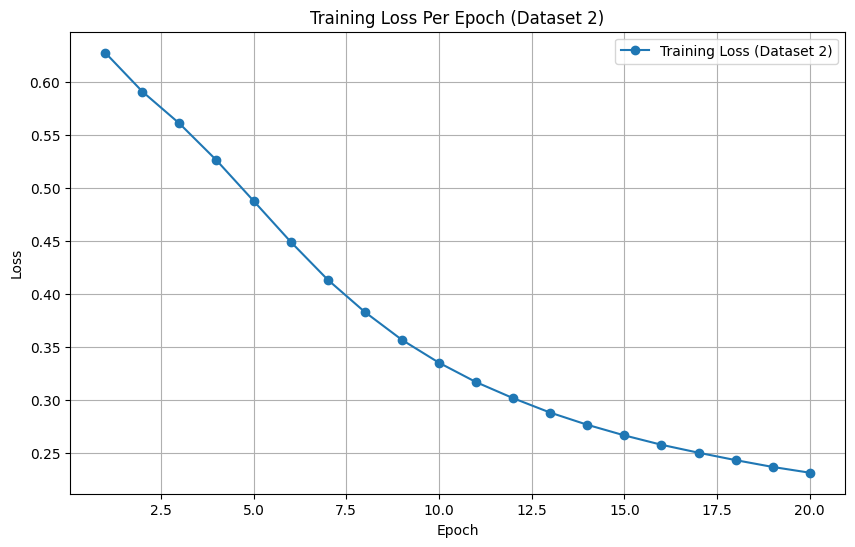

In [ ]:
# plot training loss for the second dataset
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(epoch_losses_2) + 1), epoch_losses_2, marker='o', label='Training Loss (Dataset 2)')  # Adjust range
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Per Epoch (Dataset 2)')
plt.legend()
plt.grid(True)
plt.show()


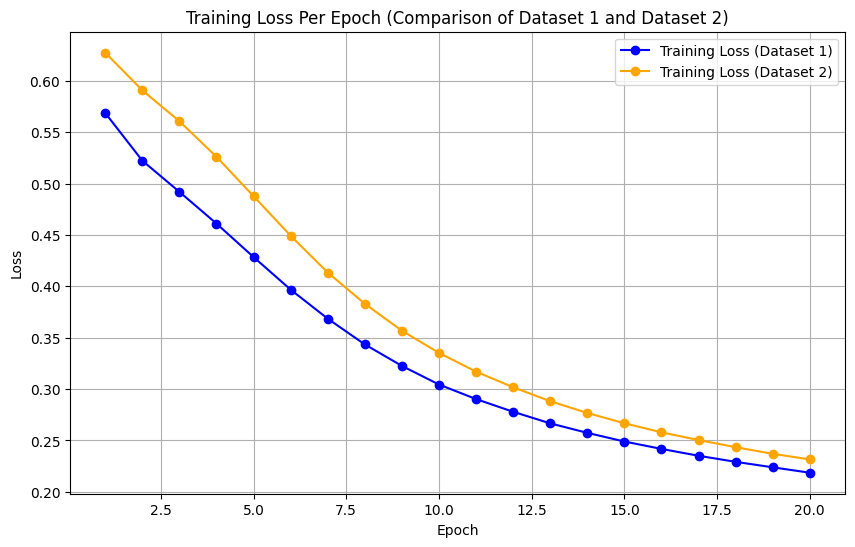

In [ ]:
# Combine the two plots in one graph for easier comparison
plt.figure(figsize=(10, 6))

# Plot training loss for the first dataset
plt.plot(range(1, len(epoch_losses) + 1), epoch_losses, marker='o', label='Training Loss (Dataset 1)', color='blue')

# Plot training loss for the second dataset
plt.plot(range(1, len(epoch_losses_2) + 1), epoch_losses_2, marker='o', label='Training Loss (Dataset 2)', color='orange')

# Adds
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Per Epoch (Comparison of Dataset 1 and Dataset 2)')
plt.legend()
plt.grid(True)

plt.show()


## save this model aswell

In [ ]:
import os

# Path to save the models for the second dataset
save_path_2 = r"C:\Users\timov\OneDrive\Documents\AI\s3\Information Retrieval\models\dataset_2"

# Check directory exists
os.makedirs(save_path_2, exist_ok=True)

# Saves second models
torch.save(user_tower_2.state_dict(), os.path.join(save_path_2, "user_tower_2.pth"))
torch.save(item_tower_2.state_dict(), os.path.join(save_path_2, "item_tower_2.pth"))
torch.save(model_2.state_dict(), os.path.join(save_path_2, "two_tower_model_2.pth"))

# Save the optimizer state for the second dataset
torch.save(optimizer_2.state_dict(), os.path.join(save_path_2, "optimizer_2.pth"))

print(f"Models for the second dataset saved successfully to {save_path_2}!")


Models for the second dataset saved successfully to C:\Users\timov\OneDrive\Documents\AI\s3\Information Retrieval\models\dataset_2!


## Load the models

In [ ]:
load_path = r"C:\Users\timov\OneDrive\Documents\AI\s3\Information Retrieval\models"

# Load the models
user_tower.load_state_dict(torch.load(os.path.join(load_path, "user_tower.pth")))
item_tower.load_state_dict(torch.load(os.path.join(load_path, "item_tower.pth")))
model.load_state_dict(torch.load(os.path.join(load_path, "two_tower_model.pth")))

# Load the optimizer state
optimizer.load_state_dict(torch.load(os.path.join(load_path, "optimizer.pth")))

# Set models to evaluation mode
user_tower.eval()
item_tower.eval()
model.eval()

print("Models loaded successfully and ready for use!")


Models loaded successfully and ready for use!


# Evaluation labels based on ratings

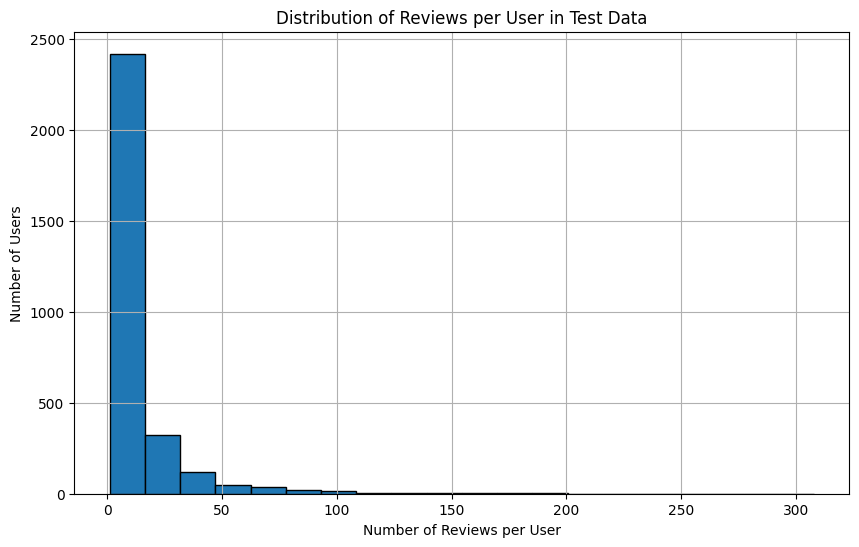

Random User ID: 171854
Liked Recipes (Ground Truth) for User 171854: [154821, 30967, 50794, 107059, 109392, 42169]
Recommended Recipes for User 171854: [4 7 8 5 3 6 2 0 1]
Overlap (Hits): set()
Number of Hits: 0


In [ ]:
import matplotlib.pyplot as plt
import random

# plot number of reviews per user in the test data
test_user_review_counts = test_data.groupby("user_id").size()
plt.figure(figsize=(10, 6))
plt.hist(test_user_review_counts, bins=20, edgecolor="black")
plt.xlabel("Number of Reviews per User")
plt.ylabel("Number of Users")
plt.title("Distribution of Reviews per User in Test Data")
plt.grid(True)
plt.show()

# choose a random user from the test data
random_user_id = random.choice(test_data["user_id"].unique())
print(f"Random User ID: {random_user_id}")

# get the user's "liked" recipes (ground truth from the test data)
liked_recipes = test_data[test_data["user_id"] == random_user_id]["recipe_id"].tolist()
print(f"Liked Recipes (Ground Truth) for User {random_user_id}: {liked_recipes}")

# recommend recipes for the user
recommended_recipes, similarities = recommend_recipes_for_user(
    random_user_id, user_tower, item_tower, test_data, train_data, num_recommendations=20
)
print(f"Recommended Recipes for User {random_user_id}: {recommended_recipes}")

# compare liked recipes with recommended recipes
overlap = set(liked_recipes).intersection(set(recommended_recipes))
print(f"Overlap (Hits): {overlap}")
print(f"Number of Hits: {len(overlap)}")


In [ ]:
users_with_all_unseen = test_data.groupby("user_id").apply(
    lambda x: all(recipe not in train_recipe_ids for recipe in x["recipe_id"])
).sum()
print(f"Number of users with all unseen recipes: {users_with_all_unseen}")

Number of users with all unseen recipes: 0


#### first try one user, after, go over all test users

In [ ]:
import random

print("\nStep 1\n")
# choose a random user from the test data
random_user_id = random.choice(test_data["user_id"].unique())
print(f"Random User ID: {random_user_id}")

print("\nStep 2\n")

# get recipes in the training set for this user
user_train_recipes = train_data[train_data["user_id"] == random_user_id]["recipe_id"].tolist()
print(f"Training Recipes for User {random_user_id}: {user_train_recipes}")

# get recipes in the test set for this user
user_test_recipes = test_data[test_data["user_id"] == random_user_id]["recipe_id"].tolist()
print(f"Test Recipes for User {random_user_id}: {user_test_recipes}")

print("\nStep 3\n")

# get the user's embedding index
user_index = train_data[train_data["user_id"] == random_user_id]["user_id_index"].iloc[0]

# generate the user embedding
user_embedding = user_tower(torch.tensor([user_index]))
print(f"User Embedding Shape: {user_embedding.shape}")

print("\nStep 4\n")

# extract all recipe features from train_data for the unique recipe indices
recipes = train_data[train_data["recipe_id_index"].isin(recipe_indices)]

# generate embeddings for all training recipes using the ItemTower
recipe_embeddings = item_tower(
    torch.tensor(recipes["recipe_id_index"].tolist()),
    torch.tensor(recipes["name"].tolist()),
    torch.tensor(recipes["totaltime"].tolist()),
    torch.tensor(recipes["recipecategory"].tolist()),
    torch.tensor(recipes["aggregatedrating"].tolist()),
    torch.tensor(recipes["reviewcount"].tolist()),
    torch.tensor(recipes["calories"].tolist()),
    torch.tensor(recipes["fatcontent"].tolist()),
    torch.tensor(recipes["saturatedfatcontent"].tolist()),
    torch.tensor(recipes["cholesterolcontent"].tolist()),
    torch.tensor(recipes["sodiumcontent"].tolist()),
    torch.tensor(recipes["carbohydratecontent"].tolist()),
    torch.tensor(recipes["fibercontent"].tolist()),
    torch.tensor(recipes["sugarcontent"].tolist()),
    torch.tensor(recipes["proteincontent"].tolist())
)
print(f"Recipe Embeddings Shape: {recipe_embeddings.shape}")


print("\nStep 5\n")

# compute cosine similarities between the user embedding and all recipe embeddings
similarities = F.cosine_similarity(user_embedding, recipe_embeddings)
print(f"Similarities Shape: {similarities.shape}")

print("\nStep 6\n")

# check high number of reccomendations just to see if there can be a match...
num_recommendations = 200000

# convert PyTorch tensor to a list of integers
top_n_indices = torch.topk(similarities, len(similarities)).indices.cpu().numpy()  # Get all sorted indices

# filter to get unique recipe indices, stops reccomendation of the same recipe
unique_indices = []
seen_recipes = set()
for idx in top_n_indices:
    recipe_id = train_data.iloc[idx]["recipe_id"]
    if recipe_id not in seen_recipes:
        unique_indices.append(idx)
        seen_recipes.add(recipe_id)
    if len(unique_indices) == num_recommendations:
        break

# get the recommended recipes using the unique indices
recommended_recipes = [train_data.iloc[idx]["recipe_id"] for idx in unique_indices]
print(f"Recommended Recipes: {recommended_recipes}")

print("\nStep 7\n")

# check for overlap between recommended recipes and test recipes
overlap = set(user_test_recipes).intersection(set(recommended_recipes))
print(f"User test recipes: {user_test_recipes}")
print(f"Recommended recipes: {recommended_recipes}")
print(f"Overlap (Hits): {overlap}")
print(f"Number of Hits: {len(overlap)}")




Step 1

Random User ID: 27416

Step 2

Training Recipes for User 27416: [17222, 20407, 19135, 31958, 25690, 3294, 42621, 151679, 124868, 12619, 60028, 22169, 45990, 39114, 101312, 21032, 2791, 16887, 280845, 71485, 40654, 294744, 77020, 31062, 60815, 24026, 289914, 57092, 155837, 34087, 334210, 99151, 51411, 77397, 73224, 197853, 22164, 65641, 52488, 82102, 107621, 72988, 51518, 24213, 138173, 80413, 71449, 41414, 15846, 29953, 32369, 135162, 73953, 35452, 154452, 75570]
Test Recipes for User 27416: [108746, 16273, 50797, 95086, 21438, 167729, 256084, 69213, 76918, 74123, 168992, 31750]

Step 3

User Embedding Shape: torch.Size([1, 32])

Step 4

Recipe Embeddings Shape: torch.Size([447753, 32])

Step 5

Similarities Shape: torch.Size([447753])

Step 6

Recommended Recipes: [412616, 458087, 353995, 262629, 386328, 45161, 353714, 126523, 433506, 28779, 169095, 423106, 238978, 12654, 226215, 154020, 59159, 425887, 345190, 216219, 98749, 314562, 89055, 228601, 320513, 281736, 265728, 2755

In [ ]:
import time
import torch
import torch.nn.functional as F
from tqdm import tqdm

def evaluate_all_users_optimized(test_data, train_data, user_tower, item_tower, recipe_indices, num_recommendations, batch_size=1000):
    total_hits = 0
    total_users = 0

    # Precompute all recipe embeddings
    print("Precomputing recipe embeddings...")
    recipes = train_data[train_data["recipe_id_index"].isin(recipe_indices)]
    recipe_embeddings = item_tower(
        torch.tensor(recipes["recipe_id_index"].tolist()),
        torch.tensor(recipes["name"].tolist()),
        torch.tensor(recipes["totaltime"].tolist()),
        torch.tensor(recipes["recipecategory"].tolist()),
        torch.tensor(recipes["aggregatedrating"].tolist()),
        torch.tensor(recipes["reviewcount"].tolist()),
        torch.tensor(recipes["calories"].tolist()),
        torch.tensor(recipes["fatcontent"].tolist()),
        torch.tensor(recipes["saturatedfatcontent"].tolist()),
        torch.tensor(recipes["cholesterolcontent"].tolist()),
        torch.tensor(recipes["sodiumcontent"].tolist()),
        torch.tensor(recipes["carbohydratecontent"].tolist()),
        torch.tensor(recipes["fibercontent"].tolist()),
        torch.tensor(recipes["sugarcontent"].tolist()),
        torch.tensor(recipes["proteincontent"].tolist())
    )

    print(f"Precomputed Recipe Embeddings Shape: {recipe_embeddings.shape}")

    # Iterate through all test users
    start_time = time.time()
    for i, user_id in enumerate(tqdm(test_data["user_id"].unique(), desc="Evaluating Users")):
        user_start_time = time.time()

        # Extract Train and Test Recipes for the User
        user_train_recipes = train_data[train_data["user_id"] == user_id]["recipe_id"].tolist()
        user_test_recipes = test_data[test_data["user_id"] == user_id]["recipe_id"].tolist()

        if len(user_test_recipes) == 0:
            continue

        # Get the User Embedding
        try:
            user_index = train_data[train_data["user_id"] == user_id]["user_id_index"].iloc[0]
        except IndexError:
            continue  # Skip if user_id is not in the train_data
        user_embedding = user_tower(torch.tensor([user_index]))  # No device-specific operations, slows it down or gives errors

        # Compute Similarities in Batches
        similarities = []
        for batch_start in range(0, len(recipe_embeddings), batch_size):
            batch_end = min(batch_start + batch_size, len(recipe_embeddings))
            batch_embeddings = recipe_embeddings[batch_start:batch_end]
            batch_similarities = F.cosine_similarity(user_embedding, batch_embeddings)
            similarities.append(batch_similarities)

        similarities = torch.cat(similarities)

        # Get Top Recommendations
        top_n_indices = torch.topk(similarities, len(similarities)).indices.tolist()
        unique_indices = []
        seen_recipes = set()
        for idx in top_n_indices:
            recipe_id = train_data.iloc[idx]["recipe_id"]
            if recipe_id not in seen_recipes:
                unique_indices.append(idx)
                seen_recipes.add(recipe_id)
            if len(unique_indices) == num_recommendations:
                break

        recommended_recipes = [train_data.iloc[idx]["recipe_id"] for idx in unique_indices]

        # Compare with Ground Truth/test set
        overlap = set(user_test_recipes).intersection(set(recommended_recipes))
        total_hits += len(overlap)
        total_users += 1

        # Print per-user timing
        user_end_time = time.time()
        print(f"User {user_id} processed in {user_end_time - user_start_time:.2f} seconds.")

        # Early exit after a few users for debugging
        if i >= 3011:
            break

    # Summary Results
    total_time = time.time() - start_time
    print(f"Total Time Taken: {total_time:.2f} seconds")
    print(f"Total Users Evaluated: {total_users}")
    print(f"Total Hits: {total_hits}")
    print(f"Hit Rate: {total_hits / total_users:.4f}" if total_users > 0 else "Hit Rate: 0.0000")

# Run the function
evaluate_all_users_optimized(test_data, train_data, user_tower, item_tower, recipe_indices, num_recommendations=25)


Precomputing recipe embeddings...
Precomputed Recipe Embeddings Shape: torch.Size([447753, 32])


Evaluating Users:   0%|                                                               | 1/3011 [00:00<06:32,  7.66it/s]

User 1533 processed in 0.13 seconds.


Evaluating Users:   0%|                                                               | 2/3011 [00:00<07:54,  6.34it/s]

User 1535 processed in 0.18 seconds.


Evaluating Users:   0%|                                                               | 3/3011 [00:00<06:50,  7.32it/s]

User 1634 processed in 0.11 seconds.


Evaluating Users:   0%|                                                               | 4/3011 [00:00<06:13,  8.04it/s]

User 1891 processed in 0.10 seconds.


Evaluating Users:   0%|                                                               | 5/3011 [00:00<05:56,  8.44it/s]

User 2310 processed in 0.11 seconds.
User 2312 processed in 0.10 seconds.


Evaluating Users:   0%|▏                                                              | 6/3011 [00:00<05:40,  8.83it/s]

User 2586 processed in 0.10 seconds.

Evaluating Users:   0%|▏                                                              | 8/3011 [00:00<05:24,  9.25it/s]


User 3205 processed in 0.10 seconds.
User 3288 processed in 0.10 seconds.


Evaluating Users:   0%|▏                                                             | 11/3011 [00:01<05:15,  9.50it/s]

User 4291 processed in 0.10 seconds.
User 4439 processed in 0.10 seconds.


Evaluating Users:   0%|▎                                                             | 13/3011 [00:01<05:12,  9.59it/s]

User 4470 processed in 0.10 seconds.
User 4500 processed in 0.10 seconds.


Evaluating Users:   0%|▎                                                             | 15/3011 [00:01<05:14,  9.53it/s]

User 4601 processed in 0.10 seconds.
User 4740 processed in 0.10 seconds.
User 5060 processed in 0.10 seconds.


Evaluating Users:   1%|▎                                                             | 18/3011 [00:01<05:14,  9.53it/s]

User 6258 processed in 0.11 seconds.
User 6357 processed in 0.10 seconds.


Evaluating Users:   1%|▍                                                             | 20/3011 [00:02<05:11,  9.61it/s]

User 6512 processed in 0.10 seconds.
User 6550 processed in 0.10 seconds.


Evaluating Users:   1%|▍                                                             | 22/3011 [00:02<05:07,  9.71it/s]

User 6651 processed in 0.10 seconds.
User 6836 processed in 0.10 seconds.
User 7108 processed in 0.10 seconds.


Evaluating Users:   1%|▌                                                             | 25/3011 [00:02<05:06,  9.75it/s]

User 7802 processed in 0.10 seconds.
User 8377 processed in 0.10 seconds.


Evaluating Users:   1%|▌                                                             | 27/3011 [00:02<05:07,  9.70it/s]

User 8526 processed in 0.10 seconds.
User 8606 processed in 0.10 seconds.
User 8629 processed in 0.10 seconds.


Evaluating Users:   1%|▌                                                             | 30/3011 [00:03<05:14,  9.47it/s]

User 8688 processed in 0.10 seconds.
User 9579 processed in 0.11 seconds.


Evaluating Users:   1%|▋                                                             | 32/3011 [00:03<05:10,  9.59it/s]

User 9580 processed in 0.10 seconds.
User 9670 processed in 0.10 seconds.


Evaluating Users:   1%|▋                                                             | 34/3011 [00:03<05:11,  9.56it/s]

User 9717 processed in 0.10 seconds.
User 9748 processed in 0.11 seconds.
User 9869 processed in 0.10 seconds.


Evaluating Users:   1%|▊                                                             | 37/3011 [00:03<05:07,  9.67it/s]

User 10033 processed in 0.10 seconds.
User 10113 processed in 0.10 seconds.
User 10404 processed in 0.10 seconds.


Evaluating Users:   1%|▊                                                             | 40/3011 [00:04<05:03,  9.79it/s]

User 11009 processed in 0.10 seconds.
User 11044 processed in 0.10 seconds.
User 11176 processed in 0.10 seconds.


Evaluating Users:   1%|▉                                                             | 43/3011 [00:04<05:07,  9.66it/s]

User 11297 processed in 0.10 seconds.
User 11461 processed in 0.10 seconds.
User 12118 processed in 0.10 seconds.


Evaluating Users:   2%|▉                                                             | 46/3011 [00:04<05:10,  9.56it/s]

User 12657 processed in 0.10 seconds.
User 12882 processed in 0.11 seconds.
User 13011 processed in 0.10 seconds.


Evaluating Users:   2%|█                                                             | 49/3011 [00:05<05:23,  9.16it/s]

User 13029 processed in 0.12 seconds.
User 13063 processed in 0.11 seconds.


Evaluating Users:   2%|█                                                             | 51/3011 [00:05<05:21,  9.22it/s]

User 13483 processed in 0.11 seconds.
User 13593 processed in 0.10 seconds.
User 13796 processed in 0.10 seconds.


Evaluating Users:   2%|█                                                             | 54/3011 [00:05<05:11,  9.50it/s]

User 14386 processed in 0.10 seconds.
User 14410 processed in 0.10 seconds.
User 14613 processed in 0.10 seconds.


Evaluating Users:   2%|█▏                                                            | 57/3011 [00:06<05:05,  9.67it/s]

User 14664 processed in 0.10 seconds.
User 14823 processed in 0.10 seconds.
User 15521 processed in 0.10 seconds.


Evaluating Users:   2%|█▏                                                            | 60/3011 [00:06<05:09,  9.53it/s]

User 15572 processed in 0.10 seconds.
User 15851 processed in 0.11 seconds.


Evaluating Users:   2%|█▎                                                            | 62/3011 [00:06<05:07,  9.59it/s]

User 15892 processed in 0.10 seconds.
User 16140 processed in 0.10 seconds.
User 16459 processed in 0.10 seconds.


Evaluating Users:   2%|█▎                                                            | 65/3011 [00:06<05:08,  9.55it/s]

User 17608 processed in 0.10 seconds.
User 17803 processed in 0.11 seconds.


Evaluating Users:   2%|█▍                                                            | 67/3011 [00:07<05:05,  9.64it/s]

User 18391 processed in 0.10 seconds.
User 18660 processed in 0.10 seconds.
User 18745 processed in 0.10 seconds.


Evaluating Users:   2%|█▍                                                            | 70/3011 [00:07<05:07,  9.58it/s]

User 19051 processed in 0.10 seconds.
User 19129 processed in 0.11 seconds.
User 19166 processed in 0.10 seconds.


Evaluating Users:   2%|█▌                                                            | 73/3011 [00:07<05:05,  9.63it/s]

User 19198 processed in 0.10 seconds.
User 19540 processed in 0.10 seconds.
User 19683 processed in 0.10 seconds.


Evaluating Users:   3%|█▌                                                            | 76/3011 [00:08<05:02,  9.71it/s]

User 20114 processed in 0.10 seconds.
User 20214 processed in 0.10 seconds.
User 20371 processed in 0.10 seconds.


Evaluating Users:   3%|█▋                                                            | 79/3011 [00:08<05:01,  9.71it/s]

User 20480 processed in 0.10 seconds.
User 20754 processed in 0.10 seconds.
User 21297 processed in 0.10 seconds.


Evaluating Users:   3%|█▋                                                            | 82/3011 [00:08<04:59,  9.77it/s]

User 21399 processed in 0.10 seconds.
User 21443 processed in 0.10 seconds.


Evaluating Users:   3%|█▋                                                            | 84/3011 [00:08<05:02,  9.68it/s]

User 21487 processed in 0.11 seconds.
User 21694 processed in 0.10 seconds.
User 21730 processed in 0.10 seconds.


Evaluating Users:   3%|█▊                                                            | 87/3011 [00:09<04:59,  9.78it/s]

User 21752 processed in 0.10 seconds.
User 21841 processed in 0.10 seconds.
User 22015 processed in 0.10 seconds.


Evaluating Users:   3%|█▊                                                            | 89/3011 [00:09<05:01,  9.69it/s]

User 22174 processed in 0.10 seconds.
User 22642 processed in 0.10 seconds.
User 22655 processed in 0.10 seconds.


Evaluating Users:   3%|█▉                                                            | 93/3011 [00:09<04:55,  9.86it/s]

User 22720 processed in 0.10 seconds.
User 22724 processed in 0.10 seconds.
User 22788 processed in 0.10 seconds.


Evaluating Users:   3%|█▉                                                            | 96/3011 [00:10<04:56,  9.84it/s]

User 22973 processed in 0.10 seconds.
User 23119 processed in 0.10 seconds.
User 23302 processed in 0.10 seconds.


Evaluating Users:   3%|██                                                            | 99/3011 [00:10<05:05,  9.54it/s]

User 23333 processed in 0.11 seconds.
User 23466 processed in 0.11 seconds.


Evaluating Users:   3%|██                                                           | 101/3011 [00:10<05:06,  9.49it/s]

User 23479 processed in 0.11 seconds.
User 23728 processed in 0.10 seconds.
User 24386 processed in 0.11 seconds.


Evaluating Users:   3%|██                                                           | 104/3011 [00:10<05:10,  9.37it/s]

User 24485 processed in 0.11 seconds.
User 24928 processed in 0.11 seconds.


Evaluating Users:   4%|██▏                                                          | 106/3011 [00:11<05:10,  9.34it/s]

User 24995 processed in 0.11 seconds.
User 25063 processed in 0.11 seconds.


Evaluating Users:   4%|██▏                                                          | 108/3011 [00:11<05:19,  9.09it/s]

User 25356 processed in 0.11 seconds.
User 25455 processed in 0.11 seconds.


Evaluating Users:   4%|██▏                                                          | 110/3011 [00:11<05:09,  9.39it/s]

User 25792 processed in 0.10 seconds.
User 25941 processed in 0.10 seconds.
User 26041 processed in 0.10 seconds.


Evaluating Users:   4%|██▎                                                          | 113/3011 [00:11<05:03,  9.55it/s]

User 26075 processed in 0.10 seconds.
User 26278 processed in 0.10 seconds.
User 26313 processed in 0.10 seconds.


Evaluating Users:   4%|██▎                                                          | 116/3011 [00:12<05:00,  9.63it/s]

User 26512 processed in 0.10 seconds.
User 26719 processed in 0.10 seconds.
User 26942 processed in 0.10 seconds.


Evaluating Users:   4%|██▍                                                          | 119/3011 [00:12<05:00,  9.63it/s]

User 27060 processed in 0.11 seconds.
User 27366 processed in 0.10 seconds.


Evaluating Users:   4%|██▍                                                          | 121/3011 [00:12<05:07,  9.40it/s]

User 27381 processed in 0.10 seconds.
User 27385 processed in 0.11 seconds.


Evaluating Users:   4%|██▍                                                          | 123/3011 [00:12<05:05,  9.45it/s]

User 27395 processed in 0.11 seconds.
User 27416 processed in 0.10 seconds.
User 27443 processed in 0.11 seconds.


Evaluating Users:   4%|██▌                                                          | 126/3011 [00:13<05:09,  9.32it/s]

User 27452 processed in 0.11 seconds.
User 27643 processed in 0.11 seconds.
User 27678 processed in 0.10 seconds.


Evaluating Users:   4%|██▌                                                          | 129/3011 [00:13<05:04,  9.46it/s]

User 27783 processed in 0.11 seconds.
User 27798 processed in 0.10 seconds.
User 27922 processed in 0.11 seconds.


Evaluating Users:   4%|██▋                                                          | 132/3011 [00:13<04:59,  9.61it/s]

User 27961 processed in 0.10 seconds.
User 28087 processed in 0.10 seconds.
User 28177 processed in 0.10 seconds.


Evaluating Users:   4%|██▋                                                          | 135/3011 [00:14<04:58,  9.64it/s]

User 28201 processed in 0.10 seconds.
User 28339 processed in 0.10 seconds.
User 28345 processed in 0.10 seconds.


Evaluating Users:   5%|██▊                                                          | 138/3011 [00:14<04:59,  9.60it/s]

User 28346 processed in 0.10 seconds.
User 28442 processed in 0.10 seconds.
User 28455 processed in 0.10 seconds.


Evaluating Users:   5%|██▊                                                          | 141/3011 [00:14<04:59,  9.59it/s]

User 28603 processed in 0.10 seconds.
User 28604 processed in 0.11 seconds.


Evaluating Users:   5%|██▉                                                          | 143/3011 [00:15<05:00,  9.54it/s]

User 28636 processed in 0.10 seconds.
User 28649 processed in 0.10 seconds.


Evaluating Users:   5%|██▉                                                          | 145/3011 [00:15<04:56,  9.67it/s]

User 28671 processed in 0.10 seconds.
User 28729 processed in 0.10 seconds.
User 28846 processed in 0.10 seconds.


Evaluating Users:   5%|██▉                                                          | 148/3011 [00:15<04:54,  9.73it/s]

User 28995 processed in 0.10 seconds.
User 29014 processed in 0.10 seconds.
User 29063 processed in 0.10 seconds.


Evaluating Users:   5%|███                                                          | 151/3011 [00:15<04:51,  9.80it/s]

User 29166 processed in 0.10 seconds.
User 29196 processed in 0.10 seconds.


Evaluating Users:   5%|███                                                          | 153/3011 [00:16<04:53,  9.74it/s]

User 29212 processed in 0.10 seconds.
User 29268 processed in 0.10 seconds.


Evaluating Users:   5%|███▏                                                         | 155/3011 [00:16<04:52,  9.75it/s]

User 29300 processed in 0.10 seconds.
User 29404 processed in 0.10 seconds.
User 29418 processed in 0.10 seconds.


Evaluating Users:   5%|███▏                                                         | 158/3011 [00:16<04:54,  9.70it/s]

User 29655 processed in 0.10 seconds.
User 29667 processed in 0.10 seconds.
User 29782 processed in 0.10 seconds.


Evaluating Users:   5%|███▎                                                         | 161/3011 [00:16<04:50,  9.82it/s]

User 29813 processed in 0.10 seconds.
User 29920 processed in 0.10 seconds.
User 29956 processed in 0.10 seconds.


Evaluating Users:   5%|███▎                                                         | 164/3011 [00:17<04:51,  9.77it/s]

User 30209 processed in 0.10 seconds.
User 30228 processed in 0.10 seconds.
User 30298 processed in 0.11 seconds.


Evaluating Users:   6%|███▍                                                         | 167/3011 [00:17<04:58,  9.54it/s]

User 30407 processed in 0.10 seconds.
User 30435 processed in 0.11 seconds.
User 30503 processed in 0.10 seconds.


Evaluating Users:   6%|███▍                                                         | 169/3011 [00:17<04:55,  9.62it/s]

User 30534 processed in 0.10 seconds.
User 30716 processed in 0.10 seconds.
User 30893 processed in 0.10 seconds.


Evaluating Users:   6%|███▌                                                         | 173/3011 [00:18<04:54,  9.63it/s]

User 30896 processed in 0.11 seconds.
User 30911 processed in 0.10 seconds.
User 31232 processed in 0.10 seconds.


Evaluating Users:   6%|███▌                                                         | 176/3011 [00:18<04:52,  9.69it/s]

User 31261 processed in 0.10 seconds.
User 31364 processed in 0.10 seconds.
User 31499 processed in 0.10 seconds.


Evaluating Users:   6%|███▋                                                         | 179/3011 [00:18<04:52,  9.67it/s]

User 31635 processed in 0.10 seconds.
User 31695 processed in 0.10 seconds.
User 31807 processed in 0.10 seconds.


Evaluating Users:   6%|███▋                                                         | 182/3011 [00:19<04:54,  9.61it/s]

User 31914 processed in 0.10 seconds.
User 32058 processed in 0.10 seconds.


Evaluating Users:   6%|███▋                                                         | 184/3011 [00:19<04:56,  9.53it/s]

User 32143 processed in 0.10 seconds.
User 32570 processed in 0.11 seconds.
User 32772 processed in 0.10 seconds.


Evaluating Users:   6%|███▊                                                         | 187/3011 [00:19<04:50,  9.73it/s]

User 33135 processed in 0.10 seconds.
User 33159 processed in 0.10 seconds.


Evaluating Users:   6%|███▊                                                         | 189/3011 [00:19<04:47,  9.82it/s]

User 33186 processed in 0.10 seconds.
User 33188 processed in 0.10 seconds.


Evaluating Users:   6%|███▊                                                         | 191/3011 [00:19<04:46,  9.85it/s]

User 33443 processed in 0.10 seconds.
User 33588 processed in 0.10 seconds.


Evaluating Users:   6%|███▉                                                         | 193/3011 [00:20<04:44,  9.90it/s]

User 34025 processed in 0.10 seconds.
User 34122 processed in 0.10 seconds.


Evaluating Users:   6%|███▉                                                         | 195/3011 [00:20<04:44,  9.89it/s]

User 34146 processed in 0.10 seconds.
User 34214 processed in 0.10 seconds.


Evaluating Users:   7%|███▉                                                         | 197/3011 [00:20<04:52,  9.63it/s]

User 34280 processed in 0.11 seconds.
User 34357 processed in 0.11 seconds.
User 34879 processed in 0.10 seconds.


Evaluating Users:   7%|████                                                         | 200/3011 [00:20<04:52,  9.61it/s]

User 35093 processed in 0.10 seconds.
User 35106 processed in 0.10 seconds.
User 35140 processed in 0.10 seconds.


Evaluating Users:   7%|████                                                         | 203/3011 [00:21<04:48,  9.72it/s]

User 35193 processed in 0.10 seconds.
User 35414 processed in 0.10 seconds.
User 35488 processed in 0.10 seconds.


Evaluating Users:   7%|████▏                                                        | 206/3011 [00:21<04:44,  9.85it/s]

User 35526 processed in 0.10 seconds.
User 35617 processed in 0.10 seconds.
User 35635 processed in 0.10 seconds.


Evaluating Users:   7%|████▏                                                        | 209/3011 [00:21<04:47,  9.76it/s]

User 35701 processed in 0.10 seconds.
User 35714 processed in 0.10 seconds.
User 35848 processed in 0.10 seconds.


Evaluating Users:   7%|████▎                                                        | 212/3011 [00:22<04:46,  9.76it/s]

User 35918 processed in 0.10 seconds.
User 35965 processed in 0.10 seconds.
User 36079 processed in 0.10 seconds.


Evaluating Users:   7%|████▎                                                        | 215/3011 [00:22<04:45,  9.79it/s]

User 36128 processed in 0.10 seconds.
User 36187 processed in 0.10 seconds.
User 36739 processed in 0.10 seconds.


Evaluating Users:   7%|████▍                                                        | 218/3011 [00:22<04:48,  9.67it/s]

User 36810 processed in 0.11 seconds.
User 36944 processed in 0.10 seconds.
User 37022 processed in 0.10 seconds.


Evaluating Users:   7%|████▍                                                        | 221/3011 [00:23<04:48,  9.66it/s]

User 37036 processed in 0.10 seconds.
User 37072 processed in 0.10 seconds.
User 37080 processed in 0.10 seconds.


Evaluating Users:   7%|████▌                                                        | 224/3011 [00:23<04:46,  9.72it/s]

User 37106 processed in 0.10 seconds.
User 37107 processed in 0.10 seconds.
User 37183 processed in 0.10 seconds.


Evaluating Users:   8%|████▌                                                        | 227/3011 [00:23<04:43,  9.83it/s]

User 37229 processed in 0.10 seconds.
User 37275 processed in 0.10 seconds.
User 37305 processed in 0.10 seconds.


Evaluating Users:   8%|████▋                                                        | 230/3011 [00:23<04:42,  9.86it/s]

User 37449 processed in 0.10 seconds.
User 37456 processed in 0.10 seconds.


Evaluating Users:   8%|████▋                                                        | 232/3011 [00:24<04:47,  9.68it/s]

User 37471 processed in 0.10 seconds.
User 37584 processed in 0.10 seconds.
User 37636 processed in 0.10 seconds.


Evaluating Users:   8%|████▊                                                        | 235/3011 [00:24<04:46,  9.68it/s]

User 37640 processed in 0.10 seconds.
User 37721 processed in 0.10 seconds.


Evaluating Users:   8%|████▊                                                        | 237/3011 [00:24<04:44,  9.74it/s]

User 37722 processed in 0.10 seconds.
User 37779 processed in 0.10 seconds.
User 37862 processed in 0.10 seconds.


Evaluating Users:   8%|████▊                                                        | 239/3011 [00:24<04:45,  9.70it/s]

User 37868 processed in 0.10 seconds.
User 37950 processed in 0.10 seconds.


Evaluating Users:   8%|████▉                                                        | 241/3011 [00:25<04:41,  9.83it/s]

User 38182 processed in 0.10 seconds.
User 38218 processed in 0.10 seconds.
User 38418 processed in 0.10 seconds.


Evaluating Users:   8%|████▉                                                        | 245/3011 [00:25<04:40,  9.86it/s]

User 38574 processed in 0.10 seconds.
User 38643 processed in 0.10 seconds.


Evaluating Users:   8%|█████                                                        | 247/3011 [00:25<04:41,  9.82it/s]

User 38717 processed in 0.10 seconds.
User 38745 processed in 0.11 seconds.
User 38865 processed in 0.11 seconds.


Evaluating Users:   8%|█████                                                        | 250/3011 [00:26<04:45,  9.66it/s]

User 38937 processed in 0.10 seconds.
User 39194 processed in 0.10 seconds.
User 39277 processed in 0.10 seconds.


Evaluating Users:   8%|█████▏                                                       | 253/3011 [00:26<04:46,  9.63it/s]

User 39301 processed in 0.10 seconds.
User 39311 processed in 0.10 seconds.
User 39322 processed in 0.11 seconds.


Evaluating Users:   9%|█████▏                                                       | 256/3011 [00:26<04:48,  9.55it/s]

User 39334 processed in 0.10 seconds.
User 39389 processed in 0.10 seconds.
User 39394 processed in 0.10 seconds.


Evaluating Users:   9%|█████▏                                                       | 259/3011 [00:26<04:48,  9.53it/s]

User 39547 processed in 0.11 seconds.
User 39636 processed in 0.10 seconds.


Evaluating Users:   9%|█████▎                                                       | 261/3011 [00:27<04:51,  9.43it/s]

User 39733 processed in 0.11 seconds.
User 39754 processed in 0.11 seconds.
User 39762 processed in 0.11 seconds.


Evaluating Users:   9%|█████▎                                                       | 264/3011 [00:27<04:52,  9.40it/s]

User 39782 processed in 0.11 seconds.
User 39835 processed in 0.11 seconds.


Evaluating Users:   9%|█████▍                                                       | 266/3011 [00:27<04:52,  9.40it/s]

User 39857 processed in 0.11 seconds.
User 39949 processed in 0.11 seconds.
User 40114 processed in 0.10 seconds.


Evaluating Users:   9%|█████▍                                                       | 269/3011 [00:28<04:46,  9.58it/s]

User 40135 processed in 0.10 seconds.
User 40525 processed in 0.10 seconds.
User 40533 processed in 0.10 seconds.


Evaluating Users:   9%|█████▌                                                       | 272/3011 [00:28<04:46,  9.56it/s]

User 40620 processed in 0.10 seconds.
User 40961 processed in 0.10 seconds.
User 41218 processed in 0.10 seconds.


Evaluating Users:   9%|█████▌                                                       | 275/3011 [00:28<04:46,  9.55it/s]

User 41409 processed in 0.10 seconds.
User 41531 processed in 0.11 seconds.
User 41578 processed in 0.10 seconds.


Evaluating Users:   9%|█████▋                                                       | 278/3011 [00:28<04:44,  9.60it/s]

User 41706 processed in 0.11 seconds.
User 41799 processed in 0.10 seconds.
User 41809 processed in 0.10 seconds.


Evaluating Users:   9%|█████▋                                                       | 281/3011 [00:29<04:40,  9.72it/s]

User 41874 processed in 0.10 seconds.
User 41894 processed in 0.10 seconds.
User 41984 processed in 0.10 seconds.


Evaluating Users:   9%|█████▊                                                       | 284/3011 [00:29<04:41,  9.70it/s]

User 42309 processed in 0.10 seconds.
User 42337 processed in 0.10 seconds.


Evaluating Users:   9%|█████▊                                                       | 286/3011 [00:29<04:42,  9.66it/s]

User 42362 processed in 0.10 seconds.
User 42586 processed in 0.10 seconds.
User 42720 processed in 0.11 seconds.


Evaluating Users:  10%|█████▊                                                       | 289/3011 [00:30<04:40,  9.71it/s]

User 43083 processed in 0.10 seconds.
User 43139 processed in 0.10 seconds.


Evaluating Users:  10%|█████▉                                                       | 291/3011 [00:30<04:39,  9.73it/s]

User 43216 processed in 0.10 seconds.
User 43327 processed in 0.10 seconds.
User 43413 processed in 0.10 seconds.


Evaluating Users:  10%|█████▉                                                       | 294/3011 [00:30<04:40,  9.69it/s]

User 43505 processed in 0.10 seconds.
User 43642 processed in 0.10 seconds.


Evaluating Users:  10%|█████▉                                                       | 296/3011 [00:30<04:36,  9.82it/s]

User 43846 processed in 0.10 seconds.
User 44372 processed in 0.10 seconds.


Evaluating Users:  10%|██████                                                       | 298/3011 [00:31<04:36,  9.81it/s]

User 44383 processed in 0.10 seconds.
User 44642 processed in 0.10 seconds.
User 45524 processed in 0.10 seconds.


Evaluating Users:  10%|██████                                                       | 301/3011 [00:31<04:38,  9.74it/s]

User 45651 processed in 0.10 seconds.
User 45654 processed in 0.10 seconds.
User 45737 processed in 0.10 seconds.


Evaluating Users:  10%|██████▏                                                      | 304/3011 [00:31<04:37,  9.76it/s]

User 45833 processed in 0.10 seconds.
User 45999 processed in 0.10 seconds.
User 46104 processed in 0.10 seconds.


Evaluating Users:  10%|██████▏                                                      | 307/3011 [00:31<04:34,  9.86it/s]

User 46357 processed in 0.10 seconds.
User 46545 processed in 0.10 seconds.
User 46660 processed in 0.10 seconds.


Evaluating Users:  10%|██████▎                                                      | 310/3011 [00:32<04:36,  9.77it/s]

User 47151 processed in 0.10 seconds.
User 47230 processed in 0.10 seconds.
User 47341 processed in 0.10 seconds.


Evaluating Users:  10%|██████▎                                                      | 313/3011 [00:32<04:46,  9.43it/s]

User 47510 processed in 0.11 seconds.
User 47559 processed in 0.11 seconds.


Evaluating Users:  10%|██████▍                                                      | 315/3011 [00:32<04:41,  9.57it/s]

User 47723 processed in 0.10 seconds.
User 47761 processed in 0.10 seconds.
User 47858 processed in 0.10 seconds.


Evaluating Users:  11%|██████▍                                                      | 318/3011 [00:33<04:42,  9.52it/s]

User 47892 processed in 0.10 seconds.
User 47907 processed in 0.11 seconds.
User 48107 processed in 0.10 seconds.


Evaluating Users:  11%|██████▌                                                      | 321/3011 [00:33<04:42,  9.51it/s]

User 48136 processed in 0.10 seconds.
User 48305 processed in 0.11 seconds.


Evaluating Users:  11%|██████▌                                                      | 323/3011 [00:33<04:39,  9.63it/s]

User 48692 processed in 0.10 seconds.
User 48902 processed in 0.10 seconds.


Evaluating Users:  11%|██████▌                                                      | 325/3011 [00:33<04:36,  9.72it/s]

User 48920 processed in 0.10 seconds.
User 48956 processed in 0.10 seconds.


Evaluating Users:  11%|██████▌                                                      | 327/3011 [00:34<04:36,  9.72it/s]

User 49168 processed in 0.10 seconds.
User 49304 processed in 0.10 seconds.


Evaluating Users:  11%|██████▋                                                      | 329/3011 [00:34<04:36,  9.69it/s]

User 49312 processed in 0.11 seconds.
User 49360 processed in 0.10 seconds.
User 49542 processed in 0.10 seconds.


Evaluating Users:  11%|██████▋                                                      | 332/3011 [00:34<04:35,  9.74it/s]

User 49561 processed in 0.10 seconds.
User 49773 processed in 0.10 seconds.


Evaluating Users:  11%|██████▊                                                      | 334/3011 [00:34<04:32,  9.81it/s]

User 49918 processed in 0.10 seconds.
User 49937 processed in 0.10 seconds.


Evaluating Users:  11%|██████▊                                                      | 336/3011 [00:34<04:35,  9.73it/s]

User 50053 processed in 0.10 seconds.
User 50141 processed in 0.10 seconds.
User 50151 processed in 0.10 seconds.


Evaluating Users:  11%|██████▊                                                      | 339/3011 [00:35<04:33,  9.77it/s]

User 50411 processed in 0.10 seconds.
User 50445 processed in 0.10 seconds.


Evaluating Users:  11%|██████▉                                                      | 341/3011 [00:35<04:33,  9.77it/s]

User 50472 processed in 0.10 seconds.
User 50509 processed in 0.10 seconds.


Evaluating Users:  11%|██████▉                                                      | 343/3011 [00:35<04:32,  9.77it/s]

User 50555 processed in 0.10 seconds.
User 50579 processed in 0.10 seconds.
User 50643 processed in 0.10 seconds.


Evaluating Users:  11%|███████                                                      | 346/3011 [00:35<04:33,  9.73it/s]

User 50778 processed in 0.10 seconds.
User 50969 processed in 0.10 seconds.
User 51011 processed in 0.10 seconds.


Evaluating Users:  12%|███████                                                      | 349/3011 [00:36<04:33,  9.73it/s]

User 51089 processed in 0.10 seconds.
User 51109 processed in 0.10 seconds.
User 51199 processed in 0.10 seconds.


Evaluating Users:  12%|███████▏                                                     | 352/3011 [00:36<04:32,  9.76it/s]

User 51224 processed in 0.10 seconds.
User 51257 processed in 0.10 seconds.
User 51292 processed in 0.10 seconds.


Evaluating Users:  12%|███████▏                                                     | 355/3011 [00:36<04:33,  9.70it/s]

User 51501 processed in 0.10 seconds.
User 51641 processed in 0.10 seconds.
User 51652 processed in 0.10 seconds.


Evaluating Users:  12%|███████▎                                                     | 358/3011 [00:37<04:34,  9.67it/s]

User 51655 processed in 0.10 seconds.
User 51717 processed in 0.10 seconds.


Evaluating Users:  12%|███████▎                                                     | 360/3011 [00:37<04:30,  9.79it/s]

User 51931 processed in 0.10 seconds.
User 52074 processed in 0.10 seconds.


Evaluating Users:  12%|███████▎                                                     | 362/3011 [00:37<04:31,  9.76it/s]

User 52125 processed in 0.10 seconds.
User 52262 processed in 0.10 seconds.
User 52282 processed in 0.10 seconds.


Evaluating Users:  12%|███████▍                                                     | 365/3011 [00:37<04:30,  9.78it/s]

User 52427 processed in 0.10 seconds.
User 52448 processed in 0.10 seconds.
User 52543 processed in 0.10 seconds.


Evaluating Users:  12%|███████▍                                                     | 367/3011 [00:38<04:28,  9.83it/s]

User 52595 processed in 0.10 seconds.
User 52607 processed in 0.10 seconds.
User 52664 processed in 0.10 seconds.


Evaluating Users:  12%|███████▌                                                     | 371/3011 [00:38<04:30,  9.75it/s]

User 52800 processed in 0.10 seconds.
User 53002 processed in 0.10 seconds.
User 53123 processed in 0.10 seconds.


Evaluating Users:  12%|███████▌                                                     | 374/3011 [00:38<04:36,  9.53it/s]

User 53368 processed in 0.10 seconds.
User 53378 processed in 0.11 seconds.


Evaluating Users:  12%|███████▌                                                     | 376/3011 [00:39<04:36,  9.53it/s]

User 53425 processed in 0.10 seconds.
User 53609 processed in 0.10 seconds.
User 53932 processed in 0.10 seconds.


Evaluating Users:  13%|███████▋                                                     | 379/3011 [00:39<04:33,  9.62it/s]

User 53959 processed in 0.10 seconds.
User 54023 processed in 0.10 seconds.


Evaluating Users:  13%|███████▋                                                     | 381/3011 [00:39<04:36,  9.52it/s]

User 54067 processed in 0.11 seconds.
User 54187 processed in 0.10 seconds.


Evaluating Users:  13%|███████▊                                                     | 383/3011 [00:39<04:35,  9.53it/s]

User 54191 processed in 0.10 seconds.
User 54243 processed in 0.11 seconds.


Evaluating Users:  13%|███████▊                                                     | 385/3011 [00:40<04:40,  9.35it/s]

User 54271 processed in 0.11 seconds.
User 54678 processed in 0.11 seconds.


Evaluating Users:  13%|███████▊                                                     | 387/3011 [00:40<04:44,  9.22it/s]

User 54697 processed in 0.11 seconds.
User 54716 processed in 0.11 seconds.


Evaluating Users:  13%|███████▉                                                     | 389/3011 [00:40<04:38,  9.40it/s]

User 54827 processed in 0.10 seconds.
User 55017 processed in 0.10 seconds.
User 55166 processed in 0.10 seconds.


Evaluating Users:  13%|███████▉                                                     | 392/3011 [00:40<04:34,  9.54it/s]

User 55221 processed in 0.10 seconds.
User 55380 processed in 0.10 seconds.
User 55392 processed in 0.10 seconds.


Evaluating Users:  13%|████████                                                     | 395/3011 [00:41<04:32,  9.59it/s]

User 55406 processed in 0.10 seconds.
User 55523 processed in 0.10 seconds.
User 55578 processed in 0.10 seconds.


Evaluating Users:  13%|████████                                                     | 398/3011 [00:41<04:34,  9.52it/s]

User 55655 processed in 0.10 seconds.
User 55690 processed in 0.11 seconds.


Evaluating Users:  13%|████████                                                     | 400/3011 [00:41<04:33,  9.53it/s]

User 55729 processed in 0.10 seconds.
User 55850 processed in 0.10 seconds.
User 55882 processed in 0.10 seconds.


Evaluating Users:  13%|████████▏                                                    | 403/3011 [00:41<04:30,  9.63it/s]

User 55906 processed in 0.10 seconds.
User 56002 processed in 0.10 seconds.
User 56003 processed in 0.10 seconds.


Evaluating Users:  13%|████████▏                                                    | 406/3011 [00:42<04:32,  9.55it/s]

User 56061 processed in 0.10 seconds.
User 56087 processed in 0.10 seconds.


Evaluating Users:  14%|████████▎                                                    | 408/3011 [00:42<04:30,  9.62it/s]

User 56112 processed in 0.10 seconds.
User 56181 processed in 0.10 seconds.
User 56251 processed in 0.10 seconds.


Evaluating Users:  14%|████████▎                                                    | 411/3011 [00:42<04:27,  9.70it/s]

User 56447 processed in 0.10 seconds.
User 56463 processed in 0.10 seconds.
User 56498 processed in 0.10 seconds.


Evaluating Users:  14%|████████▍                                                    | 414/3011 [00:43<04:24,  9.81it/s]

User 56670 processed in 0.10 seconds.
User 56680 processed in 0.10 seconds.
User 56919 processed in 0.10 seconds.


Evaluating Users:  14%|████████▍                                                    | 417/3011 [00:43<04:26,  9.72it/s]

User 57003 processed in 0.10 seconds.
User 57042 processed in 0.10 seconds.
User 57101 processed in 0.10 seconds.


Evaluating Users:  14%|████████▌                                                    | 420/3011 [00:43<04:27,  9.69it/s]

User 57222 processed in 0.10 seconds.
User 57256 processed in 0.10 seconds.
User 57397 processed in 0.10 seconds.


Evaluating Users:  14%|████████▌                                                    | 423/3011 [00:43<04:25,  9.75it/s]

User 57400 processed in 0.10 seconds.
User 57437 processed in 0.10 seconds.
User 57479 processed in 0.11 seconds.


Evaluating Users:  14%|████████▋                                                    | 426/3011 [00:44<04:27,  9.68it/s]

User 57601 processed in 0.10 seconds.
User 57603 processed in 0.10 seconds.


Evaluating Users:  14%|████████▋                                                    | 428/3011 [00:44<04:29,  9.59it/s]

User 57695 processed in 0.11 seconds.
User 57787 processed in 0.10 seconds.


Evaluating Users:  14%|████████▋                                                    | 430/3011 [00:44<04:27,  9.64it/s]

User 57898 processed in 0.10 seconds.
User 58038 processed in 0.10 seconds.


Evaluating Users:  14%|████████▊                                                    | 432/3011 [00:44<04:29,  9.55it/s]

User 58104 processed in 0.11 seconds.
User 58210 processed in 0.10 seconds.
User 58300 processed in 0.10 seconds.


Evaluating Users:  14%|████████▊                                                    | 435/3011 [00:45<04:27,  9.62it/s]

User 58407 processed in 0.10 seconds.
User 58413 processed in 0.10 seconds.


Evaluating Users:  15%|████████▊                                                    | 437/3011 [00:45<04:26,  9.66it/s]

User 58439 processed in 0.10 seconds.
User 58619 processed in 0.10 seconds.
User 58762 processed in 0.10 seconds.


Evaluating Users:  15%|████████▉                                                    | 440/3011 [00:45<04:22,  9.80it/s]

User 58836 processed in 0.10 seconds.
User 58892 processed in 0.10 seconds.
User 58931 processed in 0.10 seconds.


Evaluating Users:  15%|████████▉                                                    | 443/3011 [00:46<04:19,  9.89it/s]

User 59064 processed in 0.10 seconds.
User 59077 processed in 0.10 seconds.
User 59144 processed in 0.10 seconds.


Evaluating Users:  15%|█████████                                                    | 446/3011 [00:46<04:20,  9.83it/s]

User 59163 processed in 0.10 seconds.
User 59199 processed in 0.10 seconds.


Evaluating Users:  15%|█████████                                                    | 448/3011 [00:46<04:26,  9.62it/s]

User 59473 processed in 0.11 seconds.
User 59608 processed in 0.10 seconds.
User 59686 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▏                                                   | 451/3011 [00:46<04:22,  9.74it/s]

User 59780 processed in 0.10 seconds.
User 60020 processed in 0.10 seconds.
User 60124 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▏                                                   | 453/3011 [00:47<04:21,  9.79it/s]

User 60221 processed in 0.10 seconds.
User 60222 processed in 0.10 seconds.
User 60231 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▎                                                   | 457/3011 [00:47<04:18,  9.89it/s]

User 60260 processed in 0.10 seconds.
User 60304 processed in 0.10 seconds.
User 60486 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▎                                                   | 460/3011 [00:47<04:22,  9.71it/s]

User 60575 processed in 0.11 seconds.
User 60650 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▎                                                   | 462/3011 [00:47<04:23,  9.68it/s]

User 60694 processed in 0.10 seconds.
User 60716 processed in 0.10 seconds.
User 60989 processed in 0.11 seconds.


Evaluating Users:  15%|█████████▍                                                   | 465/3011 [00:48<04:24,  9.62it/s]

User 60992 processed in 0.10 seconds.
User 61525 processed in 0.10 seconds.
User 61569 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▍                                                   | 468/3011 [00:48<04:20,  9.76it/s]

User 61660 processed in 0.10 seconds.
User 61995 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▌                                                   | 470/3011 [00:48<04:24,  9.60it/s]

User 62043 processed in 0.11 seconds.
User 62086 processed in 0.10 seconds.
User 62191 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▌                                                   | 473/3011 [00:49<04:21,  9.72it/s]

User 62264 processed in 0.10 seconds.
User 62494 processed in 0.10 seconds.
User 62562 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▋                                                   | 476/3011 [00:49<04:19,  9.75it/s]

User 62672 processed in 0.10 seconds.
User 63098 processed in 0.10 seconds.
User 63128 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▋                                                   | 479/3011 [00:49<04:19,  9.75it/s]

User 63232 processed in 0.10 seconds.
User 63335 processed in 0.10 seconds.
User 63475 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▊                                                   | 482/3011 [00:50<04:17,  9.83it/s]

User 63526 processed in 0.10 seconds.
User 63630 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▊                                                   | 484/3011 [00:50<04:21,  9.67it/s]

User 63858 processed in 0.10 seconds.
User 64154 processed in 0.10 seconds.
User 64203 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▊                                                   | 487/3011 [00:50<04:21,  9.66it/s]

User 64322 processed in 0.10 seconds.
User 64583 processed in 0.11 seconds.
User 64625 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▉                                                   | 490/3011 [00:50<04:24,  9.54it/s]

User 64642 processed in 0.10 seconds.
User 64667 processed in 0.11 seconds.
User 64682 processed in 0.10 seconds.


Evaluating Users:  16%|█████████▉                                                   | 492/3011 [00:51<04:22,  9.58it/s]

User 64683 processed in 0.10 seconds.
User 64780 processed in 0.10 seconds.
User 64934 processed in 0.10 seconds.


Evaluating Users:  16%|██████████                                                   | 496/3011 [00:51<04:19,  9.71it/s]

User 65056 processed in 0.10 seconds.
User 65197 processed in 0.10 seconds.


Evaluating Users:  17%|██████████                                                   | 497/3011 [00:51<04:18,  9.71it/s]

User 65308 processed in 0.10 seconds.
User 65414 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▏                                                  | 500/3011 [00:51<04:15,  9.82it/s]

User 65502 processed in 0.10 seconds.
User 65573 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▏                                                  | 502/3011 [00:52<04:16,  9.79it/s]

User 65631 processed in 0.10 seconds.
User 65634 processed in 0.10 seconds.
User 65720 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▏                                                  | 505/3011 [00:52<04:20,  9.60it/s]

User 65933 processed in 0.10 seconds.
User 65936 processed in 0.11 seconds.
User 65955 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▎                                                  | 508/3011 [00:52<04:20,  9.61it/s]

User 66008 processed in 0.10 seconds.
User 66246 processed in 0.10 seconds.
User 66321 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▎                                                  | 511/3011 [00:53<04:19,  9.63it/s]

User 66322 processed in 0.10 seconds.
User 66549 processed in 0.10 seconds.
User 66847 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▍                                                  | 514/3011 [00:53<04:14,  9.81it/s]

User 66856 processed in 0.10 seconds.
User 66899 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▍                                                  | 516/3011 [00:53<04:25,  9.41it/s]

User 66983 processed in 0.11 seconds.
User 67026 processed in 0.11 seconds.
User 67103 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▌                                                  | 519/3011 [00:53<04:20,  9.58it/s]

User 67154 processed in 0.10 seconds.
User 67243 processed in 0.11 seconds.


Evaluating Users:  17%|██████████▌                                                  | 521/3011 [00:54<04:20,  9.55it/s]

User 67270 processed in 0.10 seconds.
User 67395 processed in 0.11 seconds.


Evaluating Users:  17%|██████████▌                                                  | 523/3011 [00:54<04:21,  9.51it/s]

User 67491 processed in 0.10 seconds.
User 67656 processed in 0.11 seconds.


Evaluating Users:  17%|██████████▋                                                  | 525/3011 [00:54<04:20,  9.52it/s]

User 67728 processed in 0.10 seconds.
User 67835 processed in 0.11 seconds.
User 67899 processed in 0.10 seconds.


Evaluating Users:  18%|██████████▋                                                  | 528/3011 [00:54<04:19,  9.56it/s]

User 68357 processed in 0.10 seconds.
User 68460 processed in 0.11 seconds.
User 68503 processed in 0.11 seconds.


Evaluating Users:  18%|██████████▊                                                  | 531/3011 [00:55<04:23,  9.42it/s]

User 68526 processed in 0.10 seconds.
User 68585 processed in 0.11 seconds.
User 68715 processed in 0.10 seconds.


Evaluating Users:  18%|██████████▊                                                  | 534/3011 [00:55<04:23,  9.39it/s]

User 68727 processed in 0.11 seconds.
User 68884 processed in 0.11 seconds.


Evaluating Users:  18%|██████████▊                                                  | 536/3011 [00:55<04:19,  9.54it/s]

User 68960 processed in 0.10 seconds.
User 69838 processed in 0.10 seconds.
User 69904 processed in 0.10 seconds.


Evaluating Users:  18%|██████████▉                                                  | 539/3011 [00:55<04:13,  9.73it/s]

User 69927 processed in 0.10 seconds.
User 70073 processed in 0.10 seconds.
User 71298 processed in 0.10 seconds.


Evaluating Users:  18%|██████████▉                                                  | 542/3011 [00:56<04:16,  9.62it/s]

User 71324 processed in 0.10 seconds.
User 71460 processed in 0.10 seconds.


Evaluating Users:  18%|███████████                                                  | 544/3011 [00:56<04:16,  9.63it/s]

User 71653 processed in 0.10 seconds.
User 72017 processed in 0.10 seconds.
User 72254 processed in 0.10 seconds.


Evaluating Users:  18%|███████████                                                  | 547/3011 [00:56<04:16,  9.60it/s]

User 72278 processed in 0.10 seconds.
User 72386 processed in 0.10 seconds.
User 72489 processed in 0.10 seconds.


Evaluating Users:  18%|███████████▏                                                 | 550/3011 [00:57<04:18,  9.54it/s]

User 72748 processed in 0.10 seconds.
User 73469 processed in 0.11 seconds.


Evaluating Users:  18%|███████████▏                                                 | 552/3011 [00:57<04:14,  9.64it/s]

User 73706 processed in 0.10 seconds.
User 73769 processed in 0.10 seconds.
User 73836 processed in 0.10 seconds.


Evaluating Users:  18%|███████████▏                                                 | 555/3011 [00:57<04:12,  9.72it/s]

User 73951 processed in 0.10 seconds.
User 73988 processed in 0.10 seconds.
User 74281 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▎                                                 | 558/3011 [00:57<04:10,  9.79it/s]

User 74288 processed in 0.10 seconds.
User 74342 processed in 0.10 seconds.
User 74558 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▎                                                 | 560/3011 [00:58<04:11,  9.75it/s]

User 74652 processed in 0.10 seconds.
User 74736 processed in 0.10 seconds.
User 74904 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▍                                                 | 564/3011 [00:58<04:10,  9.77it/s]

User 75497 processed in 0.10 seconds.
User 75726 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▍                                                 | 566/3011 [00:58<04:10,  9.76it/s]

User 76001 processed in 0.10 seconds.
User 76074 processed in 0.10 seconds.
User 76535 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▌                                                 | 569/3011 [00:59<04:12,  9.68it/s]

User 76559 processed in 0.10 seconds.
User 76951 processed in 0.11 seconds.


Evaluating Users:  19%|███████████▌                                                 | 571/3011 [00:59<04:13,  9.62it/s]

User 77458 processed in 0.10 seconds.
User 78213 processed in 0.10 seconds.
User 78808 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▋                                                 | 574/3011 [00:59<04:15,  9.53it/s]

User 78848 processed in 0.11 seconds.
User 79219 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▋                                                 | 576/3011 [00:59<04:12,  9.65it/s]

User 79636 processed in 0.10 seconds.
User 79737 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▋                                                 | 578/3011 [00:59<04:12,  9.65it/s]

User 79772 processed in 0.10 seconds.
User 79877 processed in 0.10 seconds.
User 79888 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▊                                                 | 581/3011 [01:00<04:16,  9.47it/s]

User 79946 processed in 0.11 seconds.
User 80079 processed in 0.11 seconds.


Evaluating Users:  19%|███████████▊                                                 | 583/3011 [01:00<04:13,  9.58it/s]

User 80353 processed in 0.10 seconds.
User 80778 processed in 0.10 seconds.


Evaluating Users:  19%|███████████▊                                                 | 585/3011 [01:00<04:14,  9.54it/s]

User 80937 processed in 0.10 seconds.
User 80980 processed in 0.11 seconds.
User 80998 processed in 0.10 seconds.


Evaluating Users:  20%|███████████▉                                                 | 588/3011 [01:01<04:11,  9.65it/s]

User 81522 processed in 0.10 seconds.
User 81611 processed in 0.10 seconds.
User 82367 processed in 0.10 seconds.


Evaluating Users:  20%|███████████▉                                                 | 591/3011 [01:01<04:05,  9.88it/s]

User 82616 processed in 0.10 seconds.
User 82648 processed in 0.10 seconds.
User 82737 processed in 0.10 seconds.


Evaluating Users:  20%|████████████                                                 | 594/3011 [01:01<04:07,  9.78it/s]

User 82772 processed in 0.10 seconds.
User 82994 processed in 0.10 seconds.
User 83093 processed in 0.10 seconds.


Evaluating Users:  20%|████████████                                                 | 597/3011 [01:01<04:10,  9.62it/s]

User 83400 processed in 0.10 seconds.
User 83503 processed in 0.11 seconds.


Evaluating Users:  20%|████████████▏                                                | 599/3011 [01:02<04:09,  9.67it/s]

User 83541 processed in 0.10 seconds.
User 83642 processed in 0.10 seconds.
User 84038 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▏                                                | 602/3011 [01:02<04:09,  9.64it/s]

User 84196 processed in 0.10 seconds.
User 84386 processed in 0.10 seconds.
User 84657 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▎                                                | 605/3011 [01:02<04:10,  9.59it/s]

User 85018 processed in 0.10 seconds.
User 85309 processed in 0.11 seconds.


Evaluating Users:  20%|████████████▎                                                | 607/3011 [01:03<04:13,  9.48it/s]

User 85414 processed in 0.11 seconds.
User 85528 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▎                                                | 609/3011 [01:03<04:15,  9.41it/s]

User 85573 processed in 0.11 seconds.
User 85713 processed in 0.11 seconds.
User 85714 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▍                                                | 612/3011 [01:03<04:12,  9.50it/s]

User 85826 processed in 0.10 seconds.
User 85873 processed in 0.11 seconds.


Evaluating Users:  20%|████████████▍                                                | 614/3011 [01:03<04:12,  9.49it/s]

User 86072 processed in 0.10 seconds.
User 86141 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▍                                                | 616/3011 [01:03<04:12,  9.49it/s]

User 86318 processed in 0.10 seconds.
User 86394 processed in 0.11 seconds.


Evaluating Users:  21%|████████████▌                                                | 618/3011 [01:04<04:13,  9.46it/s]

User 86512 processed in 0.10 seconds.
User 86520 processed in 0.11 seconds.
User 86627 processed in 0.11 seconds.


Evaluating Users:  21%|████████████▌                                                | 621/3011 [01:04<04:11,  9.50it/s]

User 86764 processed in 0.11 seconds.
User 86855 processed in 0.10 seconds.
User 87023 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▋                                                | 624/3011 [01:04<04:08,  9.60it/s]

User 87109 processed in 0.10 seconds.
User 87236 processed in 0.10 seconds.
User 87870 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▋                                                | 627/3011 [01:05<04:09,  9.57it/s]

User 88099 processed in 0.10 seconds.
User 88378 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▋                                                | 628/3011 [01:05<04:08,  9.60it/s]

User 88717 processed in 0.10 seconds.
User 88732 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▊                                                | 631/3011 [01:05<04:07,  9.62it/s]

User 89240 processed in 0.11 seconds.
User 89549 processed in 0.11 seconds.


Evaluating Users:  21%|████████████▊                                                | 633/3011 [01:05<04:13,  9.39it/s]

User 89831 processed in 0.11 seconds.
User 90086 processed in 0.11 seconds.


Evaluating Users:  21%|████████████▊                                                | 635/3011 [01:05<04:09,  9.54it/s]

User 90355 processed in 0.10 seconds.
User 90767 processed in 0.10 seconds.
User 90838 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▉                                                | 638/3011 [01:06<04:12,  9.39it/s]

User 91340 processed in 0.11 seconds.
User 91392 processed in 0.11 seconds.


Evaluating Users:  21%|████████████▉                                                | 640/3011 [01:06<04:07,  9.56it/s]

User 91453 processed in 0.10 seconds.
User 91584 processed in 0.10 seconds.
User 91724 processed in 0.11 seconds.


Evaluating Users:  21%|█████████████                                                | 643/3011 [01:06<04:06,  9.59it/s]

User 91867 processed in 0.10 seconds.
User 92006 processed in 0.10 seconds.


Evaluating Users:  21%|█████████████                                                | 645/3011 [01:07<04:05,  9.63it/s]

User 92319 processed in 0.10 seconds.
User 92385 processed in 0.10 seconds.
User 92641 processed in 0.10 seconds.


Evaluating Users:  22%|█████████████▏                                               | 648/3011 [01:07<04:04,  9.68it/s]

User 92796 processed in 0.10 seconds.
User 92816 processed in 0.10 seconds.


Evaluating Users:  22%|█████████████▏                                               | 650/3011 [01:07<04:11,  9.39it/s]

User 92886 processed in 0.11 seconds.
User 93006 processed in 0.11 seconds.
User 93095 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▏                                               | 653/3011 [01:07<04:10,  9.43it/s]

User 93417 processed in 0.10 seconds.
User 93446 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▎                                               | 655/3011 [01:08<04:07,  9.50it/s]

User 93911 processed in 0.10 seconds.
User 93997 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▎                                               | 657/3011 [01:08<04:06,  9.56it/s]

User 94087 processed in 0.10 seconds.
User 94226 processed in 0.10 seconds.
User 94243 processed in 0.10 seconds.


Evaluating Users:  22%|█████████████▎                                               | 660/3011 [01:08<04:06,  9.52it/s]

User 94272 processed in 0.10 seconds.
User 94618 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▍                                               | 662/3011 [01:08<04:05,  9.55it/s]

User 95044 processed in 0.11 seconds.
User 95217 processed in 0.10 seconds.
User 95241 processed in 0.10 seconds.


Evaluating Users:  22%|█████████████▍                                               | 665/3011 [01:09<04:07,  9.49it/s]

User 95263 processed in 0.10 seconds.
User 95502 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▌                                               | 667/3011 [01:09<04:03,  9.61it/s]

User 95697 processed in 0.10 seconds.
User 95743 processed in 0.10 seconds.
User 95810 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▌                                               | 670/3011 [01:09<04:13,  9.23it/s]

User 96177 processed in 0.10 seconds.
User 96357 processed in 0.12 seconds.


Evaluating Users:  22%|█████████████▌                                               | 672/3011 [01:09<04:12,  9.27it/s]

User 96436 processed in 0.10 seconds.
User 96641 processed in 0.11 seconds.
User 96796 processed in 0.10 seconds.


Evaluating Users:  22%|█████████████▋                                               | 675/3011 [01:10<04:09,  9.37it/s]

User 97579 processed in 0.10 seconds.
User 97780 processed in 0.11 seconds.


Evaluating Users:  22%|█████████████▋                                               | 677/3011 [01:10<04:06,  9.45it/s]

User 97823 processed in 0.10 seconds.
User 97895 processed in 0.10 seconds.
User 97901 processed in 0.10 seconds.


Evaluating Users:  23%|█████████████▊                                               | 680/3011 [01:10<04:03,  9.57it/s]

User 97950 processed in 0.10 seconds.
User 98016 processed in 0.10 seconds.
User 98063 processed in 0.10 seconds.


Evaluating Users:  23%|█████████████▊                                               | 683/3011 [01:11<04:04,  9.50it/s]

User 98165 processed in 0.10 seconds.
User 98590 processed in 0.11 seconds.


Evaluating Users:  23%|█████████████▉                                               | 685/3011 [01:11<04:02,  9.57it/s]

User 98722 processed in 0.10 seconds.
User 98761 processed in 0.10 seconds.
User 98812 processed in 0.10 seconds.


Evaluating Users:  23%|█████████████▉                                               | 688/3011 [01:11<04:06,  9.44it/s]

User 98828 processed in 0.11 seconds.
User 98867 processed in 0.10 seconds.


Evaluating Users:  23%|█████████████▉                                               | 690/3011 [01:11<04:07,  9.38it/s]

User 98919 processed in 0.10 seconds.
User 99164 processed in 0.11 seconds.
User 99624 processed in 0.11 seconds.


Evaluating Users:  23%|██████████████                                               | 693/3011 [01:12<04:04,  9.48it/s]

User 99785 processed in 0.10 seconds.
User 99872 processed in 0.10 seconds.
User 100026 processed in 0.10 seconds.


Evaluating Users:  23%|██████████████                                               | 696/3011 [01:12<03:59,  9.66it/s]

User 100147 processed in 0.10 seconds.
User 100185 processed in 0.10 seconds.
User 101034 processed in 0.10 seconds.


Evaluating Users:  23%|██████████████▏                                              | 699/3011 [01:12<04:01,  9.57it/s]

User 101275 processed in 0.10 seconds.
User 101376 processed in 0.10 seconds.


Evaluating Users:  23%|██████████████▏                                              | 701/3011 [01:12<04:00,  9.60it/s]

User 101432 processed in 0.10 seconds.
User 101732 processed in 0.10 seconds.


Evaluating Users:  23%|██████████████▏                                              | 703/3011 [01:13<04:00,  9.58it/s]

User 101823 processed in 0.10 seconds.
User 101919 processed in 0.10 seconds.
User 102058 processed in 0.10 seconds.


Evaluating Users:  23%|██████████████▎                                              | 706/3011 [01:13<04:01,  9.56it/s]

User 102299 processed in 0.11 seconds.
User 102519 processed in 0.10 seconds.
User 102526 processed in 0.11 seconds.


Evaluating Users:  24%|██████████████▎                                              | 709/3011 [01:13<04:06,  9.34it/s]

User 102602 processed in 0.11 seconds.
User 102672 processed in 0.11 seconds.


Evaluating Users:  24%|██████████████▍                                              | 711/3011 [01:13<04:07,  9.30it/s]

User 102937 processed in 0.11 seconds.
User 103224 processed in 0.11 seconds.


Evaluating Users:  24%|██████████████▍                                              | 713/3011 [01:14<04:05,  9.37it/s]

User 103628 processed in 0.11 seconds.
User 103809 processed in 0.10 seconds.
User 103876 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▌                                              | 716/3011 [01:14<04:02,  9.47it/s]

User 104295 processed in 0.11 seconds.
User 104472 processed in 0.10 seconds.
User 104599 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▌                                              | 719/3011 [01:14<04:01,  9.50it/s]

User 104600 processed in 0.10 seconds.
User 105459 processed in 0.11 seconds.


Evaluating Users:  24%|██████████████▌                                              | 721/3011 [01:15<04:01,  9.50it/s]

User 105471 processed in 0.10 seconds.
User 105601 processed in 0.10 seconds.
User 105780 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▋                                              | 724/3011 [01:15<03:56,  9.65it/s]

User 105804 processed in 0.10 seconds.
User 106105 processed in 0.10 seconds.
User 106501 processed in 0.11 seconds.


Evaluating Users:  24%|██████████████▋                                              | 727/3011 [01:15<03:56,  9.66it/s]

User 106506 processed in 0.10 seconds.
User 106580 processed in 0.10 seconds.
User 106608 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▊                                              | 730/3011 [01:15<03:53,  9.76it/s]

User 106624 processed in 0.10 seconds.
User 106777 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▊                                              | 732/3011 [01:16<03:57,  9.61it/s]

User 106797 processed in 0.10 seconds.
User 106867 processed in 0.11 seconds.
User 107135 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▉                                              | 735/3011 [01:16<03:55,  9.66it/s]

User 107308 processed in 0.10 seconds.
User 107334 processed in 0.10 seconds.
User 107504 processed in 0.10 seconds.


Evaluating Users:  25%|██████████████▉                                              | 738/3011 [01:16<03:55,  9.65it/s]

User 107554 processed in 0.10 seconds.
User 107583 processed in 0.10 seconds.
User 107651 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████                                              | 741/3011 [01:17<03:56,  9.61it/s]

User 107890 processed in 0.11 seconds.
User 108681 processed in 0.10 seconds.
User 108843 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████                                              | 744/3011 [01:17<03:55,  9.62it/s]

User 108902 processed in 0.10 seconds.
User 109030 processed in 0.10 seconds.
User 109041 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▏                                             | 747/3011 [01:17<03:57,  9.55it/s]

User 109110 processed in 0.10 seconds.
User 109353 processed in 0.10 seconds.
User 109547 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▏                                             | 750/3011 [01:18<03:54,  9.65it/s]

User 109608 processed in 0.10 seconds.
User 110034 processed in 0.10 seconds.
User 110078 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▎                                             | 753/3011 [01:18<03:56,  9.55it/s]

User 110125 processed in 0.10 seconds.
User 110135 processed in 0.11 seconds.


Evaluating Users:  25%|███████████████▎                                             | 755/3011 [01:18<03:57,  9.50it/s]

User 110210 processed in 0.10 seconds.
User 110875 processed in 0.11 seconds.
User 110946 processed in 0.11 seconds.


Evaluating Users:  25%|███████████████▎                                             | 758/3011 [01:18<03:59,  9.40it/s]

User 111075 processed in 0.10 seconds.
User 111163 processed in 0.11 seconds.


Evaluating Users:  25%|███████████████▍                                             | 761/3011 [01:19<03:55,  9.54it/s]

User 111291 processed in 0.10 seconds.
User 111296 processed in 0.10 seconds.
User 111342 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▍                                             | 763/3011 [01:19<03:56,  9.51it/s]

User 111347 processed in 0.10 seconds.
User 111678 processed in 0.11 seconds.


Evaluating Users:  25%|███████████████▍                                             | 765/3011 [01:19<03:57,  9.47it/s]

User 111899 processed in 0.10 seconds.
User 112411 processed in 0.10 seconds.
User 112818 processed in 0.10 seconds.


Evaluating Users:  26%|███████████████▌                                             | 768/3011 [01:19<03:53,  9.59it/s]

User 112864 processed in 0.10 seconds.
User 113117 processed in 0.10 seconds.
User 113509 processed in 0.10 seconds.


Evaluating Users:  26%|███████████████▌                                             | 771/3011 [01:20<03:53,  9.61it/s]

User 113517 processed in 0.10 seconds.
User 113894 processed in 0.10 seconds.
User 113928 processed in 0.11 seconds.


Evaluating Users:  26%|███████████████▋                                             | 774/3011 [01:20<03:57,  9.40it/s]

User 113941 processed in 0.11 seconds.
User 114027 processed in 0.10 seconds.
User 114105 processed in 0.11 seconds.


Evaluating Users:  26%|███████████████▋                                             | 777/3011 [01:20<03:56,  9.43it/s]

User 114243 processed in 0.10 seconds.
User 114317 processed in 0.11 seconds.


Evaluating Users:  26%|███████████████▊                                             | 779/3011 [01:21<03:56,  9.44it/s]

User 114681 processed in 0.10 seconds.
User 114882 processed in 0.11 seconds.
User 114965 processed in 0.10 seconds.


Evaluating Users:  26%|███████████████▊                                             | 782/3011 [01:21<03:53,  9.56it/s]

User 115053 processed in 0.10 seconds.
User 115065 processed in 0.10 seconds.
User 115088 processed in 0.10 seconds.


Evaluating Users:  26%|███████████████▉                                             | 785/3011 [01:21<03:51,  9.61it/s]

User 115108 processed in 0.10 seconds.
User 115178 processed in 0.10 seconds.
User 115302 processed in 0.10 seconds.


Evaluating Users:  26%|███████████████▉                                             | 788/3011 [01:22<03:52,  9.57it/s]

User 115321 processed in 0.10 seconds.
User 115525 processed in 0.11 seconds.


Evaluating Users:  26%|████████████████                                             | 790/3011 [01:22<03:49,  9.67it/s]

User 115621 processed in 0.10 seconds.
User 115658 processed in 0.10 seconds.


Evaluating Users:  26%|████████████████                                             | 792/3011 [01:22<03:50,  9.61it/s]

User 115758 processed in 0.11 seconds.
User 115853 processed in 0.10 seconds.
User 116315 processed in 0.10 seconds.


Evaluating Users:  26%|████████████████                                             | 795/3011 [01:22<03:48,  9.69it/s]

User 116371 processed in 0.10 seconds.
User 116401 processed in 0.10 seconds.


Evaluating Users:  26%|████████████████▏                                            | 797/3011 [01:22<03:54,  9.45it/s]

User 116854 processed in 0.11 seconds.
User 116856 processed in 0.11 seconds.
User 117074 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▏                                            | 800/3011 [01:23<03:49,  9.62it/s]

User 117221 processed in 0.10 seconds.
User 117438 processed in 0.10 seconds.
User 117467 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▎                                            | 803/3011 [01:23<03:51,  9.53it/s]

User 117501 processed in 0.10 seconds.
User 117781 processed in 0.11 seconds.


Evaluating Users:  27%|████████████████▎                                            | 805/3011 [01:23<04:03,  9.06it/s]

User 117974 processed in 0.12 seconds.
User 118163 processed in 0.11 seconds.


Evaluating Users:  27%|████████████████▎                                            | 807/3011 [01:24<04:02,  9.08it/s]

User 118268 processed in 0.11 seconds.
User 118684 processed in 0.11 seconds.


Evaluating Users:  27%|████████████████▍                                            | 809/3011 [01:24<04:02,  9.07it/s]

User 118840 processed in 0.11 seconds.
User 119422 processed in 0.11 seconds.
User 119466 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▍                                            | 812/3011 [01:24<03:54,  9.39it/s]

User 119481 processed in 0.11 seconds.
User 119552 processed in 0.10 seconds.
User 119956 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▌                                            | 815/3011 [01:24<03:51,  9.49it/s]

User 119984 processed in 0.10 seconds.
User 120108 processed in 0.10 seconds.
User 120121 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▌                                            | 818/3011 [01:25<03:50,  9.53it/s]

User 120161 processed in 0.10 seconds.
User 120264 processed in 0.10 seconds.
User 120566 processed in 0.11 seconds.


Evaluating Users:  27%|████████████████▋                                            | 821/3011 [01:25<03:49,  9.53it/s]

User 121185 processed in 0.10 seconds.
User 121193 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▋                                            | 823/3011 [01:25<03:52,  9.42it/s]

User 121354 processed in 0.11 seconds.
User 121581 processed in 0.11 seconds.
User 121684 processed in 0.11 seconds.


Evaluating Users:  27%|████████████████▋                                            | 826/3011 [01:26<03:52,  9.40it/s]

User 121690 processed in 0.11 seconds.
User 121840 processed in 0.11 seconds.


Evaluating Users:  27%|████████████████▊                                            | 828/3011 [01:26<03:51,  9.41it/s]

User 121852 processed in 0.10 seconds.
User 121985 processed in 0.11 seconds.
User 122001 processed in 0.11 seconds.


Evaluating Users:  28%|████████████████▊                                            | 831/3011 [01:26<03:49,  9.49it/s]

User 122087 processed in 0.10 seconds.
User 122175 processed in 0.10 seconds.


Evaluating Users:  28%|████████████████▉                                            | 833/3011 [01:26<03:56,  9.21it/s]

User 122235 processed in 0.11 seconds.
User 122276 processed in 0.11 seconds.


Evaluating Users:  28%|████████████████▉                                            | 835/3011 [01:27<03:52,  9.34it/s]

User 122577 processed in 0.11 seconds.
User 122877 processed in 0.11 seconds.
User 122878 processed in 0.10 seconds.


Evaluating Users:  28%|████████████████▉                                            | 838/3011 [01:27<03:48,  9.49it/s]

User 122993 processed in 0.11 seconds.
User 123871 processed in 0.10 seconds.
User 123897 processed in 0.11 seconds.


Evaluating Users:  28%|█████████████████                                            | 841/3011 [01:27<03:53,  9.30it/s]

User 124190 processed in 0.11 seconds.
User 124249 processed in 0.10 seconds.
User 124268 processed in 0.10 seconds.


Evaluating Users:  28%|█████████████████                                            | 844/3011 [01:27<04:07,  8.77it/s]

User 124404 processed in 0.11 seconds.
User 124416 processed in 0.13 seconds.


Evaluating Users:  28%|█████████████████▏                                           | 846/3011 [01:28<04:07,  8.75it/s]

User 124449 processed in 0.12 seconds.
User 124799 processed in 0.11 seconds.


Evaluating Users:  28%|█████████████████▏                                           | 848/3011 [01:28<03:58,  9.09it/s]

User 124876 processed in 0.11 seconds.
User 125109 processed in 0.10 seconds.


Evaluating Users:  28%|█████████████████▏                                           | 850/3011 [01:28<03:52,  9.31it/s]

User 125325 processed in 0.11 seconds.
User 125349 processed in 0.10 seconds.
User 125356 processed in 0.10 seconds.


Evaluating Users:  28%|█████████████████▎                                           | 853/3011 [01:28<03:47,  9.47it/s]

User 125388 processed in 0.10 seconds.
User 125411 processed in 0.10 seconds.
User 125458 processed in 0.10 seconds.


Evaluating Users:  28%|█████████████████▎                                           | 856/3011 [01:29<03:49,  9.39it/s]

User 125524 processed in 0.11 seconds.
User 125640 processed in 0.11 seconds.


Evaluating Users:  28%|█████████████████▍                                           | 858/3011 [01:29<03:48,  9.43it/s]

User 125677 processed in 0.11 seconds.
User 125773 processed in 0.10 seconds.
User 125808 processed in 0.11 seconds.


Evaluating Users:  29%|█████████████████▍                                           | 861/3011 [01:29<03:47,  9.46it/s]

User 125853 processed in 0.11 seconds.
User 126032 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▍                                           | 863/3011 [01:30<03:47,  9.46it/s]

User 126104 processed in 0.11 seconds.
User 126418 processed in 0.10 seconds.
User 126435 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▌                                           | 866/3011 [01:30<03:45,  9.51it/s]

User 126440 processed in 0.11 seconds.
User 126602 processed in 0.10 seconds.
User 127180 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▌                                           | 869/3011 [01:30<03:48,  9.36it/s]

User 128152 processed in 0.11 seconds.
User 128447 processed in 0.11 seconds.


Evaluating Users:  29%|█████████████████▋                                           | 871/3011 [01:30<03:51,  9.25it/s]

User 128473 processed in 0.11 seconds.
User 128541 processed in 0.11 seconds.


Evaluating Users:  29%|█████████████████▋                                           | 873/3011 [01:31<03:47,  9.40it/s]

User 128693 processed in 0.11 seconds.
User 128723 processed in 0.10 seconds.
User 128945 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▋                                           | 876/3011 [01:31<03:46,  9.43it/s]

User 128950 processed in 0.10 seconds.
User 129177 processed in 0.11 seconds.
User 129201 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▊                                           | 879/3011 [01:31<03:46,  9.42it/s]

User 129255 processed in 0.11 seconds.
User 129333 processed in 0.11 seconds.


Evaluating Users:  29%|█████████████████▊                                           | 881/3011 [01:31<03:45,  9.43it/s]

User 129577 processed in 0.10 seconds.
User 129652 processed in 0.11 seconds.


Evaluating Users:  29%|█████████████████▉                                           | 883/3011 [01:32<03:44,  9.48it/s]

User 129836 processed in 0.11 seconds.
User 129958 processed in 0.10 seconds.
User 129992 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▉                                           | 886/3011 [01:32<03:41,  9.59it/s]

User 130133 processed in 0.10 seconds.
User 130219 processed in 0.10 seconds.
User 130395 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████                                           | 889/3011 [01:32<03:41,  9.57it/s]

User 130447 processed in 0.10 seconds.
User 130513 processed in 0.11 seconds.
User 130531 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████                                           | 892/3011 [01:33<03:38,  9.71it/s]

User 130606 processed in 0.10 seconds.
User 130663 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████                                           | 894/3011 [01:33<03:41,  9.56it/s]

User 130819 processed in 0.10 seconds.
User 131021 processed in 0.11 seconds.
User 131126 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▏                                          | 897/3011 [01:33<03:40,  9.59it/s]

User 131674 processed in 0.10 seconds.
User 131698 processed in 0.10 seconds.
User 131751 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▏                                          | 900/3011 [01:33<03:39,  9.61it/s]

User 131807 processed in 0.10 seconds.
User 132010 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▎                                          | 902/3011 [01:34<03:40,  9.57it/s]

User 132383 processed in 0.11 seconds.
User 132764 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▎                                          | 904/3011 [01:34<03:39,  9.59it/s]

User 133174 processed in 0.10 seconds.
User 133842 processed in 0.10 seconds.
User 133845 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▎                                          | 907/3011 [01:34<03:37,  9.66it/s]

User 133865 processed in 0.10 seconds.
User 133933 processed in 0.10 seconds.
User 134011 processed in 0.11 seconds.


Evaluating Users:  30%|██████████████████▍                                          | 910/3011 [01:34<03:42,  9.44it/s]

User 134289 processed in 0.11 seconds.
User 134624 processed in 0.10 seconds.
User 134663 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▍                                          | 913/3011 [01:35<03:38,  9.62it/s]

User 134875 processed in 0.10 seconds.
User 135246 processed in 0.10 seconds.
User 135377 processed in 0.10 seconds.


Evaluating Users:  30%|██████████████████▌                                          | 916/3011 [01:35<03:35,  9.71it/s]

User 135470 processed in 0.10 seconds.
User 135557 processed in 0.10 seconds.
User 135566 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▌                                          | 919/3011 [01:35<03:36,  9.66it/s]

User 135872 processed in 0.10 seconds.
User 135887 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▋                                          | 921/3011 [01:36<03:40,  9.49it/s]

User 136369 processed in 0.11 seconds.
User 136465 processed in 0.11 seconds.
User 136511 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▋                                          | 924/3011 [01:36<03:37,  9.59it/s]

User 136726 processed in 0.10 seconds.
User 136979 processed in 0.10 seconds.
User 136997 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▊                                          | 927/3011 [01:36<03:38,  9.55it/s]

User 137050 processed in 0.10 seconds.
User 137231 processed in 0.10 seconds.
User 137302 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▊                                          | 930/3011 [01:37<03:38,  9.54it/s]

User 137428 processed in 0.11 seconds.
User 137477 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▉                                          | 932/3011 [01:37<03:38,  9.53it/s]

User 137838 processed in 0.10 seconds.
User 137854 processed in 0.11 seconds.
User 137911 processed in 0.11 seconds.


Evaluating Users:  31%|██████████████████▉                                          | 935/3011 [01:37<03:40,  9.41it/s]

User 138047 processed in 0.11 seconds.
User 138174 processed in 0.11 seconds.


Evaluating Users:  31%|██████████████████▉                                          | 937/3011 [01:37<03:36,  9.56it/s]

User 138415 processed in 0.10 seconds.
User 138429 processed in 0.10 seconds.


Evaluating Users:  31%|███████████████████                                          | 939/3011 [01:37<03:36,  9.57it/s]

User 138435 processed in 0.10 seconds.
User 138462 processed in 0.10 seconds.
User 138686 processed in 0.10 seconds.


Evaluating Users:  31%|███████████████████                                          | 942/3011 [01:38<03:36,  9.56it/s]

User 138799 processed in 0.10 seconds.
User 138861 processed in 0.10 seconds.


Evaluating Users:  31%|███████████████████                                          | 944/3011 [01:38<03:36,  9.56it/s]

User 139381 processed in 0.10 seconds.
User 139541 processed in 0.10 seconds.


Evaluating Users:  31%|███████████████████▏                                         | 946/3011 [01:38<03:37,  9.51it/s]

User 139930 processed in 0.10 seconds.
User 140008 processed in 0.11 seconds.


Evaluating Users:  31%|███████████████████▏                                         | 948/3011 [01:38<03:38,  9.46it/s]

User 140028 processed in 0.11 seconds.
User 140107 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▏                                         | 950/3011 [01:39<03:37,  9.46it/s]

User 140132 processed in 0.10 seconds.
User 140331 processed in 0.10 seconds.
User 140787 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▎                                         | 953/3011 [01:39<03:37,  9.45it/s]

User 140806 processed in 0.11 seconds.
User 141012 processed in 0.11 seconds.
User 141293 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▎                                         | 956/3011 [01:39<03:36,  9.51it/s]

User 141569 processed in 0.10 seconds.
User 141610 processed in 0.11 seconds.


Evaluating Users:  32%|███████████████████▍                                         | 958/3011 [01:39<03:37,  9.45it/s]

User 141654 processed in 0.10 seconds.
User 141816 processed in 0.11 seconds.


Evaluating Users:  32%|███████████████████▍                                         | 960/3011 [01:40<03:38,  9.40it/s]

User 141898 processed in 0.11 seconds.
User 141980 processed in 0.11 seconds.
User 142200 processed in 0.11 seconds.


Evaluating Users:  32%|███████████████████▌                                         | 963/3011 [01:40<03:41,  9.26it/s]

User 142335 processed in 0.11 seconds.
User 142361 processed in 0.11 seconds.
User 142367 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▌                                         | 967/3011 [01:40<03:35,  9.49it/s]

User 142386 processed in 0.10 seconds.
User 142414 processed in 0.10 seconds.
User 142464 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▋                                         | 969/3011 [01:41<03:37,  9.37it/s]

User 142559 processed in 0.11 seconds.
User 142617 processed in 0.11 seconds.


Evaluating Users:  32%|███████████████████▋                                         | 971/3011 [01:41<03:34,  9.52it/s]

User 142658 processed in 0.10 seconds.
User 142878 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▋                                         | 973/3011 [01:41<03:34,  9.49it/s]

User 143318 processed in 0.11 seconds.
User 143721 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▊                                         | 975/3011 [01:41<03:36,  9.39it/s]

User 143811 processed in 0.10 seconds.
User 143917 processed in 0.11 seconds.


Evaluating Users:  32%|███████████████████▊                                         | 977/3011 [01:42<03:36,  9.39it/s]

User 144204 processed in 0.11 seconds.
User 144373 processed in 0.10 seconds.
User 144431 processed in 0.10 seconds.


Evaluating Users:  33%|███████████████████▊                                         | 980/3011 [01:42<03:35,  9.40it/s]

User 144490 processed in 0.10 seconds.
User 144897 processed in 0.11 seconds.
User 145125 processed in 0.10 seconds.


Evaluating Users:  33%|███████████████████▉                                         | 983/3011 [01:42<03:32,  9.54it/s]

User 145338 processed in 0.11 seconds.
User 145352 processed in 0.10 seconds.
User 145448 processed in 0.10 seconds.


Evaluating Users:  33%|███████████████████▉                                         | 986/3011 [01:42<03:29,  9.66it/s]

User 145489 processed in 0.10 seconds.
User 145599 processed in 0.10 seconds.
User 145626 processed in 0.11 seconds.


Evaluating Users:  33%|████████████████████                                         | 989/3011 [01:43<03:28,  9.70it/s]

User 145797 processed in 0.10 seconds.
User 145960 processed in 0.10 seconds.
User 146047 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████                                         | 992/3011 [01:43<03:29,  9.65it/s]

User 146284 processed in 0.10 seconds.
User 146310 processed in 0.10 seconds.
User 146426 processed in 0.11 seconds.


Evaluating Users:  33%|████████████████████▏                                        | 995/3011 [01:43<03:34,  9.38it/s]

User 146486 processed in 0.11 seconds.
User 146552 processed in 0.11 seconds.


Evaluating Users:  33%|████████████████████▏                                        | 997/3011 [01:44<03:35,  9.33it/s]

User 146573 processed in 0.11 seconds.
User 146742 processed in 0.11 seconds.


Evaluating Users:  33%|████████████████████▏                                        | 999/3011 [01:44<03:36,  9.30it/s]

User 146783 processed in 0.11 seconds.
User 146958 processed in 0.11 seconds.


Evaluating Users:  33%|███████████████████▉                                        | 1001/3011 [01:44<03:35,  9.33it/s]

User 147027 processed in 0.10 seconds.
User 147095 processed in 0.11 seconds.
User 147107 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████                                        | 1004/3011 [01:44<03:30,  9.52it/s]

User 147109 processed in 0.10 seconds.
User 147145 processed in 0.10 seconds.
User 147175 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████                                        | 1007/3011 [01:45<03:28,  9.59it/s]

User 148068 processed in 0.10 seconds.
User 148180 processed in 0.10 seconds.
User 148221 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▏                                       | 1010/3011 [01:45<03:29,  9.54it/s]

User 148316 processed in 0.10 seconds.
User 148715 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▏                                       | 1012/3011 [01:45<03:31,  9.45it/s]

User 148903 processed in 0.10 seconds.
User 149043 processed in 0.11 seconds.


Evaluating Users:  34%|████████████████████▏                                       | 1014/3011 [01:45<03:28,  9.58it/s]

User 149075 processed in 0.10 seconds.
User 149363 processed in 0.10 seconds.
User 149396 processed in 0.11 seconds.


Evaluating Users:  34%|████████████████████▎                                       | 1017/3011 [01:46<03:30,  9.45it/s]

User 149415 processed in 0.11 seconds.
User 150281 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▎                                       | 1019/3011 [01:46<03:30,  9.45it/s]

User 150317 processed in 0.11 seconds.
User 150727 processed in 0.11 seconds.
User 151325 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▎                                       | 1022/3011 [01:46<03:31,  9.42it/s]

User 152178 processed in 0.11 seconds.
User 152313 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▍                                       | 1024/3011 [01:46<03:27,  9.56it/s]

User 152393 processed in 0.10 seconds.
User 152995 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▍                                       | 1026/3011 [01:47<03:25,  9.68it/s]

User 153067 processed in 0.10 seconds.
User 153188 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▍                                       | 1028/3011 [01:47<03:24,  9.70it/s]

User 153401 processed in 0.10 seconds.
User 153750 processed in 0.10 seconds.
User 153866 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▌                                       | 1031/3011 [01:47<03:24,  9.70it/s]

User 153878 processed in 0.10 seconds.
User 153919 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▌                                       | 1033/3011 [01:47<03:22,  9.75it/s]

User 154026 processed in 0.10 seconds.
User 154044 processed in 0.10 seconds.
User 154588 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▋                                       | 1036/3011 [01:48<03:27,  9.54it/s]

User 154853 processed in 0.11 seconds.
User 155675 processed in 0.11 seconds.


Evaluating Users:  34%|████████████████████▋                                       | 1038/3011 [01:48<03:25,  9.58it/s]

User 155896 processed in 0.10 seconds.
User 155943 processed in 0.10 seconds.


Evaluating Users:  35%|████████████████████▋                                       | 1040/3011 [01:48<03:27,  9.49it/s]

User 156034 processed in 0.10 seconds.
User 156526 processed in 0.11 seconds.
User 156653 processed in 0.10 seconds.


Evaluating Users:  35%|████████████████████▊                                       | 1043/3011 [01:48<03:27,  9.49it/s]

User 156783 processed in 0.10 seconds.
User 157102 processed in 0.11 seconds.


Evaluating Users:  35%|████████████████████▊                                       | 1045/3011 [01:49<03:27,  9.49it/s]

User 157167 processed in 0.11 seconds.
User 157248 processed in 0.10 seconds.


Evaluating Users:  35%|████████████████████▊                                       | 1047/3011 [01:49<03:26,  9.52it/s]

User 157425 processed in 0.10 seconds.
User 157785 processed in 0.11 seconds.
User 158086 processed in 0.10 seconds.


Evaluating Users:  35%|████████████████████▉                                       | 1050/3011 [01:49<03:26,  9.52it/s]

User 158087 processed in 0.11 seconds.
User 158169 processed in 0.10 seconds.
User 158446 processed in 0.10 seconds.


Evaluating Users:  35%|████████████████████▉                                       | 1053/3011 [01:49<03:27,  9.45it/s]

User 158966 processed in 0.11 seconds.
User 159488 processed in 0.10 seconds.


Evaluating Users:  35%|█████████████████████                                       | 1055/3011 [01:50<03:24,  9.54it/s]

User 159532 processed in 0.11 seconds.
User 160205 processed in 0.10 seconds.
User 160497 processed in 0.10 seconds.


Evaluating Users:  35%|█████████████████████                                       | 1058/3011 [01:50<03:23,  9.61it/s]

User 160974 processed in 0.11 seconds.
User 160977 processed in 0.10 seconds.


Evaluating Users:  35%|█████████████████████                                       | 1060/3011 [01:50<03:25,  9.51it/s]

User 161265 processed in 0.10 seconds.
User 161282 processed in 0.11 seconds.


Evaluating Users:  35%|█████████████████████▏                                      | 1062/3011 [01:50<03:24,  9.54it/s]

User 161953 processed in 0.10 seconds.
User 162826 processed in 0.10 seconds.


Evaluating Users:  35%|█████████████████████▏                                      | 1064/3011 [01:51<03:24,  9.54it/s]

User 162888 processed in 0.11 seconds.
User 163112 processed in 0.10 seconds.
User 163241 processed in 0.11 seconds.


Evaluating Users:  35%|█████████████████████▎                                      | 1067/3011 [01:51<03:25,  9.48it/s]

User 163441 processed in 0.10 seconds.
User 163687 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▎                                      | 1069/3011 [01:51<03:25,  9.47it/s]

User 163872 processed in 0.11 seconds.
User 163986 processed in 0.10 seconds.
User 164182 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▎                                      | 1072/3011 [01:51<03:23,  9.55it/s]

User 164276 processed in 0.10 seconds.
User 164368 processed in 0.10 seconds.
User 164610 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▍                                      | 1075/3011 [01:52<03:20,  9.68it/s]

User 164890 processed in 0.10 seconds.
User 164913 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▍                                      | 1077/3011 [01:52<03:18,  9.76it/s]

User 164914 processed in 0.10 seconds.
User 165169 processed in 0.10 seconds.
User 165206 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▌                                      | 1080/3011 [01:52<03:19,  9.69it/s]

User 165263 processed in 0.11 seconds.
User 165308 processed in 0.10 seconds.
User 165528 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▌                                      | 1083/3011 [01:53<03:21,  9.59it/s]

User 165623 processed in 0.10 seconds.
User 165755 processed in 0.10 seconds.
User 165841 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▋                                      | 1086/3011 [01:53<03:19,  9.64it/s]

User 165933 processed in 0.10 seconds.
User 166019 processed in 0.10 seconds.
User 166294 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▋                                      | 1089/3011 [01:53<03:19,  9.62it/s]

User 166475 processed in 0.10 seconds.
User 166636 processed in 0.10 seconds.
User 166642 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▊                                      | 1092/3011 [01:54<03:17,  9.70it/s]

User 167003 processed in 0.10 seconds.
User 167225 processed in 0.10 seconds.
User 167242 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▊                                      | 1095/3011 [01:54<03:17,  9.68it/s]

User 167277 processed in 0.10 seconds.
User 167527 processed in 0.10 seconds.
User 167782 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▉                                      | 1098/3011 [01:54<03:19,  9.57it/s]

User 167849 processed in 0.10 seconds.
User 168069 processed in 0.11 seconds.


Evaluating Users:  37%|█████████████████████▉                                      | 1100/3011 [01:54<03:21,  9.50it/s]

User 168087 processed in 0.10 seconds.
User 168319 processed in 0.11 seconds.
User 168416 processed in 0.10 seconds.


Evaluating Users:  37%|█████████████████████▉                                      | 1103/3011 [01:55<03:19,  9.57it/s]

User 168423 processed in 0.10 seconds.
User 168462 processed in 0.10 seconds.
User 168771 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████                                      | 1106/3011 [01:55<03:16,  9.69it/s]

User 168896 processed in 0.10 seconds.
User 168921 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████                                      | 1108/3011 [01:55<03:14,  9.77it/s]

User 168922 processed in 0.10 seconds.
User 169130 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████                                      | 1110/3011 [01:55<03:14,  9.76it/s]

User 169166 processed in 0.10 seconds.
User 169357 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████▏                                     | 1112/3011 [01:56<03:15,  9.71it/s]

User 169430 processed in 0.10 seconds.
User 169712 processed in 0.10 seconds.
User 169796 processed in 0.11 seconds.


Evaluating Users:  37%|██████████████████████▏                                     | 1115/3011 [01:56<03:15,  9.69it/s]

User 169850 processed in 0.10 seconds.
User 169969 processed in 0.10 seconds.
User 170137 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████▎                                     | 1118/3011 [01:56<03:15,  9.67it/s]

User 170271 processed in 0.10 seconds.
User 170440 processed in 0.10 seconds.
User 170628 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████▎                                     | 1121/3011 [01:57<03:16,  9.63it/s]

User 170972 processed in 0.11 seconds.
User 171063 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████▍                                     | 1123/3011 [01:57<03:17,  9.58it/s]

User 171084 processed in 0.11 seconds.
User 171303 processed in 0.10 seconds.
User 171345 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████▍                                     | 1126/3011 [01:57<03:14,  9.68it/s]

User 171683 processed in 0.10 seconds.
User 171790 processed in 0.10 seconds.
User 171854 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████▍                                     | 1129/3011 [01:57<03:14,  9.65it/s]

User 171904 processed in 0.10 seconds.
User 171924 processed in 0.10 seconds.
User 172114 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▌                                     | 1132/3011 [01:58<03:13,  9.69it/s]

User 172169 processed in 0.10 seconds.
User 172172 processed in 0.10 seconds.
User 172256 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▌                                     | 1135/3011 [01:58<03:13,  9.70it/s]

User 172369 processed in 0.10 seconds.
User 172410 processed in 0.10 seconds.
User 172755 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▋                                     | 1138/3011 [01:58<03:12,  9.75it/s]

User 172861 processed in 0.10 seconds.
User 173085 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▋                                     | 1140/3011 [01:59<03:11,  9.79it/s]

User 173306 processed in 0.10 seconds.
User 173314 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▋                                     | 1141/3011 [01:59<03:11,  9.78it/s]

User 173495 processed in 0.10 seconds.
User 173579 processed in 0.10 seconds.
User 173838 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▊                                     | 1145/3011 [01:59<03:11,  9.74it/s]

User 173880 processed in 0.10 seconds.
User 174090 processed in 0.11 seconds.
User 174096 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▉                                     | 1148/3011 [01:59<03:11,  9.72it/s]

User 174711 processed in 0.10 seconds.
User 174740 processed in 0.10 seconds.
User 174991 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▉                                     | 1151/3011 [02:00<03:13,  9.60it/s]

User 175124 processed in 0.11 seconds.
User 175492 processed in 0.11 seconds.


Evaluating Users:  38%|██████████████████████▉                                     | 1153/3011 [02:00<03:12,  9.66it/s]

User 175574 processed in 0.10 seconds.
User 175727 processed in 0.10 seconds.


Evaluating Users:  38%|███████████████████████                                     | 1155/3011 [02:00<03:12,  9.62it/s]

User 175824 processed in 0.10 seconds.
User 176481 processed in 0.10 seconds.
User 176574 processed in 0.10 seconds.


Evaluating Users:  38%|███████████████████████                                     | 1158/3011 [02:00<03:11,  9.69it/s]

User 176591 processed in 0.10 seconds.
User 176615 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████                                     | 1160/3011 [02:01<03:10,  9.71it/s]

User 176843 processed in 0.10 seconds.
User 177085 processed in 0.10 seconds.
User 177135 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▏                                    | 1163/3011 [02:01<03:09,  9.77it/s]

User 177435 processed in 0.10 seconds.
User 177443 processed in 0.10 seconds.
User 177688 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▏                                    | 1166/3011 [02:01<03:08,  9.79it/s]

User 177753 processed in 0.10 seconds.
User 177933 processed in 0.10 seconds.
User 178427 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▎                                    | 1169/3011 [02:01<03:07,  9.82it/s]

User 178452 processed in 0.10 seconds.
User 178504 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▎                                    | 1171/3011 [02:02<03:12,  9.58it/s]

User 178742 processed in 0.10 seconds.
User 179133 processed in 0.11 seconds.


Evaluating Users:  39%|███████████████████████▎                                    | 1173/3011 [02:02<03:14,  9.44it/s]

User 179232 processed in 0.11 seconds.
User 179456 processed in 0.11 seconds.
User 179757 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▍                                    | 1176/3011 [02:02<03:14,  9.45it/s]

User 179827 processed in 0.10 seconds.
User 180090 processed in 0.11 seconds.


Evaluating Users:  39%|███████████████████████▍                                    | 1177/3011 [02:02<03:14,  9.43it/s]

User 180406 processed in 0.11 seconds.
User 180879 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▌                                    | 1180/3011 [02:03<03:09,  9.64it/s]

User 180898 processed in 0.10 seconds.
User 180904 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▌                                    | 1182/3011 [02:03<03:07,  9.74it/s]

User 181127 processed in 0.10 seconds.
User 181231 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▌                                    | 1184/3011 [02:03<03:08,  9.71it/s]

User 181447 processed in 0.10 seconds.
User 181781 processed in 0.10 seconds.
User 182010 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▋                                    | 1187/3011 [02:03<03:07,  9.73it/s]

User 182358 processed in 0.10 seconds.
User 182624 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▋                                    | 1189/3011 [02:04<03:09,  9.63it/s]

User 182809 processed in 0.10 seconds.
User 183098 processed in 0.11 seconds.


Evaluating Users:  40%|███████████████████████▋                                    | 1191/3011 [02:04<03:09,  9.59it/s]

User 183381 processed in 0.10 seconds.
User 183684 processed in 0.10 seconds.
User 183817 processed in 0.10 seconds.


Evaluating Users:  40%|███████████████████████▊                                    | 1194/3011 [02:04<03:09,  9.61it/s]

User 183964 processed in 0.10 seconds.
User 183968 processed in 0.10 seconds.
User 184312 processed in 0.10 seconds.


Evaluating Users:  40%|███████████████████████▊                                    | 1197/3011 [02:04<03:10,  9.51it/s]

User 184469 processed in 0.10 seconds.
User 184530 processed in 0.11 seconds.
User 184723 processed in 0.10 seconds.


Evaluating Users:  40%|███████████████████████▉                                    | 1200/3011 [02:05<03:11,  9.47it/s]

User 184986 processed in 0.11 seconds.
User 185105 processed in 0.11 seconds.


Evaluating Users:  40%|███████████████████████▉                                    | 1202/3011 [02:05<03:13,  9.35it/s]

User 185113 processed in 0.10 seconds.
User 185139 processed in 0.11 seconds.


Evaluating Users:  40%|███████████████████████▉                                    | 1204/3011 [02:05<03:11,  9.41it/s]

User 185142 processed in 0.11 seconds.
User 185285 processed in 0.10 seconds.


Evaluating Users:  40%|████████████████████████                                    | 1206/3011 [02:05<03:13,  9.33it/s]

User 185293 processed in 0.10 seconds.
User 185305 processed in 0.11 seconds.


Evaluating Users:  40%|████████████████████████                                    | 1208/3011 [02:06<03:12,  9.39it/s]

User 185387 processed in 0.11 seconds.
User 185446 processed in 0.10 seconds.


Evaluating Users:  40%|████████████████████████                                    | 1210/3011 [02:06<03:09,  9.49it/s]

User 185684 processed in 0.10 seconds.
User 185721 processed in 0.10 seconds.


Evaluating Users:  40%|████████████████████████▏                                   | 1212/3011 [02:06<03:09,  9.51it/s]

User 185726 processed in 0.10 seconds.
User 185926 processed in 0.10 seconds.
User 186070 processed in 0.11 seconds.


Evaluating Users:  40%|████████████████████████▏                                   | 1215/3011 [02:06<03:14,  9.24it/s]

User 186071 processed in 0.11 seconds.
User 186487 processed in 0.11 seconds.
User 186802 processed in 0.11 seconds.


Evaluating Users:  40%|████████████████████████▎                                   | 1218/3011 [02:07<03:08,  9.49it/s]

User 186855 processed in 0.10 seconds.
User 186979 processed in 0.10 seconds.
User 187281 processed in 0.10 seconds.


Evaluating Users:  41%|████████████████████████▎                                   | 1221/3011 [02:07<03:09,  9.43it/s]

User 187373 processed in 0.10 seconds.
User 187927 processed in 0.11 seconds.


Evaluating Users:  41%|████████████████████████▎                                   | 1223/3011 [02:07<03:07,  9.56it/s]

User 188119 processed in 0.10 seconds.
User 188204 processed in 0.10 seconds.


Evaluating Users:  41%|████████████████████████▍                                   | 1225/3011 [02:07<03:09,  9.43it/s]

User 188837 processed in 0.10 seconds.
User 189160 processed in 0.11 seconds.


Evaluating Users:  41%|████████████████████████▍                                   | 1227/3011 [02:08<03:18,  8.97it/s]

User 189191 processed in 0.12 seconds.
User 189280 processed in 0.12 seconds.


Evaluating Users:  41%|████████████████████████▍                                   | 1229/3011 [02:08<03:31,  8.42it/s]

User 189287 processed in 0.12 seconds.
User 189393 processed in 0.13 seconds.


Evaluating Users:  41%|████████████████████████▌                                   | 1231/3011 [02:08<03:41,  8.04it/s]

User 189475 processed in 0.13 seconds.
User 189500 processed in 0.13 seconds.


Evaluating Users:  41%|████████████████████████▌                                   | 1233/3011 [02:08<03:33,  8.32it/s]

User 189579 processed in 0.13 seconds.
User 189616 processed in 0.11 seconds.


Evaluating Users:  41%|████████████████████████▌                                   | 1235/3011 [02:09<03:23,  8.72it/s]

User 189643 processed in 0.11 seconds.
User 190230 processed in 0.11 seconds.


Evaluating Users:  41%|████████████████████████▋                                   | 1237/3011 [02:09<03:16,  9.02it/s]

User 190886 processed in 0.11 seconds.
User 191015 processed in 0.10 seconds.
User 191047 processed in 0.11 seconds.


Evaluating Users:  41%|████████████████████████▋                                   | 1240/3011 [02:09<03:09,  9.34it/s]

User 191050 processed in 0.11 seconds.
User 191220 processed in 0.10 seconds.


Evaluating Users:  41%|████████████████████████▋                                   | 1242/3011 [02:09<03:05,  9.55it/s]

User 191533 processed in 0.10 seconds.
User 191990 processed in 0.10 seconds.


Evaluating Users:  41%|████████████████████████▊                                   | 1244/3011 [02:10<03:06,  9.45it/s]

User 192264 processed in 0.10 seconds.
User 192581 processed in 0.11 seconds.
User 192849 processed in 0.10 seconds.


Evaluating Users:  41%|████████████████████████▊                                   | 1247/3011 [02:10<03:09,  9.33it/s]

User 192852 processed in 0.11 seconds.
User 192972 processed in 0.11 seconds.


Evaluating Users:  41%|████████████████████████▉                                   | 1249/3011 [02:10<03:10,  9.27it/s]

User 192974 processed in 0.11 seconds.
User 193014 processed in 0.11 seconds.
User 193516 processed in 0.10 seconds.


Evaluating Users:  42%|████████████████████████▉                                   | 1252/3011 [02:10<03:06,  9.44it/s]

User 194232 processed in 0.10 seconds.
User 194829 processed in 0.10 seconds.


Evaluating Users:  42%|████████████████████████▉                                   | 1254/3011 [02:11<03:05,  9.48it/s]

User 194886 processed in 0.11 seconds.
User 194993 processed in 0.10 seconds.
User 195175 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████                                   | 1257/3011 [02:11<03:06,  9.39it/s]

User 195423 processed in 0.11 seconds.
User 195589 processed in 0.11 seconds.


Evaluating Users:  42%|█████████████████████████                                   | 1259/3011 [02:11<03:06,  9.38it/s]

User 195750 processed in 0.11 seconds.
User 195796 processed in 0.11 seconds.
User 195879 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▏                                  | 1262/3011 [02:11<03:03,  9.52it/s]

User 196038 processed in 0.11 seconds.
User 196198 processed in 0.10 seconds.
User 196296 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▏                                  | 1265/3011 [02:12<03:06,  9.38it/s]

User 196320 processed in 0.11 seconds.
User 196341 processed in 0.11 seconds.
User 196369 processed in 0.11 seconds.


Evaluating Users:  42%|█████████████████████████▎                                  | 1268/3011 [02:12<03:04,  9.44it/s]

User 197023 processed in 0.10 seconds.
User 197788 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▎                                  | 1270/3011 [02:12<03:05,  9.37it/s]

User 198129 processed in 0.10 seconds.
User 198154 processed in 0.11 seconds.
User 198580 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▎                                  | 1273/3011 [02:13<03:03,  9.49it/s]

User 198601 processed in 0.10 seconds.
User 198962 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▍                                  | 1275/3011 [02:13<03:03,  9.45it/s]

User 199020 processed in 0.11 seconds.
User 199198 processed in 0.11 seconds.
User 199213 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▍                                  | 1278/3011 [02:13<03:00,  9.59it/s]

User 199418 processed in 0.10 seconds.
User 199657 processed in 0.10 seconds.
User 199697 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▌                                  | 1281/3011 [02:13<03:00,  9.61it/s]

User 199708 processed in 0.11 seconds.
User 199792 processed in 0.10 seconds.
User 199839 processed in 0.10 seconds.


Evaluating Users:  43%|█████████████████████████▌                                  | 1284/3011 [02:14<03:01,  9.53it/s]

User 199848 processed in 0.11 seconds.
User 199879 processed in 0.10 seconds.
User 199953 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▋                                  | 1287/3011 [02:14<03:02,  9.43it/s]

User 200339 processed in 0.11 seconds.
User 200728 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▋                                  | 1289/3011 [02:14<03:05,  9.27it/s]

User 200822 processed in 0.11 seconds.
User 200862 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▋                                  | 1291/3011 [02:15<03:03,  9.37it/s]

User 200875 processed in 0.10 seconds.
User 200930 processed in 0.11 seconds.
User 201064 processed in 0.10 seconds.


Evaluating Users:  43%|█████████████████████████▊                                  | 1294/3011 [02:15<03:02,  9.41it/s]

User 201581 processed in 0.11 seconds.
User 201584 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▊                                  | 1296/3011 [02:15<03:01,  9.44it/s]

User 201614 processed in 0.10 seconds.
User 201762 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▊                                  | 1298/3011 [02:15<03:00,  9.49it/s]

User 202224 processed in 0.10 seconds.
User 202432 processed in 0.10 seconds.
User 202555 processed in 0.10 seconds.


Evaluating Users:  43%|█████████████████████████▉                                  | 1301/3011 [02:16<03:02,  9.39it/s]

User 202661 processed in 0.11 seconds.
User 202865 processed in 0.11 seconds.


Evaluating Users:  43%|█████████████████████████▉                                  | 1303/3011 [02:16<03:08,  9.07it/s]

User 202992 processed in 0.11 seconds.
User 203013 processed in 0.11 seconds.


Evaluating Users:  43%|██████████████████████████                                  | 1305/3011 [02:16<03:07,  9.09it/s]

User 203111 processed in 0.11 seconds.
User 203325 processed in 0.11 seconds.
User 203467 processed in 0.10 seconds.


Evaluating Users:  43%|██████████████████████████                                  | 1308/3011 [02:16<03:02,  9.31it/s]

User 203717 processed in 0.10 seconds.
User 203823 processed in 0.11 seconds.


Evaluating Users:  44%|██████████████████████████                                  | 1310/3011 [02:17<03:04,  9.22it/s]

User 204024 processed in 0.11 seconds.
User 204124 processed in 0.11 seconds.


Evaluating Users:  44%|██████████████████████████▏                                 | 1312/3011 [02:17<03:02,  9.29it/s]

User 204261 processed in 0.10 seconds.
User 204628 processed in 0.11 seconds.


Evaluating Users:  44%|██████████████████████████▏                                 | 1314/3011 [02:17<03:02,  9.28it/s]

User 204705 processed in 0.11 seconds.
User 205730 processed in 0.10 seconds.
User 205783 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▏                                 | 1317/3011 [02:17<03:03,  9.23it/s]

User 205786 processed in 0.11 seconds.
User 206101 processed in 0.11 seconds.
User 206191 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▎                                 | 1320/3011 [02:18<03:03,  9.19it/s]

User 206354 processed in 0.10 seconds.
User 206442 processed in 0.11 seconds.


Evaluating Users:  44%|██████████████████████████▎                                 | 1322/3011 [02:18<03:04,  9.16it/s]

User 206722 processed in 0.11 seconds.
User 206747 processed in 0.11 seconds.


Evaluating Users:  44%|██████████████████████████▍                                 | 1324/3011 [02:18<03:04,  9.13it/s]

User 207176 processed in 0.11 seconds.
User 207478 processed in 0.11 seconds.


Evaluating Users:  44%|██████████████████████████▍                                 | 1326/3011 [02:18<03:04,  9.14it/s]

User 207616 processed in 0.11 seconds.
User 207663 processed in 0.11 seconds.
User 207907 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▍                                 | 1329/3011 [02:19<02:58,  9.42it/s]

User 208121 processed in 0.10 seconds.
User 208455 processed in 0.11 seconds.
User 208755 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▌                                 | 1332/3011 [02:19<02:56,  9.52it/s]

User 208984 processed in 0.10 seconds.
User 209255 processed in 0.11 seconds.
User 209318 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▌                                 | 1335/3011 [02:19<03:02,  9.18it/s]

User 209441 processed in 0.11 seconds.
User 209603 processed in 0.12 seconds.


Evaluating Users:  44%|██████████████████████████▋                                 | 1337/3011 [02:19<02:58,  9.40it/s]

User 209613 processed in 0.11 seconds.
User 209743 processed in 0.10 seconds.
User 209747 processed in 0.10 seconds.


Evaluating Users:  45%|██████████████████████████▋                                 | 1340/3011 [02:20<02:55,  9.52it/s]

User 209942 processed in 0.10 seconds.
User 209983 processed in 0.10 seconds.
User 210117 processed in 0.10 seconds.


Evaluating Users:  45%|██████████████████████████▊                                 | 1343/3011 [02:20<02:54,  9.56it/s]

User 210188 processed in 0.10 seconds.
User 211184 processed in 0.11 seconds.


Evaluating Users:  45%|██████████████████████████▊                                 | 1345/3011 [02:20<02:53,  9.60it/s]

User 211331 processed in 0.10 seconds.
User 211577 processed in 0.10 seconds.
User 211679 processed in 0.10 seconds.


Evaluating Users:  45%|██████████████████████████▊                                 | 1348/3011 [02:21<02:52,  9.63it/s]

User 212145 processed in 0.10 seconds.
User 212268 processed in 0.10 seconds.
User 212417 processed in 0.11 seconds.


Evaluating Users:  45%|██████████████████████████▉                                 | 1351/3011 [02:21<02:59,  9.23it/s]

User 212497 processed in 0.11 seconds.
User 212558 processed in 0.11 seconds.


Evaluating Users:  45%|██████████████████████████▉                                 | 1353/3011 [02:21<02:58,  9.30it/s]

User 212609 processed in 0.11 seconds.
User 213114 processed in 0.10 seconds.
User 213139 processed in 0.11 seconds.


Evaluating Users:  45%|███████████████████████████                                 | 1356/3011 [02:21<02:56,  9.39it/s]

User 213547 processed in 0.10 seconds.
User 213909 processed in 0.10 seconds.


Evaluating Users:  45%|███████████████████████████                                 | 1358/3011 [02:22<02:56,  9.39it/s]

User 213983 processed in 0.11 seconds.
User 214008 processed in 0.11 seconds.
User 214855 processed in 0.10 seconds.


Evaluating Users:  45%|███████████████████████████                                 | 1361/3011 [02:22<02:52,  9.54it/s]

User 214991 processed in 0.11 seconds.
User 215014 processed in 0.10 seconds.


Evaluating Users:  45%|███████████████████████████▏                                | 1363/3011 [02:22<02:50,  9.67it/s]

User 215057 processed in 0.10 seconds.
User 215350 processed in 0.10 seconds.


Evaluating Users:  45%|███████████████████████████▏                                | 1365/3011 [02:22<02:51,  9.61it/s]

User 215829 processed in 0.10 seconds.
User 215898 processed in 0.10 seconds.


Evaluating Users:  45%|███████████████████████████▏                                | 1367/3011 [02:23<02:53,  9.50it/s]

User 216165 processed in 0.11 seconds.
User 216320 processed in 0.10 seconds.


Evaluating Users:  45%|███████████████████████████▎                                | 1369/3011 [02:23<02:56,  9.29it/s]

User 216671 processed in 0.11 seconds.
User 216999 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▎                                | 1371/3011 [02:23<03:01,  9.01it/s]

User 217226 processed in 0.11 seconds.
User 217482 processed in 0.12 seconds.


Evaluating Users:  46%|███████████████████████████▎                                | 1373/3011 [02:23<03:01,  9.03it/s]

User 217621 processed in 0.11 seconds.
User 217657 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▍                                | 1375/3011 [02:23<02:56,  9.29it/s]

User 217724 processed in 0.11 seconds.
User 217867 processed in 0.10 seconds.
User 218516 processed in 0.10 seconds.


Evaluating Users:  46%|███████████████████████████▍                                | 1378/3011 [02:24<02:54,  9.35it/s]

User 218535 processed in 0.11 seconds.
User 219318 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▍                                | 1380/3011 [02:24<02:53,  9.39it/s]

User 219733 processed in 0.10 seconds.
User 219865 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▌                                | 1382/3011 [02:24<02:57,  9.16it/s]

User 219942 processed in 0.11 seconds.
User 220151 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▌                                | 1384/3011 [02:24<02:59,  9.08it/s]

User 220153 processed in 0.10 seconds.
User 220166 processed in 0.12 seconds.


Evaluating Users:  46%|███████████████████████████▌                                | 1386/3011 [02:25<02:59,  9.04it/s]

User 220195 processed in 0.11 seconds.
User 220348 processed in 0.11 seconds.
User 220403 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▋                                | 1389/3011 [02:25<02:53,  9.35it/s]

User 220420 processed in 0.10 seconds.
User 220582 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▋                                | 1391/3011 [02:25<02:51,  9.42it/s]

User 221044 processed in 0.10 seconds.
User 221099 processed in 0.10 seconds.
User 221351 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▊                                | 1394/3011 [02:26<02:50,  9.46it/s]

User 221810 processed in 0.10 seconds.
User 222055 processed in 0.11 seconds.
User 222096 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▊                                | 1397/3011 [02:26<02:52,  9.37it/s]

User 222139 processed in 0.10 seconds.
User 222433 processed in 0.11 seconds.


Evaluating Users:  46%|███████████████████████████▉                                | 1399/3011 [02:26<02:48,  9.58it/s]

User 222478 processed in 0.10 seconds.
User 222564 processed in 0.10 seconds.
User 222696 processed in 0.10 seconds.


Evaluating Users:  47%|███████████████████████████▉                                | 1402/3011 [02:26<02:49,  9.49it/s]

User 222970 processed in 0.11 seconds.
User 223169 processed in 0.10 seconds.
User 223651 processed in 0.10 seconds.


Evaluating Users:  47%|███████████████████████████▉                                | 1405/3011 [02:27<02:49,  9.46it/s]

User 223854 processed in 0.11 seconds.
User 223898 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████                                | 1407/3011 [02:27<02:50,  9.43it/s]

User 223979 processed in 0.10 seconds.
User 224088 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████                                | 1409/3011 [02:27<02:48,  9.50it/s]

User 224170 processed in 0.11 seconds.
User 224235 processed in 0.10 seconds.


Evaluating Users:  47%|████████████████████████████                                | 1411/3011 [02:27<02:51,  9.34it/s]

User 224740 processed in 0.11 seconds.
User 224921 processed in 0.10 seconds.


Evaluating Users:  47%|████████████████████████████▏                               | 1413/3011 [02:28<02:54,  9.17it/s]

User 225021 processed in 0.11 seconds.
User 225096 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████▏                               | 1415/3011 [02:28<02:53,  9.20it/s]

User 225114 processed in 0.11 seconds.
User 225179 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████▏                               | 1417/3011 [02:28<02:54,  9.14it/s]

User 225372 processed in 0.12 seconds.
User 225620 processed in 0.10 seconds.
User 225853 processed in 0.10 seconds.


Evaluating Users:  47%|████████████████████████████▎                               | 1420/3011 [02:28<02:53,  9.19it/s]

User 225896 processed in 0.11 seconds.
User 225903 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████▎                               | 1422/3011 [02:29<02:52,  9.23it/s]

User 226066 processed in 0.10 seconds.
User 226294 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████▍                               | 1424/3011 [02:29<02:49,  9.34it/s]

User 226372 processed in 0.11 seconds.
User 226462 processed in 0.10 seconds.


Evaluating Users:  47%|████████████████████████████▍                               | 1426/3011 [02:29<02:50,  9.28it/s]

User 226863 processed in 0.11 seconds.
User 226867 processed in 0.11 seconds.
User 226918 processed in 0.11 seconds.


Evaluating Users:  47%|████████████████████████████▍                               | 1429/3011 [02:29<02:47,  9.45it/s]

User 226989 processed in 0.10 seconds.
User 227024 processed in 0.10 seconds.


Evaluating Users:  48%|████████████████████████████▌                               | 1431/3011 [02:29<02:45,  9.53it/s]

User 227039 processed in 0.11 seconds.
User 227164 processed in 0.10 seconds.


Evaluating Users:  48%|████████████████████████████▌                               | 1433/3011 [02:30<02:46,  9.48it/s]

User 227226 processed in 0.10 seconds.
User 227454 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▌                               | 1435/3011 [02:30<02:48,  9.33it/s]

User 227456 processed in 0.11 seconds.
User 227586 processed in 0.11 seconds.
User 227607 processed in 0.10 seconds.


Evaluating Users:  48%|████████████████████████████▋                               | 1438/3011 [02:30<02:48,  9.33it/s]

User 227652 processed in 0.10 seconds.
User 227750 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▋                               | 1440/3011 [02:30<02:46,  9.46it/s]

User 227831 processed in 0.11 seconds.
User 227932 processed in 0.10 seconds.
User 227978 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▊                               | 1443/3011 [02:31<02:49,  9.28it/s]

User 228037 processed in 0.11 seconds.
User 228172 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▊                               | 1445/3011 [02:31<02:54,  8.97it/s]

User 228297 processed in 0.12 seconds.
User 228458 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▊                               | 1447/3011 [02:31<02:51,  9.12it/s]

User 229052 processed in 0.11 seconds.
User 229310 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▊                               | 1449/3011 [02:31<02:50,  9.14it/s]

User 229524 processed in 0.11 seconds.
User 229605 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▉                               | 1451/3011 [02:32<02:49,  9.20it/s]

User 229619 processed in 0.11 seconds.
User 229753 processed in 0.10 seconds.
User 229787 processed in 0.11 seconds.


Evaluating Users:  48%|████████████████████████████▉                               | 1454/3011 [02:32<02:48,  9.22it/s]

User 229800 processed in 0.10 seconds.
User 229850 processed in 0.11 seconds.


Evaluating Users:  48%|█████████████████████████████                               | 1456/3011 [02:32<02:49,  9.17it/s]

User 230020 processed in 0.11 seconds.
User 230102 processed in 0.11 seconds.


Evaluating Users:  48%|█████████████████████████████                               | 1458/3011 [02:32<02:46,  9.35it/s]

User 230157 processed in 0.10 seconds.
User 230258 processed in 0.10 seconds.
User 230319 processed in 0.10 seconds.


Evaluating Users:  49%|█████████████████████████████                               | 1461/3011 [02:33<02:51,  9.02it/s]

User 230557 processed in 0.11 seconds.
User 230579 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▏                              | 1463/3011 [02:33<02:54,  8.85it/s]

User 230834 processed in 0.12 seconds.
User 230860 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▏                              | 1465/3011 [02:33<02:52,  8.95it/s]

User 231054 processed in 0.11 seconds.
User 231057 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▏                              | 1467/3011 [02:33<02:47,  9.20it/s]

User 231198 processed in 0.11 seconds.
User 231363 processed in 0.10 seconds.


Evaluating Users:  49%|█████████████████████████████▎                              | 1469/3011 [02:34<02:48,  9.17it/s]

User 231507 processed in 0.11 seconds.
User 231612 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▎                              | 1471/3011 [02:34<02:48,  9.15it/s]

User 232107 processed in 0.11 seconds.
User 232190 processed in 0.11 seconds.
User 232311 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▎                              | 1474/3011 [02:34<02:44,  9.35it/s]

User 232463 processed in 0.11 seconds.
User 232480 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▍                              | 1476/3011 [02:34<02:44,  9.32it/s]

User 232532 processed in 0.11 seconds.
User 232669 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▍                              | 1478/3011 [02:35<02:46,  9.22it/s]

User 232673 processed in 0.11 seconds.
User 232823 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▍                              | 1480/3011 [02:35<02:49,  9.04it/s]

User 232886 processed in 0.12 seconds.
User 232933 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▌                              | 1482/3011 [02:35<02:49,  9.05it/s]

User 233194 processed in 0.11 seconds.
User 233238 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▌                              | 1484/3011 [02:35<02:44,  9.27it/s]

User 233491 processed in 0.11 seconds.
User 233495 processed in 0.10 seconds.


Evaluating Users:  49%|█████████████████████████████▌                              | 1486/3011 [02:35<02:44,  9.28it/s]

User 233583 processed in 0.11 seconds.
User 233588 processed in 0.10 seconds.


Evaluating Users:  49%|█████████████████████████████▋                              | 1488/3011 [02:36<02:45,  9.22it/s]

User 233616 processed in 0.11 seconds.
User 233780 processed in 0.11 seconds.


Evaluating Users:  49%|█████████████████████████████▋                              | 1490/3011 [02:36<02:44,  9.24it/s]

User 233829 processed in 0.11 seconds.
User 234062 processed in 0.11 seconds.


Evaluating Users:  50%|█████████████████████████████▋                              | 1492/3011 [02:36<02:46,  9.10it/s]

User 234222 processed in 0.11 seconds.
User 234912 processed in 0.11 seconds.


Evaluating Users:  50%|█████████████████████████████▊                              | 1494/3011 [02:36<02:48,  8.98it/s]

User 235198 processed in 0.11 seconds.
User 235355 processed in 0.11 seconds.


Evaluating Users:  50%|█████████████████████████████▊                              | 1496/3011 [02:37<02:50,  8.86it/s]

User 235751 processed in 0.11 seconds.
User 236170 processed in 0.12 seconds.


Evaluating Users:  50%|█████████████████████████████▊                              | 1498/3011 [02:37<02:48,  8.98it/s]

User 236262 processed in 0.11 seconds.
User 236470 processed in 0.11 seconds.
User 236760 processed in 0.11 seconds.


Evaluating Users:  50%|█████████████████████████████▉                              | 1501/3011 [02:37<02:43,  9.22it/s]

User 236959 processed in 0.11 seconds.
User 237123 processed in 0.10 seconds.


Evaluating Users:  50%|█████████████████████████████▉                              | 1503/3011 [02:37<02:45,  9.11it/s]

User 237154 processed in 0.11 seconds.
User 237330 processed in 0.11 seconds.
User 237533 processed in 0.11 seconds.


Evaluating Users:  50%|██████████████████████████████                              | 1506/3011 [02:38<02:45,  9.11it/s]

User 237624 processed in 0.11 seconds.
User 237715 processed in 0.11 seconds.


Evaluating Users:  50%|██████████████████████████████                              | 1508/3011 [02:38<02:45,  9.10it/s]

User 237783 processed in 0.11 seconds.
User 237951 processed in 0.11 seconds.
User 238113 processed in 0.10 seconds.


Evaluating Users:  50%|██████████████████████████████                              | 1511/3011 [02:38<02:42,  9.21it/s]

User 238496 processed in 0.11 seconds.
User 239618 processed in 0.11 seconds.
User 239758 processed in 0.11 seconds.


Evaluating Users:  50%|██████████████████████████████▏                             | 1514/3011 [02:39<02:45,  9.04it/s]

User 239808 processed in 0.11 seconds.
User 240449 processed in 0.11 seconds.


Evaluating Users:  50%|██████████████████████████████▏                             | 1516/3011 [02:39<02:44,  9.11it/s]

User 240552 processed in 0.11 seconds.
User 240668 processed in 0.11 seconds.


Evaluating Users:  50%|██████████████████████████████▏                             | 1518/3011 [02:39<02:48,  8.85it/s]

User 240692 processed in 0.12 seconds.
User 240832 processed in 0.11 seconds.


Evaluating Users:  50%|██████████████████████████████▎                             | 1520/3011 [02:39<02:47,  8.88it/s]

User 241140 processed in 0.12 seconds.
User 241241 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▎                             | 1522/3011 [02:39<02:45,  8.98it/s]

User 241579 processed in 0.11 seconds.
User 241696 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▎                             | 1524/3011 [02:40<02:45,  8.99it/s]

User 241882 processed in 0.11 seconds.
User 241892 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▍                             | 1526/3011 [02:40<02:44,  9.04it/s]

User 242205 processed in 0.11 seconds.
User 242208 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▍                             | 1528/3011 [02:40<02:41,  9.17it/s]

User 242484 processed in 0.11 seconds.
User 242729 processed in 0.11 seconds.
User 242766 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▌                             | 1531/3011 [02:40<02:40,  9.23it/s]

User 242809 processed in 0.11 seconds.
User 243474 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▌                             | 1533/3011 [02:41<02:43,  9.03it/s]

User 243711 processed in 0.11 seconds.
User 244082 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▌                             | 1535/3011 [02:41<02:44,  8.98it/s]

User 244595 processed in 0.11 seconds.
User 244809 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▋                             | 1537/3011 [02:41<02:45,  8.93it/s]

User 244815 processed in 0.11 seconds.
User 244817 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▋                             | 1539/3011 [02:41<02:44,  8.94it/s]

User 245017 processed in 0.11 seconds.
User 245301 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▋                             | 1541/3011 [02:42<02:42,  9.07it/s]

User 245408 processed in 0.11 seconds.
User 245429 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▋                             | 1543/3011 [02:42<02:39,  9.20it/s]

User 246145 processed in 0.11 seconds.
User 246266 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▊                             | 1545/3011 [02:42<02:42,  9.03it/s]

User 246344 processed in 0.11 seconds.
User 246367 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▊                             | 1547/3011 [02:42<02:41,  9.08it/s]

User 246482 processed in 0.11 seconds.
User 246507 processed in 0.11 seconds.


Evaluating Users:  51%|██████████████████████████████▊                             | 1549/3011 [02:42<02:41,  9.05it/s]

User 246844 processed in 0.11 seconds.
User 246936 processed in 0.11 seconds.


Evaluating Users:  52%|██████████████████████████████▉                             | 1551/3011 [02:43<02:41,  9.06it/s]

User 247152 processed in 0.11 seconds.
User 247241 processed in 0.11 seconds.


Evaluating Users:  52%|██████████████████████████████▉                             | 1553/3011 [02:43<02:40,  9.10it/s]

User 247802 processed in 0.11 seconds.
User 248023 processed in 0.11 seconds.


Evaluating Users:  52%|██████████████████████████████▉                             | 1555/3011 [02:43<02:39,  9.11it/s]

User 248292 processed in 0.11 seconds.
User 248647 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████                             | 1557/3011 [02:43<02:39,  9.10it/s]

User 248913 processed in 0.11 seconds.
User 249519 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████                             | 1559/3011 [02:44<02:42,  8.96it/s]

User 249657 processed in 0.11 seconds.
User 250031 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████                             | 1561/3011 [02:44<02:45,  8.77it/s]

User 250238 processed in 0.12 seconds.
User 250812 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▏                            | 1563/3011 [02:44<02:42,  8.92it/s]

User 250920 processed in 0.11 seconds.
User 251206 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▏                            | 1565/3011 [02:44<02:40,  9.03it/s]

User 251380 processed in 0.11 seconds.
User 251626 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▏                            | 1567/3011 [02:44<02:38,  9.08it/s]

User 251686 processed in 0.11 seconds.
User 251917 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▎                            | 1569/3011 [02:45<02:41,  8.93it/s]

User 252514 processed in 0.12 seconds.
User 252570 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▎                            | 1571/3011 [02:45<02:40,  8.95it/s]

User 252727 processed in 0.11 seconds.
User 252816 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▎                            | 1573/3011 [02:45<02:46,  8.64it/s]

User 253407 processed in 0.12 seconds.
User 253710 processed in 0.12 seconds.


Evaluating Users:  52%|███████████████████████████████▍                            | 1575/3011 [02:45<02:43,  8.76it/s]

User 253965 processed in 0.11 seconds.
User 253974 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▍                            | 1577/3011 [02:46<02:43,  8.79it/s]

User 254614 processed in 0.11 seconds.
User 254805 processed in 0.11 seconds.


Evaluating Users:  52%|███████████████████████████████▍                            | 1579/3011 [02:46<02:42,  8.82it/s]

User 254909 processed in 0.11 seconds.
User 255338 processed in 0.11 seconds.


Evaluating Users:  53%|███████████████████████████████▌                            | 1581/3011 [02:46<02:43,  8.73it/s]

User 256021 processed in 0.12 seconds.
User 256411 processed in 0.11 seconds.


Evaluating Users:  53%|███████████████████████████████▌                            | 1583/3011 [02:46<02:45,  8.63it/s]

User 256768 processed in 0.11 seconds.
User 256795 processed in 0.12 seconds.


Evaluating Users:  53%|███████████████████████████████▌                            | 1585/3011 [02:47<02:50,  8.35it/s]

User 257993 processed in 0.12 seconds.
User 258285 processed in 0.13 seconds.


Evaluating Users:  53%|███████████████████████████████▌                            | 1587/3011 [02:47<02:42,  8.79it/s]

User 258528 processed in 0.11 seconds.
User 258606 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▋                            | 1589/3011 [02:47<02:48,  8.42it/s]

User 258877 processed in 0.11 seconds.
User 259150 processed in 0.13 seconds.


Evaluating Users:  53%|███████████████████████████████▋                            | 1591/3011 [02:47<02:41,  8.80it/s]

User 259154 processed in 0.11 seconds.
User 259997 processed in 0.11 seconds.


Evaluating Users:  53%|███████████████████████████████▋                            | 1593/3011 [02:47<02:35,  9.09it/s]

User 260689 processed in 0.11 seconds.
User 260911 processed in 0.11 seconds.


Evaluating Users:  53%|███████████████████████████████▊                            | 1595/3011 [02:48<02:36,  9.05it/s]

User 261510 processed in 0.11 seconds.
User 262090 processed in 0.11 seconds.
User 262272 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▊                            | 1598/3011 [02:48<02:30,  9.37it/s]

User 262312 processed in 0.11 seconds.
User 262357 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▉                            | 1600/3011 [02:48<02:30,  9.37it/s]

User 262966 processed in 0.10 seconds.
User 263513 processed in 0.11 seconds.
User 264017 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▉                            | 1603/3011 [02:48<02:27,  9.53it/s]

User 264339 processed in 0.10 seconds.
User 265694 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▉                            | 1605/3011 [02:49<02:29,  9.42it/s]

User 265954 processed in 0.11 seconds.
User 265956 processed in 0.11 seconds.


Evaluating Users:  53%|████████████████████████████████                            | 1607/3011 [02:49<02:28,  9.47it/s]

User 266635 processed in 0.11 seconds.
User 266745 processed in 0.10 seconds.
User 267527 processed in 0.10 seconds.


Evaluating Users:  53%|████████████████████████████████                            | 1610/3011 [02:49<02:27,  9.50it/s]

User 267853 processed in 0.10 seconds.
User 268058 processed in 0.11 seconds.
User 268272 processed in 0.11 seconds.


Evaluating Users:  54%|████████████████████████████████▏                           | 1613/3011 [02:50<02:26,  9.56it/s]

User 268426 processed in 0.10 seconds.
User 268501 processed in 0.10 seconds.
User 268644 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▏                           | 1616/3011 [02:50<02:25,  9.58it/s]

User 268888 processed in 0.10 seconds.
User 268973 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▏                           | 1618/3011 [02:50<02:24,  9.62it/s]

User 269198 processed in 0.10 seconds.
User 269331 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▎                           | 1620/3011 [02:50<02:24,  9.64it/s]

User 269480 processed in 0.10 seconds.
User 269521 processed in 0.10 seconds.
User 269575 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▎                           | 1623/3011 [02:51<02:24,  9.62it/s]

User 269891 processed in 0.10 seconds.
User 270514 processed in 0.10 seconds.
User 271119 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▍                           | 1626/3011 [02:51<02:24,  9.57it/s]

User 271618 processed in 0.11 seconds.
User 272100 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▍                           | 1628/3011 [02:51<02:23,  9.63it/s]

User 272731 processed in 0.10 seconds.
User 274212 processed in 0.10 seconds.
User 274467 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▌                           | 1631/3011 [02:51<02:22,  9.65it/s]

User 274534 processed in 0.11 seconds.
User 274666 processed in 0.10 seconds.
User 274719 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▌                           | 1634/3011 [02:52<02:24,  9.55it/s]

User 274866 processed in 0.10 seconds.
User 274913 processed in 0.10 seconds.
User 275207 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▌                           | 1637/3011 [02:52<02:24,  9.51it/s]

User 275326 processed in 0.10 seconds.
User 275742 processed in 0.11 seconds.
User 276833 processed in 0.10 seconds.


Evaluating Users:  54%|████████████████████████████████▋                           | 1640/3011 [02:52<02:23,  9.53it/s]

User 277472 processed in 0.11 seconds.
User 277825 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▋                           | 1642/3011 [02:53<02:22,  9.59it/s]

User 278113 processed in 0.10 seconds.
User 278118 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▊                           | 1644/3011 [02:53<02:24,  9.46it/s]

User 278218 processed in 0.11 seconds.
User 278516 processed in 0.11 seconds.
User 278578 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▊                           | 1647/3011 [02:53<02:23,  9.52it/s]

User 278639 processed in 0.10 seconds.
User 279357 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▊                           | 1649/3011 [02:53<02:21,  9.59it/s]

User 279989 processed in 0.10 seconds.
User 280166 processed in 0.10 seconds.
User 280271 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▉                           | 1652/3011 [02:54<02:21,  9.62it/s]

User 280605 processed in 0.10 seconds.
User 281132 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▉                           | 1654/3011 [02:54<02:21,  9.61it/s]

User 281306 processed in 0.10 seconds.
User 281399 processed in 0.10 seconds.
User 281701 processed in 0.10 seconds.


Evaluating Users:  55%|█████████████████████████████████                           | 1657/3011 [02:54<02:20,  9.64it/s]

User 282215 processed in 0.10 seconds.
User 282673 processed in 0.10 seconds.
User 282678 processed in 0.10 seconds.


Evaluating Users:  55%|█████████████████████████████████                           | 1660/3011 [02:54<02:19,  9.66it/s]

User 282731 processed in 0.10 seconds.
User 282745 processed in 0.10 seconds.
User 283251 processed in 0.10 seconds.


Evaluating Users:  55%|█████████████████████████████████▏                          | 1663/3011 [02:55<02:18,  9.74it/s]

User 283390 processed in 0.10 seconds.
User 283474 processed in 0.10 seconds.
User 283483 processed in 0.10 seconds.


Evaluating Users:  55%|█████████████████████████████████▏                          | 1666/3011 [02:55<02:19,  9.66it/s]

User 283834 processed in 0.11 seconds.
User 284180 processed in 0.10 seconds.
User 284312 processed in 0.10 seconds.


Evaluating Users:  55%|█████████████████████████████████▎                          | 1669/3011 [02:55<02:18,  9.72it/s]

User 284897 processed in 0.11 seconds.
User 284904 processed in 0.10 seconds.
User 284922 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▎                          | 1672/3011 [02:56<02:17,  9.76it/s]

User 285039 processed in 0.10 seconds.
User 285467 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▎                          | 1674/3011 [02:56<02:17,  9.74it/s]

User 286209 processed in 0.10 seconds.
User 286566 processed in 0.10 seconds.
User 286851 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▍                          | 1678/3011 [02:56<02:18,  9.63it/s]

User 287313 processed in 0.10 seconds.
User 287420 processed in 0.10 seconds.
User 288143 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▍                          | 1680/3011 [02:56<02:18,  9.61it/s]

User 288146 processed in 0.11 seconds.
User 288218 processed in 0.10 seconds.
User 288351 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▌                          | 1683/3011 [02:57<02:16,  9.70it/s]

User 288985 processed in 0.10 seconds.
User 289066 processed in 0.10 seconds.
User 289117 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▌                          | 1686/3011 [02:57<02:16,  9.71it/s]

User 289319 processed in 0.10 seconds.
User 289328 processed in 0.10 seconds.
User 289680 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▋                          | 1689/3011 [02:57<02:14,  9.83it/s]

User 290010 processed in 0.10 seconds.
User 290107 processed in 0.10 seconds.
User 290298 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▋                          | 1692/3011 [02:58<02:15,  9.70it/s]

User 290757 processed in 0.10 seconds.
User 291188 processed in 0.10 seconds.
User 291235 processed in 0.11 seconds.


Evaluating Users:  56%|█████████████████████████████████▊                          | 1695/3011 [02:58<02:16,  9.66it/s]

User 291292 processed in 0.10 seconds.
User 291306 processed in 0.10 seconds.
User 291378 processed in 0.11 seconds.


Evaluating Users:  56%|█████████████████████████████████▊                          | 1698/3011 [02:58<02:17,  9.56it/s]

User 291650 processed in 0.10 seconds.
User 292308 processed in 0.11 seconds.
User 292507 processed in 0.11 seconds.


Evaluating Users:  56%|█████████████████████████████████▉                          | 1701/3011 [02:59<02:18,  9.49it/s]

User 292812 processed in 0.11 seconds.
User 293001 processed in 0.10 seconds.


Evaluating Users:  57%|█████████████████████████████████▉                          | 1703/3011 [02:59<02:17,  9.54it/s]

User 293410 processed in 0.10 seconds.
User 293671 processed in 0.10 seconds.
User 293757 processed in 0.10 seconds.


Evaluating Users:  57%|█████████████████████████████████▉                          | 1706/3011 [02:59<02:16,  9.58it/s]

User 293901 processed in 0.11 seconds.
User 293946 processed in 0.10 seconds.
User 293971 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████                          | 1709/3011 [02:59<02:16,  9.56it/s]

User 294000 processed in 0.10 seconds.
User 294215 processed in 0.11 seconds.


Evaluating Users:  57%|██████████████████████████████████                          | 1711/3011 [03:00<02:16,  9.55it/s]

User 294255 processed in 0.11 seconds.
User 294700 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████▏                         | 1713/3011 [03:00<02:16,  9.52it/s]

User 294705 processed in 0.10 seconds.
User 295018 processed in 0.11 seconds.
User 295565 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████▏                         | 1716/3011 [03:00<02:15,  9.55it/s]

User 295704 processed in 0.10 seconds.
User 295741 processed in 0.11 seconds.


Evaluating Users:  57%|██████████████████████████████████▏                         | 1718/3011 [03:00<02:19,  9.30it/s]

User 296027 processed in 0.11 seconds.
User 296050 processed in 0.11 seconds.


Evaluating Users:  57%|██████████████████████████████████▎                         | 1720/3011 [03:01<02:16,  9.43it/s]

User 296085 processed in 0.10 seconds.
User 296809 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████▎                         | 1722/3011 [03:01<02:15,  9.50it/s]

User 297076 processed in 0.10 seconds.
User 297303 processed in 0.10 seconds.
User 297557 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████▎                         | 1725/3011 [03:01<02:13,  9.64it/s]

User 297705 processed in 0.10 seconds.
User 297761 processed in 0.10 seconds.
User 297913 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████▍                         | 1728/3011 [03:01<02:14,  9.52it/s]

User 298070 processed in 0.10 seconds.
User 298447 processed in 0.11 seconds.


Evaluating Users:  57%|██████████████████████████████████▍                         | 1730/3011 [03:02<02:14,  9.53it/s]

User 298757 processed in 0.10 seconds.
User 298981 processed in 0.11 seconds.
User 299685 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▌                         | 1733/3011 [03:02<02:14,  9.51it/s]

User 300920 processed in 0.11 seconds.
User 301487 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▌                         | 1735/3011 [03:02<02:14,  9.51it/s]

User 302094 processed in 0.11 seconds.
User 302486 processed in 0.10 seconds.
User 302689 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▋                         | 1738/3011 [03:03<02:13,  9.52it/s]

User 302958 processed in 0.10 seconds.
User 302961 processed in 0.10 seconds.
User 303162 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▋                         | 1741/3011 [03:03<02:12,  9.55it/s]

User 303427 processed in 0.10 seconds.
User 303446 processed in 0.10 seconds.
User 303545 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▊                         | 1744/3011 [03:03<02:12,  9.59it/s]

User 303700 processed in 0.10 seconds.
User 304222 processed in 0.10 seconds.
User 304290 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▊                         | 1747/3011 [03:03<02:11,  9.63it/s]

User 305147 processed in 0.10 seconds.
User 305187 processed in 0.10 seconds.
User 305531 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▊                         | 1750/3011 [03:04<02:11,  9.61it/s]

User 305664 processed in 0.10 seconds.
User 305869 processed in 0.10 seconds.
User 306106 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▉                         | 1753/3011 [03:04<02:10,  9.64it/s]

User 306193 processed in 0.11 seconds.
User 306333 processed in 0.10 seconds.
User 306797 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▉                         | 1756/3011 [03:04<02:11,  9.54it/s]

User 307059 processed in 0.10 seconds.
User 307114 processed in 0.11 seconds.
User 307214 processed in 0.10 seconds.


Evaluating Users:  58%|███████████████████████████████████                         | 1759/3011 [03:05<02:09,  9.64it/s]

User 308434 processed in 0.10 seconds.
User 308765 processed in 0.10 seconds.
User 308961 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████                         | 1762/3011 [03:05<02:11,  9.53it/s]

User 309422 processed in 0.11 seconds.
User 309526 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▏                        | 1764/3011 [03:05<02:10,  9.52it/s]

User 309630 processed in 0.11 seconds.
User 309967 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▏                        | 1766/3011 [03:05<02:11,  9.49it/s]

User 310001 processed in 0.11 seconds.
User 310156 processed in 0.10 seconds.
User 310237 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▎                        | 1769/3011 [03:06<02:10,  9.49it/s]

User 310518 processed in 0.10 seconds.
User 310749 processed in 0.10 seconds.
User 310953 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▎                        | 1772/3011 [03:06<02:08,  9.61it/s]

User 311003 processed in 0.10 seconds.
User 311203 processed in 0.10 seconds.
User 311260 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▎                        | 1775/3011 [03:06<02:08,  9.59it/s]

User 311566 processed in 0.11 seconds.
User 311625 processed in 0.10 seconds.
User 311926 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▍                        | 1778/3011 [03:07<02:08,  9.59it/s]

User 312208 processed in 0.11 seconds.
User 312363 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▍                        | 1780/3011 [03:07<02:08,  9.61it/s]

User 312577 processed in 0.10 seconds.
User 313014 processed in 0.10 seconds.
User 313120 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▌                        | 1783/3011 [03:07<02:05,  9.75it/s]

User 313633 processed in 0.10 seconds.
User 313943 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▌                        | 1785/3011 [03:07<02:05,  9.77it/s]

User 314327 processed in 0.10 seconds.
User 314579 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▌                        | 1787/3011 [03:08<02:05,  9.74it/s]

User 314825 processed in 0.10 seconds.
User 314988 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▋                        | 1789/3011 [03:08<02:06,  9.64it/s]

User 315055 processed in 0.11 seconds.
User 315084 processed in 0.10 seconds.
User 315565 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▋                        | 1792/3011 [03:08<02:06,  9.66it/s]

User 316094 processed in 0.10 seconds.
User 316194 processed in 0.10 seconds.
User 316233 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▊                        | 1795/3011 [03:08<02:06,  9.63it/s]

User 316453 processed in 0.10 seconds.
User 316717 processed in 0.10 seconds.
User 316765 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▊                        | 1798/3011 [03:09<02:06,  9.56it/s]

User 316809 processed in 0.10 seconds.
User 317004 processed in 0.10 seconds.
User 317499 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▉                        | 1801/3011 [03:09<02:05,  9.63it/s]

User 317696 processed in 0.10 seconds.
User 318028 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▉                        | 1803/3011 [03:09<02:04,  9.67it/s]

User 318139 processed in 0.10 seconds.
User 318225 processed in 0.10 seconds.
User 318235 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▉                        | 1806/3011 [03:10<02:03,  9.75it/s]

User 318262 processed in 0.10 seconds.
User 319738 processed in 0.10 seconds.


Evaluating Users:  60%|████████████████████████████████████                        | 1808/3011 [03:10<02:07,  9.41it/s]

User 319943 processed in 0.11 seconds.
User 320336 processed in 0.11 seconds.


Evaluating Users:  60%|████████████████████████████████████                        | 1810/3011 [03:10<02:06,  9.51it/s]

User 320427 processed in 0.10 seconds.
User 320625 processed in 0.10 seconds.
User 320843 processed in 0.11 seconds.


Evaluating Users:  60%|████████████████████████████████████▏                       | 1813/3011 [03:10<02:06,  9.49it/s]

User 320849 processed in 0.10 seconds.
User 320870 processed in 0.11 seconds.


Evaluating Users:  60%|████████████████████████████████████▏                       | 1815/3011 [03:11<02:06,  9.48it/s]

User 321820 processed in 0.10 seconds.
User 321999 processed in 0.10 seconds.
User 322326 processed in 0.10 seconds.


Evaluating Users:  60%|████████████████████████████████████▏                       | 1818/3011 [03:11<02:07,  9.37it/s]

User 322381 processed in 0.11 seconds.
User 322453 processed in 0.10 seconds.


Evaluating Users:  60%|████████████████████████████████████▎                       | 1820/3011 [03:11<02:06,  9.41it/s]

User 322548 processed in 0.10 seconds.
User 323186 processed in 0.11 seconds.
User 323328 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▎                       | 1823/3011 [03:11<02:05,  9.47it/s]

User 323389 processed in 0.11 seconds.
User 323545 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▎                       | 1825/3011 [03:12<02:04,  9.51it/s]

User 324136 processed in 0.11 seconds.
User 324390 processed in 0.10 seconds.
User 324621 processed in 0.11 seconds.


Evaluating Users:  61%|████████████████████████████████████▍                       | 1828/3011 [03:12<02:06,  9.34it/s]

User 324677 processed in 0.11 seconds.
User 324790 processed in 0.11 seconds.


Evaluating Users:  61%|████████████████████████████████████▍                       | 1830/3011 [03:12<02:06,  9.32it/s]

User 324840 processed in 0.11 seconds.
User 325154 processed in 0.11 seconds.
User 325281 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▌                       | 1833/3011 [03:12<02:04,  9.43it/s]

User 325318 processed in 0.10 seconds.
User 325703 processed in 0.11 seconds.


Evaluating Users:  61%|████████████████████████████████████▌                       | 1835/3011 [03:13<02:06,  9.30it/s]

User 325816 processed in 0.11 seconds.
User 326039 processed in 0.11 seconds.


Evaluating Users:  61%|████████████████████████████████████▌                       | 1837/3011 [03:13<02:06,  9.27it/s]

User 326540 processed in 0.11 seconds.
User 326543 processed in 0.11 seconds.
User 326787 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▋                       | 1840/3011 [03:13<02:06,  9.25it/s]

User 327115 processed in 0.11 seconds.
User 327281 processed in 0.11 seconds.


Evaluating Users:  61%|████████████████████████████████████▋                       | 1842/3011 [03:13<02:04,  9.36it/s]

User 327445 processed in 0.10 seconds.
User 327600 processed in 0.11 seconds.
User 327920 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▊                       | 1845/3011 [03:14<02:03,  9.41it/s]

User 327938 processed in 0.10 seconds.
User 327989 processed in 0.11 seconds.


Evaluating Users:  61%|████████████████████████████████████▊                       | 1847/3011 [03:14<02:04,  9.37it/s]

User 328048 processed in 0.11 seconds.
User 328099 processed in 0.11 seconds.
User 328235 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▊                       | 1850/3011 [03:14<02:03,  9.43it/s]

User 328467 processed in 0.11 seconds.
User 328542 processed in 0.10 seconds.


Evaluating Users:  62%|████████████████████████████████████▉                       | 1852/3011 [03:15<02:01,  9.50it/s]

User 328909 processed in 0.10 seconds.
User 329251 processed in 0.10 seconds.
User 329618 processed in 0.10 seconds.


Evaluating Users:  62%|████████████████████████████████████▉                       | 1855/3011 [03:15<02:00,  9.62it/s]

User 329638 processed in 0.11 seconds.
User 329753 processed in 0.10 seconds.
User 329769 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████                       | 1858/3011 [03:15<01:59,  9.68it/s]

User 330505 processed in 0.10 seconds.
User 330545 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████                       | 1860/3011 [03:15<01:59,  9.64it/s]

User 330937 processed in 0.10 seconds.
User 331472 processed in 0.11 seconds.
User 331557 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████                       | 1863/3011 [03:16<01:59,  9.61it/s]

User 331918 processed in 0.10 seconds.
User 332211 processed in 0.10 seconds.
User 332670 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▏                      | 1866/3011 [03:16<01:59,  9.56it/s]

User 332843 processed in 0.11 seconds.
User 332909 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▏                      | 1868/3011 [03:16<01:59,  9.54it/s]

User 333017 processed in 0.10 seconds.
User 333545 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▎                      | 1870/3011 [03:16<01:59,  9.53it/s]

User 333840 processed in 0.10 seconds.
User 333959 processed in 0.10 seconds.
User 334010 processed in 0.11 seconds.


Evaluating Users:  62%|█████████████████████████████████████▎                      | 1873/3011 [03:17<01:58,  9.57it/s]

User 335277 processed in 0.10 seconds.
User 335571 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▎                      | 1875/3011 [03:17<01:57,  9.71it/s]

User 335606 processed in 0.10 seconds.
User 335614 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▍                      | 1877/3011 [03:17<01:56,  9.75it/s]

User 335737 processed in 0.10 seconds.
User 336058 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▍                      | 1879/3011 [03:17<01:54,  9.87it/s]

User 336177 processed in 0.10 seconds.
User 336563 processed in 0.10 seconds.
User 337120 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▌                      | 1882/3011 [03:18<01:57,  9.61it/s]

User 337668 processed in 0.11 seconds.
User 337963 processed in 0.10 seconds.
User 339025 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▌                      | 1885/3011 [03:18<01:55,  9.74it/s]

User 339260 processed in 0.10 seconds.
User 339280 processed in 0.10 seconds.
User 340130 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▌                      | 1888/3011 [03:18<01:52,  9.95it/s]

User 340141 processed in 0.10 seconds.
User 340503 processed in 0.10 seconds.
User 340576 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▋                      | 1891/3011 [03:19<01:54,  9.82it/s]

User 340776 processed in 0.10 seconds.
User 340843 processed in 0.10 seconds.
User 340980 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▋                      | 1894/3011 [03:19<01:54,  9.77it/s]

User 341142 processed in 0.10 seconds.
User 341170 processed in 0.10 seconds.
User 341338 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▊                      | 1897/3011 [03:19<01:55,  9.68it/s]

User 341344 processed in 0.10 seconds.
User 341513 processed in 0.10 seconds.
User 342468 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▊                      | 1900/3011 [03:19<01:54,  9.74it/s]

User 343039 processed in 0.10 seconds.
User 343228 processed in 0.10 seconds.
User 343262 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▉                      | 1902/3011 [03:20<01:53,  9.77it/s]

User 343958 processed in 0.10 seconds.
User 344069 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▉                      | 1904/3011 [03:20<01:52,  9.82it/s]

User 344087 processed in 0.10 seconds.
User 344231 processed in 0.10 seconds.
User 345234 processed in 0.10 seconds.


Evaluating Users:  63%|██████████████████████████████████████                      | 1908/3011 [03:20<01:50,  9.94it/s]

User 345297 processed in 0.10 seconds.
User 345380 processed in 0.10 seconds.


Evaluating Users:  63%|██████████████████████████████████████                      | 1910/3011 [03:20<01:52,  9.79it/s]

User 345569 processed in 0.11 seconds.
User 345731 processed in 0.10 seconds.
User 345915 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████                      | 1913/3011 [03:21<01:50,  9.95it/s]

User 346221 processed in 0.10 seconds.
User 346383 processed in 0.10 seconds.
User 346576 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▏                     | 1916/3011 [03:21<01:49,  9.97it/s]

User 346860 processed in 0.10 seconds.
User 347016 processed in 0.10 seconds.
User 347246 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▏                     | 1919/3011 [03:21<01:51,  9.78it/s]

User 347822 processed in 0.10 seconds.
User 347909 processed in 0.11 seconds.
User 348402 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▎                     | 1922/3011 [03:22<01:51,  9.76it/s]

User 348437 processed in 0.10 seconds.
User 350627 processed in 0.10 seconds.
User 350750 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▎                     | 1925/3011 [03:22<01:50,  9.79it/s]

User 350812 processed in 0.10 seconds.
User 350938 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▍                     | 1927/3011 [03:22<01:51,  9.76it/s]

User 351578 processed in 0.10 seconds.
User 351811 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▍                     | 1929/3011 [03:22<01:50,  9.78it/s]

User 352271 processed in 0.10 seconds.
User 352538 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▍                     | 1931/3011 [03:23<01:49,  9.85it/s]

User 352814 processed in 0.10 seconds.
User 352845 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▌                     | 1933/3011 [03:23<01:50,  9.77it/s]

User 353131 processed in 0.10 seconds.
User 353205 processed in 0.10 seconds.
User 353379 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▌                     | 1936/3011 [03:23<01:51,  9.66it/s]

User 353381 processed in 0.10 seconds.
User 353485 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▌                     | 1938/3011 [03:23<01:51,  9.66it/s]

User 353491 processed in 0.11 seconds.
User 353579 processed in 0.10 seconds.
User 353659 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▋                     | 1940/3011 [03:24<01:49,  9.74it/s]

User 354295 processed in 0.10 seconds.
User 354465 processed in 0.10 seconds.
User 354540 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▋                     | 1944/3011 [03:24<01:48,  9.87it/s]

User 354675 processed in 0.10 seconds.
User 355282 processed in 0.10 seconds.
User 355531 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▊                     | 1947/3011 [03:24<01:48,  9.83it/s]

User 355621 processed in 0.10 seconds.
User 355637 processed in 0.11 seconds.


Evaluating Users:  65%|██████████████████████████████████████▊                     | 1949/3011 [03:24<01:48,  9.75it/s]

User 355702 processed in 0.10 seconds.
User 355885 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▉                     | 1951/3011 [03:25<01:48,  9.76it/s]

User 355944 processed in 0.10 seconds.
User 356062 processed in 0.10 seconds.
User 356127 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▉                     | 1953/3011 [03:25<01:48,  9.77it/s]

User 356713 processed in 0.10 seconds.
User 356850 processed in 0.10 seconds.
User 357071 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▉                     | 1956/3011 [03:25<01:46,  9.89it/s]

User 357272 processed in 0.10 seconds.
User 357323 processed in 0.10 seconds.
User 357358 processed in 0.10 seconds.


Evaluating Users:  65%|███████████████████████████████████████                     | 1960/3011 [03:26<01:45,  9.97it/s]

User 357389 processed in 0.10 seconds.
User 357723 processed in 0.10 seconds.


Evaluating Users:  65%|███████████████████████████████████████                     | 1962/3011 [03:26<01:46,  9.81it/s]

User 357987 processed in 0.11 seconds.
User 358095 processed in 0.10 seconds.
User 358284 processed in 0.10 seconds.


Evaluating Users:  65%|███████████████████████████████████████▏                    | 1965/3011 [03:26<01:47,  9.70it/s]

User 358513 processed in 0.10 seconds.
User 358544 processed in 0.10 seconds.
User 358698 processed in 0.10 seconds.


Evaluating Users:  65%|███████████████████████████████████████▏                    | 1968/3011 [03:26<01:47,  9.67it/s]

User 358796 processed in 0.11 seconds.
User 358836 processed in 0.10 seconds.
User 359220 processed in 0.10 seconds.


Evaluating Users:  65%|███████████████████████████████████████▎                    | 1971/3011 [03:27<01:47,  9.65it/s]

User 359553 processed in 0.10 seconds.
User 359724 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▎                    | 1973/3011 [03:27<01:48,  9.57it/s]

User 359936 processed in 0.10 seconds.
User 360030 processed in 0.11 seconds.
User 360437 processed in 0.11 seconds.


Evaluating Users:  66%|███████████████████████████████████████▍                    | 1976/3011 [03:27<01:50,  9.37it/s]

User 361041 processed in 0.10 seconds.
User 361489 processed in 0.11 seconds.


Evaluating Users:  66%|███████████████████████████████████████▍                    | 1978/3011 [03:27<01:48,  9.55it/s]

User 361931 processed in 0.10 seconds.
User 362184 processed in 0.10 seconds.
User 362499 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▍                    | 1981/3011 [03:28<01:44,  9.87it/s]

User 362734 processed in 0.10 seconds.
User 362919 processed in 0.10 seconds.
User 362983 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▌                    | 1984/3011 [03:28<01:44,  9.85it/s]

User 362986 processed in 0.10 seconds.
User 363055 processed in 0.10 seconds.
User 363962 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▌                    | 1987/3011 [03:28<01:44,  9.79it/s]

User 364211 processed in 0.10 seconds.
User 364433 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▋                    | 1989/3011 [03:29<01:44,  9.74it/s]

User 364685 processed in 0.11 seconds.
User 365545 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▋                    | 1991/3011 [03:29<01:45,  9.65it/s]

User 366048 processed in 0.11 seconds.
User 366118 processed in 0.10 seconds.
User 366396 processed in 0.11 seconds.


Evaluating Users:  66%|███████████████████████████████████████▋                    | 1994/3011 [03:29<01:46,  9.58it/s]

User 366487 processed in 0.10 seconds.
User 366672 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▊                    | 1995/3011 [03:29<01:45,  9.63it/s]

User 366781 processed in 0.10 seconds.
User 366914 processed in 0.10 seconds.
User 367164 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▊                    | 1999/3011 [03:30<01:42,  9.84it/s]

User 368078 processed in 0.10 seconds.
User 368277 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▊                    | 2001/3011 [03:30<01:43,  9.79it/s]

User 368300 processed in 0.10 seconds.
User 368897 processed in 0.10 seconds.
User 369264 processed in 0.10 seconds.


Evaluating Users:  67%|███████████████████████████████████████▉                    | 2004/3011 [03:30<01:43,  9.73it/s]

User 369363 processed in 0.10 seconds.
User 369386 processed in 0.10 seconds.
User 369715 processed in 0.11 seconds.


Evaluating Users:  67%|███████████████████████████████████████▉                    | 2007/3011 [03:30<01:45,  9.51it/s]

User 370907 processed in 0.11 seconds.
User 371096 processed in 0.10 seconds.
User 371738 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████                    | 2010/3011 [03:31<01:43,  9.68it/s]

User 372163 processed in 0.10 seconds.
User 372185 processed in 0.10 seconds.
User 372186 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████                    | 2013/3011 [03:31<01:43,  9.65it/s]

User 372791 processed in 0.10 seconds.
User 373018 processed in 0.10 seconds.
User 373020 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▏                   | 2016/3011 [03:31<01:42,  9.68it/s]

User 373083 processed in 0.10 seconds.
User 373404 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▏                   | 2018/3011 [03:32<01:42,  9.73it/s]

User 373495 processed in 0.10 seconds.
User 373817 processed in 0.10 seconds.
User 374416 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▎                   | 2021/3011 [03:32<01:40,  9.82it/s]

User 374498 processed in 0.10 seconds.
User 374520 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▎                   | 2023/3011 [03:32<01:41,  9.77it/s]

User 375111 processed in 0.10 seconds.
User 375730 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▎                   | 2025/3011 [03:32<01:40,  9.79it/s]

User 376098 processed in 0.10 seconds.
User 376189 processed in 0.10 seconds.
User 376986 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▍                   | 2028/3011 [03:33<01:40,  9.81it/s]

User 377039 processed in 0.10 seconds.
User 377070 processed in 0.10 seconds.
User 377161 processed in 0.11 seconds.


Evaluating Users:  67%|████████████████████████████████████████▍                   | 2031/3011 [03:33<01:41,  9.69it/s]

User 377499 processed in 0.10 seconds.
User 377581 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▌                   | 2033/3011 [03:33<01:40,  9.77it/s]

User 377929 processed in 0.10 seconds.
User 378488 processed in 0.10 seconds.
User 378702 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▌                   | 2036/3011 [03:33<01:40,  9.67it/s]

User 378710 processed in 0.11 seconds.
User 379033 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▌                   | 2038/3011 [03:34<01:40,  9.66it/s]

User 379453 processed in 0.10 seconds.
User 380162 processed in 0.10 seconds.
User 380466 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▋                   | 2041/3011 [03:34<01:38,  9.80it/s]

User 380547 processed in 0.10 seconds.
User 381047 processed in 0.10 seconds.
User 381180 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▋                   | 2044/3011 [03:34<01:38,  9.77it/s]

User 382071 processed in 0.10 seconds.
User 382123 processed in 0.10 seconds.
User 382203 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▊                   | 2047/3011 [03:35<01:36, 10.01it/s]

User 382464 processed in 0.10 seconds.
User 382999 processed in 0.10 seconds.
User 383346 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▊                   | 2050/3011 [03:35<01:37,  9.88it/s]

User 383795 processed in 0.10 seconds.
User 383853 processed in 0.10 seconds.
User 384041 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▉                   | 2053/3011 [03:35<01:38,  9.76it/s]

User 384210 processed in 0.10 seconds.
User 384918 processed in 0.10 seconds.
User 385423 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▉                   | 2055/3011 [03:35<01:37,  9.84it/s]

User 385678 processed in 0.10 seconds.
User 385999 processed in 0.10 seconds.
User 386585 processed in 0.10 seconds.


Evaluating Users:  68%|█████████████████████████████████████████                   | 2059/3011 [03:36<01:36,  9.82it/s]

User 386849 processed in 0.10 seconds.
User 387912 processed in 0.10 seconds.
User 388414 processed in 0.10 seconds.


Evaluating Users:  68%|█████████████████████████████████████████                   | 2062/3011 [03:36<01:36,  9.79it/s]

User 389431 processed in 0.10 seconds.
User 390058 processed in 0.10 seconds.
User 390859 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▏                  | 2065/3011 [03:36<01:37,  9.66it/s]

User 391048 processed in 0.11 seconds.
User 392230 processed in 0.10 seconds.
User 392739 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▏                  | 2068/3011 [03:37<01:36,  9.74it/s]

User 393426 processed in 0.10 seconds.
User 394077 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▏                  | 2070/3011 [03:37<01:35,  9.82it/s]

User 394085 processed in 0.10 seconds.
User 394592 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▎                  | 2072/3011 [03:37<01:35,  9.79it/s]

User 394617 processed in 0.10 seconds.
User 395252 processed in 0.10 seconds.
User 395713 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▎                  | 2075/3011 [03:37<01:34,  9.91it/s]

User 395981 processed in 0.10 seconds.
User 396078 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▍                  | 2077/3011 [03:38<01:36,  9.66it/s]

User 396152 processed in 0.11 seconds.
User 397272 processed in 0.10 seconds.
User 398275 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▍                  | 2080/3011 [03:38<01:37,  9.56it/s]

User 399474 processed in 0.10 seconds.
User 399657 processed in 0.11 seconds.
User 400420 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▌                  | 2083/3011 [03:38<01:36,  9.59it/s]

User 400708 processed in 0.10 seconds.
User 400817 processed in 0.11 seconds.
User 401688 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▌                  | 2086/3011 [03:39<01:34,  9.77it/s]

User 402057 processed in 0.10 seconds.
User 402559 processed in 0.10 seconds.
User 403193 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▋                  | 2089/3011 [03:39<01:34,  9.78it/s]

User 403281 processed in 0.10 seconds.
User 403428 processed in 0.10 seconds.
User 403668 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▋                  | 2092/3011 [03:39<01:34,  9.70it/s]

User 403729 processed in 0.10 seconds.
User 404043 processed in 0.10 seconds.
User 404046 processed in 0.10 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▋                  | 2095/3011 [03:39<01:35,  9.62it/s]

User 406741 processed in 0.11 seconds.
User 407007 processed in 0.10 seconds.
User 407088 processed in 0.10 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▊                  | 2098/3011 [03:40<01:34,  9.69it/s]

User 407338 processed in 0.10 seconds.
User 407781 processed in 0.10 seconds.
User 407812 processed in 0.10 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▊                  | 2101/3011 [03:40<01:34,  9.61it/s]

User 408454 processed in 0.10 seconds.
User 409184 processed in 0.10 seconds.
User 411567 processed in 0.10 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▉                  | 2104/3011 [03:40<01:34,  9.55it/s]

User 411647 processed in 0.11 seconds.
User 412147 processed in 0.10 seconds.
User 412186 processed in 0.10 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▉                  | 2107/3011 [03:41<01:34,  9.60it/s]

User 412847 processed in 0.10 seconds.
User 413880 processed in 0.10 seconds.
User 414666 processed in 0.10 seconds.


Evaluating Users:  70%|██████████████████████████████████████████                  | 2110/3011 [03:41<01:35,  9.48it/s]

User 414923 processed in 0.11 seconds.
User 415204 processed in 0.11 seconds.


Evaluating Users:  70%|██████████████████████████████████████████                  | 2112/3011 [03:41<01:34,  9.53it/s]

User 415212 processed in 0.10 seconds.
User 415934 processed in 0.10 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▏                 | 2114/3011 [03:41<01:32,  9.68it/s]

User 416684 processed in 0.10 seconds.
User 416807 processed in 0.10 seconds.
User 416985 processed in 0.11 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▏                 | 2116/3011 [03:42<01:35,  9.36it/s]

User 417332 processed in 0.11 seconds.
User 418179 processed in 0.10 seconds.
User 418915 processed in 0.10 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▏                 | 2120/3011 [03:42<01:30,  9.79it/s]

User 420166 processed in 0.10 seconds.
User 420177 processed in 0.10 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▎                 | 2122/3011 [03:42<01:31,  9.67it/s]

User 420929 processed in 0.10 seconds.
User 421374 processed in 0.11 seconds.
User 421511 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▎                 | 2125/3011 [03:43<01:32,  9.58it/s]

User 421546 processed in 0.11 seconds.
User 422609 processed in 0.10 seconds.
User 422893 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▍                 | 2128/3011 [03:43<01:32,  9.56it/s]

User 423494 processed in 0.11 seconds.
User 423778 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▍                 | 2130/3011 [03:43<01:30,  9.69it/s]

User 424008 processed in 0.10 seconds.
User 424494 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▍                 | 2132/3011 [03:43<01:31,  9.66it/s]

User 424680 processed in 0.10 seconds.
User 425105 processed in 0.10 seconds.
User 425154 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▌                 | 2135/3011 [03:44<01:30,  9.66it/s]

User 425677 processed in 0.10 seconds.
User 426156 processed in 0.10 seconds.
User 426903 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▌                 | 2138/3011 [03:44<01:28,  9.85it/s]

User 427101 processed in 0.10 seconds.
User 427184 processed in 0.10 seconds.
User 427743 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▋                 | 2140/3011 [03:44<01:28,  9.79it/s]

User 428060 processed in 0.10 seconds.
User 428644 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▋                 | 2143/3011 [03:44<01:27,  9.87it/s]

User 428885 processed in 0.10 seconds.
User 429104 processed in 0.10 seconds.
User 429769 processed in 0.11 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▊                 | 2146/3011 [03:45<01:29,  9.65it/s]

User 430471 processed in 0.10 seconds.
User 430507 processed in 0.10 seconds.
User 431716 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▊                 | 2149/3011 [03:45<01:29,  9.66it/s]

User 431813 processed in 0.10 seconds.
User 432668 processed in 0.10 seconds.
User 432917 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▉                 | 2152/3011 [03:45<01:28,  9.72it/s]

User 433881 processed in 0.10 seconds.
User 434952 processed in 0.10 seconds.
User 435388 processed in 0.10 seconds.


Evaluating Users:  72%|██████████████████████████████████████████▉                 | 2155/3011 [03:46<01:26,  9.89it/s]

User 437237 processed in 0.10 seconds.
User 437587 processed in 0.10 seconds.


Evaluating Users:  72%|██████████████████████████████████████████▉                 | 2157/3011 [03:46<01:27,  9.78it/s]

User 437727 processed in 0.10 seconds.
User 437767 processed in 0.11 seconds.


Evaluating Users:  72%|███████████████████████████████████████████                 | 2159/3011 [03:46<01:27,  9.71it/s]

User 437904 processed in 0.11 seconds.
User 437974 processed in 0.10 seconds.
User 437991 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████                 | 2162/3011 [03:46<01:27,  9.67it/s]

User 438645 processed in 0.10 seconds.
User 439066 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████                 | 2164/3011 [03:47<01:27,  9.65it/s]

User 439685 processed in 0.10 seconds.
User 439797 processed in 0.10 seconds.
User 440047 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▏                | 2167/3011 [03:47<01:27,  9.64it/s]

User 440324 processed in 0.10 seconds.
User 440735 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▏                | 2169/3011 [03:47<01:27,  9.66it/s]

User 441188 processed in 0.10 seconds.
User 441981 processed in 0.10 seconds.
User 442070 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▎                | 2172/3011 [03:47<01:27,  9.62it/s]

User 442276 processed in 0.10 seconds.
User 442862 processed in 0.11 seconds.
User 442988 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▎                | 2175/3011 [03:48<01:25,  9.81it/s]

User 443633 processed in 0.10 seconds.
User 443975 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▎                | 2176/3011 [03:48<01:24,  9.82it/s]

User 444132 processed in 0.10 seconds.
User 444622 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▍                | 2178/3011 [03:48<01:24,  9.91it/s]

User 445365 processed in 0.10 seconds.
User 445492 processed in 0.10 seconds.
User 445711 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▍                | 2182/3011 [03:48<01:23,  9.98it/s]

User 446143 processed in 0.10 seconds.
User 446523 processed in 0.10 seconds.
User 447123 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▌                | 2185/3011 [03:49<01:23,  9.84it/s]

User 447165 processed in 0.10 seconds.
User 447487 processed in 0.10 seconds.
User 447742 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▌                | 2188/3011 [03:49<01:24,  9.69it/s]

User 448204 processed in 0.10 seconds.
User 448342 processed in 0.11 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▋                | 2190/3011 [03:49<01:24,  9.75it/s]

User 449702 processed in 0.10 seconds.
User 449848 processed in 0.10 seconds.
User 449929 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▋                | 2193/3011 [03:50<01:22,  9.93it/s]

User 450004 processed in 0.10 seconds.
User 450571 processed in 0.10 seconds.
User 451055 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▊                | 2196/3011 [03:50<01:23,  9.81it/s]

User 451301 processed in 0.10 seconds.
User 451456 processed in 0.11 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▊                | 2198/3011 [03:50<01:24,  9.66it/s]

User 451700 processed in 0.11 seconds.
User 452355 processed in 0.10 seconds.
User 452576 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▊                | 2201/3011 [03:50<01:24,  9.60it/s]

User 452749 processed in 0.10 seconds.
User 452921 processed in 0.10 seconds.
User 452940 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▉                | 2204/3011 [03:51<01:22,  9.77it/s]

User 453216 processed in 0.10 seconds.
User 453440 processed in 0.10 seconds.
User 453828 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▉                | 2207/3011 [03:51<01:21,  9.81it/s]

User 454804 processed in 0.10 seconds.
User 455010 processed in 0.10 seconds.
User 455539 processed in 0.10 seconds.


Evaluating Users:  73%|████████████████████████████████████████████                | 2210/3011 [03:51<01:21,  9.82it/s]

User 455641 processed in 0.10 seconds.
User 456138 processed in 0.10 seconds.
User 456158 processed in 0.10 seconds.


Evaluating Users:  73%|████████████████████████████████████████████                | 2213/3011 [03:52<01:21,  9.82it/s]

User 456799 processed in 0.10 seconds.
User 456858 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▏               | 2215/3011 [03:52<01:21,  9.79it/s]

User 457661 processed in 0.10 seconds.
User 457690 processed in 0.10 seconds.
User 457829 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▏               | 2218/3011 [03:52<01:19,  9.99it/s]

User 457907 processed in 0.10 seconds.
User 457992 processed in 0.10 seconds.
User 458442 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▏               | 2220/3011 [03:52<01:18, 10.04it/s]

User 459426 processed in 0.10 seconds.
User 460048 processed in 0.10 seconds.
User 460058 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▎               | 2224/3011 [03:53<01:18,  9.97it/s]

User 460301 processed in 0.10 seconds.
User 461283 processed in 0.10 seconds.
User 461428 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▍               | 2227/3011 [03:53<01:20,  9.71it/s]

User 461724 processed in 0.11 seconds.
User 461834 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▍               | 2229/3011 [03:53<01:23,  9.34it/s]

User 461887 processed in 0.12 seconds.
User 462571 processed in 0.10 seconds.
User 462997 processed in 0.11 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▍               | 2232/3011 [03:54<01:22,  9.39it/s]

User 463202 processed in 0.11 seconds.
User 463435 processed in 0.10 seconds.
User 463763 processed in 0.11 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▌               | 2235/3011 [03:54<01:24,  9.24it/s]

User 463858 processed in 0.11 seconds.
User 464080 processed in 0.11 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▌               | 2237/3011 [03:54<01:22,  9.37it/s]

User 464085 processed in 0.10 seconds.
User 464253 processed in 0.10 seconds.
User 464327 processed in 0.11 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▋               | 2240/3011 [03:54<01:22,  9.38it/s]

User 465056 processed in 0.11 seconds.
User 465080 processed in 0.10 seconds.
User 465659 processed in 0.11 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▋               | 2243/3011 [03:55<01:20,  9.58it/s]

User 465829 processed in 0.10 seconds.
User 465911 processed in 0.10 seconds.
User 468146 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▊               | 2246/3011 [03:55<01:20,  9.52it/s]

User 468351 processed in 0.11 seconds.
User 469723 processed in 0.10 seconds.
User 469786 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▊               | 2249/3011 [03:55<01:20,  9.50it/s]

User 469831 processed in 0.10 seconds.
User 469903 processed in 0.11 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▊               | 2251/3011 [03:56<01:20,  9.44it/s]

User 470351 processed in 0.11 seconds.
User 470799 processed in 0.11 seconds.
User 470815 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▉               | 2254/3011 [03:56<01:19,  9.51it/s]

User 471300 processed in 0.11 seconds.
User 471652 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▉               | 2256/3011 [03:56<01:19,  9.53it/s]

User 474322 processed in 0.10 seconds.
User 475484 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▉               | 2258/3011 [03:56<01:18,  9.59it/s]

User 476796 processed in 0.10 seconds.
User 477308 processed in 0.10 seconds.
User 477411 processed in 0.10 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████               | 2261/3011 [03:57<01:20,  9.34it/s]

User 477972 processed in 0.11 seconds.
User 478451 processed in 0.11 seconds.
User 478599 processed in 0.10 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████               | 2264/3011 [03:57<01:19,  9.39it/s]

User 480195 processed in 0.11 seconds.
User 480970 processed in 0.10 seconds.
User 481092 processed in 0.11 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████▏              | 2267/3011 [03:57<01:18,  9.44it/s]

User 482376 processed in 0.11 seconds.
User 482812 processed in 0.10 seconds.
User 482933 processed in 0.11 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████▏              | 2270/3011 [03:58<01:17,  9.55it/s]

User 485109 processed in 0.10 seconds.
User 485151 processed in 0.10 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████▎              | 2272/3011 [03:58<01:17,  9.50it/s]

User 485329 processed in 0.11 seconds.
User 485728 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▎              | 2274/3011 [03:58<01:17,  9.54it/s]

User 485773 processed in 0.10 seconds.
User 485915 processed in 0.10 seconds.
User 486078 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▎              | 2277/3011 [03:58<01:15,  9.75it/s]

User 486648 processed in 0.10 seconds.
User 486680 processed in 0.10 seconds.
User 486718 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▍              | 2280/3011 [03:59<01:16,  9.59it/s]

User 486725 processed in 0.10 seconds.
User 486888 processed in 0.10 seconds.
User 487279 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▍              | 2283/3011 [03:59<01:15,  9.69it/s]

User 487394 processed in 0.10 seconds.
User 487548 processed in 0.10 seconds.
User 487909 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▌              | 2286/3011 [03:59<01:14,  9.73it/s]

User 488441 processed in 0.10 seconds.
User 489552 processed in 0.10 seconds.
User 489929 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▌              | 2289/3011 [04:00<01:14,  9.74it/s]

User 490142 processed in 0.10 seconds.
User 490200 processed in 0.10 seconds.
User 490764 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▋              | 2292/3011 [04:00<01:13,  9.73it/s]

User 491095 processed in 0.10 seconds.
User 491437 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▋              | 2294/3011 [04:00<01:13,  9.74it/s]

User 491933 processed in 0.10 seconds.
User 491979 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▊              | 2296/3011 [04:00<01:14,  9.57it/s]

User 493002 processed in 0.11 seconds.
User 494068 processed in 0.11 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▊              | 2298/3011 [04:01<01:14,  9.52it/s]

User 494084 processed in 0.10 seconds.
User 494589 processed in 0.11 seconds.
User 494593 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▊              | 2301/3011 [04:01<01:14,  9.51it/s]

User 494867 processed in 0.11 seconds.
User 495032 processed in 0.10 seconds.
User 495793 processed in 0.10 seconds.


Evaluating Users:  77%|█████████████████████████████████████████████▉              | 2304/3011 [04:01<01:13,  9.60it/s]

User 495821 processed in 0.10 seconds.
User 496315 processed in 0.10 seconds.
User 496803 processed in 0.11 seconds.


Evaluating Users:  77%|█████████████████████████████████████████████▉              | 2307/3011 [04:01<01:13,  9.52it/s]

User 496829 processed in 0.11 seconds.
User 497077 processed in 0.10 seconds.
User 497100 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████              | 2310/3011 [04:02<01:12,  9.62it/s]

User 497152 processed in 0.10 seconds.
User 497288 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████              | 2312/3011 [04:02<01:12,  9.64it/s]

User 497891 processed in 0.10 seconds.
User 498271 processed in 0.10 seconds.
User 498487 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▏             | 2315/3011 [04:02<01:12,  9.56it/s]

User 499050 processed in 0.11 seconds.
User 500671 processed in 0.10 seconds.
User 500849 processed in 0.11 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▏             | 2318/3011 [04:03<01:13,  9.45it/s]

User 500860 processed in 0.11 seconds.
User 501778 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▏             | 2320/3011 [04:03<01:12,  9.47it/s]

User 502207 processed in 0.10 seconds.
User 502302 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▎             | 2322/3011 [04:03<01:12,  9.50it/s]

User 503916 processed in 0.11 seconds.
User 505325 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▎             | 2324/3011 [04:03<01:11,  9.55it/s]

User 507592 processed in 0.10 seconds.
User 508148 processed in 0.10 seconds.
User 508949 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▎             | 2327/3011 [04:04<01:11,  9.61it/s]

User 509259 processed in 0.10 seconds.
User 510313 processed in 0.10 seconds.
User 511388 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▍             | 2330/3011 [04:04<01:11,  9.57it/s]

User 512309 processed in 0.10 seconds.
User 512461 processed in 0.10 seconds.
User 513230 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▍             | 2333/3011 [04:04<01:10,  9.56it/s]

User 513848 processed in 0.10 seconds.
User 514331 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▌             | 2335/3011 [04:04<01:11,  9.51it/s]

User 515278 processed in 0.10 seconds.
User 516926 processed in 0.11 seconds.
User 517066 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▌             | 2338/3011 [04:05<01:09,  9.71it/s]

User 517198 processed in 0.10 seconds.
User 518106 processed in 0.10 seconds.
User 518581 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▋             | 2341/3011 [04:05<01:09,  9.68it/s]

User 519708 processed in 0.10 seconds.
User 519838 processed in 0.10 seconds.
User 520150 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▋             | 2344/3011 [04:05<01:08,  9.71it/s]

User 520620 processed in 0.10 seconds.
User 520644 processed in 0.10 seconds.
User 521192 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▊             | 2347/3011 [04:06<01:10,  9.48it/s]

User 522099 processed in 0.11 seconds.
User 522275 processed in 0.11 seconds.
User 523312 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▊             | 2350/3011 [04:06<01:09,  9.49it/s]

User 523796 processed in 0.11 seconds.
User 524733 processed in 0.10 seconds.
User 526614 processed in 0.11 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▉             | 2353/3011 [04:06<01:10,  9.36it/s]

User 526666 processed in 0.11 seconds.
User 527016 processed in 0.11 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▉             | 2355/3011 [04:06<01:10,  9.28it/s]

User 527607 processed in 0.11 seconds.
User 527886 processed in 0.11 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▉             | 2357/3011 [04:07<01:09,  9.35it/s]

User 528098 processed in 0.11 seconds.
User 528197 processed in 0.10 seconds.


Evaluating Users:  78%|███████████████████████████████████████████████             | 2359/3011 [04:07<01:10,  9.22it/s]

User 528468 processed in 0.11 seconds.
User 529278 processed in 0.11 seconds.


Evaluating Users:  78%|███████████████████████████████████████████████             | 2361/3011 [04:07<01:08,  9.47it/s]

User 530501 processed in 0.10 seconds.
User 531029 processed in 0.10 seconds.
User 531163 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████             | 2364/3011 [04:07<01:08,  9.47it/s]

User 531256 processed in 0.10 seconds.
User 531310 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▏            | 2366/3011 [04:08<01:07,  9.50it/s]

User 531768 processed in 0.11 seconds.
User 532179 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▏            | 2368/3011 [04:08<01:07,  9.46it/s]

User 532289 processed in 0.10 seconds.
User 532785 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▏            | 2370/3011 [04:08<01:09,  9.28it/s]

User 534554 processed in 0.11 seconds.
User 534623 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▎            | 2372/3011 [04:08<01:07,  9.41it/s]

User 535033 processed in 0.10 seconds.
User 535512 processed in 0.10 seconds.
User 535633 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▎            | 2375/3011 [04:09<01:07,  9.37it/s]

User 536106 processed in 0.11 seconds.
User 537179 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▎            | 2377/3011 [04:09<01:07,  9.41it/s]

User 537188 processed in 0.10 seconds.
User 537617 processed in 0.11 seconds.
User 537937 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▍            | 2380/3011 [04:09<01:06,  9.46it/s]

User 538098 processed in 0.11 seconds.
User 538190 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▍            | 2382/3011 [04:09<01:06,  9.41it/s]

User 538524 processed in 0.11 seconds.
User 538578 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▌            | 2384/3011 [04:10<01:08,  9.22it/s]

User 539686 processed in 0.11 seconds.
User 539977 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▌            | 2386/3011 [04:10<01:07,  9.21it/s]

User 539990 processed in 0.11 seconds.
User 540322 processed in 0.11 seconds.
User 540346 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▌            | 2389/3011 [04:10<01:05,  9.50it/s]

User 541626 processed in 0.10 seconds.
User 542159 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▋            | 2391/3011 [04:10<01:06,  9.34it/s]

User 542624 processed in 0.11 seconds.
User 542891 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▋            | 2393/3011 [04:11<01:06,  9.27it/s]

User 544026 processed in 0.11 seconds.
User 544074 processed in 0.11 seconds.
User 544754 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▋            | 2396/3011 [04:11<01:05,  9.38it/s]

User 545717 processed in 0.11 seconds.
User 545825 processed in 0.10 seconds.
User 545970 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▊            | 2399/3011 [04:11<01:04,  9.48it/s]

User 546010 processed in 0.11 seconds.
User 546012 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▊            | 2401/3011 [04:11<01:03,  9.59it/s]

User 546985 processed in 0.10 seconds.
User 547750 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▉            | 2403/3011 [04:12<01:03,  9.54it/s]

User 548406 processed in 0.10 seconds.
User 548973 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▉            | 2405/3011 [04:12<01:03,  9.54it/s]

User 549460 processed in 0.11 seconds.
User 550557 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▉            | 2407/3011 [04:12<01:02,  9.66it/s]

User 551470 processed in 0.10 seconds.
User 551498 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████            | 2409/3011 [04:12<01:02,  9.63it/s]

User 552052 processed in 0.10 seconds.
User 552613 processed in 0.10 seconds.
User 552629 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████            | 2412/3011 [04:13<01:02,  9.63it/s]

User 552864 processed in 0.10 seconds.
User 553658 processed in 0.10 seconds.
User 555701 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████            | 2415/3011 [04:13<01:04,  9.24it/s]

User 556011 processed in 0.11 seconds.
User 557764 processed in 0.11 seconds.
User 557801 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████▏           | 2418/3011 [04:13<01:02,  9.46it/s]

User 558429 processed in 0.10 seconds.
User 559283 processed in 0.11 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████▏           | 2420/3011 [04:13<01:02,  9.52it/s]

User 559493 processed in 0.10 seconds.
User 560491 processed in 0.10 seconds.
User 560694 processed in 0.11 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████▎           | 2423/3011 [04:14<01:01,  9.55it/s]

User 564101 processed in 0.10 seconds.
User 565041 processed in 0.10 seconds.
User 566011 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▎           | 2426/3011 [04:14<01:01,  9.51it/s]

User 566447 processed in 0.10 seconds.
User 567219 processed in 0.11 seconds.
User 567380 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▍           | 2429/3011 [04:14<01:00,  9.64it/s]

User 567976 processed in 0.10 seconds.
User 568205 processed in 0.10 seconds.
User 568297 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▍           | 2432/3011 [04:15<01:00,  9.56it/s]

User 570804 processed in 0.11 seconds.
User 571308 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▌           | 2434/3011 [04:15<01:00,  9.46it/s]

User 571739 processed in 0.11 seconds.
User 572152 processed in 0.10 seconds.
User 572672 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▌           | 2437/3011 [04:15<01:00,  9.44it/s]

User 573325 processed in 0.11 seconds.
User 573544 processed in 0.10 seconds.
User 573772 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▌           | 2440/3011 [04:15<01:00,  9.48it/s]

User 574083 processed in 0.10 seconds.
User 574936 processed in 0.11 seconds.
User 576273 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▋           | 2443/3011 [04:16<00:59,  9.55it/s]

User 578353 processed in 0.10 seconds.
User 578914 processed in 0.11 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▋           | 2445/3011 [04:16<00:58,  9.62it/s]

User 579298 processed in 0.10 seconds.
User 579826 processed in 0.10 seconds.
User 579911 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▊           | 2448/3011 [04:16<00:58,  9.70it/s]

User 580295 processed in 0.10 seconds.
User 580861 processed in 0.10 seconds.
User 581224 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▊           | 2451/3011 [04:17<00:57,  9.69it/s]

User 582561 processed in 0.10 seconds.
User 582946 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▉           | 2453/3011 [04:17<00:58,  9.56it/s]

User 583193 processed in 0.10 seconds.
User 583349 processed in 0.11 seconds.


Evaluating Users:  82%|████████████████████████████████████████████████▉           | 2455/3011 [04:17<00:58,  9.43it/s]

User 583401 processed in 0.11 seconds.
User 583643 processed in 0.10 seconds.
User 584814 processed in 0.10 seconds.


Evaluating Users:  82%|████████████████████████████████████████████████▉           | 2458/3011 [04:17<00:58,  9.51it/s]

User 586291 processed in 0.10 seconds.
User 586751 processed in 0.10 seconds.
User 587114 processed in 0.11 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████           | 2461/3011 [04:18<00:58,  9.41it/s]

User 587766 processed in 0.10 seconds.
User 587978 processed in 0.11 seconds.
User 588529 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████           | 2464/3011 [04:18<00:56,  9.60it/s]

User 588863 processed in 0.10 seconds.
User 589394 processed in 0.10 seconds.
User 589581 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▏          | 2467/3011 [04:18<00:56,  9.60it/s]

User 589729 processed in 0.10 seconds.
User 589777 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▏          | 2469/3011 [04:19<00:56,  9.59it/s]

User 590105 processed in 0.10 seconds.
User 591302 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▏          | 2471/3011 [04:19<00:56,  9.55it/s]

User 591307 processed in 0.10 seconds.
User 591314 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▎          | 2473/3011 [04:19<00:57,  9.43it/s]

User 592373 processed in 0.11 seconds.
User 592481 processed in 0.11 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▎          | 2475/3011 [04:19<00:56,  9.56it/s]

User 592633 processed in 0.10 seconds.
User 593159 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▍          | 2478/3011 [04:19<00:55,  9.61it/s]

User 593424 processed in 0.10 seconds.
User 593431 processed in 0.10 seconds.
User 593513 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▍          | 2480/3011 [04:20<00:56,  9.47it/s]

User 593726 processed in 0.11 seconds.
User 593927 processed in 0.10 seconds.
User 594139 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▍          | 2483/3011 [04:20<00:55,  9.59it/s]

User 594181 processed in 0.10 seconds.
User 594923 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▌          | 2485/3011 [04:20<00:54,  9.67it/s]

User 597538 processed in 0.10 seconds.
User 597546 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▌          | 2487/3011 [04:20<00:54,  9.68it/s]

User 598340 processed in 0.10 seconds.
User 599450 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▌          | 2489/3011 [04:21<00:54,  9.59it/s]

User 599568 processed in 0.10 seconds.
User 600105 processed in 0.10 seconds.
User 600761 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▋          | 2492/3011 [04:21<00:54,  9.51it/s]

User 601528 processed in 0.10 seconds.
User 602448 processed in 0.11 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▋          | 2494/3011 [04:21<00:55,  9.33it/s]

User 604324 processed in 0.11 seconds.
User 605921 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▋          | 2496/3011 [04:21<00:54,  9.41it/s]

User 606850 processed in 0.10 seconds.
User 607820 processed in 0.10 seconds.
User 609026 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▊          | 2499/3011 [04:22<00:54,  9.47it/s]

User 610488 processed in 0.10 seconds.
User 613544 processed in 0.10 seconds.
User 614389 processed in 0.11 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▊          | 2502/3011 [04:22<00:53,  9.50it/s]

User 616152 processed in 0.10 seconds.
User 618715 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▉          | 2504/3011 [04:22<00:53,  9.48it/s]

User 620435 processed in 0.10 seconds.
User 620763 processed in 0.11 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▉          | 2506/3011 [04:22<00:53,  9.41it/s]

User 621626 processed in 0.11 seconds.
User 622972 processed in 0.11 seconds.
User 623399 processed in 0.11 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▉          | 2509/3011 [04:23<00:54,  9.29it/s]

User 625696 processed in 0.11 seconds.
User 626096 processed in 0.11 seconds.


Evaluating Users:  83%|██████████████████████████████████████████████████          | 2511/3011 [04:23<00:52,  9.48it/s]

User 626447 processed in 0.10 seconds.
User 626995 processed in 0.10 seconds.
User 627420 processed in 0.11 seconds.


Evaluating Users:  83%|██████████████████████████████████████████████████          | 2514/3011 [04:23<00:52,  9.51it/s]

User 628076 processed in 0.10 seconds.
User 628127 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▏         | 2516/3011 [04:23<00:51,  9.59it/s]

User 628279 processed in 0.10 seconds.
User 628696 processed in 0.10 seconds.
User 628779 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▏         | 2519/3011 [04:24<00:51,  9.62it/s]

User 629291 processed in 0.10 seconds.
User 631970 processed in 0.10 seconds.
User 632249 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▎         | 2522/3011 [04:24<00:50,  9.65it/s]

User 632657 processed in 0.10 seconds.
User 633027 processed in 0.10 seconds.
User 634323 processed in 0.11 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▎         | 2525/3011 [04:24<00:51,  9.48it/s]

User 634448 processed in 0.10 seconds.
User 637486 processed in 0.11 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▎         | 2527/3011 [04:25<00:51,  9.45it/s]

User 641300 processed in 0.10 seconds.
User 644191 processed in 0.11 seconds.
User 644902 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▍         | 2530/3011 [04:25<00:50,  9.56it/s]

User 645114 processed in 0.10 seconds.
User 646304 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▍         | 2532/3011 [04:25<00:49,  9.62it/s]

User 647389 processed in 0.10 seconds.
User 648882 processed in 0.10 seconds.
User 649173 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▌         | 2535/3011 [04:25<00:49,  9.54it/s]

User 650373 processed in 0.11 seconds.
User 651269 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▌         | 2537/3011 [04:26<00:49,  9.62it/s]

User 651379 processed in 0.10 seconds.
User 652568 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▌         | 2539/3011 [04:26<00:49,  9.55it/s]

User 653438 processed in 0.11 seconds.
User 655199 processed in 0.10 seconds.
User 655596 processed in 0.11 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▋         | 2542/3011 [04:26<00:49,  9.55it/s]

User 663171 processed in 0.10 seconds.
User 663997 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▋         | 2544/3011 [04:26<00:48,  9.59it/s]

User 664225 processed in 0.10 seconds.
User 665614 processed in 0.10 seconds.
User 666681 processed in 0.10 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▊         | 2547/3011 [04:27<00:48,  9.64it/s]

User 666723 processed in 0.10 seconds.
User 666829 processed in 0.10 seconds.
User 666947 processed in 0.10 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▊         | 2550/3011 [04:27<00:47,  9.66it/s]

User 667915 processed in 0.10 seconds.
User 668205 processed in 0.10 seconds.
User 668861 processed in 0.11 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▊         | 2553/3011 [04:27<00:48,  9.52it/s]

User 671629 processed in 0.10 seconds.
User 672478 processed in 0.11 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▉         | 2555/3011 [04:28<00:48,  9.45it/s]

User 672534 processed in 0.11 seconds.
User 673444 processed in 0.10 seconds.
User 674022 processed in 0.11 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▉         | 2558/3011 [04:28<00:47,  9.48it/s]

User 674484 processed in 0.10 seconds.
User 675265 processed in 0.10 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████         | 2560/3011 [04:28<00:47,  9.52it/s]

User 675287 processed in 0.10 seconds.
User 677508 processed in 0.10 seconds.
User 678366 processed in 0.10 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████         | 2563/3011 [04:28<00:46,  9.57it/s]

User 678548 processed in 0.10 seconds.
User 678857 processed in 0.10 seconds.
User 678862 processed in 0.10 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████▏        | 2566/3011 [04:29<00:47,  9.45it/s]

User 679429 processed in 0.11 seconds.
User 679759 processed in 0.11 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████▏        | 2568/3011 [04:29<00:46,  9.52it/s]

User 679953 processed in 0.10 seconds.
User 680579 processed in 0.10 seconds.
User 680724 processed in 0.11 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████▏        | 2571/3011 [04:29<00:46,  9.52it/s]

User 681465 processed in 0.10 seconds.
User 683416 processed in 0.10 seconds.
User 683666 processed in 0.11 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████▎        | 2574/3011 [04:30<00:46,  9.48it/s]

User 685701 processed in 0.11 seconds.
User 685988 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▎        | 2576/3011 [04:30<00:46,  9.44it/s]

User 686329 processed in 0.11 seconds.
User 688566 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▎        | 2578/3011 [04:30<00:46,  9.35it/s]

User 689332 processed in 0.11 seconds.
User 689367 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▍        | 2580/3011 [04:30<00:46,  9.34it/s]

User 689540 processed in 0.11 seconds.
User 690623 processed in 0.11 seconds.
User 693345 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▍        | 2583/3011 [04:30<00:45,  9.46it/s]

User 694088 processed in 0.10 seconds.
User 695933 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▌        | 2586/3011 [04:31<00:44,  9.48it/s]

User 696423 processed in 0.10 seconds.
User 702607 processed in 0.10 seconds.
User 703661 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▌        | 2588/3011 [04:31<00:45,  9.35it/s]

User 703869 processed in 0.11 seconds.
User 704950 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▌        | 2590/3011 [04:31<00:45,  9.28it/s]

User 705251 processed in 0.11 seconds.
User 706608 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▋        | 2592/3011 [04:31<00:44,  9.37it/s]

User 709527 processed in 0.11 seconds.
User 709541 processed in 0.10 seconds.
User 709542 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▋        | 2595/3011 [04:32<00:44,  9.38it/s]

User 709548 processed in 0.11 seconds.
User 710155 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▊        | 2597/3011 [04:32<00:44,  9.36it/s]

User 713116 processed in 0.11 seconds.
User 714956 processed in 0.10 seconds.
User 716192 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▊        | 2600/3011 [04:32<00:43,  9.42it/s]

User 717221 processed in 0.10 seconds.
User 718620 processed in 0.11 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▊        | 2602/3011 [04:33<00:43,  9.43it/s]

User 719083 processed in 0.10 seconds.
User 719313 processed in 0.11 seconds.
User 720912 processed in 0.10 seconds.


Evaluating Users:  87%|███████████████████████████████████████████████████▉        | 2605/3011 [04:33<00:42,  9.48it/s]

User 721674 processed in 0.11 seconds.
User 722518 processed in 0.10 seconds.
User 723491 processed in 0.10 seconds.


Evaluating Users:  87%|███████████████████████████████████████████████████▉        | 2608/3011 [04:33<00:42,  9.48it/s]

User 724218 processed in 0.10 seconds.
User 724516 processed in 0.11 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████        | 2610/3011 [04:33<00:42,  9.50it/s]

User 724593 processed in 0.10 seconds.
User 724631 processed in 0.10 seconds.
User 725332 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████        | 2613/3011 [04:34<00:41,  9.48it/s]

User 726534 processed in 0.11 seconds.
User 727055 processed in 0.10 seconds.
User 729254 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▏       | 2616/3011 [04:34<00:41,  9.59it/s]

User 730763 processed in 0.10 seconds.
User 730986 processed in 0.10 seconds.
User 733902 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▏       | 2619/3011 [04:34<00:41,  9.55it/s]

User 735704 processed in 0.10 seconds.
User 736339 processed in 0.10 seconds.
User 736554 processed in 0.11 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▏       | 2622/3011 [04:35<00:40,  9.50it/s]

User 736607 processed in 0.11 seconds.
User 737172 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▎       | 2624/3011 [04:35<00:40,  9.49it/s]

User 738401 processed in 0.10 seconds.
User 738454 processed in 0.10 seconds.
User 738763 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▎       | 2627/3011 [04:35<00:40,  9.58it/s]

User 740247 processed in 0.10 seconds.
User 742029 processed in 0.10 seconds.
User 742173 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▍       | 2630/3011 [04:35<00:39,  9.71it/s]

User 743849 processed in 0.10 seconds.
User 744425 processed in 0.10 seconds.
User 744898 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▍       | 2633/3011 [04:36<00:39,  9.48it/s]

User 744939 processed in 0.11 seconds.
User 745868 processed in 0.11 seconds.
User 746803 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▌       | 2636/3011 [04:36<00:39,  9.40it/s]

User 748565 processed in 0.11 seconds.
User 749562 processed in 0.11 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▌       | 2638/3011 [04:36<00:39,  9.46it/s]

User 753509 processed in 0.10 seconds.
User 754772 processed in 0.10 seconds.
User 754827 processed in 0.11 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▋       | 2641/3011 [04:37<00:39,  9.35it/s]

User 755277 processed in 0.11 seconds.
User 755285 processed in 0.11 seconds.
User 756031 processed in 0.11 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▋       | 2644/3011 [04:37<00:39,  9.40it/s]

User 762775 processed in 0.11 seconds.
User 763856 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▋       | 2646/3011 [04:37<00:38,  9.44it/s]

User 763912 processed in 0.11 seconds.
User 765437 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▊       | 2648/3011 [04:37<00:38,  9.31it/s]

User 766961 processed in 0.11 seconds.
User 768039 processed in 0.11 seconds.
User 768828 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▊       | 2651/3011 [04:38<00:38,  9.39it/s]

User 769890 processed in 0.11 seconds.
User 771965 processed in 0.10 seconds.
User 772912 processed in 0.11 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▉       | 2654/3011 [04:38<00:38,  9.38it/s]

User 774409 processed in 0.10 seconds.
User 774665 processed in 0.11 seconds.
User 777453 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▉       | 2657/3011 [04:38<00:37,  9.40it/s]

User 779699 processed in 0.10 seconds.
User 780172 processed in 0.11 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▉       | 2659/3011 [04:39<00:37,  9.43it/s]

User 783601 processed in 0.10 seconds.
User 784827 processed in 0.10 seconds.
User 785604 processed in 0.10 seconds.


Evaluating Users:  88%|█████████████████████████████████████████████████████       | 2662/3011 [04:39<00:36,  9.49it/s]

User 786065 processed in 0.10 seconds.
User 788414 processed in 0.11 seconds.
User 789516 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████       | 2665/3011 [04:39<00:36,  9.47it/s]

User 790231 processed in 0.11 seconds.
User 790962 processed in 0.11 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▏      | 2667/3011 [04:39<00:36,  9.50it/s]

User 791416 processed in 0.10 seconds.
User 794029 processed in 0.10 seconds.
User 795588 processed in 0.11 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▏      | 2670/3011 [04:40<00:35,  9.47it/s]

User 797706 processed in 0.10 seconds.
User 798181 processed in 0.10 seconds.
User 800480 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▎      | 2673/3011 [04:40<00:35,  9.48it/s]

User 800543 processed in 0.10 seconds.
User 801264 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▎      | 2675/3011 [04:40<00:35,  9.42it/s]

User 803511 processed in 0.11 seconds.
User 804550 processed in 0.10 seconds.
User 804851 processed in 0.11 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▎      | 2678/3011 [04:41<00:34,  9.55it/s]

User 804920 processed in 0.10 seconds.
User 804931 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▍      | 2680/3011 [04:41<00:34,  9.65it/s]

User 804978 processed in 0.10 seconds.
User 808027 processed in 0.10 seconds.
User 808063 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▍      | 2683/3011 [04:41<00:33,  9.70it/s]

User 810787 processed in 0.10 seconds.
User 812096 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▌      | 2685/3011 [04:41<00:33,  9.69it/s]

User 814629 processed in 0.10 seconds.
User 815198 processed in 0.10 seconds.
User 817360 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▌      | 2688/3011 [04:42<00:33,  9.69it/s]

User 818109 processed in 0.10 seconds.
User 820822 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▌      | 2690/3011 [04:42<00:33,  9.66it/s]

User 829250 processed in 0.10 seconds.
User 830551 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▋      | 2692/3011 [04:42<00:33,  9.63it/s]

User 831580 processed in 0.11 seconds.
User 833434 processed in 0.10 seconds.
User 833516 processed in 0.10 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▋      | 2695/3011 [04:42<00:33,  9.51it/s]

User 837152 processed in 0.11 seconds.
User 837451 processed in 0.11 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▋      | 2697/3011 [04:43<00:33,  9.51it/s]

User 837762 processed in 0.11 seconds.
User 837995 processed in 0.10 seconds.
User 839452 processed in 0.11 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▊      | 2700/3011 [04:43<00:32,  9.51it/s]

User 839492 processed in 0.10 seconds.
User 840768 processed in 0.11 seconds.
User 841067 processed in 0.10 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▊      | 2703/3011 [04:43<00:32,  9.62it/s]

User 841835 processed in 0.10 seconds.
User 841895 processed in 0.10 seconds.
User 841981 processed in 0.10 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▉      | 2706/3011 [04:43<00:31,  9.68it/s]

User 842751 processed in 0.10 seconds.
User 842778 processed in 0.10 seconds.
User 843817 processed in 0.10 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▉      | 2709/3011 [04:44<00:31,  9.61it/s]

User 844444 processed in 0.10 seconds.
User 844554 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████      | 2711/3011 [04:44<00:31,  9.64it/s]

User 846154 processed in 0.11 seconds.
User 847160 processed in 0.10 seconds.
User 851190 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████      | 2714/3011 [04:44<00:31,  9.50it/s]

User 851405 processed in 0.11 seconds.
User 851828 processed in 0.10 seconds.
User 852529 processed in 0.11 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████▏     | 2717/3011 [04:45<00:31,  9.44it/s]

User 852554 processed in 0.11 seconds.
User 857489 processed in 0.10 seconds.
User 857580 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████▏     | 2720/3011 [04:45<00:30,  9.50it/s]

User 860079 processed in 0.11 seconds.
User 860538 processed in 0.10 seconds.
User 862099 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████▎     | 2723/3011 [04:45<00:30,  9.53it/s]

User 865653 processed in 0.11 seconds.
User 865818 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▎     | 2725/3011 [04:45<00:30,  9.45it/s]

User 865936 processed in 0.11 seconds.
User 866963 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▎     | 2727/3011 [04:46<00:30,  9.37it/s]

User 868626 processed in 0.11 seconds.
User 868637 processed in 0.11 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▍     | 2729/3011 [04:46<00:30,  9.38it/s]

User 868654 processed in 0.11 seconds.
User 868729 processed in 0.11 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▍     | 2731/3011 [04:46<00:29,  9.47it/s]

User 869184 processed in 0.11 seconds.
User 869532 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▍     | 2733/3011 [04:46<00:29,  9.53it/s]

User 870569 processed in 0.10 seconds.
User 870705 processed in 0.10 seconds.
User 870928 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▌     | 2736/3011 [04:47<00:28,  9.50it/s]

User 874900 processed in 0.10 seconds.
User 876385 processed in 0.11 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▌     | 2738/3011 [04:47<00:28,  9.56it/s]

User 879716 processed in 0.10 seconds.
User 881977 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▌     | 2740/3011 [04:47<00:28,  9.64it/s]

User 883837 processed in 0.10 seconds.
User 885416 processed in 0.10 seconds.
User 888081 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▋     | 2743/3011 [04:47<00:27,  9.71it/s]

User 889914 processed in 0.10 seconds.
User 890187 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▋     | 2745/3011 [04:48<00:27,  9.72it/s]

User 893710 processed in 0.10 seconds.
User 894377 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▋     | 2747/3011 [04:48<00:27,  9.61it/s]

User 894563 processed in 0.10 seconds.
User 894666 processed in 0.10 seconds.
User 895132 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▊     | 2750/3011 [04:48<00:27,  9.58it/s]

User 899120 processed in 0.10 seconds.
User 900992 processed in 0.10 seconds.
User 904483 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▊     | 2753/3011 [04:48<00:27,  9.55it/s]

User 906665 processed in 0.10 seconds.
User 909116 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▉     | 2755/3011 [04:49<00:26,  9.62it/s]

User 909692 processed in 0.10 seconds.
User 914720 processed in 0.10 seconds.
User 914806 processed in 0.10 seconds.


Evaluating Users:  92%|██████████████████████████████████████████████████████▉     | 2758/3011 [04:49<00:26,  9.57it/s]

User 917568 processed in 0.10 seconds.
User 917666 processed in 0.11 seconds.


Evaluating Users:  92%|██████████████████████████████████████████████████████▉     | 2760/3011 [04:49<00:26,  9.57it/s]

User 921940 processed in 0.11 seconds.
User 923645 processed in 0.10 seconds.
User 925054 processed in 0.11 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████     | 2763/3011 [04:49<00:27,  9.10it/s]

User 926169 processed in 0.12 seconds.
User 928301 processed in 0.11 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████     | 2765/3011 [04:50<00:26,  9.18it/s]

User 930100 processed in 0.11 seconds.
User 930552 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▏    | 2767/3011 [04:50<00:26,  9.22it/s]

User 932620 processed in 0.11 seconds.
User 933008 processed in 0.11 seconds.
User 934824 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▏    | 2770/3011 [04:50<00:25,  9.39it/s]

User 936601 processed in 0.10 seconds.
User 936998 processed in 0.11 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▏    | 2772/3011 [04:50<00:25,  9.40it/s]

User 937552 processed in 0.11 seconds.
User 937635 processed in 0.10 seconds.
User 939002 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▎    | 2775/3011 [04:51<00:24,  9.53it/s]

User 941715 processed in 0.10 seconds.
User 945233 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▎    | 2777/3011 [04:51<00:24,  9.52it/s]

User 945248 processed in 0.11 seconds.
User 945289 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▍    | 2779/3011 [04:51<00:24,  9.47it/s]

User 945395 processed in 0.11 seconds.
User 946146 processed in 0.11 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▍    | 2781/3011 [04:51<00:24,  9.37it/s]

User 949568 processed in 0.11 seconds.
User 950577 processed in 0.11 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▍    | 2783/3011 [04:52<00:24,  9.34it/s]

User 953275 processed in 0.11 seconds.
User 953910 processed in 0.11 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▍    | 2785/3011 [04:52<00:24,  9.34it/s]

User 954129 processed in 0.11 seconds.
User 954139 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▌    | 2787/3011 [04:52<00:23,  9.37it/s]

User 954555 processed in 0.11 seconds.
User 954556 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▌    | 2789/3011 [04:52<00:23,  9.43it/s]

User 956686 processed in 0.11 seconds.
User 956843 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▌    | 2791/3011 [04:52<00:23,  9.40it/s]

User 960426 processed in 0.10 seconds.
User 961542 processed in 0.11 seconds.
User 962690 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▋    | 2794/3011 [04:53<00:23,  9.42it/s]

User 963934 processed in 0.11 seconds.
User 969481 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▋    | 2796/3011 [04:53<00:22,  9.48it/s]

User 971800 processed in 0.10 seconds.
User 973186 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▊    | 2798/3011 [04:53<00:22,  9.54it/s]

User 973916 processed in 0.10 seconds.
User 975720 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▊    | 2800/3011 [04:53<00:22,  9.48it/s]

User 978876 processed in 0.10 seconds.
User 983723 processed in 0.11 seconds.
User 983811 processed in 0.11 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▊    | 2803/3011 [04:54<00:21,  9.49it/s]

User 983863 processed in 0.10 seconds.
User 985729 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▉    | 2805/3011 [04:54<00:21,  9.47it/s]

User 985795 processed in 0.10 seconds.
User 987323 processed in 0.11 seconds.
User 987941 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▉    | 2808/3011 [04:54<00:21,  9.45it/s]

User 991523 processed in 0.11 seconds.
User 992845 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▉    | 2810/3011 [04:54<00:21,  9.47it/s]

User 993604 processed in 0.10 seconds.
User 1002265 processed in 0.10 seconds.


Evaluating Users:  93%|████████████████████████████████████████████████████████    | 2812/3011 [04:55<00:21,  9.37it/s]

User 1002329 processed in 0.10 seconds.
User 1007259 processed in 0.11 seconds.
User 1008996 processed in 0.10 seconds.


Evaluating Users:  93%|████████████████████████████████████████████████████████    | 2815/3011 [04:55<00:20,  9.53it/s]

User 1010338 processed in 0.10 seconds.
User 1013852 processed in 0.10 seconds.
User 1015482 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▏   | 2818/3011 [04:55<00:20,  9.62it/s]

User 1019163 processed in 0.10 seconds.
User 1020416 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▏   | 2820/3011 [04:55<00:20,  9.51it/s]

User 1020526 processed in 0.11 seconds.
User 1027074 processed in 0.10 seconds.
User 1041450 processed in 0.11 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▎   | 2823/3011 [04:56<00:19,  9.58it/s]

User 1042494 processed in 0.10 seconds.
User 1048179 processed in 0.10 seconds.
User 1048246 processed in 0.11 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▎   | 2826/3011 [04:56<00:19,  9.48it/s]

User 1048945 processed in 0.10 seconds.
User 1048952 processed in 0.11 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▎   | 2828/3011 [04:56<00:19,  9.48it/s]

User 1049057 processed in 0.11 seconds.
User 1052065 processed in 0.11 seconds.
User 1052827 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▍   | 2831/3011 [04:57<00:18,  9.48it/s]

User 1052873 processed in 0.10 seconds.
User 1056692 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▍   | 2833/3011 [04:57<00:18,  9.47it/s]

User 1058097 processed in 0.10 seconds.
User 1060667 processed in 0.11 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▍   | 2835/3011 [04:57<00:18,  9.47it/s]

User 1063227 processed in 0.10 seconds.
User 1072593 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▌   | 2837/3011 [04:57<00:18,  9.46it/s]

User 1085428 processed in 0.11 seconds.
User 1086570 processed in 0.11 seconds.
User 1087826 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▌   | 2840/3011 [04:58<00:17,  9.58it/s]

User 1087830 processed in 0.10 seconds.
User 1090365 processed in 0.10 seconds.
User 1098997 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▋   | 2844/3011 [04:58<00:17,  9.68it/s]

User 1099264 processed in 0.10 seconds.
User 1102578 processed in 0.10 seconds.
User 1105991 processed in 0.10 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▋   | 2846/3011 [04:58<00:17,  9.61it/s]

User 1108749 processed in 0.10 seconds.
User 1109280 processed in 0.10 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▊   | 2848/3011 [04:58<00:17,  9.50it/s]

User 1116488 processed in 0.11 seconds.
User 1122161 processed in 0.11 seconds.
User 1122311 processed in 0.11 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▊   | 2851/3011 [04:59<00:16,  9.50it/s]

User 1122988 processed in 0.11 seconds.
User 1133190 processed in 0.10 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▊   | 2853/3011 [04:59<00:16,  9.34it/s]

User 1135521 processed in 0.11 seconds.
User 1145194 processed in 0.11 seconds.
User 1153793 processed in 0.11 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▉   | 2856/3011 [04:59<00:16,  9.45it/s]

User 1155210 processed in 0.10 seconds.
User 1157312 processed in 0.11 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▉   | 2858/3011 [04:59<00:15,  9.58it/s]

User 1168148 processed in 0.10 seconds.
User 1168372 processed in 0.10 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▉   | 2860/3011 [05:00<00:15,  9.47it/s]

User 1169937 processed in 0.10 seconds.
User 1173385 processed in 0.11 seconds.
User 1175362 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████   | 2863/3011 [05:00<00:15,  9.55it/s]

User 1179225 processed in 0.10 seconds.
User 1179773 processed in 0.10 seconds.
User 1182971 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████   | 2866/3011 [05:00<00:15,  9.66it/s]

User 1186940 processed in 0.10 seconds.
User 1187622 processed in 0.10 seconds.
User 1190532 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████▏  | 2869/3011 [05:01<00:14,  9.66it/s]

User 1191030 processed in 0.10 seconds.
User 1191355 processed in 0.10 seconds.
User 1193707 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████▏  | 2872/3011 [05:01<00:14,  9.52it/s]

User 1195537 processed in 0.11 seconds.
User 1202811 processed in 0.11 seconds.
User 1203830 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████▎  | 2875/3011 [05:01<00:14,  9.56it/s]

User 1206102 processed in 0.10 seconds.
User 1210365 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▎  | 2877/3011 [05:01<00:13,  9.57it/s]

User 1211187 processed in 0.10 seconds.
User 1211385 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▎  | 2879/3011 [05:02<00:13,  9.60it/s]

User 1219343 processed in 0.10 seconds.
User 1220686 processed in 0.10 seconds.
User 1221394 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▍  | 2882/3011 [05:02<00:13,  9.73it/s]

User 1222615 processed in 0.10 seconds.
User 1239906 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▍  | 2884/3011 [05:02<00:13,  9.69it/s]

User 1242099 processed in 0.10 seconds.
User 1242182 processed in 0.10 seconds.
User 1244621 processed in 0.11 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▌  | 2887/3011 [05:02<00:12,  9.66it/s]

User 1244997 processed in 0.10 seconds.
User 1248794 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▌  | 2889/3011 [05:03<00:12,  9.53it/s]

User 1250369 processed in 0.11 seconds.
User 1252036 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▌  | 2891/3011 [05:03<00:12,  9.50it/s]

User 1265522 processed in 0.11 seconds.
User 1269015 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▋  | 2893/3011 [05:03<00:12,  9.26it/s]

User 1269180 processed in 0.10 seconds.
User 1271506 processed in 0.11 seconds.
User 1273226 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▋  | 2896/3011 [05:03<00:12,  9.41it/s]

User 1287831 processed in 0.10 seconds.
User 1287956 processed in 0.10 seconds.
User 1298077 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▊  | 2899/3011 [05:04<00:11,  9.62it/s]

User 1304040 processed in 0.10 seconds.
User 1305453 processed in 0.10 seconds.
User 1308592 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▊  | 2902/3011 [05:04<00:11,  9.58it/s]

User 1320105 processed in 0.10 seconds.
User 1328942 processed in 0.10 seconds.
User 1329782 processed in 0.11 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▉  | 2905/3011 [05:04<00:11,  9.54it/s]

User 1330315 processed in 0.10 seconds.
User 1331434 processed in 0.10 seconds.


Evaluating Users:  97%|█████████████████████████████████████████████████████████▉  | 2907/3011 [05:05<00:10,  9.48it/s]

User 1338684 processed in 0.10 seconds.
User 1339655 processed in 0.11 seconds.


Evaluating Users:  97%|█████████████████████████████████████████████████████████▉  | 2909/3011 [05:05<00:10,  9.45it/s]

User 1350389 processed in 0.11 seconds.
User 1355934 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████  | 2911/3011 [05:05<00:10,  9.44it/s]

User 1356721 processed in 0.11 seconds.
User 1365025 processed in 0.10 seconds.
User 1366254 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████  | 2914/3011 [05:05<00:10,  9.51it/s]

User 1375473 processed in 0.11 seconds.
User 1376400 processed in 0.10 seconds.
User 1376928 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▏ | 2917/3011 [05:06<00:09,  9.50it/s]

User 1384367 processed in 0.11 seconds.
User 1396309 processed in 0.10 seconds.
User 1411577 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▏ | 2920/3011 [05:06<00:09,  9.54it/s]

User 1415433 processed in 0.10 seconds.
User 1417292 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▏ | 2922/3011 [05:06<00:09,  9.42it/s]

User 1436160 processed in 0.11 seconds.
User 1450612 processed in 0.11 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▎ | 2924/3011 [05:06<00:09,  9.36it/s]

User 1458294 processed in 0.11 seconds.
User 1458727 processed in 0.11 seconds.
User 1480551 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▎ | 2927/3011 [05:07<00:08,  9.40it/s]

User 1488517 processed in 0.11 seconds.
User 1506604 processed in 0.11 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▎ | 2929/3011 [05:07<00:08,  9.49it/s]

User 1516722 processed in 0.10 seconds.
User 1522598 processed in 0.10 seconds.
User 1530179 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▍ | 2932/3011 [05:07<00:08,  9.56it/s]

User 1531249 processed in 0.10 seconds.
User 1539571 processed in 0.10 seconds.
User 1553243 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▍ | 2935/3011 [05:08<00:07,  9.54it/s]

User 1567897 processed in 0.10 seconds.
User 1579905 processed in 0.10 seconds.
User 1581225 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▌ | 2938/3011 [05:08<00:07,  9.62it/s]

User 1584433 processed in 0.10 seconds.
User 1584953 processed in 0.10 seconds.
User 1592049 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▌ | 2941/3011 [05:08<00:07,  9.54it/s]

User 1609858 processed in 0.11 seconds.
User 1617537 processed in 0.10 seconds.
User 1620171 processed in 0.11 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▋ | 2944/3011 [05:09<00:07,  9.47it/s]

User 1623265 processed in 0.11 seconds.
User 1628373 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▋ | 2946/3011 [05:09<00:06,  9.50it/s]

User 1629974 processed in 0.10 seconds.
User 1636470 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▋ | 2948/3011 [05:09<00:06,  9.55it/s]

User 1657616 processed in 0.10 seconds.
User 1661670 processed in 0.10 seconds.
User 1662660 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▊ | 2951/3011 [05:09<00:06,  9.69it/s]

User 1663041 processed in 0.10 seconds.
User 1663799 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▊ | 2953/3011 [05:09<00:06,  9.66it/s]

User 1675225 processed in 0.10 seconds.
User 1676220 processed in 0.10 seconds.
User 1677099 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▉ | 2956/3011 [05:10<00:05,  9.60it/s]

User 1680722 processed in 0.10 seconds.
User 1683962 processed in 0.11 seconds.
User 1699816 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▉ | 2959/3011 [05:10<00:05,  9.53it/s]

User 1701315 processed in 0.11 seconds.
User 1706426 processed in 0.10 seconds.
User 1712856 processed in 0.10 seconds.


Evaluating Users:  98%|███████████████████████████████████████████████████████████ | 2962/3011 [05:10<00:05,  9.48it/s]

User 1725722 processed in 0.11 seconds.
User 1742738 processed in 0.10 seconds.


Evaluating Users:  98%|███████████████████████████████████████████████████████████ | 2964/3011 [05:11<00:04,  9.50it/s]

User 1745502 processed in 0.10 seconds.
User 1761123 processed in 0.10 seconds.
User 1762637 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████ | 2967/3011 [05:11<00:04,  9.53it/s]

User 1769917 processed in 0.10 seconds.
User 1783373 processed in 0.10 seconds.
User 1799668 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▏| 2970/3011 [05:11<00:04,  9.48it/s]

User 1900301 processed in 0.10 seconds.
User 1900559 processed in 0.11 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▏| 2972/3011 [05:11<00:04,  9.48it/s]

User 1911882 processed in 0.10 seconds.
User 1925885 processed in 0.11 seconds.
User 1926335 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▎| 2975/3011 [05:12<00:03,  9.58it/s]

User 1974680 processed in 0.10 seconds.
User 2041603 processed in 0.10 seconds.
User 2066263 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▎| 2978/3011 [05:12<00:03,  9.60it/s]

User 2123645 processed in 0.11 seconds.
User 2130957 processed in 0.10 seconds.
User 2156777 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▍| 2981/3011 [05:12<00:03,  9.65it/s]

User 2177426 processed in 0.10 seconds.
User 2198132 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▍| 2983/3011 [05:13<00:02,  9.61it/s]

User 2198343 processed in 0.10 seconds.
User 2201427 processed in 0.10 seconds.
User 2206637 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▌| 2986/3011 [05:13<00:02,  9.54it/s]

User 2324285 processed in 0.10 seconds.
User 2399085 processed in 0.11 seconds.
User 2415380 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▌| 2989/3011 [05:13<00:02,  9.58it/s]

User 2426491 processed in 0.10 seconds.
User 2549237 processed in 0.10 seconds.
User 2574795 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▌| 2992/3011 [05:14<00:01,  9.62it/s]

User 2585084 processed in 0.10 seconds.
User 2597942 processed in 0.10 seconds.
User 1800054678 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▋| 2995/3011 [05:14<00:01,  9.57it/s]

User 1802849661 processed in 0.10 seconds.
User 1802936715 processed in 0.11 seconds.
User 1803786474 processed in 0.10 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▋| 2998/3011 [05:14<00:01,  9.51it/s]

User 2000178961 processed in 0.10 seconds.
User 2000391889 processed in 0.10 seconds.
User 2000431901 processed in 0.10 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▊| 3001/3011 [05:14<00:01,  9.60it/s]

User 2000498330 processed in 0.10 seconds.
User 2001047423 processed in 0.10 seconds.
User 2001102678 processed in 0.10 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▊| 3004/3011 [05:15<00:00,  9.66it/s]

User 2001112113 processed in 0.10 seconds.
User 2001297534 processed in 0.10 seconds.
User 2001330613 processed in 0.10 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▉| 3007/3011 [05:15<00:00,  9.71it/s]

User 2001362355 processed in 0.10 seconds.
User 2001625595 processed in 0.10 seconds.
User 2002169932 processed in 0.10 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▉| 3010/3011 [05:15<00:00,  9.77it/s]

User 2002256447 processed in 0.10 seconds.
User 2002404048 processed in 0.10 seconds.


Evaluating Users: 100%|████████████████████████████████████████████████████████████| 3011/3011 [05:15<00:00,  9.53it/s]

User 2002754832 processed in 0.10 seconds.
Total Time Taken: 315.99 seconds
Total Users Evaluated: 3011
Total Hits: 1
Hit Rate: 0.0003


# Evaluation labels based on ratings and reviews

In [ ]:
load_path_2 = r"C:\Users\timov\OneDrive\Documents\AI\s3\Information Retrieval\models\dataset_2"

# Check that directory exists
os.makedirs(load_path_2, exist_ok=True)

# Load the models
user_tower_2.load_state_dict(torch.load(os.path.join(load_path_2, "user_tower_2.pth")))
item_tower_2.load_state_dict(torch.load(os.path.join(load_path_2, "item_tower_2.pth")))
model_2.load_state_dict(torch.load(os.path.join(load_path_2, "two_tower_model_2.pth")))

# Load the optimizer state
optimizer_2.load_state_dict(torch.load(os.path.join(load_path_2, "optimizer_2.pth")))

# Set models to evaluation mode
user_tower_2.eval()
item_tower_2.eval()
model_2.eval()

print("Models for the second dataset loaded successfully and ready for use!")


Models for the second dataset loaded successfully and ready for use!


In [ ]:
evaluate_all_users_optimized(
    test_data=test_data_2,
    train_data=train_data_2,
    user_tower=user_tower_2,
    item_tower=item_tower_2,
    recipe_indices=recipe_indices,
    num_recommendations=25
)

Precomputing recipe embeddings...
Precomputed Recipe Embeddings Shape: torch.Size([394915, 32])


Evaluating Users:   0%|                                                               | 1/2760 [00:00<06:47,  6.77it/s]

User 1533 processed in 0.15 seconds.


Evaluating Users:   0%|                                                               | 2/2760 [00:00<06:29,  7.09it/s]

User 1535 processed in 0.14 seconds.
User 1891 processed in 0.10 seconds.
User 2310 processed in 0.09 seconds.


Evaluating Users:   0%|                                                               | 4/2760 [00:00<05:09,  8.91it/s]

User 2312 processed in 0.09 seconds.

Evaluating Users:   0%|▏                                                              | 6/2760 [00:00<04:46,  9.61it/s]


User 2586 processed in 0.09 seconds.
User 3205 processed in 0.09 seconds.


Evaluating Users:   0%|▏                                                              | 8/2760 [00:00<04:34, 10.02it/s]

User 3288 processed in 0.09 seconds.
User 4291 processed in 0.09 seconds.
User 4439 processed in 0.10 seconds.


Evaluating Users:   0%|▎                                                             | 12/2760 [00:01<04:28, 10.22it/s]

User 4470 processed in 0.10 seconds.
User 4500 processed in 0.09 seconds.
User 4601 processed in 0.10 seconds.


Evaluating Users:   1%|▎                                                             | 14/2760 [00:01<04:27, 10.26it/s]

User 4740 processed in 0.09 seconds.
User 5060 processed in 0.10 seconds.
User 6258 processed in 0.09 seconds.


Evaluating Users:   1%|▍                                                             | 18/2760 [00:01<04:21, 10.49it/s]

User 6357 processed in 0.09 seconds.
User 6512 processed in 0.09 seconds.
User 6550 processed in 0.09 seconds.


Evaluating Users:   1%|▍                                                             | 20/2760 [00:01<04:20, 10.52it/s]

User 6651 processed in 0.09 seconds.
User 6836 processed in 0.11 seconds.
User 7108 processed in 0.09 seconds.


Evaluating Users:   1%|▌                                                             | 24/2760 [00:02<04:23, 10.40it/s]

User 7802 processed in 0.09 seconds.
User 8377 processed in 0.10 seconds.
User 8526 processed in 0.10 seconds.


Evaluating Users:   1%|▋                                                             | 28/2760 [00:02<04:17, 10.60it/s]

User 8606 processed in 0.09 seconds.
User 8629 processed in 0.09 seconds.
User 8688 processed in 0.09 seconds.


Evaluating Users:   1%|▋                                                             | 30/2760 [00:02<04:20, 10.46it/s]

User 9579 processed in 0.10 seconds.
User 9580 processed in 0.10 seconds.
User 9670 processed in 0.10 seconds.


Evaluating Users:   1%|▋                                                             | 32/2760 [00:03<04:20, 10.49it/s]

User 9717 processed in 0.09 seconds.
User 9748 processed in 0.10 seconds.
User 9869 processed in 0.10 seconds.


Evaluating Users:   1%|▊                                                             | 36/2760 [00:03<04:24, 10.29it/s]

User 10033 processed in 0.10 seconds.
User 10113 processed in 0.09 seconds.
User 10404 processed in 0.10 seconds.


Evaluating Users:   1%|▊                                                             | 38/2760 [00:03<04:22, 10.36it/s]

User 11009 processed in 0.09 seconds.
User 11044 processed in 0.09 seconds.
User 11176 processed in 0.09 seconds.


Evaluating Users:   2%|▉                                                             | 42/2760 [00:04<04:20, 10.45it/s]

User 11297 processed in 0.10 seconds.
User 11461 processed in 0.10 seconds.
User 12118 processed in 0.09 seconds.


Evaluating Users:   2%|▉                                                             | 44/2760 [00:04<04:18, 10.52it/s]

User 12657 processed in 0.09 seconds.
User 12882 processed in 0.09 seconds.
User 13011 processed in 0.10 seconds.


Evaluating Users:   2%|█                                                             | 48/2760 [00:04<04:20, 10.42it/s]

User 13029 processed in 0.10 seconds.
User 13063 processed in 0.10 seconds.
User 13483 processed in 0.09 seconds.


Evaluating Users:   2%|█                                                             | 50/2760 [00:04<04:18, 10.48it/s]

User 13593 processed in 0.09 seconds.
User 13796 processed in 0.10 seconds.
User 14386 processed in 0.10 seconds.


Evaluating Users:   2%|█▏                                                            | 54/2760 [00:05<04:20, 10.40it/s]

User 14410 processed in 0.10 seconds.
User 14613 processed in 0.09 seconds.
User 14664 processed in 0.09 seconds.


Evaluating Users:   2%|█▎                                                            | 56/2760 [00:05<04:18, 10.47it/s]

User 14823 processed in 0.09 seconds.
User 15521 processed in 0.10 seconds.
User 15572 processed in 0.09 seconds.


Evaluating Users:   2%|█▎                                                            | 60/2760 [00:05<04:16, 10.51it/s]

User 15851 processed in 0.09 seconds.
User 15892 processed in 0.10 seconds.
User 16140 processed in 0.09 seconds.


Evaluating Users:   2%|█▍                                                            | 62/2760 [00:06<04:15, 10.58it/s]

User 16459 processed in 0.09 seconds.
User 17608 processed in 0.09 seconds.
User 17803 processed in 0.09 seconds.


Evaluating Users:   2%|█▍                                                            | 66/2760 [00:06<04:12, 10.66it/s]

User 18391 processed in 0.09 seconds.
User 18660 processed in 0.09 seconds.
User 18745 processed in 0.09 seconds.


Evaluating Users:   2%|█▌                                                            | 68/2760 [00:06<04:11, 10.72it/s]

User 19051 processed in 0.09 seconds.
User 19129 processed in 0.09 seconds.
User 19166 processed in 0.09 seconds.


Evaluating Users:   3%|█▌                                                            | 72/2760 [00:06<04:10, 10.75it/s]

User 19198 processed in 0.09 seconds.
User 19540 processed in 0.09 seconds.
User 19683 processed in 0.09 seconds.


Evaluating Users:   3%|█▋                                                            | 74/2760 [00:07<04:11, 10.68it/s]

User 20114 processed in 0.09 seconds.
User 20214 processed in 0.09 seconds.
User 20371 processed in 0.09 seconds.


Evaluating Users:   3%|█▊                                                            | 78/2760 [00:07<04:10, 10.69it/s]

User 20480 processed in 0.09 seconds.
User 20754 processed in 0.09 seconds.
User 21297 processed in 0.09 seconds.


Evaluating Users:   3%|█▊                                                            | 80/2760 [00:07<04:10, 10.69it/s]

User 21399 processed in 0.09 seconds.
User 21443 processed in 0.09 seconds.
User 21487 processed in 0.09 seconds.


Evaluating Users:   3%|█▉                                                            | 84/2760 [00:08<04:12, 10.61it/s]

User 21694 processed in 0.10 seconds.
User 21730 processed in 0.09 seconds.
User 21752 processed in 0.09 seconds.


Evaluating Users:   3%|█▉                                                            | 86/2760 [00:08<04:11, 10.62it/s]

User 21841 processed in 0.09 seconds.
User 22015 processed in 0.10 seconds.
User 22174 processed in 0.09 seconds.


Evaluating Users:   3%|██                                                            | 90/2760 [00:08<04:12, 10.56it/s]

User 22642 processed in 0.09 seconds.
User 22655 processed in 0.10 seconds.
User 22720 processed in 0.09 seconds.


Evaluating Users:   3%|██                                                            | 92/2760 [00:08<04:12, 10.58it/s]

User 22724 processed in 0.09 seconds.
User 22788 processed in 0.09 seconds.
User 22973 processed in 0.09 seconds.


Evaluating Users:   3%|██▏                                                           | 96/2760 [00:09<04:10, 10.63it/s]

User 23119 processed in 0.09 seconds.
User 23302 processed in 0.09 seconds.
User 23333 processed in 0.09 seconds.


Evaluating Users:   4%|██▏                                                           | 98/2760 [00:09<04:10, 10.65it/s]

User 23466 processed in 0.09 seconds.
User 23479 processed in 0.10 seconds.
User 23728 processed in 0.10 seconds.


Evaluating Users:   4%|██▎                                                          | 102/2760 [00:09<04:13, 10.50it/s]

User 24386 processed in 0.10 seconds.
User 24485 processed in 0.09 seconds.
User 24995 processed in 0.10 seconds.


Evaluating Users:   4%|██▎                                                          | 104/2760 [00:09<04:14, 10.46it/s]

User 25063 processed in 0.10 seconds.
User 25356 processed in 0.10 seconds.
User 25455 processed in 0.10 seconds.


Evaluating Users:   4%|██▍                                                          | 108/2760 [00:10<04:12, 10.49it/s]

User 25792 processed in 0.09 seconds.
User 25941 processed in 0.09 seconds.
User 26041 processed in 0.09 seconds.


Evaluating Users:   4%|██▍                                                          | 112/2760 [00:10<04:09, 10.60it/s]

User 26075 processed in 0.10 seconds.
User 26278 processed in 0.09 seconds.
User 26313 processed in 0.09 seconds.


Evaluating Users:   4%|██▌                                                          | 114/2760 [00:10<04:08, 10.64it/s]

User 26512 processed in 0.09 seconds.
User 26719 processed in 0.09 seconds.
User 26942 processed in 0.09 seconds.


Evaluating Users:   4%|██▌                                                          | 116/2760 [00:11<04:07, 10.69it/s]

User 27060 processed in 0.09 seconds.
User 27381 processed in 0.09 seconds.
User 27385 processed in 0.09 seconds.


Evaluating Users:   4%|██▋                                                          | 120/2760 [00:11<04:07, 10.66it/s]

User 27395 processed in 0.10 seconds.
User 27416 processed in 0.09 seconds.
User 27443 processed in 0.10 seconds.


Evaluating Users:   4%|██▋                                                          | 124/2760 [00:11<04:07, 10.64it/s]

User 27452 processed in 0.10 seconds.
User 27643 processed in 0.09 seconds.
User 27678 processed in 0.09 seconds.


Evaluating Users:   5%|██▊                                                          | 126/2760 [00:12<04:07, 10.66it/s]

User 27783 processed in 0.09 seconds.
User 27798 processed in 0.09 seconds.
User 27922 processed in 0.09 seconds.


Evaluating Users:   5%|██▊                                                          | 128/2760 [00:12<04:07, 10.64it/s]

User 27961 processed in 0.09 seconds.
User 28087 processed in 0.09 seconds.
User 28177 processed in 0.10 seconds.


Evaluating Users:   5%|██▉                                                          | 132/2760 [00:12<04:07, 10.63it/s]

User 28201 processed in 0.09 seconds.
User 28339 processed in 0.09 seconds.
User 28345 processed in 0.09 seconds.


Evaluating Users:   5%|██▉                                                          | 134/2760 [00:12<04:08, 10.56it/s]

User 28346 processed in 0.10 seconds.
User 28442 processed in 0.09 seconds.
User 28455 processed in 0.09 seconds.


Evaluating Users:   5%|███                                                          | 138/2760 [00:13<04:06, 10.62it/s]

User 28604 processed in 0.09 seconds.
User 28636 processed in 0.09 seconds.
User 28649 processed in 0.09 seconds.


Evaluating Users:   5%|███                                                          | 140/2760 [00:13<04:06, 10.63it/s]

User 28729 processed in 0.09 seconds.
User 28846 processed in 0.10 seconds.
User 28995 processed in 0.10 seconds.


Evaluating Users:   5%|███▏                                                         | 144/2760 [00:13<04:09, 10.48it/s]

User 29014 processed in 0.10 seconds.
User 29063 processed in 0.10 seconds.


Evaluating Users:   5%|███▏                                                         | 146/2760 [00:13<04:09, 10.49it/s]

User 29166 processed in 0.10 seconds.
User 29196 processed in 0.09 seconds.
User 29212 processed in 0.10 seconds.


Evaluating Users:   5%|███▎                                                         | 148/2760 [00:14<04:08, 10.50it/s]

User 29300 processed in 0.09 seconds.
User 29404 processed in 0.09 seconds.
User 29418 processed in 0.09 seconds.


Evaluating Users:   6%|███▎                                                         | 152/2760 [00:14<04:06, 10.60it/s]

User 29655 processed in 0.09 seconds.
User 29667 processed in 0.09 seconds.
User 29782 processed in 0.09 seconds.


Evaluating Users:   6%|███▍                                                         | 154/2760 [00:14<04:05, 10.61it/s]

User 29813 processed in 0.09 seconds.
User 29920 processed in 0.10 seconds.
User 29956 processed in 0.09 seconds.


Evaluating Users:   6%|███▍                                                         | 158/2760 [00:15<04:04, 10.65it/s]

User 30209 processed in 0.09 seconds.
User 30228 processed in 0.09 seconds.
User 30298 processed in 0.09 seconds.


Evaluating Users:   6%|███▌                                                         | 160/2760 [00:15<04:03, 10.66it/s]

User 30435 processed in 0.09 seconds.
User 30503 processed in 0.09 seconds.
User 30534 processed in 0.10 seconds.


Evaluating Users:   6%|███▌                                                         | 164/2760 [00:15<04:04, 10.60it/s]

User 30716 processed in 0.09 seconds.
User 30893 processed in 0.09 seconds.
User 30896 processed in 0.09 seconds.


Evaluating Users:   6%|███▋                                                         | 166/2760 [00:15<04:04, 10.63it/s]

User 30911 processed in 0.09 seconds.
User 31232 processed in 0.09 seconds.
User 31261 processed in 0.09 seconds.


Evaluating Users:   6%|███▊                                                         | 170/2760 [00:16<04:11, 10.31it/s]

User 31364 processed in 0.10 seconds.
User 31499 processed in 0.11 seconds.
User 31635 processed in 0.10 seconds.


Evaluating Users:   6%|███▊                                                         | 172/2760 [00:16<04:13, 10.21it/s]

User 31695 processed in 0.10 seconds.
User 31807 processed in 0.10 seconds.
User 31914 processed in 0.10 seconds.


Evaluating Users:   6%|███▉                                                         | 176/2760 [00:16<04:11, 10.29it/s]

User 32058 processed in 0.10 seconds.
User 32143 processed in 0.09 seconds.
User 32570 processed in 0.10 seconds.


Evaluating Users:   6%|███▉                                                         | 178/2760 [00:16<04:09, 10.33it/s]

User 32772 processed in 0.09 seconds.
User 33135 processed in 0.09 seconds.
User 33159 processed in 0.10 seconds.


Evaluating Users:   7%|████                                                         | 182/2760 [00:17<04:09, 10.34it/s]

User 33188 processed in 0.10 seconds.
User 33443 processed in 0.10 seconds.
User 33588 processed in 0.09 seconds.


Evaluating Users:   7%|████                                                         | 184/2760 [00:17<04:08, 10.37it/s]

User 34025 processed in 0.10 seconds.
User 34122 processed in 0.10 seconds.
User 34146 processed in 0.09 seconds.


Evaluating Users:   7%|████▏                                                        | 188/2760 [00:17<04:05, 10.48it/s]

User 34280 processed in 0.09 seconds.
User 34357 processed in 0.09 seconds.
User 34879 processed in 0.09 seconds.


Evaluating Users:   7%|████▏                                                        | 190/2760 [00:18<04:04, 10.51it/s]

User 35106 processed in 0.10 seconds.
User 35140 processed in 0.09 seconds.
User 35193 processed in 0.10 seconds.


Evaluating Users:   7%|████▎                                                        | 194/2760 [00:18<04:02, 10.56it/s]

User 35414 processed in 0.09 seconds.
User 35488 processed in 0.09 seconds.
User 35526 processed in 0.10 seconds.


Evaluating Users:   7%|████▎                                                        | 196/2760 [00:18<04:05, 10.45it/s]

User 35617 processed in 0.10 seconds.
User 35635 processed in 0.10 seconds.
User 35701 processed in 0.09 seconds.


Evaluating Users:   7%|████▍                                                        | 200/2760 [00:19<04:04, 10.48it/s]

User 35714 processed in 0.10 seconds.
User 35848 processed in 0.09 seconds.
User 35918 processed in 0.09 seconds.


Evaluating Users:   7%|████▌                                                        | 204/2760 [00:19<04:00, 10.61it/s]

User 35965 processed in 0.09 seconds.
User 36079 processed in 0.09 seconds.
User 36128 processed in 0.09 seconds.


Evaluating Users:   7%|████▌                                                        | 206/2760 [00:19<03:59, 10.66it/s]

User 36187 processed in 0.09 seconds.
User 36739 processed in 0.09 seconds.
User 36810 processed in 0.09 seconds.


Evaluating Users:   8%|████▌                                                        | 208/2760 [00:19<03:59, 10.68it/s]

User 36944 processed in 0.09 seconds.
User 37022 processed in 0.09 seconds.
User 37036 processed in 0.10 seconds.


Evaluating Users:   8%|████▋                                                        | 212/2760 [00:20<04:00, 10.60it/s]

User 37072 processed in 0.10 seconds.
User 37080 processed in 0.09 seconds.
User 37106 processed in 0.10 seconds.


Evaluating Users:   8%|████▋                                                        | 214/2760 [00:20<04:00, 10.57it/s]

User 37107 processed in 0.09 seconds.
User 37229 processed in 0.09 seconds.
User 37275 processed in 0.09 seconds.


Evaluating Users:   8%|████▊                                                        | 218/2760 [00:20<04:01, 10.54it/s]

User 37305 processed in 0.09 seconds.
User 37449 processed in 0.10 seconds.
User 37456 processed in 0.09 seconds.


Evaluating Users:   8%|████▊                                                        | 220/2760 [00:20<04:01, 10.53it/s]

User 37471 processed in 0.09 seconds.
User 37584 processed in 0.09 seconds.
User 37636 processed in 0.10 seconds.


Evaluating Users:   8%|████▉                                                        | 224/2760 [00:21<04:01, 10.52it/s]

User 37721 processed in 0.10 seconds.
User 37722 processed in 0.09 seconds.
User 37779 processed in 0.10 seconds.


Evaluating Users:   8%|████▉                                                        | 226/2760 [00:21<04:02, 10.47it/s]

User 37862 processed in 0.09 seconds.
User 37868 processed in 0.10 seconds.
User 37950 processed in 0.10 seconds.


Evaluating Users:   8%|█████                                                        | 230/2760 [00:21<04:01, 10.47it/s]

User 38182 processed in 0.09 seconds.
User 38218 processed in 0.09 seconds.
User 38418 processed in 0.09 seconds.


Evaluating Users:   8%|█████▏                                                       | 232/2760 [00:22<04:00, 10.51it/s]

User 38574 processed in 0.09 seconds.
User 38643 processed in 0.09 seconds.
User 38717 processed in 0.09 seconds.


Evaluating Users:   9%|█████▏                                                       | 236/2760 [00:22<03:57, 10.61it/s]

User 38745 processed in 0.09 seconds.
User 38865 processed in 0.09 seconds.
User 39194 processed in 0.09 seconds.


Evaluating Users:   9%|█████▎                                                       | 238/2760 [00:22<03:57, 10.62it/s]

User 39277 processed in 0.10 seconds.
User 39301 processed in 0.09 seconds.
User 39311 processed in 0.10 seconds.


Evaluating Users:   9%|█████▎                                                       | 242/2760 [00:23<03:58, 10.57it/s]

User 39322 processed in 0.09 seconds.
User 39334 processed in 0.10 seconds.
User 39389 processed in 0.09 seconds.


Evaluating Users:   9%|█████▍                                                       | 244/2760 [00:23<03:56, 10.62it/s]

User 39394 processed in 0.09 seconds.
User 39547 processed in 0.09 seconds.
User 39636 processed in 0.09 seconds.


Evaluating Users:   9%|█████▍                                                       | 248/2760 [00:23<03:57, 10.57it/s]

User 39733 processed in 0.10 seconds.
User 39754 processed in 0.10 seconds.
User 39762 processed in 0.10 seconds.


Evaluating Users:   9%|█████▌                                                       | 250/2760 [00:23<03:58, 10.53it/s]

User 39782 processed in 0.09 seconds.
User 39835 processed in 0.09 seconds.
User 39857 processed in 0.09 seconds.


Evaluating Users:   9%|█████▌                                                       | 254/2760 [00:24<03:59, 10.46it/s]

User 39949 processed in 0.09 seconds.
User 40114 processed in 0.10 seconds.
User 40135 processed in 0.10 seconds.


Evaluating Users:   9%|█████▋                                                       | 256/2760 [00:24<03:59, 10.45it/s]

User 40525 processed in 0.09 seconds.
User 40533 processed in 0.09 seconds.
User 40620 processed in 0.10 seconds.


Evaluating Users:   9%|█████▋                                                       | 260/2760 [00:24<03:59, 10.43it/s]

User 40961 processed in 0.10 seconds.
User 41218 processed in 0.09 seconds.
User 41409 processed in 0.09 seconds.


Evaluating Users:   9%|█████▊                                                       | 262/2760 [00:24<03:55, 10.59it/s]

User 41531 processed in 0.09 seconds.
User 41578 processed in 0.09 seconds.
User 41706 processed in 0.09 seconds.


Evaluating Users:  10%|█████▉                                                       | 266/2760 [00:25<03:55, 10.59it/s]

User 41799 processed in 0.09 seconds.
User 41809 processed in 0.10 seconds.
User 41874 processed in 0.10 seconds.


Evaluating Users:  10%|█████▉                                                       | 268/2760 [00:25<03:56, 10.54it/s]

User 41894 processed in 0.09 seconds.
User 41984 processed in 0.10 seconds.
User 42309 processed in 0.09 seconds.


Evaluating Users:  10%|██████                                                       | 272/2760 [00:25<03:56, 10.52it/s]

User 42337 processed in 0.10 seconds.
User 42362 processed in 0.09 seconds.
User 42586 processed in 0.09 seconds.


Evaluating Users:  10%|██████                                                       | 274/2760 [00:26<03:54, 10.62it/s]

User 42720 processed in 0.09 seconds.
User 43083 processed in 0.09 seconds.
User 43139 processed in 0.10 seconds.


Evaluating Users:  10%|██████▏                                                      | 278/2760 [00:26<03:53, 10.63it/s]

User 43216 processed in 0.09 seconds.
User 43327 processed in 0.09 seconds.
User 43413 processed in 0.09 seconds.


Evaluating Users:  10%|██████▏                                                      | 280/2760 [00:26<03:52, 10.65it/s]

User 43505 processed in 0.09 seconds.
User 43642 processed in 0.09 seconds.
User 43846 processed in 0.09 seconds.


Evaluating Users:  10%|██████▎                                                      | 284/2760 [00:27<03:51, 10.68it/s]

User 44372 processed in 0.09 seconds.
User 44383 processed in 0.09 seconds.
User 44642 processed in 0.09 seconds.


Evaluating Users:  10%|██████▎                                                      | 286/2760 [00:27<03:50, 10.71it/s]

User 45524 processed in 0.09 seconds.
User 45651 processed in 0.09 seconds.
User 45654 processed in 0.09 seconds.


Evaluating Users:  11%|██████▍                                                      | 290/2760 [00:27<03:53, 10.59it/s]

User 45833 processed in 0.10 seconds.
User 45999 processed in 0.09 seconds.
User 46104 processed in 0.09 seconds.


Evaluating Users:  11%|██████▍                                                      | 292/2760 [00:27<03:51, 10.67it/s]

User 46357 processed in 0.09 seconds.
User 46545 processed in 0.10 seconds.
User 46660 processed in 0.10 seconds.


Evaluating Users:  11%|██████▌                                                      | 296/2760 [00:28<03:53, 10.55it/s]

User 47151 processed in 0.09 seconds.
User 47230 processed in 0.09 seconds.
User 47341 processed in 0.09 seconds.


Evaluating Users:  11%|██████▌                                                      | 298/2760 [00:28<03:52, 10.59it/s]

User 47510 processed in 0.09 seconds.
User 47559 processed in 0.09 seconds.
User 47723 processed in 0.09 seconds.


Evaluating Users:  11%|██████▋                                                      | 302/2760 [00:28<03:50, 10.68it/s]

User 47761 processed in 0.09 seconds.
User 47858 processed in 0.09 seconds.
User 47892 processed in 0.09 seconds.


Evaluating Users:  11%|██████▋                                                      | 304/2760 [00:28<03:50, 10.67it/s]

User 47907 processed in 0.09 seconds.
User 48107 processed in 0.09 seconds.
User 48136 processed in 0.09 seconds.


Evaluating Users:  11%|██████▊                                                      | 308/2760 [00:29<03:49, 10.69it/s]

User 48305 processed in 0.09 seconds.
User 48692 processed in 0.09 seconds.
User 48902 processed in 0.09 seconds.


Evaluating Users:  11%|██████▊                                                      | 310/2760 [00:29<03:48, 10.71it/s]

User 48920 processed in 0.09 seconds.
User 48956 processed in 0.09 seconds.
User 49168 processed in 0.10 seconds.


Evaluating Users:  11%|██████▉                                                      | 314/2760 [00:29<03:49, 10.67it/s]

User 49304 processed in 0.09 seconds.
User 49312 processed in 0.09 seconds.
User 49360 processed in 0.09 seconds.


Evaluating Users:  11%|██████▉                                                      | 316/2760 [00:30<03:49, 10.63it/s]

User 49542 processed in 0.10 seconds.
User 49561 processed in 0.09 seconds.
User 49773 processed in 0.09 seconds.


Evaluating Users:  12%|███████                                                      | 320/2760 [00:30<03:48, 10.66it/s]

User 49918 processed in 0.09 seconds.
User 49937 processed in 0.09 seconds.
User 50053 processed in 0.09 seconds.


Evaluating Users:  12%|███████                                                      | 322/2760 [00:30<03:47, 10.73it/s]

User 50141 processed in 0.09 seconds.
User 50151 processed in 0.09 seconds.
User 50411 processed in 0.10 seconds.


Evaluating Users:  12%|███████▏                                                     | 326/2760 [00:30<03:48, 10.66it/s]

User 50445 processed in 0.10 seconds.
User 50472 processed in 0.09 seconds.
User 50509 processed in 0.09 seconds.


Evaluating Users:  12%|███████▏                                                     | 328/2760 [00:31<03:48, 10.64it/s]

User 50555 processed in 0.09 seconds.
User 50579 processed in 0.10 seconds.
User 50643 processed in 0.09 seconds.


Evaluating Users:  12%|███████▎                                                     | 332/2760 [00:31<03:49, 10.60it/s]

User 50778 processed in 0.09 seconds.
User 50969 processed in 0.09 seconds.
User 51011 processed in 0.09 seconds.


Evaluating Users:  12%|███████▍                                                     | 334/2760 [00:31<03:48, 10.62it/s]

User 51089 processed in 0.09 seconds.
User 51109 processed in 0.09 seconds.
User 51199 processed in 0.09 seconds.


Evaluating Users:  12%|███████▍                                                     | 338/2760 [00:32<03:49, 10.56it/s]

User 51224 processed in 0.10 seconds.
User 51257 processed in 0.10 seconds.
User 51292 processed in 0.09 seconds.


Evaluating Users:  12%|███████▌                                                     | 340/2760 [00:32<03:50, 10.51it/s]

User 51501 processed in 0.10 seconds.
User 51652 processed in 0.10 seconds.
User 51655 processed in 0.10 seconds.


Evaluating Users:  12%|███████▌                                                     | 344/2760 [00:32<03:51, 10.42it/s]

User 51717 processed in 0.10 seconds.
User 51931 processed in 0.10 seconds.
User 52074 processed in 0.09 seconds.


Evaluating Users:  13%|███████▋                                                     | 346/2760 [00:32<03:51, 10.42it/s]

User 52125 processed in 0.10 seconds.
User 52262 processed in 0.09 seconds.
User 52282 processed in 0.10 seconds.


Evaluating Users:  13%|███████▋                                                     | 350/2760 [00:33<03:50, 10.45it/s]

User 52427 processed in 0.10 seconds.
User 52448 processed in 0.09 seconds.
User 52543 processed in 0.09 seconds.


Evaluating Users:  13%|███████▊                                                     | 352/2760 [00:33<03:48, 10.53it/s]

User 52595 processed in 0.09 seconds.
User 52607 processed in 0.10 seconds.
User 52800 processed in 0.09 seconds.


Evaluating Users:  13%|███████▊                                                     | 356/2760 [00:33<03:49, 10.47it/s]

User 53002 processed in 0.10 seconds.
User 53123 processed in 0.09 seconds.
User 53368 processed in 0.10 seconds.


Evaluating Users:  13%|███████▉                                                     | 358/2760 [00:34<03:51, 10.40it/s]

User 53378 processed in 0.10 seconds.
User 53425 processed in 0.09 seconds.
User 53609 processed in 0.10 seconds.


Evaluating Users:  13%|████████                                                     | 362/2760 [00:34<03:50, 10.38it/s]

User 53932 processed in 0.09 seconds.
User 53959 processed in 0.10 seconds.
User 54023 processed in 0.10 seconds.


Evaluating Users:  13%|████████                                                     | 364/2760 [00:34<03:50, 10.40it/s]

User 54067 processed in 0.09 seconds.
User 54187 processed in 0.09 seconds.
User 54191 processed in 0.09 seconds.


Evaluating Users:  13%|████████▏                                                    | 368/2760 [00:34<03:48, 10.47it/s]

User 54243 processed in 0.10 seconds.
User 54271 processed in 0.10 seconds.
User 54678 processed in 0.10 seconds.


Evaluating Users:  13%|████████▏                                                    | 370/2760 [00:35<03:48, 10.46it/s]

User 54697 processed in 0.10 seconds.
User 54716 processed in 0.09 seconds.
User 54827 processed in 0.09 seconds.


Evaluating Users:  14%|████████▎                                                    | 374/2760 [00:35<03:47, 10.48it/s]

User 55017 processed in 0.10 seconds.
User 55166 processed in 0.10 seconds.
User 55221 processed in 0.10 seconds.


Evaluating Users:  14%|████████▎                                                    | 376/2760 [00:35<03:47, 10.46it/s]

User 55380 processed in 0.09 seconds.
User 55392 processed in 0.10 seconds.
User 55406 processed in 0.09 seconds.


Evaluating Users:  14%|████████▍                                                    | 380/2760 [00:36<03:46, 10.49it/s]

User 55523 processed in 0.10 seconds.
User 55578 processed in 0.09 seconds.
User 55655 processed in 0.10 seconds.


Evaluating Users:  14%|████████▍                                                    | 382/2760 [00:36<03:47, 10.47it/s]

User 55690 processed in 0.10 seconds.
User 55729 processed in 0.09 seconds.
User 55850 processed in 0.09 seconds.


Evaluating Users:  14%|████████▌                                                    | 386/2760 [00:36<03:46, 10.48it/s]

User 55882 processed in 0.10 seconds.
User 55906 processed in 0.09 seconds.
User 56002 processed in 0.09 seconds.


Evaluating Users:  14%|████████▌                                                    | 388/2760 [00:36<03:43, 10.60it/s]

User 56003 processed in 0.09 seconds.
User 56061 processed in 0.09 seconds.
User 56087 processed in 0.09 seconds.


Evaluating Users:  14%|████████▋                                                    | 392/2760 [00:37<03:45, 10.51it/s]

User 56112 processed in 0.09 seconds.
User 56181 processed in 0.10 seconds.


Evaluating Users:  14%|████████▋                                                    | 394/2760 [00:37<03:51, 10.24it/s]

User 56251 processed in 0.11 seconds.
User 56447 processed in 0.09 seconds.
User 56463 processed in 0.10 seconds.


Evaluating Users:  14%|████████▊                                                    | 396/2760 [00:37<03:48, 10.33it/s]

User 56498 processed in 0.09 seconds.
User 56670 processed in 0.09 seconds.
User 56680 processed in 0.09 seconds.


Evaluating Users:  14%|████████▊                                                    | 400/2760 [00:38<03:43, 10.54it/s]

User 56919 processed in 0.09 seconds.
User 57042 processed in 0.09 seconds.
User 57101 processed in 0.09 seconds.


Evaluating Users:  15%|████████▉                                                    | 402/2760 [00:38<03:41, 10.63it/s]

User 57222 processed in 0.09 seconds.
User 57256 processed in 0.09 seconds.
User 57397 processed in 0.09 seconds.


Evaluating Users:  15%|████████▉                                                    | 406/2760 [00:38<03:39, 10.70it/s]

User 57400 processed in 0.09 seconds.
User 57437 processed in 0.09 seconds.
User 57479 processed in 0.09 seconds.


Evaluating Users:  15%|█████████                                                    | 408/2760 [00:38<03:39, 10.70it/s]

User 57601 processed in 0.09 seconds.
User 57695 processed in 0.09 seconds.
User 57787 processed in 0.09 seconds.


Evaluating Users:  15%|█████████                                                    | 412/2760 [00:39<03:40, 10.67it/s]

User 57898 processed in 0.09 seconds.
User 58038 processed in 0.09 seconds.
User 58104 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▏                                                   | 414/2760 [00:39<03:42, 10.55it/s]

User 58300 processed in 0.10 seconds.
User 58407 processed in 0.09 seconds.
User 58413 processed in 0.09 seconds.


Evaluating Users:  15%|█████████▏                                                   | 418/2760 [00:39<03:40, 10.63it/s]

User 58439 processed in 0.09 seconds.
User 58619 processed in 0.09 seconds.
User 58836 processed in 0.09 seconds.


Evaluating Users:  15%|█████████▎                                                   | 420/2760 [00:39<03:39, 10.65it/s]

User 58892 processed in 0.09 seconds.
User 58931 processed in 0.09 seconds.
User 59064 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▎                                                   | 424/2760 [00:40<03:41, 10.56it/s]

User 59077 processed in 0.10 seconds.
User 59144 processed in 0.10 seconds.
User 59163 processed in 0.10 seconds.


Evaluating Users:  15%|█████████▍                                                   | 426/2760 [00:40<03:40, 10.58it/s]

User 59473 processed in 0.09 seconds.
User 59608 processed in 0.09 seconds.
User 59686 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▌                                                   | 430/2760 [00:40<03:41, 10.53it/s]

User 59780 processed in 0.10 seconds.
User 60020 processed in 0.10 seconds.
User 60124 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▌                                                   | 432/2760 [00:41<03:40, 10.56it/s]

User 60221 processed in 0.09 seconds.
User 60222 processed in 0.09 seconds.
User 60231 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▋                                                   | 436/2760 [00:41<03:37, 10.66it/s]

User 60260 processed in 0.09 seconds.
User 60304 processed in 0.09 seconds.
User 60486 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▋                                                   | 438/2760 [00:41<03:37, 10.67it/s]

User 60575 processed in 0.10 seconds.
User 60650 processed in 0.09 seconds.
User 60694 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▊                                                   | 442/2760 [00:41<03:35, 10.77it/s]

User 60716 processed in 0.09 seconds.
User 60989 processed in 0.09 seconds.
User 60992 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▊                                                   | 444/2760 [00:42<03:35, 10.75it/s]

User 61525 processed in 0.09 seconds.
User 61569 processed in 0.09 seconds.
User 61660 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▉                                                   | 448/2760 [00:42<03:35, 10.74it/s]

User 61995 processed in 0.09 seconds.
User 62043 processed in 0.09 seconds.
User 62086 processed in 0.09 seconds.


Evaluating Users:  16%|█████████▉                                                   | 450/2760 [00:42<03:36, 10.68it/s]

User 62191 processed in 0.09 seconds.
User 62264 processed in 0.09 seconds.
User 62494 processed in 0.09 seconds.


Evaluating Users:  16%|██████████                                                   | 454/2760 [00:43<03:33, 10.78it/s]

User 62562 processed in 0.09 seconds.
User 63098 processed in 0.09 seconds.
User 63128 processed in 0.09 seconds.


Evaluating Users:  17%|██████████                                                   | 456/2760 [00:43<03:34, 10.74it/s]

User 63232 processed in 0.09 seconds.
User 63335 processed in 0.09 seconds.
User 63475 processed in 0.09 seconds.


Evaluating Users:  17%|██████████▏                                                  | 460/2760 [00:43<03:33, 10.76it/s]

User 63526 processed in 0.09 seconds.
User 63630 processed in 0.09 seconds.
User 63858 processed in 0.09 seconds.


Evaluating Users:  17%|██████████▏                                                  | 462/2760 [00:43<03:34, 10.71it/s]

User 64154 processed in 0.09 seconds.
User 64203 processed in 0.09 seconds.
User 64322 processed in 0.09 seconds.


Evaluating Users:  17%|██████████▎                                                  | 466/2760 [00:44<03:34, 10.68it/s]

User 64583 processed in 0.09 seconds.
User 64625 processed in 0.09 seconds.
User 64642 processed in 0.09 seconds.


Evaluating Users:  17%|██████████▎                                                  | 468/2760 [00:44<03:34, 10.68it/s]

User 64667 processed in 0.09 seconds.
User 64682 processed in 0.10 seconds.
User 64683 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▍                                                  | 472/2760 [00:44<03:38, 10.50it/s]

User 64780 processed in 0.09 seconds.
User 64934 processed in 0.10 seconds.
User 65056 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▍                                                  | 474/2760 [00:44<03:45, 10.16it/s]

User 65197 processed in 0.11 seconds.
User 65308 processed in 0.10 seconds.
User 65414 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▌                                                  | 478/2760 [00:45<03:41, 10.32it/s]

User 65502 processed in 0.09 seconds.
User 65573 processed in 0.09 seconds.
User 65631 processed in 0.10 seconds.


Evaluating Users:  17%|██████████▌                                                  | 480/2760 [00:45<03:39, 10.38it/s]

User 65634 processed in 0.09 seconds.
User 65720 processed in 0.09 seconds.
User 65933 processed in 0.09 seconds.


Evaluating Users:  18%|██████████▋                                                  | 484/2760 [00:45<03:37, 10.47it/s]

User 65936 processed in 0.10 seconds.
User 65955 processed in 0.09 seconds.
User 66008 processed in 0.09 seconds.


Evaluating Users:  18%|██████████▋                                                  | 486/2760 [00:46<03:35, 10.55it/s]

User 66246 processed in 0.09 seconds.
User 66321 processed in 0.10 seconds.
User 66322 processed in 0.09 seconds.


Evaluating Users:  18%|██████████▊                                                  | 490/2760 [00:46<03:35, 10.54it/s]

User 66549 processed in 0.10 seconds.
User 66847 processed in 0.09 seconds.
User 66856 processed in 0.09 seconds.


Evaluating Users:  18%|██████████▊                                                  | 492/2760 [00:46<03:34, 10.57it/s]

User 66899 processed in 0.09 seconds.
User 66983 processed in 0.09 seconds.
User 67026 processed in 0.09 seconds.


Evaluating Users:  18%|██████████▉                                                  | 496/2760 [00:47<03:32, 10.65it/s]

User 67103 processed in 0.09 seconds.
User 67243 processed in 0.09 seconds.
User 67270 processed in 0.10 seconds.


Evaluating Users:  18%|███████████                                                  | 498/2760 [00:47<03:33, 10.59it/s]

User 67395 processed in 0.10 seconds.
User 67491 processed in 0.10 seconds.
User 67656 processed in 0.09 seconds.


Evaluating Users:  18%|███████████                                                  | 502/2760 [00:47<03:34, 10.55it/s]

User 67728 processed in 0.09 seconds.
User 67835 processed in 0.10 seconds.
User 67899 processed in 0.10 seconds.


Evaluating Users:  18%|███████████▏                                                 | 504/2760 [00:47<03:34, 10.51it/s]

User 68357 processed in 0.09 seconds.
User 68460 processed in 0.09 seconds.
User 68526 processed in 0.09 seconds.


Evaluating Users:  18%|███████████▏                                                 | 508/2760 [00:48<03:29, 10.73it/s]

User 68585 processed in 0.09 seconds.
User 68715 processed in 0.09 seconds.
User 68727 processed in 0.09 seconds.


Evaluating Users:  18%|███████████▎                                                 | 510/2760 [00:48<03:29, 10.73it/s]

User 68884 processed in 0.09 seconds.
User 68960 processed in 0.09 seconds.
User 69838 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▎                                                 | 514/2760 [00:48<03:28, 10.75it/s]

User 69904 processed in 0.09 seconds.
User 69927 processed in 0.09 seconds.
User 70073 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▍                                                 | 516/2760 [00:48<03:29, 10.72it/s]

User 71298 processed in 0.09 seconds.
User 71324 processed in 0.10 seconds.
User 71460 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▍                                                 | 520/2760 [00:49<03:29, 10.69it/s]

User 71653 processed in 0.09 seconds.
User 72017 processed in 0.09 seconds.
User 72254 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▌                                                 | 524/2760 [00:49<03:29, 10.70it/s]

User 72386 processed in 0.09 seconds.
User 72489 processed in 0.09 seconds.
User 72748 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▋                                                 | 526/2760 [00:49<03:27, 10.76it/s]

User 73469 processed in 0.09 seconds.
User 73706 processed in 0.09 seconds.
User 73769 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▋                                                 | 528/2760 [00:50<03:27, 10.78it/s]

User 73836 processed in 0.09 seconds.
User 73951 processed in 0.10 seconds.
User 73988 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▊                                                 | 532/2760 [00:50<03:28, 10.70it/s]

User 74281 processed in 0.09 seconds.
User 74288 processed in 0.09 seconds.
User 74342 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▊                                                 | 534/2760 [00:50<03:27, 10.72it/s]

User 74558 processed in 0.09 seconds.
User 74652 processed in 0.09 seconds.
User 74736 processed in 0.09 seconds.


Evaluating Users:  19%|███████████▉                                                 | 538/2760 [00:50<03:27, 10.70it/s]

User 74904 processed in 0.09 seconds.
User 75497 processed in 0.09 seconds.
User 75726 processed in 0.09 seconds.


Evaluating Users:  20%|███████████▉                                                 | 540/2760 [00:51<03:26, 10.73it/s]

User 76001 processed in 0.09 seconds.
User 76074 processed in 0.09 seconds.
User 76535 processed in 0.10 seconds.


Evaluating Users:  20%|████████████                                                 | 544/2760 [00:51<03:26, 10.72it/s]

User 76559 processed in 0.09 seconds.
User 76951 processed in 0.09 seconds.
User 77458 processed in 0.10 seconds.


Evaluating Users:  20%|████████████                                                 | 546/2760 [00:51<03:27, 10.66it/s]

User 78213 processed in 0.09 seconds.
User 78808 processed in 0.09 seconds.
User 78848 processed in 0.09 seconds.


Evaluating Users:  20%|████████████▏                                                | 550/2760 [00:52<03:28, 10.61it/s]

User 79737 processed in 0.09 seconds.
User 79772 processed in 0.10 seconds.
User 79877 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▏                                                | 552/2760 [00:52<03:27, 10.65it/s]

User 79946 processed in 0.09 seconds.
User 80079 processed in 0.09 seconds.
User 80353 processed in 0.09 seconds.


Evaluating Users:  20%|████████████▎                                                | 556/2760 [00:52<03:25, 10.70it/s]

User 80778 processed in 0.09 seconds.
User 80937 processed in 0.09 seconds.
User 80980 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▎                                                | 558/2760 [00:52<03:26, 10.67it/s]

User 80998 processed in 0.09 seconds.
User 81522 processed in 0.09 seconds.
User 81611 processed in 0.09 seconds.


Evaluating Users:  20%|████████████▍                                                | 562/2760 [00:53<03:25, 10.72it/s]

User 82367 processed in 0.09 seconds.
User 82616 processed in 0.09 seconds.
User 82648 processed in 0.10 seconds.


Evaluating Users:  20%|████████████▍                                                | 564/2760 [00:53<03:25, 10.66it/s]

User 82737 processed in 0.09 seconds.
User 82772 processed in 0.09 seconds.
User 82994 processed in 0.09 seconds.


Evaluating Users:  21%|████████████▌                                                | 568/2760 [00:53<03:25, 10.67it/s]

User 83093 processed in 0.09 seconds.
User 83400 processed in 0.09 seconds.
User 83503 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▌                                                | 570/2760 [00:53<03:24, 10.68it/s]

User 83642 processed in 0.09 seconds.
User 84038 processed in 0.10 seconds.
User 84196 processed in 0.09 seconds.


Evaluating Users:  21%|████████████▋                                                | 574/2760 [00:54<03:26, 10.58it/s]

User 84386 processed in 0.09 seconds.
User 85018 processed in 0.09 seconds.
User 85309 processed in 0.09 seconds.


Evaluating Users:  21%|████████████▋                                                | 576/2760 [00:54<03:25, 10.62it/s]

User 85414 processed in 0.09 seconds.
User 85528 processed in 0.09 seconds.
User 85573 processed in 0.09 seconds.


Evaluating Users:  21%|████████████▊                                                | 580/2760 [00:54<03:24, 10.64it/s]

User 85713 processed in 0.09 seconds.
User 85714 processed in 0.09 seconds.
User 85826 processed in 0.09 seconds.


Evaluating Users:  21%|████████████▊                                                | 582/2760 [00:55<03:24, 10.65it/s]

User 85873 processed in 0.09 seconds.
User 86072 processed in 0.09 seconds.
User 86141 processed in 0.09 seconds.


Evaluating Users:  21%|████████████▉                                                | 586/2760 [00:55<03:24, 10.66it/s]

User 86318 processed in 0.09 seconds.
User 86394 processed in 0.09 seconds.
User 86512 processed in 0.10 seconds.


Evaluating Users:  21%|████████████▉                                                | 588/2760 [00:55<03:28, 10.44it/s]

User 86520 processed in 0.10 seconds.
User 86627 processed in 0.10 seconds.
User 86764 processed in 0.10 seconds.


Evaluating Users:  21%|█████████████                                                | 592/2760 [00:56<03:39,  9.89it/s]

User 86855 processed in 0.10 seconds.
User 87023 processed in 0.11 seconds.
User 87109 processed in 0.10 seconds.


Evaluating Users:  22%|█████████████▏                                               | 595/2760 [00:56<03:34, 10.10it/s]

User 87236 processed in 0.09 seconds.
User 87870 processed in 0.09 seconds.
User 88099 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▏                                               | 597/2760 [00:56<03:30, 10.27it/s]

User 88378 processed in 0.09 seconds.
User 88717 processed in 0.09 seconds.
User 88732 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▎                                               | 601/2760 [00:56<03:26, 10.44it/s]

User 89240 processed in 0.09 seconds.
User 89549 processed in 0.09 seconds.
User 89831 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▎                                               | 603/2760 [00:57<03:25, 10.49it/s]

User 90086 processed in 0.09 seconds.
User 90355 processed in 0.09 seconds.
User 90767 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▍                                               | 607/2760 [00:57<03:22, 10.64it/s]

User 91340 processed in 0.09 seconds.
User 91392 processed in 0.09 seconds.
User 91453 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▍                                               | 609/2760 [00:57<03:21, 10.68it/s]

User 91584 processed in 0.09 seconds.
User 91724 processed in 0.09 seconds.
User 91867 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▌                                               | 613/2760 [00:58<03:21, 10.68it/s]

User 92006 processed in 0.09 seconds.
User 92319 processed in 0.09 seconds.
User 92385 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▋                                               | 617/2760 [00:58<03:19, 10.73it/s]

User 92641 processed in 0.09 seconds.
User 92816 processed in 0.09 seconds.
User 92886 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▋                                               | 619/2760 [00:58<03:19, 10.75it/s]

User 93006 processed in 0.09 seconds.
User 93095 processed in 0.09 seconds.
User 93417 processed in 0.09 seconds.


Evaluating Users:  22%|█████████████▋                                               | 621/2760 [00:58<03:19, 10.70it/s]

User 93446 processed in 0.10 seconds.
User 93911 processed in 0.09 seconds.
User 93997 processed in 0.10 seconds.


Evaluating Users:  23%|█████████████▊                                               | 625/2760 [00:59<03:21, 10.60it/s]

User 94087 processed in 0.09 seconds.
User 94243 processed in 0.10 seconds.
User 94272 processed in 0.09 seconds.


Evaluating Users:  23%|█████████████▊                                               | 627/2760 [00:59<03:20, 10.63it/s]

User 94618 processed in 0.09 seconds.
User 95044 processed in 0.09 seconds.
User 95217 processed in 0.10 seconds.


Evaluating Users:  23%|█████████████▉                                               | 631/2760 [00:59<03:20, 10.61it/s]

User 95241 processed in 0.09 seconds.
User 95263 processed in 0.09 seconds.
User 95502 processed in 0.09 seconds.


Evaluating Users:  23%|█████████████▉                                               | 633/2760 [00:59<03:19, 10.66it/s]

User 95697 processed in 0.09 seconds.
User 95743 processed in 0.09 seconds.
User 95810 processed in 0.09 seconds.


Evaluating Users:  23%|██████████████                                               | 637/2760 [01:00<03:19, 10.63it/s]

User 96177 processed in 0.10 seconds.
User 96357 processed in 0.09 seconds.
User 96641 processed in 0.09 seconds.


Evaluating Users:  23%|██████████████                                               | 639/2760 [01:00<03:18, 10.68it/s]

User 96796 processed in 0.09 seconds.
User 97579 processed in 0.09 seconds.
User 97780 processed in 0.09 seconds.


Evaluating Users:  23%|██████████████▏                                              | 643/2760 [01:00<03:20, 10.56it/s]

User 97823 processed in 0.09 seconds.
User 97895 processed in 0.10 seconds.
User 97901 processed in 0.09 seconds.


Evaluating Users:  23%|██████████████▎                                              | 645/2760 [01:01<03:20, 10.53it/s]

User 97950 processed in 0.10 seconds.
User 98016 processed in 0.09 seconds.
User 98063 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▎                                              | 649/2760 [01:01<03:18, 10.63it/s]

User 98165 processed in 0.09 seconds.
User 98722 processed in 0.09 seconds.
User 98761 processed in 0.10 seconds.


Evaluating Users:  24%|██████████████▍                                              | 651/2760 [01:01<03:19, 10.55it/s]

User 98812 processed in 0.10 seconds.
User 98828 processed in 0.09 seconds.
User 98867 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▍                                              | 655/2760 [01:02<03:18, 10.59it/s]

User 98919 processed in 0.10 seconds.
User 99624 processed in 0.09 seconds.
User 99785 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▌                                              | 657/2760 [01:02<03:17, 10.64it/s]

User 99872 processed in 0.09 seconds.
User 100026 processed in 0.09 seconds.
User 100185 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▌                                              | 661/2760 [01:02<03:19, 10.50it/s]

User 101034 processed in 0.10 seconds.
User 101275 processed in 0.10 seconds.
User 101376 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▋                                              | 663/2760 [01:02<03:18, 10.54it/s]

User 101432 processed in 0.09 seconds.
User 101732 processed in 0.09 seconds.
User 101823 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▋                                              | 667/2760 [01:03<03:18, 10.56it/s]

User 101919 processed in 0.09 seconds.
User 102058 processed in 0.10 seconds.
User 102299 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▊                                              | 669/2760 [01:03<03:17, 10.60it/s]

User 102519 processed in 0.09 seconds.
User 102526 processed in 0.09 seconds.
User 102602 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▊                                              | 673/2760 [01:03<03:14, 10.72it/s]

User 102672 processed in 0.09 seconds.
User 102937 processed in 0.09 seconds.
User 103224 processed in 0.09 seconds.


Evaluating Users:  24%|██████████████▉                                              | 675/2760 [01:03<03:14, 10.74it/s]

User 103628 processed in 0.09 seconds.
User 103809 processed in 0.09 seconds.
User 103876 processed in 0.09 seconds.


Evaluating Users:  25%|███████████████                                              | 679/2760 [01:04<03:13, 10.76it/s]

User 104295 processed in 0.09 seconds.
User 104472 processed in 0.09 seconds.
User 104600 processed in 0.09 seconds.


Evaluating Users:  25%|███████████████                                              | 681/2760 [01:04<03:12, 10.81it/s]

User 105459 processed in 0.09 seconds.
User 105471 processed in 0.09 seconds.
User 105601 processed in 0.09 seconds.


Evaluating Users:  25%|███████████████▏                                             | 685/2760 [01:04<03:11, 10.84it/s]

User 105780 processed in 0.09 seconds.
User 105804 processed in 0.09 seconds.
User 106105 processed in 0.09 seconds.


Evaluating Users:  25%|███████████████▏                                             | 687/2760 [01:05<03:12, 10.76it/s]

User 106501 processed in 0.10 seconds.
User 106506 processed in 0.09 seconds.
User 106580 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▎                                             | 691/2760 [01:05<03:13, 10.71it/s]

User 106608 processed in 0.09 seconds.
User 106624 processed in 0.09 seconds.
User 106867 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▎                                             | 693/2760 [01:05<03:15, 10.55it/s]

User 107135 processed in 0.10 seconds.
User 107308 processed in 0.09 seconds.
User 107334 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▍                                             | 697/2760 [01:05<03:15, 10.57it/s]

User 107504 processed in 0.10 seconds.
User 107554 processed in 0.09 seconds.
User 107583 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▍                                             | 699/2760 [01:06<03:17, 10.44it/s]

User 107651 processed in 0.10 seconds.
User 107890 processed in 0.10 seconds.
User 108843 processed in 0.10 seconds.


Evaluating Users:  25%|███████████████▌                                             | 703/2760 [01:06<03:16, 10.49it/s]

User 108902 processed in 0.09 seconds.
User 109030 processed in 0.09 seconds.
User 109041 processed in 0.10 seconds.


Evaluating Users:  26%|███████████████▌                                             | 705/2760 [01:06<03:16, 10.48it/s]

User 109110 processed in 0.10 seconds.
User 109353 processed in 0.09 seconds.
User 109547 processed in 0.09 seconds.


Evaluating Users:  26%|███████████████▋                                             | 709/2760 [01:07<03:12, 10.64it/s]

User 109608 processed in 0.09 seconds.
User 110034 processed in 0.09 seconds.
User 110078 processed in 0.09 seconds.


Evaluating Users:  26%|███████████████▋                                             | 711/2760 [01:07<03:12, 10.66it/s]

User 110125 processed in 0.10 seconds.
User 110135 processed in 0.09 seconds.
User 110210 processed in 0.09 seconds.


Evaluating Users:  26%|███████████████▊                                             | 715/2760 [01:07<03:12, 10.61it/s]

User 110875 processed in 0.10 seconds.
User 110946 processed in 0.09 seconds.
User 111075 processed in 0.09 seconds.


Evaluating Users:  26%|███████████████▊                                             | 717/2760 [01:07<03:11, 10.67it/s]

User 111163 processed in 0.09 seconds.
User 111291 processed in 0.09 seconds.
User 111296 processed in 0.09 seconds.


Evaluating Users:  26%|███████████████▉                                             | 721/2760 [01:08<03:11, 10.67it/s]

User 111342 processed in 0.09 seconds.
User 111347 processed in 0.09 seconds.
User 111678 processed in 0.09 seconds.


Evaluating Users:  26%|███████████████▉                                             | 723/2760 [01:08<03:09, 10.75it/s]

User 112411 processed in 0.09 seconds.
User 112864 processed in 0.10 seconds.
User 113117 processed in 0.10 seconds.


Evaluating Users:  26%|████████████████                                             | 727/2760 [01:08<03:11, 10.59it/s]

User 113509 processed in 0.09 seconds.
User 113517 processed in 0.10 seconds.
User 113894 processed in 0.09 seconds.


Evaluating Users:  26%|████████████████                                             | 729/2760 [01:09<03:09, 10.69it/s]

User 113928 processed in 0.09 seconds.
User 113941 processed in 0.09 seconds.
User 114027 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▏                                            | 733/2760 [01:09<03:08, 10.78it/s]

User 114105 processed in 0.09 seconds.
User 114243 processed in 0.09 seconds.
User 114317 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▏                                            | 735/2760 [01:09<03:07, 10.78it/s]

User 114681 processed in 0.09 seconds.
User 114882 processed in 0.09 seconds.
User 114965 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▎                                            | 739/2760 [01:09<03:08, 10.71it/s]

User 115053 processed in 0.09 seconds.
User 115065 processed in 0.10 seconds.
User 115088 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▍                                            | 741/2760 [01:10<03:08, 10.70it/s]

User 115108 processed in 0.09 seconds.
User 115178 processed in 0.09 seconds.
User 115302 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▍                                            | 745/2760 [01:10<03:08, 10.69it/s]

User 115321 processed in 0.09 seconds.
User 115525 processed in 0.10 seconds.
User 115621 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▌                                            | 747/2760 [01:10<03:08, 10.66it/s]

User 115658 processed in 0.09 seconds.
User 115758 processed in 0.09 seconds.
User 115853 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▌                                            | 751/2760 [01:11<03:07, 10.73it/s]

User 116315 processed in 0.09 seconds.
User 116371 processed in 0.09 seconds.
User 116401 processed in 0.09 seconds.


Evaluating Users:  27%|████████████████▋                                            | 753/2760 [01:11<03:07, 10.72it/s]

User 116854 processed in 0.09 seconds.
User 116856 processed in 0.09 seconds.
User 117221 processed in 0.10 seconds.


Evaluating Users:  27%|████████████████▋                                            | 757/2760 [01:11<03:06, 10.75it/s]

User 117438 processed in 0.09 seconds.
User 117501 processed in 0.09 seconds.
User 117781 processed in 0.09 seconds.


Evaluating Users:  28%|████████████████▊                                            | 759/2760 [01:11<03:06, 10.72it/s]

User 117974 processed in 0.09 seconds.
User 118163 processed in 0.09 seconds.
User 118268 processed in 0.09 seconds.


Evaluating Users:  28%|████████████████▊                                            | 763/2760 [01:12<03:06, 10.73it/s]

User 118684 processed in 0.09 seconds.
User 118840 processed in 0.09 seconds.
User 119422 processed in 0.09 seconds.


Evaluating Users:  28%|████████████████▉                                            | 765/2760 [01:12<03:07, 10.65it/s]

User 119466 processed in 0.10 seconds.
User 119481 processed in 0.09 seconds.
User 119552 processed in 0.10 seconds.


Evaluating Users:  28%|████████████████▉                                            | 769/2760 [01:12<03:07, 10.59it/s]

User 119956 processed in 0.09 seconds.
User 120108 processed in 0.09 seconds.
User 120121 processed in 0.09 seconds.


Evaluating Users:  28%|█████████████████                                            | 771/2760 [01:12<03:05, 10.72it/s]

User 120264 processed in 0.09 seconds.
User 120566 processed in 0.09 seconds.
User 121185 processed in 0.09 seconds.


Evaluating Users:  28%|█████████████████▏                                           | 775/2760 [01:13<03:06, 10.66it/s]

User 121193 processed in 0.09 seconds.
User 121354 processed in 0.09 seconds.
User 121581 processed in 0.09 seconds.


Evaluating Users:  28%|█████████████████▏                                           | 777/2760 [01:13<03:07, 10.60it/s]

User 121684 processed in 0.10 seconds.
User 121690 processed in 0.09 seconds.
User 121840 processed in 0.10 seconds.


Evaluating Users:  28%|█████████████████▎                                           | 781/2760 [01:13<03:07, 10.56it/s]

User 121852 processed in 0.09 seconds.
User 121985 processed in 0.10 seconds.
User 122001 processed in 0.09 seconds.


Evaluating Users:  28%|█████████████████▎                                           | 783/2760 [01:14<03:07, 10.52it/s]

User 122087 processed in 0.10 seconds.
User 122175 processed in 0.09 seconds.
User 122235 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▍                                           | 787/2760 [01:14<03:06, 10.58it/s]

User 122276 processed in 0.09 seconds.
User 122577 processed in 0.09 seconds.
User 122877 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▍                                           | 789/2760 [01:14<03:05, 10.63it/s]

User 122878 processed in 0.09 seconds.
User 122993 processed in 0.09 seconds.
User 123871 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▌                                           | 793/2760 [01:15<03:05, 10.62it/s]

User 123897 processed in 0.10 seconds.
User 124190 processed in 0.09 seconds.
User 124249 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▌                                           | 795/2760 [01:15<03:05, 10.62it/s]

User 124268 processed in 0.09 seconds.
User 124404 processed in 0.09 seconds.
User 124416 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▋                                           | 799/2760 [01:15<03:06, 10.52it/s]

User 124449 processed in 0.09 seconds.
User 124799 processed in 0.10 seconds.
User 124876 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▋                                           | 803/2760 [01:15<03:05, 10.57it/s]

User 125109 processed in 0.09 seconds.
User 125325 processed in 0.09 seconds.
User 125349 processed in 0.10 seconds.


Evaluating Users:  29%|█████████████████▊                                           | 805/2760 [01:16<03:05, 10.54it/s]

User 125356 processed in 0.10 seconds.
User 125388 processed in 0.09 seconds.
User 125411 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▊                                           | 807/2760 [01:16<03:04, 10.60it/s]

User 125458 processed in 0.09 seconds.
User 125524 processed in 0.09 seconds.
User 125640 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▉                                           | 811/2760 [01:16<03:02, 10.68it/s]

User 125677 processed in 0.09 seconds.
User 125773 processed in 0.09 seconds.
User 125808 processed in 0.09 seconds.


Evaluating Users:  29%|█████████████████▉                                           | 813/2760 [01:16<03:01, 10.74it/s]

User 125853 processed in 0.09 seconds.
User 126032 processed in 0.09 seconds.
User 126104 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████                                           | 817/2760 [01:17<03:00, 10.78it/s]

User 126418 processed in 0.09 seconds.
User 126435 processed in 0.09 seconds.
User 126440 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████                                           | 819/2760 [01:17<03:01, 10.68it/s]

User 126602 processed in 0.09 seconds.
User 127180 processed in 0.09 seconds.
User 128152 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▏                                          | 823/2760 [01:17<03:01, 10.67it/s]

User 128447 processed in 0.09 seconds.
User 128473 processed in 0.10 seconds.
User 128541 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▏                                          | 825/2760 [01:18<03:00, 10.73it/s]

User 128693 processed in 0.09 seconds.
User 128723 processed in 0.10 seconds.
User 128945 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▎                                          | 829/2760 [01:18<03:00, 10.70it/s]

User 128950 processed in 0.09 seconds.
User 129177 processed in 0.09 seconds.
User 129201 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▎                                          | 831/2760 [01:18<03:00, 10.72it/s]

User 129255 processed in 0.10 seconds.
User 129333 processed in 0.09 seconds.
User 129577 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▍                                          | 835/2760 [01:18<02:58, 10.76it/s]

User 129652 processed in 0.09 seconds.
User 129836 processed in 0.09 seconds.
User 129958 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▍                                          | 837/2760 [01:19<02:59, 10.72it/s]

User 129992 processed in 0.10 seconds.
User 130133 processed in 0.09 seconds.
User 130219 processed in 0.09 seconds.


Evaluating Users:  30%|██████████████████▌                                          | 841/2760 [01:19<02:58, 10.74it/s]

User 130395 processed in 0.09 seconds.
User 130447 processed in 0.09 seconds.
User 130513 processed in 0.09 seconds.


Evaluating Users:  31%|██████████████████▋                                          | 843/2760 [01:19<02:57, 10.83it/s]

User 130531 processed in 0.09 seconds.
User 130606 processed in 0.09 seconds.
User 130663 processed in 0.10 seconds.


Evaluating Users:  31%|██████████████████▋                                          | 847/2760 [01:20<02:57, 10.80it/s]

User 130819 processed in 0.09 seconds.
User 131021 processed in 0.09 seconds.
User 131126 processed in 0.09 seconds.


Evaluating Users:  31%|██████████████████▊                                          | 849/2760 [01:20<02:56, 10.80it/s]

User 131674 processed in 0.09 seconds.
User 131698 processed in 0.09 seconds.
User 131751 processed in 0.09 seconds.


Evaluating Users:  31%|██████████████████▊                                          | 853/2760 [01:20<02:58, 10.70it/s]

User 131807 processed in 0.09 seconds.
User 132010 processed in 0.09 seconds.
User 132383 processed in 0.09 seconds.


Evaluating Users:  31%|██████████████████▉                                          | 855/2760 [01:20<02:58, 10.65it/s]

User 132764 processed in 0.09 seconds.
User 133174 processed in 0.09 seconds.
User 133842 processed in 0.09 seconds.


Evaluating Users:  31%|██████████████████▉                                          | 859/2760 [01:21<02:57, 10.69it/s]

User 133845 processed in 0.09 seconds.
User 133865 processed in 0.09 seconds.
User 133933 processed in 0.09 seconds.


Evaluating Users:  31%|███████████████████                                          | 861/2760 [01:21<02:57, 10.73it/s]

User 134011 processed in 0.09 seconds.
User 134289 processed in 0.09 seconds.
User 134624 processed in 0.09 seconds.


Evaluating Users:  31%|███████████████████                                          | 865/2760 [01:21<02:57, 10.70it/s]

User 134663 processed in 0.09 seconds.
User 134875 processed in 0.09 seconds.
User 135377 processed in 0.09 seconds.


Evaluating Users:  31%|███████████████████▏                                         | 867/2760 [01:21<02:57, 10.68it/s]

User 135470 processed in 0.09 seconds.
User 135557 processed in 0.09 seconds.
User 135566 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▎                                         | 871/2760 [01:22<02:54, 10.81it/s]

User 135872 processed in 0.09 seconds.
User 135887 processed in 0.09 seconds.
User 136369 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▎                                         | 873/2760 [01:22<02:55, 10.78it/s]

User 136465 processed in 0.09 seconds.
User 136511 processed in 0.09 seconds.
User 136726 processed in 0.10 seconds.


Evaluating Users:  32%|███████████████████▍                                         | 877/2760 [01:22<02:56, 10.67it/s]

User 136979 processed in 0.09 seconds.
User 136997 processed in 0.09 seconds.
User 137050 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▍                                         | 879/2760 [01:23<02:55, 10.74it/s]

User 137302 processed in 0.09 seconds.
User 137428 processed in 0.09 seconds.
User 137477 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▌                                         | 883/2760 [01:23<02:53, 10.82it/s]

User 137838 processed in 0.09 seconds.
User 137854 processed in 0.09 seconds.
User 137911 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▌                                         | 885/2760 [01:23<02:53, 10.83it/s]

User 138047 processed in 0.09 seconds.
User 138174 processed in 0.09 seconds.
User 138415 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▋                                         | 889/2760 [01:23<02:53, 10.79it/s]

User 138429 processed in 0.09 seconds.
User 138435 processed in 0.10 seconds.
User 138462 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▋                                         | 891/2760 [01:24<02:55, 10.62it/s]

User 138686 processed in 0.10 seconds.
User 138799 processed in 0.09 seconds.
User 138861 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▊                                         | 895/2760 [01:24<02:53, 10.75it/s]

User 139381 processed in 0.09 seconds.
User 139541 processed in 0.09 seconds.
User 139930 processed in 0.09 seconds.


Evaluating Users:  32%|███████████████████▊                                         | 897/2760 [01:24<02:54, 10.67it/s]

User 140008 processed in 0.10 seconds.
User 140028 processed in 0.09 seconds.
User 140107 processed in 0.09 seconds.


Evaluating Users:  33%|███████████████████▉                                         | 901/2760 [01:25<02:56, 10.52it/s]

User 140132 processed in 0.10 seconds.
User 140331 processed in 0.09 seconds.
User 140787 processed in 0.09 seconds.


Evaluating Users:  33%|███████████████████▉                                         | 903/2760 [01:25<02:56, 10.53it/s]

User 140806 processed in 0.10 seconds.
User 141012 processed in 0.09 seconds.
User 141293 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████                                         | 907/2760 [01:25<03:03, 10.09it/s]

User 141569 processed in 0.12 seconds.
User 141610 processed in 0.09 seconds.
User 141654 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████▏                                        | 911/2760 [01:26<02:57, 10.41it/s]

User 141816 processed in 0.09 seconds.
User 141898 processed in 0.09 seconds.
User 141980 processed in 0.09 seconds.


Evaluating Users:  33%|████████████████████▏                                        | 913/2760 [01:26<02:57, 10.43it/s]

User 142200 processed in 0.09 seconds.
User 142335 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████▏                                        | 915/2760 [01:26<02:59, 10.25it/s]

User 142361 processed in 0.11 seconds.
User 142367 processed in 0.09 seconds.
User 142386 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████▎                                        | 917/2760 [01:26<02:58, 10.32it/s]

User 142414 processed in 0.09 seconds.
User 142464 processed in 0.09 seconds.
User 142559 processed in 0.10 seconds.


Evaluating Users:  33%|████████████████████▎                                        | 921/2760 [01:27<02:58, 10.32it/s]

User 142617 processed in 0.09 seconds.
User 142658 processed in 0.10 seconds.
User 142878 processed in 0.09 seconds.


Evaluating Users:  33%|████████████████████▍                                        | 923/2760 [01:27<02:56, 10.44it/s]

User 143318 processed in 0.09 seconds.
User 143721 processed in 0.09 seconds.
User 143811 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▍                                        | 927/2760 [01:27<03:03, 10.00it/s]

User 143917 processed in 0.11 seconds.
User 144204 processed in 0.10 seconds.
User 144373 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▌                                        | 929/2760 [01:27<03:01, 10.08it/s]

User 144431 processed in 0.10 seconds.
User 144490 processed in 0.10 seconds.
User 144897 processed in 0.11 seconds.


Evaluating Users:  34%|████████████████████▌                                        | 933/2760 [01:28<02:59, 10.16it/s]

User 145125 processed in 0.09 seconds.
User 145338 processed in 0.09 seconds.
User 145352 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▋                                        | 935/2760 [01:28<03:00, 10.13it/s]

User 145448 processed in 0.10 seconds.
User 145489 processed in 0.10 seconds.
User 145599 processed in 0.09 seconds.


Evaluating Users:  34%|████████████████████▊                                        | 939/2760 [01:28<02:55, 10.36it/s]

User 145626 processed in 0.10 seconds.
User 145797 processed in 0.09 seconds.
User 145960 processed in 0.10 seconds.


Evaluating Users:  34%|████████████████████▊                                        | 941/2760 [01:28<02:55, 10.38it/s]

User 146047 processed in 0.10 seconds.
User 146284 processed in 0.09 seconds.
User 146310 processed in 0.09 seconds.


Evaluating Users:  34%|████████████████████▉                                        | 945/2760 [01:29<02:53, 10.49it/s]

User 146426 processed in 0.09 seconds.
User 146486 processed in 0.09 seconds.
User 146552 processed in 0.09 seconds.


Evaluating Users:  34%|████████████████████▉                                        | 947/2760 [01:29<02:52, 10.49it/s]

User 146573 processed in 0.10 seconds.
User 146742 processed in 0.09 seconds.
User 146783 processed in 0.10 seconds.


Evaluating Users:  34%|█████████████████████                                        | 951/2760 [01:29<02:52, 10.47it/s]

User 146958 processed in 0.09 seconds.
User 147027 processed in 0.09 seconds.
User 147107 processed in 0.10 seconds.


Evaluating Users:  35%|█████████████████████                                        | 953/2760 [01:30<02:53, 10.43it/s]

User 147109 processed in 0.10 seconds.
User 147145 processed in 0.10 seconds.
User 147175 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▏                                       | 957/2760 [01:30<02:51, 10.51it/s]

User 148068 processed in 0.10 seconds.
User 148180 processed in 0.09 seconds.
User 148221 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▏                                       | 959/2760 [01:30<02:52, 10.47it/s]

User 148316 processed in 0.10 seconds.
User 148715 processed in 0.09 seconds.
User 148903 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▎                                       | 963/2760 [01:31<02:50, 10.53it/s]

User 149043 processed in 0.09 seconds.
User 149075 processed in 0.10 seconds.
User 149363 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▎                                       | 965/2760 [01:31<02:51, 10.49it/s]

User 149396 processed in 0.10 seconds.
User 149415 processed in 0.10 seconds.
User 150281 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▍                                       | 969/2760 [01:31<02:50, 10.49it/s]

User 150317 processed in 0.09 seconds.
User 150727 processed in 0.10 seconds.
User 151325 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▍                                       | 971/2760 [01:31<02:51, 10.44it/s]

User 152178 processed in 0.10 seconds.
User 152393 processed in 0.10 seconds.
User 152995 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▌                                       | 975/2760 [01:32<02:49, 10.54it/s]

User 153067 processed in 0.10 seconds.
User 153188 processed in 0.09 seconds.
User 153401 processed in 0.09 seconds.


Evaluating Users:  35%|█████████████████████▋                                       | 979/2760 [01:32<02:45, 10.74it/s]

User 153750 processed in 0.09 seconds.
User 153866 processed in 0.09 seconds.
User 153878 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▋                                       | 981/2760 [01:32<02:45, 10.74it/s]

User 153919 processed in 0.09 seconds.
User 154026 processed in 0.09 seconds.
User 154853 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▋                                       | 983/2760 [01:32<02:45, 10.74it/s]

User 155675 processed in 0.09 seconds.
User 155896 processed in 0.09 seconds.
User 155943 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▊                                       | 987/2760 [01:33<02:46, 10.65it/s]

User 156034 processed in 0.09 seconds.
User 156526 processed in 0.10 seconds.
User 156653 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▊                                       | 989/2760 [01:33<02:46, 10.65it/s]

User 156783 processed in 0.09 seconds.
User 157102 processed in 0.09 seconds.
User 157167 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▉                                       | 993/2760 [01:33<02:43, 10.84it/s]

User 157248 processed in 0.09 seconds.
User 157425 processed in 0.09 seconds.
User 157785 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▉                                       | 995/2760 [01:34<02:43, 10.78it/s]

User 158086 processed in 0.10 seconds.
User 158087 processed in 0.10 seconds.
User 158169 processed in 0.09 seconds.


Evaluating Users:  36%|██████████████████████                                       | 999/2760 [01:34<02:43, 10.76it/s]

User 158446 processed in 0.09 seconds.
User 158966 processed in 0.09 seconds.
User 159488 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▊                                      | 1001/2760 [01:34<02:44, 10.69it/s]

User 159532 processed in 0.10 seconds.
User 160205 processed in 0.09 seconds.
User 160497 processed in 0.10 seconds.


Evaluating Users:  36%|█████████████████████▊                                      | 1005/2760 [01:35<02:43, 10.74it/s]

User 160974 processed in 0.09 seconds.
User 160977 processed in 0.09 seconds.
User 161265 processed in 0.09 seconds.


Evaluating Users:  36%|█████████████████████▉                                      | 1007/2760 [01:35<02:42, 10.78it/s]

User 161282 processed in 0.09 seconds.
User 161953 processed in 0.09 seconds.
User 162826 processed in 0.10 seconds.


Evaluating Users:  37%|█████████████████████▉                                      | 1011/2760 [01:35<02:43, 10.67it/s]

User 162888 processed in 0.09 seconds.
User 163112 processed in 0.09 seconds.
User 163241 processed in 0.09 seconds.


Evaluating Users:  37%|██████████████████████                                      | 1013/2760 [01:35<02:43, 10.71it/s]

User 163441 processed in 0.09 seconds.
User 163687 processed in 0.09 seconds.
User 163872 processed in 0.10 seconds.


Evaluating Users:  37%|██████████████████████                                      | 1017/2760 [01:36<02:46, 10.45it/s]

User 163986 processed in 0.09 seconds.
User 164182 processed in 0.10 seconds.
User 164276 processed in 0.09 seconds.


Evaluating Users:  37%|██████████████████████▏                                     | 1021/2760 [01:36<02:44, 10.60it/s]

User 164368 processed in 0.09 seconds.
User 164610 processed in 0.09 seconds.
User 164890 processed in 0.09 seconds.


Evaluating Users:  37%|██████████████████████▏                                     | 1023/2760 [01:36<02:43, 10.60it/s]

User 164913 processed in 0.09 seconds.
User 164914 processed in 0.09 seconds.
User 165206 processed in 0.09 seconds.


Evaluating Users:  37%|██████████████████████▎                                     | 1027/2760 [01:37<02:42, 10.63it/s]

User 165263 processed in 0.10 seconds.
User 165528 processed in 0.09 seconds.
User 165623 processed in 0.09 seconds.


Evaluating Users:  37%|██████████████████████▎                                     | 1029/2760 [01:37<02:42, 10.67it/s]

User 165755 processed in 0.09 seconds.
User 165841 processed in 0.09 seconds.
User 165933 processed in 0.09 seconds.


Evaluating Users:  37%|██████████████████████▍                                     | 1031/2760 [01:37<02:41, 10.69it/s]

User 166019 processed in 0.09 seconds.
User 166294 processed in 0.09 seconds.
User 166475 processed in 0.09 seconds.


Evaluating Users:  38%|██████████████████████▌                                     | 1035/2760 [01:37<02:42, 10.61it/s]

User 166636 processed in 0.09 seconds.
User 166642 processed in 0.10 seconds.
User 167225 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▌                                     | 1037/2760 [01:38<02:44, 10.49it/s]

User 167242 processed in 0.10 seconds.
User 167277 processed in 0.09 seconds.
User 167527 processed in 0.09 seconds.


Evaluating Users:  38%|██████████████████████▋                                     | 1041/2760 [01:38<02:42, 10.58it/s]

User 167782 processed in 0.09 seconds.
User 167849 processed in 0.09 seconds.
User 168069 processed in 0.09 seconds.


Evaluating Users:  38%|██████████████████████▋                                     | 1043/2760 [01:38<02:42, 10.54it/s]

User 168087 processed in 0.10 seconds.
User 168416 processed in 0.09 seconds.
User 168423 processed in 0.10 seconds.


Evaluating Users:  38%|██████████████████████▊                                     | 1047/2760 [01:38<02:43, 10.50it/s]

User 168462 processed in 0.09 seconds.
User 168771 processed in 0.10 seconds.
User 168896 processed in 0.09 seconds.


Evaluating Users:  38%|██████████████████████▊                                     | 1049/2760 [01:39<02:42, 10.56it/s]

User 168921 processed in 0.10 seconds.
User 168922 processed in 0.09 seconds.
User 169130 processed in 0.09 seconds.


Evaluating Users:  38%|██████████████████████▉                                     | 1053/2760 [01:39<02:40, 10.67it/s]

User 169166 processed in 0.09 seconds.
User 169357 processed in 0.09 seconds.
User 169430 processed in 0.09 seconds.


Evaluating Users:  38%|██████████████████████▉                                     | 1055/2760 [01:39<02:40, 10.66it/s]

User 169712 processed in 0.09 seconds.
User 169796 processed in 0.09 seconds.
User 169969 processed in 0.09 seconds.


Evaluating Users:  38%|███████████████████████                                     | 1059/2760 [01:40<02:40, 10.60it/s]

User 170440 processed in 0.09 seconds.
User 170628 processed in 0.10 seconds.
User 170972 processed in 0.10 seconds.


Evaluating Users:  38%|███████████████████████                                     | 1061/2760 [01:40<02:41, 10.52it/s]

User 171063 processed in 0.09 seconds.
User 171084 processed in 0.09 seconds.
User 171303 processed in 0.09 seconds.


Evaluating Users:  39%|███████████████████████▏                                    | 1065/2760 [01:40<02:40, 10.59it/s]

User 171683 processed in 0.09 seconds.
User 171790 processed in 0.09 seconds.
User 171854 processed in 0.09 seconds.


Evaluating Users:  39%|███████████████████████▏                                    | 1067/2760 [01:40<02:40, 10.53it/s]

User 171904 processed in 0.10 seconds.
User 171924 processed in 0.10 seconds.
User 172114 processed in 0.09 seconds.


Evaluating Users:  39%|███████████████████████▎                                    | 1071/2760 [01:41<02:39, 10.59it/s]

User 172169 processed in 0.09 seconds.
User 172172 processed in 0.09 seconds.
User 172256 processed in 0.09 seconds.


Evaluating Users:  39%|███████████████████████▎                                    | 1073/2760 [01:41<02:39, 10.58it/s]

User 172369 processed in 0.10 seconds.
User 172410 processed in 0.09 seconds.
User 172755 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▍                                    | 1077/2760 [01:41<02:38, 10.61it/s]

User 172861 processed in 0.09 seconds.
User 173306 processed in 0.10 seconds.
User 173314 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▍                                    | 1079/2760 [01:42<02:39, 10.54it/s]

User 173495 processed in 0.10 seconds.
User 173579 processed in 0.09 seconds.
User 173838 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▌                                    | 1083/2760 [01:42<02:40, 10.43it/s]

User 173880 processed in 0.10 seconds.
User 174090 processed in 0.10 seconds.
User 174096 processed in 0.10 seconds.


Evaluating Users:  39%|███████████████████████▌                                    | 1085/2760 [01:42<02:40, 10.41it/s]

User 174711 processed in 0.10 seconds.
User 174740 processed in 0.09 seconds.
User 174991 processed in 0.09 seconds.


Evaluating Users:  39%|███████████████████████▋                                    | 1089/2760 [01:42<02:39, 10.48it/s]

User 175124 processed in 0.09 seconds.
User 175492 processed in 0.10 seconds.
User 175574 processed in 0.09 seconds.


Evaluating Users:  40%|███████████████████████▊                                    | 1093/2760 [01:43<02:37, 10.57it/s]

User 175727 processed in 0.10 seconds.
User 175824 processed in 0.09 seconds.
User 176481 processed in 0.10 seconds.


Evaluating Users:  40%|███████████████████████▊                                    | 1095/2760 [01:43<02:38, 10.51it/s]

User 176574 processed in 0.09 seconds.
User 176615 processed in 0.10 seconds.
User 176843 processed in 0.09 seconds.


Evaluating Users:  40%|███████████████████████▊                                    | 1097/2760 [01:43<02:37, 10.58it/s]

User 177085 processed in 0.09 seconds.
User 177135 processed in 0.09 seconds.
User 177435 processed in 0.09 seconds.


Evaluating Users:  40%|███████████████████████▉                                    | 1101/2760 [01:44<02:35, 10.66it/s]

User 177443 processed in 0.09 seconds.
User 177753 processed in 0.09 seconds.
User 177933 processed in 0.09 seconds.


Evaluating Users:  40%|███████████████████████▉                                    | 1103/2760 [01:44<02:36, 10.59it/s]

User 178427 processed in 0.10 seconds.
User 178452 processed in 0.09 seconds.
User 178504 processed in 0.09 seconds.


Evaluating Users:  40%|████████████████████████                                    | 1107/2760 [01:44<02:33, 10.78it/s]

User 178742 processed in 0.09 seconds.
User 179133 processed in 0.09 seconds.
User 179232 processed in 0.09 seconds.


Evaluating Users:  40%|████████████████████████                                    | 1109/2760 [01:44<02:32, 10.80it/s]

User 179456 processed in 0.09 seconds.
User 179757 processed in 0.09 seconds.
User 179827 processed in 0.09 seconds.


Evaluating Users:  40%|████████████████████████▏                                   | 1113/2760 [01:45<02:32, 10.81it/s]

User 180090 processed in 0.09 seconds.
User 180406 processed in 0.09 seconds.
User 180879 processed in 0.09 seconds.


Evaluating Users:  40%|████████████████████████▏                                   | 1115/2760 [01:45<02:31, 10.83it/s]

User 180898 processed in 0.09 seconds.
User 180904 processed in 0.09 seconds.
User 181127 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▎                                   | 1119/2760 [01:45<02:31, 10.82it/s]

User 181231 processed in 0.09 seconds.
User 181447 processed in 0.09 seconds.
User 181781 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▎                                   | 1121/2760 [01:45<02:31, 10.80it/s]

User 182010 processed in 0.09 seconds.
User 182358 processed in 0.09 seconds.
User 182624 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▍                                   | 1125/2760 [01:46<02:31, 10.80it/s]

User 182809 processed in 0.09 seconds.
User 183098 processed in 0.09 seconds.
User 183381 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▌                                   | 1127/2760 [01:46<02:32, 10.70it/s]

User 183817 processed in 0.10 seconds.
User 183964 processed in 0.10 seconds.
User 183968 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▌                                   | 1131/2760 [01:46<02:32, 10.70it/s]

User 184469 processed in 0.09 seconds.
User 184530 processed in 0.09 seconds.
User 184723 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▋                                   | 1133/2760 [01:47<02:31, 10.74it/s]

User 184986 processed in 0.09 seconds.
User 185105 processed in 0.09 seconds.
User 185113 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▋                                   | 1137/2760 [01:47<02:29, 10.83it/s]

User 185139 processed in 0.09 seconds.
User 185142 processed in 0.09 seconds.
User 185285 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▊                                   | 1141/2760 [01:47<02:28, 10.93it/s]

User 185293 processed in 0.09 seconds.
User 185387 processed in 0.09 seconds.
User 185446 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▊                                   | 1143/2760 [01:47<02:28, 10.87it/s]

User 185684 processed in 0.09 seconds.
User 185721 processed in 0.09 seconds.
User 185726 processed in 0.09 seconds.


Evaluating Users:  41%|████████████████████████▉                                   | 1145/2760 [01:48<02:31, 10.67it/s]

User 185926 processed in 0.10 seconds.
User 186070 processed in 0.09 seconds.
User 186071 processed in 0.09 seconds.


Evaluating Users:  42%|████████████████████████▉                                   | 1149/2760 [01:48<02:33, 10.52it/s]

User 186802 processed in 0.10 seconds.
User 186855 processed in 0.09 seconds.
User 186979 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████                                   | 1151/2760 [01:48<02:33, 10.51it/s]

User 187281 processed in 0.10 seconds.
User 187373 processed in 0.09 seconds.
User 187927 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████                                   | 1155/2760 [01:49<02:31, 10.57it/s]

User 188119 processed in 0.09 seconds.
User 188204 processed in 0.10 seconds.
User 188837 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████▏                                  | 1157/2760 [01:49<02:31, 10.59it/s]

User 189160 processed in 0.09 seconds.
User 189191 processed in 0.09 seconds.
User 189280 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████▏                                  | 1161/2760 [01:49<02:29, 10.68it/s]

User 189287 processed in 0.09 seconds.
User 189393 processed in 0.09 seconds.
User 189475 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████▎                                  | 1163/2760 [01:49<02:28, 10.74it/s]

User 189500 processed in 0.09 seconds.
User 189616 processed in 0.09 seconds.
User 189643 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████▎                                  | 1167/2760 [01:50<02:28, 10.71it/s]

User 190230 processed in 0.09 seconds.
User 190886 processed in 0.09 seconds.
User 191015 processed in 0.09 seconds.


Evaluating Users:  42%|█████████████████████████▍                                  | 1169/2760 [01:50<02:29, 10.63it/s]

User 191047 processed in 0.10 seconds.
User 191050 processed in 0.09 seconds.
User 191533 processed in 0.10 seconds.


Evaluating Users:  42%|█████████████████████████▌                                  | 1173/2760 [01:50<02:30, 10.55it/s]

User 191990 processed in 0.09 seconds.
User 192264 processed in 0.10 seconds.
User 192581 processed in 0.09 seconds.


Evaluating Users:  43%|█████████████████████████▌                                  | 1175/2760 [01:51<02:29, 10.63it/s]

User 192849 processed in 0.09 seconds.
User 192852 processed in 0.09 seconds.
User 192972 processed in 0.10 seconds.


Evaluating Users:  43%|█████████████████████████▋                                  | 1179/2760 [01:51<02:27, 10.74it/s]

User 192974 processed in 0.09 seconds.
User 193014 processed in 0.09 seconds.
User 193516 processed in 0.09 seconds.


Evaluating Users:  43%|█████████████████████████▋                                  | 1181/2760 [01:51<02:26, 10.76it/s]

User 194232 processed in 0.09 seconds.
User 194829 processed in 0.09 seconds.
User 194886 processed in 0.09 seconds.


Evaluating Users:  43%|█████████████████████████▊                                  | 1185/2760 [01:51<02:26, 10.74it/s]

User 194993 processed in 0.09 seconds.
User 195175 processed in 0.09 seconds.
User 195423 processed in 0.09 seconds.


Evaluating Users:  43%|█████████████████████████▊                                  | 1189/2760 [01:52<02:24, 10.87it/s]

User 195589 processed in 0.09 seconds.
User 195750 processed in 0.09 seconds.
User 195796 processed in 0.09 seconds.


Evaluating Users:  43%|█████████████████████████▉                                  | 1191/2760 [01:52<02:24, 10.87it/s]

User 195879 processed in 0.09 seconds.
User 196038 processed in 0.09 seconds.
User 196198 processed in 0.09 seconds.


Evaluating Users:  43%|█████████████████████████▉                                  | 1193/2760 [01:52<02:24, 10.84it/s]

User 196296 processed in 0.09 seconds.
User 196320 processed in 0.09 seconds.
User 196341 processed in 0.09 seconds.


Evaluating Users:  43%|██████████████████████████                                  | 1197/2760 [01:53<02:24, 10.80it/s]

User 196369 processed in 0.09 seconds.
User 197023 processed in 0.09 seconds.
User 198129 processed in 0.09 seconds.


Evaluating Users:  43%|██████████████████████████                                  | 1199/2760 [01:53<02:26, 10.65it/s]

User 198154 processed in 0.10 seconds.
User 198580 processed in 0.10 seconds.
User 198601 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▏                                 | 1203/2760 [01:53<02:27, 10.53it/s]

User 198962 processed in 0.10 seconds.
User 199020 processed in 0.09 seconds.
User 199198 processed in 0.09 seconds.


Evaluating Users:  44%|██████████████████████████▏                                 | 1205/2760 [01:53<02:26, 10.63it/s]

User 199213 processed in 0.09 seconds.
User 199418 processed in 0.09 seconds.
User 199657 processed in 0.09 seconds.


Evaluating Users:  44%|██████████████████████████▎                                 | 1209/2760 [01:54<02:23, 10.78it/s]

User 199697 processed in 0.09 seconds.
User 199708 processed in 0.09 seconds.
User 199792 processed in 0.09 seconds.


Evaluating Users:  44%|██████████████████████████▎                                 | 1211/2760 [01:54<02:24, 10.76it/s]

User 199839 processed in 0.09 seconds.
User 199848 processed in 0.09 seconds.
User 199879 processed in 0.09 seconds.


Evaluating Users:  44%|██████████████████████████▍                                 | 1215/2760 [01:54<02:22, 10.81it/s]

User 199953 processed in 0.09 seconds.
User 200339 processed in 0.09 seconds.
User 200822 processed in 0.09 seconds.


Evaluating Users:  44%|██████████████████████████▌                                 | 1219/2760 [01:55<02:22, 10.82it/s]

User 200862 processed in 0.09 seconds.
User 200875 processed in 0.09 seconds.
User 200930 processed in 0.09 seconds.


Evaluating Users:  44%|██████████████████████████▌                                 | 1221/2760 [01:55<02:24, 10.64it/s]

User 201064 processed in 0.10 seconds.
User 201581 processed in 0.10 seconds.
User 201584 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▌                                 | 1223/2760 [01:55<02:26, 10.52it/s]

User 201614 processed in 0.10 seconds.
User 201762 processed in 0.09 seconds.
User 202224 processed in 0.10 seconds.


Evaluating Users:  44%|██████████████████████████▋                                 | 1227/2760 [01:55<02:26, 10.45it/s]

User 202432 processed in 0.09 seconds.
User 202661 processed in 0.10 seconds.
User 202865 processed in 0.09 seconds.


Evaluating Users:  45%|██████████████████████████▋                                 | 1229/2760 [01:56<02:25, 10.54it/s]

User 202992 processed in 0.09 seconds.
User 203013 processed in 0.09 seconds.
User 203111 processed in 0.09 seconds.


Evaluating Users:  45%|██████████████████████████▊                                 | 1233/2760 [01:56<02:23, 10.61it/s]

User 203325 processed in 0.09 seconds.
User 203467 processed in 0.09 seconds.
User 203717 processed in 0.10 seconds.


Evaluating Users:  45%|██████████████████████████▊                                 | 1235/2760 [01:56<02:24, 10.55it/s]

User 203823 processed in 0.09 seconds.
User 204024 processed in 0.09 seconds.
User 204124 processed in 0.10 seconds.


Evaluating Users:  45%|██████████████████████████▉                                 | 1239/2760 [01:57<02:24, 10.55it/s]

User 204261 processed in 0.09 seconds.
User 204628 processed in 0.09 seconds.
User 204705 processed in 0.09 seconds.


Evaluating Users:  45%|██████████████████████████▉                                 | 1241/2760 [01:57<02:22, 10.63it/s]

User 205730 processed in 0.10 seconds.
User 205783 processed in 0.10 seconds.
User 205786 processed in 0.09 seconds.


Evaluating Users:  45%|███████████████████████████                                 | 1245/2760 [01:57<02:23, 10.53it/s]

User 206101 processed in 0.09 seconds.
User 206191 processed in 0.10 seconds.
User 206354 processed in 0.09 seconds.


Evaluating Users:  45%|███████████████████████████▏                                | 1249/2760 [01:57<02:20, 10.74it/s]

User 206442 processed in 0.09 seconds.
User 206722 processed in 0.09 seconds.
User 206747 processed in 0.09 seconds.


Evaluating Users:  45%|███████████████████████████▏                                | 1251/2760 [01:58<02:20, 10.75it/s]

User 207176 processed in 0.09 seconds.
User 207478 processed in 0.09 seconds.
User 207616 processed in 0.09 seconds.


Evaluating Users:  45%|███████████████████████████▏                                | 1253/2760 [01:58<02:20, 10.71it/s]

User 207663 processed in 0.09 seconds.
User 207907 processed in 0.09 seconds.
User 208455 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▎                                | 1257/2760 [01:58<02:19, 10.78it/s]

User 208755 processed in 0.09 seconds.
User 208984 processed in 0.09 seconds.
User 209255 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▎                                | 1259/2760 [01:58<02:18, 10.83it/s]

User 209318 processed in 0.09 seconds.
User 209441 processed in 0.09 seconds.
User 209603 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▍                                | 1263/2760 [01:59<02:18, 10.77it/s]

User 209613 processed in 0.09 seconds.
User 209743 processed in 0.10 seconds.
User 209747 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▌                                | 1267/2760 [01:59<02:16, 10.93it/s]

User 209942 processed in 0.09 seconds.
User 209983 processed in 0.09 seconds.
User 210117 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▌                                | 1269/2760 [01:59<02:17, 10.82it/s]

User 210188 processed in 0.09 seconds.
User 211184 processed in 0.10 seconds.
User 211331 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▋                                | 1271/2760 [01:59<02:17, 10.82it/s]

User 211577 processed in 0.09 seconds.
User 212145 processed in 0.09 seconds.
User 212417 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▋                                | 1275/2760 [02:00<02:16, 10.85it/s]

User 212497 processed in 0.09 seconds.
User 212609 processed in 0.09 seconds.
User 213114 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▊                                | 1279/2760 [02:00<02:15, 10.89it/s]

User 213139 processed in 0.09 seconds.
User 213547 processed in 0.09 seconds.
User 213909 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▊                                | 1281/2760 [02:00<02:15, 10.89it/s]

User 213983 processed in 0.09 seconds.
User 214008 processed in 0.09 seconds.
User 214855 processed in 0.09 seconds.


Evaluating Users:  46%|███████████████████████████▉                                | 1283/2760 [02:01<02:16, 10.84it/s]

User 214991 processed in 0.09 seconds.
User 215014 processed in 0.09 seconds.
User 215350 processed in 0.09 seconds.


Evaluating Users:  47%|███████████████████████████▉                                | 1287/2760 [02:01<02:17, 10.73it/s]

User 215829 processed in 0.10 seconds.
User 215898 processed in 0.09 seconds.
User 216165 processed in 0.09 seconds.


Evaluating Users:  47%|████████████████████████████                                | 1291/2760 [02:01<02:14, 10.89it/s]

User 216320 processed in 0.09 seconds.
User 216671 processed in 0.09 seconds.
User 216999 processed in 0.09 seconds.


Evaluating Users:  47%|████████████████████████████                                | 1293/2760 [02:02<02:15, 10.83it/s]

User 217226 processed in 0.09 seconds.
User 217482 processed in 0.09 seconds.
User 217621 processed in 0.09 seconds.


Evaluating Users:  47%|████████████████████████████▏                               | 1297/2760 [02:02<02:13, 10.95it/s]

User 217657 processed in 0.09 seconds.
User 217724 processed in 0.09 seconds.
User 217867 processed in 0.09 seconds.


Evaluating Users:  47%|████████████████████████████▏                               | 1299/2760 [02:02<02:13, 10.93it/s]

User 218516 processed in 0.09 seconds.
User 218535 processed in 0.09 seconds.
User 219318 processed in 0.09 seconds.


Evaluating Users:  47%|████████████████████████████▎                               | 1301/2760 [02:02<02:15, 10.79it/s]

User 219733 processed in 0.10 seconds.
User 219865 processed in 0.09 seconds.
User 219942 processed in 0.10 seconds.


Evaluating Users:  47%|████████████████████████████▎                               | 1305/2760 [02:03<02:14, 10.79it/s]

User 220166 processed in 0.09 seconds.
User 220195 processed in 0.09 seconds.
User 220348 processed in 0.09 seconds.


Evaluating Users:  47%|████████████████████████████▍                               | 1307/2760 [02:03<02:14, 10.77it/s]

User 220403 processed in 0.09 seconds.
User 220420 processed in 0.09 seconds.
User 220582 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▌                               | 1311/2760 [02:03<02:13, 10.84it/s]

User 221044 processed in 0.09 seconds.
User 221099 processed in 0.09 seconds.
User 221351 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▌                               | 1313/2760 [02:03<02:14, 10.76it/s]

User 221810 processed in 0.10 seconds.
User 222055 processed in 0.09 seconds.
User 222096 processed in 0.10 seconds.


Evaluating Users:  48%|████████████████████████████▋                               | 1317/2760 [02:04<02:14, 10.76it/s]

User 222139 processed in 0.09 seconds.
User 222433 processed in 0.09 seconds.
User 222478 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▋                               | 1321/2760 [02:04<02:13, 10.77it/s]

User 222564 processed in 0.10 seconds.
User 222696 processed in 0.09 seconds.
User 222970 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▊                               | 1323/2760 [02:04<02:12, 10.84it/s]

User 223169 processed in 0.09 seconds.
User 223651 processed in 0.09 seconds.
User 223854 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▊                               | 1325/2760 [02:04<02:13, 10.75it/s]

User 223898 processed in 0.10 seconds.
User 223979 processed in 0.09 seconds.
User 224088 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▉                               | 1329/2760 [02:05<02:11, 10.87it/s]

User 224170 processed in 0.09 seconds.
User 224235 processed in 0.09 seconds.
User 224740 processed in 0.09 seconds.


Evaluating Users:  48%|████████████████████████████▉                               | 1331/2760 [02:05<02:12, 10.82it/s]

User 224921 processed in 0.09 seconds.
User 225021 processed in 0.09 seconds.
User 225096 processed in 0.09 seconds.


Evaluating Users:  48%|█████████████████████████████                               | 1335/2760 [02:05<02:10, 10.90it/s]

User 225179 processed in 0.09 seconds.
User 225372 processed in 0.09 seconds.
User 225620 processed in 0.09 seconds.


Evaluating Users:  48%|█████████████████████████████                               | 1337/2760 [02:06<02:10, 10.91it/s]

User 225853 processed in 0.09 seconds.
User 225896 processed in 0.09 seconds.
User 225903 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▏                              | 1341/2760 [02:06<02:09, 10.98it/s]

User 226066 processed in 0.09 seconds.
User 226294 processed in 0.09 seconds.
User 226372 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▏                              | 1343/2760 [02:06<02:09, 10.91it/s]

User 226462 processed in 0.09 seconds.
User 226863 processed in 0.09 seconds.
User 226867 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▎                              | 1347/2760 [02:06<02:09, 10.88it/s]

User 226918 processed in 0.09 seconds.
User 227024 processed in 0.09 seconds.
User 227039 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▎                              | 1349/2760 [02:07<02:09, 10.91it/s]

User 227164 processed in 0.09 seconds.
User 227226 processed in 0.09 seconds.
User 227454 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▍                              | 1353/2760 [02:07<02:08, 10.93it/s]

User 227586 processed in 0.09 seconds.
User 227607 processed in 0.09 seconds.
User 227652 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▌                              | 1357/2760 [02:07<02:07, 11.02it/s]

User 227750 processed in 0.09 seconds.
User 227831 processed in 0.09 seconds.
User 227932 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▌                              | 1359/2760 [02:08<02:07, 11.01it/s]

User 227978 processed in 0.09 seconds.
User 228037 processed in 0.09 seconds.
User 228172 processed in 0.09 seconds.


Evaluating Users:  49%|█████████████████████████████▌                              | 1361/2760 [02:08<02:07, 10.93it/s]

User 228297 processed in 0.10 seconds.
User 228458 processed in 0.09 seconds.
User 229052 processed in 0.10 seconds.


Evaluating Users:  49%|█████████████████████████████▋                              | 1365/2760 [02:08<02:10, 10.72it/s]

User 229524 processed in 0.10 seconds.
User 229605 processed in 0.10 seconds.
User 229619 processed in 0.09 seconds.


Evaluating Users:  50%|█████████████████████████████▋                              | 1367/2760 [02:08<02:10, 10.68it/s]

User 229753 processed in 0.10 seconds.
User 229800 processed in 0.09 seconds.
User 229850 processed in 0.09 seconds.


Evaluating Users:  50%|█████████████████████████████▊                              | 1371/2760 [02:09<02:11, 10.55it/s]

User 230102 processed in 0.09 seconds.
User 230157 processed in 0.10 seconds.
User 230258 processed in 0.09 seconds.


Evaluating Users:  50%|█████████████████████████████▊                              | 1373/2760 [02:09<02:09, 10.69it/s]

User 230557 processed in 0.09 seconds.
User 230579 processed in 0.09 seconds.
User 230834 processed in 0.09 seconds.


Evaluating Users:  50%|█████████████████████████████▉                              | 1377/2760 [02:09<02:07, 10.84it/s]

User 230860 processed in 0.09 seconds.
User 231054 processed in 0.09 seconds.
User 231057 processed in 0.09 seconds.


Evaluating Users:  50%|█████████████████████████████▉                              | 1379/2760 [02:09<02:08, 10.78it/s]

User 231198 processed in 0.10 seconds.
User 231507 processed in 0.09 seconds.
User 231612 processed in 0.09 seconds.


Evaluating Users:  50%|██████████████████████████████                              | 1383/2760 [02:10<02:08, 10.69it/s]

User 232107 processed in 0.10 seconds.
User 232190 processed in 0.09 seconds.
User 232311 processed in 0.09 seconds.


Evaluating Users:  50%|██████████████████████████████                              | 1385/2760 [02:10<02:08, 10.69it/s]

User 232463 processed in 0.09 seconds.
User 232480 processed in 0.09 seconds.
User 232532 processed in 0.09 seconds.


Evaluating Users:  50%|██████████████████████████████▏                             | 1389/2760 [02:10<02:08, 10.67it/s]

User 232669 processed in 0.09 seconds.
User 232673 processed in 0.10 seconds.
User 232823 processed in 0.09 seconds.


Evaluating Users:  50%|██████████████████████████████▏                             | 1391/2760 [02:11<02:07, 10.75it/s]

User 232886 processed in 0.09 seconds.
User 232933 processed in 0.09 seconds.
User 233194 processed in 0.09 seconds.


Evaluating Users:  51%|██████████████████████████████▎                             | 1395/2760 [02:11<02:08, 10.65it/s]

User 233238 processed in 0.09 seconds.
User 233491 processed in 0.10 seconds.
User 233495 processed in 0.10 seconds.


Evaluating Users:  51%|██████████████████████████████▎                             | 1397/2760 [02:11<02:08, 10.60it/s]

User 233583 processed in 0.09 seconds.
User 233588 processed in 0.10 seconds.
User 233616 processed in 0.10 seconds.


Evaluating Users:  51%|██████████████████████████████▍                             | 1401/2760 [02:12<02:10, 10.42it/s]

User 233780 processed in 0.09 seconds.
User 234062 processed in 0.10 seconds.
User 234222 processed in 0.09 seconds.


Evaluating Users:  51%|██████████████████████████████▌                             | 1403/2760 [02:12<02:09, 10.47it/s]

User 234912 processed in 0.10 seconds.
User 235198 processed in 0.09 seconds.
User 235355 processed in 0.09 seconds.


Evaluating Users:  51%|██████████████████████████████▌                             | 1407/2760 [02:12<02:08, 10.49it/s]

User 235751 processed in 0.09 seconds.
User 236170 processed in 0.10 seconds.
User 236262 processed in 0.09 seconds.


Evaluating Users:  51%|██████████████████████████████▋                             | 1409/2760 [02:12<02:08, 10.49it/s]

User 236470 processed in 0.09 seconds.
User 236760 processed in 0.10 seconds.
User 236959 processed in 0.10 seconds.


Evaluating Users:  51%|██████████████████████████████▋                             | 1413/2760 [02:13<02:08, 10.48it/s]

User 237123 processed in 0.09 seconds.
User 237154 processed in 0.10 seconds.
User 237330 processed in 0.09 seconds.


Evaluating Users:  51%|██████████████████████████████▊                             | 1415/2760 [02:13<02:08, 10.49it/s]

User 237533 processed in 0.09 seconds.
User 237624 processed in 0.09 seconds.
User 237715 processed in 0.10 seconds.


Evaluating Users:  51%|██████████████████████████████▊                             | 1419/2760 [02:13<02:08, 10.47it/s]

User 237783 processed in 0.09 seconds.
User 237951 processed in 0.10 seconds.
User 238113 processed in 0.09 seconds.


Evaluating Users:  51%|██████████████████████████████▉                             | 1421/2760 [02:13<02:08, 10.45it/s]

User 238496 processed in 0.10 seconds.
User 239618 processed in 0.10 seconds.
User 239758 processed in 0.10 seconds.


Evaluating Users:  52%|██████████████████████████████▉                             | 1425/2760 [02:14<02:10, 10.22it/s]

User 239808 processed in 0.11 seconds.
User 240449 processed in 0.10 seconds.
User 240552 processed in 0.10 seconds.


Evaluating Users:  52%|███████████████████████████████                             | 1427/2760 [02:14<02:10, 10.18it/s]

User 240668 processed in 0.09 seconds.
User 240692 processed in 0.10 seconds.
User 240832 processed in 0.09 seconds.


Evaluating Users:  52%|███████████████████████████████                             | 1431/2760 [02:14<02:09, 10.26it/s]

User 241140 processed in 0.09 seconds.
User 241241 processed in 0.10 seconds.
User 241579 processed in 0.10 seconds.


Evaluating Users:  52%|███████████████████████████████▏                            | 1433/2760 [02:15<02:08, 10.33it/s]

User 241696 processed in 0.09 seconds.
User 241882 processed in 0.09 seconds.
User 241892 processed in 0.09 seconds.


Evaluating Users:  52%|███████████████████████████████▏                            | 1437/2760 [02:15<02:06, 10.43it/s]

User 242205 processed in 0.10 seconds.
User 242208 processed in 0.09 seconds.
User 242484 processed in 0.09 seconds.


Evaluating Users:  52%|███████████████████████████████▎                            | 1439/2760 [02:15<02:05, 10.53it/s]

User 242729 processed in 0.09 seconds.
User 242766 processed in 0.10 seconds.
User 242809 processed in 0.09 seconds.


Evaluating Users:  52%|███████████████████████████████▎                            | 1443/2760 [02:16<02:05, 10.53it/s]

User 243474 processed in 0.10 seconds.
User 243711 processed in 0.09 seconds.
User 244595 processed in 0.09 seconds.


Evaluating Users:  52%|███████████████████████████████▍                            | 1445/2760 [02:16<02:04, 10.59it/s]

User 244809 processed in 0.09 seconds.
User 244815 processed in 0.09 seconds.
User 244817 processed in 0.09 seconds.


Evaluating Users:  52%|███████████████████████████████▌                            | 1449/2760 [02:16<02:03, 10.60it/s]

User 245017 processed in 0.09 seconds.
User 245301 processed in 0.10 seconds.
User 245429 processed in 0.09 seconds.


Evaluating Users:  53%|███████████████████████████████▌                            | 1451/2760 [02:16<02:03, 10.63it/s]

User 246145 processed in 0.09 seconds.
User 246266 processed in 0.09 seconds.
User 246367 processed in 0.09 seconds.


Evaluating Users:  53%|███████████████████████████████▋                            | 1455/2760 [02:17<02:02, 10.69it/s]

User 246482 processed in 0.09 seconds.
User 246507 processed in 0.09 seconds.
User 246844 processed in 0.09 seconds.


Evaluating Users:  53%|███████████████████████████████▋                            | 1457/2760 [02:17<02:02, 10.66it/s]

User 246936 processed in 0.09 seconds.
User 247152 processed in 0.09 seconds.
User 247241 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▊                            | 1461/2760 [02:17<02:02, 10.59it/s]

User 247802 processed in 0.09 seconds.
User 248023 processed in 0.09 seconds.
User 248292 processed in 0.10 seconds.


Evaluating Users:  53%|███████████████████████████████▊                            | 1463/2760 [02:17<02:02, 10.59it/s]

User 248647 processed in 0.09 seconds.
User 248913 processed in 0.09 seconds.
User 249657 processed in 0.09 seconds.


Evaluating Users:  53%|███████████████████████████████▉                            | 1467/2760 [02:18<02:01, 10.68it/s]

User 250031 processed in 0.09 seconds.
User 250238 processed in 0.09 seconds.
User 250920 processed in 0.09 seconds.


Evaluating Users:  53%|███████████████████████████████▉                            | 1469/2760 [02:18<02:00, 10.73it/s]

User 251206 processed in 0.09 seconds.
User 251626 processed in 0.09 seconds.
User 251686 processed in 0.09 seconds.


Evaluating Users:  53%|████████████████████████████████                            | 1473/2760 [02:18<02:00, 10.72it/s]

User 251917 processed in 0.09 seconds.
User 252514 processed in 0.09 seconds.
User 252727 processed in 0.09 seconds.


Evaluating Users:  53%|████████████████████████████████                            | 1475/2760 [02:19<01:59, 10.76it/s]

User 252816 processed in 0.09 seconds.
User 253407 processed in 0.09 seconds.
User 253710 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▏                           | 1479/2760 [02:19<01:58, 10.78it/s]

User 253974 processed in 0.09 seconds.
User 254614 processed in 0.09 seconds.
User 254805 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▏                           | 1481/2760 [02:19<01:58, 10.79it/s]

User 254909 processed in 0.09 seconds.
User 255338 processed in 0.09 seconds.
User 256021 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▎                           | 1485/2760 [02:19<01:58, 10.78it/s]

User 256411 processed in 0.09 seconds.
User 256768 processed in 0.09 seconds.
User 256795 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▎                           | 1487/2760 [02:20<01:58, 10.79it/s]

User 257993 processed in 0.09 seconds.
User 258285 processed in 0.09 seconds.
User 258528 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▍                           | 1491/2760 [02:20<01:58, 10.74it/s]

User 258877 processed in 0.09 seconds.
User 259150 processed in 0.09 seconds.
User 259154 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▌                           | 1495/2760 [02:20<01:55, 10.92it/s]

User 259997 processed in 0.09 seconds.
User 260689 processed in 0.09 seconds.
User 260911 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▌                           | 1497/2760 [02:21<01:55, 10.92it/s]

User 261510 processed in 0.09 seconds.
User 262272 processed in 0.09 seconds.
User 262312 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▌                           | 1499/2760 [02:21<01:55, 10.89it/s]

User 262357 processed in 0.09 seconds.
User 264017 processed in 0.10 seconds.
User 264339 processed in 0.09 seconds.


Evaluating Users:  54%|████████████████████████████████▋                           | 1503/2760 [02:21<01:55, 10.85it/s]

User 265694 processed in 0.09 seconds.
User 265954 processed in 0.09 seconds.
User 265956 processed in 0.09 seconds.


Evaluating Users:  55%|████████████████████████████████▋                           | 1505/2760 [02:21<01:56, 10.73it/s]

User 266635 processed in 0.10 seconds.
User 267527 processed in 0.10 seconds.
User 267853 processed in 0.09 seconds.


Evaluating Users:  55%|████████████████████████████████▊                           | 1509/2760 [02:22<01:56, 10.76it/s]

User 268058 processed in 0.09 seconds.
User 268272 processed in 0.09 seconds.
User 268888 processed in 0.09 seconds.


Evaluating Users:  55%|████████████████████████████████▊                           | 1511/2760 [02:22<01:56, 10.71it/s]

User 268973 processed in 0.10 seconds.
User 269198 processed in 0.10 seconds.
User 269331 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▉                           | 1515/2760 [02:22<01:58, 10.48it/s]

User 269480 processed in 0.09 seconds.
User 269521 processed in 0.10 seconds.


Evaluating Users:  55%|████████████████████████████████▉                           | 1517/2760 [02:22<02:01, 10.21it/s]

User 269575 processed in 0.11 seconds.
User 269891 processed in 0.10 seconds.
User 270514 processed in 0.09 seconds.


Evaluating Users:  55%|█████████████████████████████████                           | 1519/2760 [02:23<02:01, 10.17it/s]

User 271119 processed in 0.11 seconds.
User 271618 processed in 0.10 seconds.
User 272100 processed in 0.09 seconds.


Evaluating Users:  55%|█████████████████████████████████                           | 1523/2760 [02:23<01:59, 10.31it/s]

User 272731 processed in 0.09 seconds.
User 274212 processed in 0.09 seconds.
User 274467 processed in 0.09 seconds.


Evaluating Users:  55%|█████████████████████████████████▏                          | 1525/2760 [02:23<01:58, 10.43it/s]

User 274666 processed in 0.09 seconds.
User 274719 processed in 0.09 seconds.
User 274866 processed in 0.10 seconds.


Evaluating Users:  55%|█████████████████████████████████▏                          | 1529/2760 [02:24<01:57, 10.49it/s]

User 274913 processed in 0.09 seconds.
User 275207 processed in 0.09 seconds.
User 275326 processed in 0.09 seconds.


Evaluating Users:  55%|█████████████████████████████████▎                          | 1531/2760 [02:24<01:57, 10.48it/s]

User 275742 processed in 0.10 seconds.
User 276833 processed in 0.09 seconds.
User 277472 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▎                          | 1535/2760 [02:24<01:55, 10.63it/s]

User 277825 processed in 0.09 seconds.
User 278113 processed in 0.09 seconds.
User 278118 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▍                          | 1537/2760 [02:24<01:55, 10.59it/s]

User 278218 processed in 0.10 seconds.
User 278516 processed in 0.09 seconds.
User 278578 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▌                          | 1541/2760 [02:25<01:55, 10.52it/s]

User 278639 processed in 0.10 seconds.
User 279357 processed in 0.09 seconds.
User 279989 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▌                          | 1543/2760 [02:25<01:55, 10.52it/s]

User 280166 processed in 0.10 seconds.
User 280271 processed in 0.09 seconds.
User 280605 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▋                          | 1547/2760 [02:25<01:53, 10.68it/s]

User 281132 processed in 0.09 seconds.
User 281306 processed in 0.09 seconds.
User 281399 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▋                          | 1549/2760 [02:26<01:53, 10.68it/s]

User 281701 processed in 0.09 seconds.
User 282215 processed in 0.09 seconds.
User 282673 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▊                          | 1553/2760 [02:26<01:51, 10.81it/s]

User 282678 processed in 0.09 seconds.
User 282731 processed in 0.09 seconds.
User 282745 processed in 0.09 seconds.


Evaluating Users:  56%|█████████████████████████████████▊                          | 1555/2760 [02:26<01:51, 10.78it/s]

User 283251 processed in 0.09 seconds.
User 283390 processed in 0.09 seconds.
User 283474 processed in 0.10 seconds.


Evaluating Users:  56%|█████████████████████████████████▉                          | 1559/2760 [02:26<01:52, 10.70it/s]

User 283483 processed in 0.09 seconds.
User 283834 processed in 0.09 seconds.
User 284180 processed in 0.09 seconds.


Evaluating Users:  57%|█████████████████████████████████▉                          | 1561/2760 [02:27<01:52, 10.68it/s]

User 284897 processed in 0.10 seconds.
User 284904 processed in 0.09 seconds.
User 284922 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████                          | 1565/2760 [02:27<01:51, 10.70it/s]

User 285039 processed in 0.09 seconds.
User 285467 processed in 0.09 seconds.
User 286209 processed in 0.10 seconds.


Evaluating Users:  57%|██████████████████████████████████                          | 1567/2760 [02:27<01:52, 10.63it/s]

User 286566 processed in 0.09 seconds.
User 286851 processed in 0.09 seconds.
User 287420 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████▏                         | 1571/2760 [02:28<01:52, 10.61it/s]

User 288143 processed in 0.09 seconds.
User 288146 processed in 0.10 seconds.
User 288218 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████▏                         | 1575/2760 [02:28<01:50, 10.75it/s]

User 288351 processed in 0.09 seconds.
User 288985 processed in 0.09 seconds.
User 289066 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████▎                         | 1577/2760 [02:28<01:49, 10.79it/s]

User 289117 processed in 0.09 seconds.
User 289319 processed in 0.09 seconds.
User 289328 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████▎                         | 1581/2760 [02:28<01:49, 10.77it/s]

User 289680 processed in 0.09 seconds.
User 290010 processed in 0.09 seconds.
User 290107 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████▍                         | 1583/2760 [02:29<01:49, 10.76it/s]

User 290298 processed in 0.09 seconds.
User 290757 processed in 0.09 seconds.
User 291188 processed in 0.09 seconds.


Evaluating Users:  57%|██████████████████████████████████▍                         | 1585/2760 [02:29<01:49, 10.78it/s]

User 291235 processed in 0.09 seconds.
User 291292 processed in 0.10 seconds.
User 291306 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▌                         | 1589/2760 [02:29<01:50, 10.60it/s]

User 291378 processed in 0.10 seconds.
User 291650 processed in 0.09 seconds.
User 292308 processed in 0.09 seconds.


Evaluating Users:  58%|██████████████████████████████████▋                         | 1593/2760 [02:30<01:47, 10.88it/s]

User 292812 processed in 0.09 seconds.
User 293001 processed in 0.09 seconds.
User 293410 processed in 0.09 seconds.


Evaluating Users:  58%|██████████████████████████████████▋                         | 1595/2760 [02:30<01:47, 10.82it/s]

User 293901 processed in 0.09 seconds.
User 293946 processed in 0.09 seconds.
User 293971 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▋                         | 1597/2760 [02:30<01:48, 10.72it/s]

User 294000 processed in 0.09 seconds.
User 294215 processed in 0.11 seconds.
User 294255 processed in 0.11 seconds.


Evaluating Users:  58%|██████████████████████████████████▊                         | 1601/2760 [02:30<01:51, 10.36it/s]

User 294700 processed in 0.09 seconds.
User 294705 processed in 0.09 seconds.
User 295704 processed in 0.09 seconds.


Evaluating Users:  58%|██████████████████████████████████▊                         | 1603/2760 [02:31<01:51, 10.41it/s]

User 295741 processed in 0.09 seconds.
User 296027 processed in 0.09 seconds.
User 296050 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▉                         | 1607/2760 [02:31<01:50, 10.41it/s]

User 296085 processed in 0.10 seconds.
User 296809 processed in 0.10 seconds.
User 297076 processed in 0.10 seconds.


Evaluating Users:  58%|██████████████████████████████████▉                         | 1609/2760 [02:31<01:51, 10.32it/s]

User 297303 processed in 0.10 seconds.
User 297557 processed in 0.09 seconds.
User 297705 processed in 0.09 seconds.


Evaluating Users:  58%|███████████████████████████████████                         | 1613/2760 [02:32<01:50, 10.40it/s]

User 297761 processed in 0.09 seconds.
User 297913 processed in 0.10 seconds.
User 298070 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████                         | 1615/2760 [02:32<01:51, 10.29it/s]

User 298447 processed in 0.10 seconds.
User 298757 processed in 0.09 seconds.
User 298981 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▏                        | 1619/2760 [02:32<01:48, 10.50it/s]

User 299685 processed in 0.09 seconds.
User 300920 processed in 0.09 seconds.
User 301487 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▏                        | 1621/2760 [02:32<01:47, 10.61it/s]

User 302094 processed in 0.09 seconds.
User 302486 processed in 0.09 seconds.
User 302689 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▎                        | 1625/2760 [02:33<01:47, 10.58it/s]

User 302958 processed in 0.09 seconds.
User 302961 processed in 0.10 seconds.
User 303162 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▍                        | 1629/2760 [02:33<01:47, 10.54it/s]

User 303427 processed in 0.09 seconds.
User 303446 processed in 0.10 seconds.
User 303545 processed in 0.10 seconds.


Evaluating Users:  59%|███████████████████████████████████▍                        | 1631/2760 [02:33<01:46, 10.61it/s]

User 303700 processed in 0.09 seconds.
User 304222 processed in 0.09 seconds.
User 304290 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▌                        | 1633/2760 [02:33<01:46, 10.63it/s]

User 305147 processed in 0.09 seconds.
User 305187 processed in 0.09 seconds.
User 305531 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▌                        | 1637/2760 [02:34<01:45, 10.61it/s]

User 305664 processed in 0.09 seconds.
User 305869 processed in 0.09 seconds.
User 306106 processed in 0.09 seconds.


Evaluating Users:  59%|███████████████████████████████████▋                        | 1639/2760 [02:34<01:45, 10.65it/s]

User 306193 processed in 0.09 seconds.
User 306797 processed in 0.09 seconds.
User 307059 processed in 0.10 seconds.


Evaluating Users:  60%|███████████████████████████████████▋                        | 1643/2760 [02:34<01:44, 10.66it/s]

User 307114 processed in 0.09 seconds.
User 307214 processed in 0.09 seconds.
User 308434 processed in 0.09 seconds.


Evaluating Users:  60%|███████████████████████████████████▊                        | 1645/2760 [02:35<01:44, 10.70it/s]

User 308765 processed in 0.09 seconds.
User 308961 processed in 0.09 seconds.
User 309422 processed in 0.09 seconds.


Evaluating Users:  60%|███████████████████████████████████▊                        | 1649/2760 [02:35<01:43, 10.73it/s]

User 309526 processed in 0.09 seconds.
User 309630 processed in 0.09 seconds.
User 309967 processed in 0.09 seconds.


Evaluating Users:  60%|███████████████████████████████████▉                        | 1651/2760 [02:35<01:42, 10.77it/s]

User 310001 processed in 0.09 seconds.
User 310156 processed in 0.09 seconds.
User 310237 processed in 0.09 seconds.


Evaluating Users:  60%|███████████████████████████████████▉                        | 1655/2760 [02:35<01:42, 10.80it/s]

User 310518 processed in 0.09 seconds.
User 310749 processed in 0.09 seconds.
User 310953 processed in 0.09 seconds.


Evaluating Users:  60%|████████████████████████████████████                        | 1657/2760 [02:36<01:42, 10.74it/s]

User 311003 processed in 0.09 seconds.
User 311203 processed in 0.10 seconds.
User 311260 processed in 0.10 seconds.


Evaluating Users:  60%|████████████████████████████████████                        | 1661/2760 [02:36<01:43, 10.59it/s]

User 311566 processed in 0.09 seconds.
User 311625 processed in 0.10 seconds.
User 311926 processed in 0.09 seconds.


Evaluating Users:  60%|████████████████████████████████████▏                       | 1663/2760 [02:36<01:43, 10.61it/s]

User 312208 processed in 0.09 seconds.
User 312363 processed in 0.09 seconds.
User 312577 processed in 0.10 seconds.


Evaluating Users:  60%|████████████████████████████████████▏                       | 1667/2760 [02:37<01:43, 10.55it/s]

User 313014 processed in 0.09 seconds.
User 313120 processed in 0.09 seconds.
User 313633 processed in 0.10 seconds.


Evaluating Users:  60%|████████████████████████████████████▎                       | 1669/2760 [02:37<01:44, 10.43it/s]

User 314327 processed in 0.10 seconds.
User 314579 processed in 0.10 seconds.
User 314825 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▎                       | 1673/2760 [02:37<01:45, 10.32it/s]

User 314988 processed in 0.10 seconds.
User 315055 processed in 0.10 seconds.
User 315084 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▍                       | 1675/2760 [02:37<01:45, 10.32it/s]

User 315565 processed in 0.10 seconds.
User 316094 processed in 0.10 seconds.
User 316194 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▌                       | 1679/2760 [02:38<01:44, 10.33it/s]

User 316233 processed in 0.09 seconds.
User 316453 processed in 0.10 seconds.
User 316717 processed in 0.09 seconds.


Evaluating Users:  61%|████████████████████████████████████▌                       | 1681/2760 [02:38<01:44, 10.36it/s]

User 316765 processed in 0.10 seconds.
User 317004 processed in 0.09 seconds.
User 317499 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▋                       | 1685/2760 [02:38<01:44, 10.32it/s]

User 317696 processed in 0.10 seconds.
User 318139 processed in 0.10 seconds.
User 318225 processed in 0.09 seconds.


Evaluating Users:  61%|████████████████████████████████████▋                       | 1687/2760 [02:39<01:43, 10.32it/s]

User 318235 processed in 0.10 seconds.
User 318262 processed in 0.10 seconds.
User 319738 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▊                       | 1691/2760 [02:39<01:43, 10.37it/s]

User 319943 processed in 0.10 seconds.
User 320336 processed in 0.09 seconds.
User 320427 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▊                       | 1693/2760 [02:39<01:43, 10.29it/s]

User 320625 processed in 0.10 seconds.
User 320843 processed in 0.09 seconds.
User 320849 processed in 0.10 seconds.


Evaluating Users:  61%|████████████████████████████████████▉                       | 1697/2760 [02:40<01:41, 10.44it/s]

User 320870 processed in 0.09 seconds.
User 321820 processed in 0.09 seconds.
User 321999 processed in 0.09 seconds.


Evaluating Users:  62%|████████████████████████████████████▉                       | 1699/2760 [02:40<01:41, 10.47it/s]

User 322326 processed in 0.09 seconds.
User 322381 processed in 0.09 seconds.
User 322453 processed in 0.09 seconds.


Evaluating Users:  62%|█████████████████████████████████████                       | 1703/2760 [02:40<01:40, 10.57it/s]

User 322548 processed in 0.09 seconds.
User 323186 processed in 0.09 seconds.
User 323328 processed in 0.09 seconds.


Evaluating Users:  62%|█████████████████████████████████████                       | 1705/2760 [02:40<01:39, 10.62it/s]

User 323389 processed in 0.09 seconds.
User 323545 processed in 0.10 seconds.
User 324136 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▏                      | 1709/2760 [02:41<01:39, 10.51it/s]

User 324390 processed in 0.09 seconds.
User 324621 processed in 0.10 seconds.
User 324677 processed in 0.09 seconds.


Evaluating Users:  62%|█████████████████████████████████████▏                      | 1711/2760 [02:41<01:39, 10.57it/s]

User 324790 processed in 0.09 seconds.
User 325154 processed in 0.10 seconds.
User 325281 processed in 0.09 seconds.


Evaluating Users:  62%|█████████████████████████████████████▎                      | 1715/2760 [02:41<01:39, 10.53it/s]

User 325318 processed in 0.09 seconds.
User 325703 processed in 0.10 seconds.
User 325816 processed in 0.09 seconds.


Evaluating Users:  62%|█████████████████████████████████████▎                      | 1717/2760 [02:41<01:38, 10.58it/s]

User 326039 processed in 0.10 seconds.
User 326540 processed in 0.09 seconds.
User 326543 processed in 0.10 seconds.


Evaluating Users:  62%|█████████████████████████████████████▍                      | 1721/2760 [02:42<01:38, 10.57it/s]

User 326787 processed in 0.09 seconds.
User 327115 processed in 0.10 seconds.
User 327281 processed in 0.09 seconds.


Evaluating Users:  62%|█████████████████████████████████████▍                      | 1723/2760 [02:42<01:38, 10.56it/s]

User 327445 processed in 0.10 seconds.
User 327600 processed in 0.10 seconds.
User 327920 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▌                      | 1727/2760 [02:42<01:38, 10.48it/s]

User 327938 processed in 0.09 seconds.
User 327989 processed in 0.10 seconds.
User 328048 processed in 0.09 seconds.


Evaluating Users:  63%|█████████████████████████████████████▌                      | 1729/2760 [02:43<01:38, 10.45it/s]

User 328099 processed in 0.10 seconds.
User 328235 processed in 0.09 seconds.
User 329618 processed in 0.09 seconds.


Evaluating Users:  63%|█████████████████████████████████████▋                      | 1733/2760 [02:43<01:39, 10.36it/s]

User 329638 processed in 0.10 seconds.
User 329753 processed in 0.10 seconds.
User 329769 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▋                      | 1735/2760 [02:43<01:39, 10.33it/s]

User 330505 processed in 0.10 seconds.
User 330545 processed in 0.09 seconds.
User 330937 processed in 0.09 seconds.


Evaluating Users:  63%|█████████████████████████████████████▊                      | 1739/2760 [02:44<01:38, 10.41it/s]

User 331472 processed in 0.09 seconds.
User 331557 processed in 0.10 seconds.
User 331918 processed in 0.09 seconds.


Evaluating Users:  63%|█████████████████████████████████████▊                      | 1741/2760 [02:44<01:38, 10.38it/s]

User 332211 processed in 0.10 seconds.
User 332670 processed in 0.10 seconds.
User 332843 processed in 0.10 seconds.


Evaluating Users:  63%|█████████████████████████████████████▉                      | 1745/2760 [02:44<01:37, 10.41it/s]

User 332909 processed in 0.09 seconds.
User 333017 processed in 0.10 seconds.
User 333545 processed in 0.09 seconds.


Evaluating Users:  63%|█████████████████████████████████████▉                      | 1747/2760 [02:44<01:36, 10.45it/s]

User 333959 processed in 0.10 seconds.
User 334010 processed in 0.09 seconds.
User 335277 processed in 0.09 seconds.


Evaluating Users:  63%|██████████████████████████████████████                      | 1751/2760 [02:45<01:36, 10.49it/s]

User 335571 processed in 0.09 seconds.
User 335606 processed in 0.10 seconds.
User 335614 processed in 0.09 seconds.


Evaluating Users:  64%|██████████████████████████████████████                      | 1753/2760 [02:45<01:35, 10.52it/s]

User 335737 processed in 0.10 seconds.
User 336058 processed in 0.10 seconds.
User 336177 processed in 0.11 seconds.


Evaluating Users:  64%|██████████████████████████████████████▏                     | 1757/2760 [02:45<01:40, 10.03it/s]

User 337120 processed in 0.11 seconds.
User 337668 processed in 0.09 seconds.
User 337963 processed in 0.09 seconds.


Evaluating Users:  64%|██████████████████████████████████████▏                     | 1759/2760 [02:45<01:38, 10.21it/s]

User 339025 processed in 0.09 seconds.
User 339260 processed in 0.10 seconds.
User 339280 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▎                     | 1763/2760 [02:46<01:36, 10.35it/s]

User 340130 processed in 0.09 seconds.
User 340141 processed in 0.09 seconds.
User 340503 processed in 0.09 seconds.


Evaluating Users:  64%|██████████████████████████████████████▎                     | 1765/2760 [02:46<01:35, 10.42it/s]

User 340576 processed in 0.09 seconds.
User 340776 processed in 0.10 seconds.
User 340843 processed in 0.09 seconds.


Evaluating Users:  64%|██████████████████████████████████████▍                     | 1769/2760 [02:46<01:35, 10.34it/s]

User 340980 processed in 0.09 seconds.
User 341142 processed in 0.10 seconds.
User 341170 processed in 0.09 seconds.


Evaluating Users:  64%|██████████████████████████████████████▌                     | 1771/2760 [02:47<01:34, 10.46it/s]

User 341338 processed in 0.09 seconds.
User 341344 processed in 0.09 seconds.
User 341513 processed in 0.09 seconds.


Evaluating Users:  64%|██████████████████████████████████████▌                     | 1775/2760 [02:47<01:34, 10.47it/s]

User 343039 processed in 0.09 seconds.
User 343228 processed in 0.10 seconds.
User 343958 processed in 0.10 seconds.


Evaluating Users:  64%|██████████████████████████████████████▋                     | 1777/2760 [02:47<01:35, 10.26it/s]

User 344069 processed in 0.11 seconds.
User 344087 processed in 0.10 seconds.
User 344231 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▋                     | 1781/2760 [02:48<01:35, 10.29it/s]

User 345234 processed in 0.10 seconds.
User 345380 processed in 0.09 seconds.
User 345569 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▊                     | 1783/2760 [02:48<01:34, 10.31it/s]

User 345731 processed in 0.09 seconds.
User 345915 processed in 0.10 seconds.
User 346221 processed in 0.09 seconds.


Evaluating Users:  65%|██████████████████████████████████████▊                     | 1787/2760 [02:48<01:34, 10.27it/s]

User 346383 processed in 0.10 seconds.
User 346576 processed in 0.10 seconds.
User 346860 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▉                     | 1789/2760 [02:48<01:36, 10.11it/s]

User 347016 processed in 0.10 seconds.
User 347822 processed in 0.10 seconds.
User 348402 processed in 0.10 seconds.


Evaluating Users:  65%|██████████████████████████████████████▉                     | 1793/2760 [02:49<01:33, 10.29it/s]

User 348437 processed in 0.09 seconds.
User 350627 processed in 0.09 seconds.
User 350750 processed in 0.10 seconds.


Evaluating Users:  65%|███████████████████████████████████████                     | 1795/2760 [02:49<01:33, 10.35it/s]

User 350812 processed in 0.09 seconds.
User 350938 processed in 0.09 seconds.
User 351578 processed in 0.09 seconds.


Evaluating Users:  65%|███████████████████████████████████████                     | 1799/2760 [02:49<01:32, 10.44it/s]

User 351811 processed in 0.09 seconds.
User 352271 processed in 0.10 seconds.
User 352538 processed in 0.09 seconds.


Evaluating Users:  65%|███████████████████████████████████████▏                    | 1801/2760 [02:50<01:31, 10.48it/s]

User 352814 processed in 0.09 seconds.
User 352845 processed in 0.09 seconds.
User 353131 processed in 0.09 seconds.


Evaluating Users:  65%|███████████████████████████████████████▏                    | 1805/2760 [02:50<01:31, 10.48it/s]

User 353205 processed in 0.09 seconds.
User 353379 processed in 0.10 seconds.
User 353381 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▎                    | 1809/2760 [02:50<01:30, 10.48it/s]

User 353485 processed in 0.10 seconds.
User 353491 processed in 0.10 seconds.
User 353579 processed in 0.09 seconds.


Evaluating Users:  66%|███████████████████████████████████████▎                    | 1811/2760 [02:50<01:31, 10.33it/s]

User 353659 processed in 0.10 seconds.
User 354465 processed in 0.10 seconds.
User 354540 processed in 0.09 seconds.


Evaluating Users:  66%|███████████████████████████████████████▍                    | 1815/2760 [02:51<01:31, 10.33it/s]

User 354675 processed in 0.10 seconds.
User 355282 processed in 0.09 seconds.
User 355621 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▌                    | 1817/2760 [02:51<01:31, 10.36it/s]

User 355637 processed in 0.10 seconds.
User 355702 processed in 0.09 seconds.
User 355885 processed in 0.09 seconds.


Evaluating Users:  66%|███████████████████████████████████████▌                    | 1819/2760 [02:51<01:30, 10.43it/s]

User 355944 processed in 0.09 seconds.
User 356062 processed in 0.09 seconds.
User 356127 processed in 0.09 seconds.


Evaluating Users:  66%|███████████████████████████████████████▋                    | 1823/2760 [02:52<01:29, 10.51it/s]

User 356713 processed in 0.09 seconds.
User 356850 processed in 0.10 seconds.
User 357071 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▋                    | 1825/2760 [02:52<01:29, 10.45it/s]

User 357272 processed in 0.10 seconds.
User 357323 processed in 0.10 seconds.
User 357358 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▊                    | 1829/2760 [02:52<01:28, 10.48it/s]

User 357389 processed in 0.09 seconds.
User 357723 processed in 0.10 seconds.
User 357987 processed in 0.10 seconds.


Evaluating Users:  66%|███████████████████████████████████████▊                    | 1831/2760 [02:52<01:29, 10.33it/s]

User 358095 processed in 0.10 seconds.
User 358513 processed in 0.10 seconds.
User 358544 processed in 0.09 seconds.


Evaluating Users:  66%|███████████████████████████████████████▉                    | 1835/2760 [02:53<01:29, 10.37it/s]

User 358698 processed in 0.10 seconds.
User 358796 processed in 0.10 seconds.
User 359220 processed in 0.10 seconds.


Evaluating Users:  67%|███████████████████████████████████████▉                    | 1837/2760 [02:53<01:29, 10.35it/s]

User 359553 processed in 0.10 seconds.
User 359724 processed in 0.09 seconds.
User 359936 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████                    | 1841/2760 [02:53<01:29, 10.31it/s]

User 360030 processed in 0.10 seconds.
User 360437 processed in 0.10 seconds.
User 361041 processed in 0.09 seconds.


Evaluating Users:  67%|████████████████████████████████████████                    | 1843/2760 [02:54<01:28, 10.41it/s]

User 361489 processed in 0.09 seconds.
User 361931 processed in 0.09 seconds.
User 362184 processed in 0.09 seconds.


Evaluating Users:  67%|████████████████████████████████████████▏                   | 1847/2760 [02:54<01:27, 10.45it/s]

User 362499 processed in 0.10 seconds.
User 362734 processed in 0.09 seconds.
User 362919 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▏                   | 1849/2760 [02:54<01:27, 10.46it/s]

User 362983 processed in 0.09 seconds.
User 362986 processed in 0.09 seconds.
User 363055 processed in 0.09 seconds.


Evaluating Users:  67%|████████████████████████████████████████▎                   | 1853/2760 [02:55<01:26, 10.43it/s]

User 363962 processed in 0.10 seconds.
User 364211 processed in 0.09 seconds.
User 364433 processed in 0.09 seconds.


Evaluating Users:  67%|████████████████████████████████████████▎                   | 1855/2760 [02:55<01:26, 10.44it/s]

User 364685 processed in 0.10 seconds.
User 366048 processed in 0.09 seconds.
User 366118 processed in 0.10 seconds.


Evaluating Users:  67%|████████████████████████████████████████▍                   | 1859/2760 [02:55<01:26, 10.47it/s]

User 366396 processed in 0.09 seconds.
User 366487 processed in 0.09 seconds.
User 366672 processed in 0.09 seconds.


Evaluating Users:  67%|████████████████████████████████████████▍                   | 1861/2760 [02:55<01:25, 10.50it/s]

User 366781 processed in 0.10 seconds.
User 366914 processed in 0.09 seconds.
User 367164 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▌                   | 1865/2760 [02:56<01:26, 10.37it/s]

User 368078 processed in 0.10 seconds.
User 368277 processed in 0.10 seconds.
User 368300 processed in 0.09 seconds.


Evaluating Users:  68%|████████████████████████████████████████▌                   | 1867/2760 [02:56<01:25, 10.43it/s]

User 368897 processed in 0.09 seconds.
User 369264 processed in 0.09 seconds.
User 369363 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▋                   | 1871/2760 [02:56<01:24, 10.54it/s]

User 369386 processed in 0.09 seconds.
User 369715 processed in 0.09 seconds.
User 370907 processed in 0.09 seconds.


Evaluating Users:  68%|████████████████████████████████████████▋                   | 1873/2760 [02:56<01:24, 10.47it/s]

User 371096 processed in 0.10 seconds.
User 371738 processed in 0.09 seconds.
User 372185 processed in 0.10 seconds.


Evaluating Users:  68%|████████████████████████████████████████▊                   | 1877/2760 [02:57<01:24, 10.42it/s]

User 372186 processed in 0.10 seconds.
User 372791 processed in 0.10 seconds.
User 373018 processed in 0.09 seconds.


Evaluating Users:  68%|████████████████████████████████████████▊                   | 1879/2760 [02:57<01:23, 10.50it/s]

User 373020 processed in 0.10 seconds.
User 373083 processed in 0.09 seconds.
User 373404 processed in 0.09 seconds.


Evaluating Users:  68%|████████████████████████████████████████▉                   | 1883/2760 [02:57<01:22, 10.64it/s]

User 373495 processed in 0.09 seconds.
User 373817 processed in 0.09 seconds.
User 374416 processed in 0.09 seconds.


Evaluating Users:  68%|████████████████████████████████████████▉                   | 1885/2760 [02:58<01:22, 10.57it/s]

User 374520 processed in 0.10 seconds.
User 375111 processed in 0.09 seconds.
User 376098 processed in 0.10 seconds.


Evaluating Users:  68%|█████████████████████████████████████████                   | 1889/2760 [02:58<01:23, 10.49it/s]

User 376189 processed in 0.09 seconds.
User 376986 processed in 0.10 seconds.
User 377039 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████                   | 1891/2760 [02:58<01:23, 10.42it/s]

User 377070 processed in 0.10 seconds.
User 377161 processed in 0.10 seconds.
User 377499 processed in 0.11 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▏                  | 1895/2760 [02:59<01:23, 10.34it/s]

User 377581 processed in 0.09 seconds.
User 377929 processed in 0.10 seconds.
User 378488 processed in 0.09 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▏                  | 1897/2760 [02:59<01:22, 10.43it/s]

User 378702 processed in 0.09 seconds.
User 378710 processed in 0.09 seconds.
User 379033 processed in 0.09 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▎                  | 1901/2760 [02:59<01:21, 10.52it/s]

User 380466 processed in 0.09 seconds.
User 381047 processed in 0.09 seconds.
User 381180 processed in 0.09 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▎                  | 1903/2760 [02:59<01:21, 10.52it/s]

User 382071 processed in 0.09 seconds.
User 382123 processed in 0.09 seconds.
User 382203 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▍                  | 1907/2760 [03:00<01:22, 10.39it/s]

User 382464 processed in 0.10 seconds.
User 382999 processed in 0.10 seconds.
User 383346 processed in 0.09 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▌                  | 1909/2760 [03:00<01:21, 10.38it/s]

User 383795 processed in 0.10 seconds.
User 383853 processed in 0.11 seconds.
User 384041 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▌                  | 1913/2760 [03:00<01:23, 10.14it/s]

User 384210 processed in 0.10 seconds.
User 385423 processed in 0.10 seconds.
User 385678 processed in 0.10 seconds.


Evaluating Users:  69%|█████████████████████████████████████████▋                  | 1915/2760 [03:00<01:23, 10.17it/s]

User 385999 processed in 0.10 seconds.
User 386585 processed in 0.09 seconds.
User 386849 processed in 0.09 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▋                  | 1919/2760 [03:01<01:21, 10.36it/s]

User 387912 processed in 0.09 seconds.
User 388414 processed in 0.10 seconds.
User 389431 processed in 0.09 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▊                  | 1921/2760 [03:01<01:20, 10.42it/s]

User 390058 processed in 0.10 seconds.
User 390859 processed in 0.09 seconds.
User 391048 processed in 0.09 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▊                  | 1925/2760 [03:01<01:19, 10.50it/s]

User 392230 processed in 0.09 seconds.
User 392739 processed in 0.09 seconds.
User 393426 processed in 0.09 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▉                  | 1927/2760 [03:02<01:18, 10.59it/s]

User 394077 processed in 0.09 seconds.
User 394085 processed in 0.10 seconds.
User 394592 processed in 0.09 seconds.


Evaluating Users:  70%|█████████████████████████████████████████▉                  | 1931/2760 [03:02<01:18, 10.55it/s]

User 394617 processed in 0.09 seconds.
User 395252 processed in 0.10 seconds.
User 395981 processed in 0.09 seconds.


Evaluating Users:  70%|██████████████████████████████████████████                  | 1933/2760 [03:02<01:18, 10.60it/s]

User 396078 processed in 0.09 seconds.
User 396152 processed in 0.09 seconds.
User 397272 processed in 0.10 seconds.


Evaluating Users:  70%|██████████████████████████████████████████                  | 1937/2760 [03:03<01:18, 10.46it/s]

User 398275 processed in 0.09 seconds.
User 399474 processed in 0.10 seconds.
User 399657 processed in 0.09 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▏                 | 1939/2760 [03:03<01:17, 10.55it/s]

User 400420 processed in 0.09 seconds.
User 400708 processed in 0.09 seconds.
User 400817 processed in 0.09 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▏                 | 1943/2760 [03:03<01:16, 10.75it/s]

User 401688 processed in 0.09 seconds.
User 402057 processed in 0.09 seconds.
User 402559 processed in 0.09 seconds.


Evaluating Users:  70%|██████████████████████████████████████████▎                 | 1945/2760 [03:03<01:15, 10.74it/s]

User 403193 processed in 0.09 seconds.
User 403428 processed in 0.10 seconds.
User 403668 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▎                 | 1949/2760 [03:04<01:16, 10.56it/s]

User 403729 processed in 0.09 seconds.
User 404043 processed in 0.10 seconds.
User 404046 processed in 0.09 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▍                 | 1951/2760 [03:04<01:17, 10.49it/s]

User 406741 processed in 0.10 seconds.
User 407007 processed in 0.10 seconds.
User 407088 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▌                 | 1955/2760 [03:04<01:17, 10.42it/s]

User 407338 processed in 0.09 seconds.
User 407781 processed in 0.10 seconds.
User 407812 processed in 0.09 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▌                 | 1957/2760 [03:04<01:16, 10.44it/s]

User 408454 processed in 0.10 seconds.
User 409184 processed in 0.09 seconds.
User 411567 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▋                 | 1961/2760 [03:05<01:18, 10.14it/s]

User 411647 processed in 0.11 seconds.
User 412147 processed in 0.10 seconds.
User 412186 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▋                 | 1963/2760 [03:05<01:18, 10.14it/s]

User 412847 processed in 0.10 seconds.
User 413880 processed in 0.09 seconds.
User 414666 processed in 0.10 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▊                 | 1967/2760 [03:05<01:17, 10.26it/s]

User 414923 processed in 0.10 seconds.
User 415204 processed in 0.09 seconds.
User 415934 processed in 0.09 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▊                 | 1969/2760 [03:06<01:15, 10.42it/s]

User 416807 processed in 0.09 seconds.
User 416985 processed in 0.09 seconds.
User 417332 processed in 0.09 seconds.


Evaluating Users:  71%|██████████████████████████████████████████▉                 | 1973/2760 [03:06<01:14, 10.59it/s]

User 418179 processed in 0.09 seconds.
User 418915 processed in 0.09 seconds.
User 420166 processed in 0.10 seconds.


Evaluating Users:  72%|██████████████████████████████████████████▉                 | 1975/2760 [03:06<01:14, 10.53it/s]

User 420177 processed in 0.09 seconds.
User 420929 processed in 0.09 seconds.
User 421374 processed in 0.09 seconds.


Evaluating Users:  72%|███████████████████████████████████████████                 | 1979/2760 [03:07<01:14, 10.55it/s]

User 421511 processed in 0.09 seconds.
User 421546 processed in 0.10 seconds.
User 422609 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████                 | 1981/2760 [03:07<01:14, 10.53it/s]

User 422893 processed in 0.09 seconds.
User 423494 processed in 0.09 seconds.
User 423778 processed in 0.09 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▏                | 1985/2760 [03:07<01:13, 10.52it/s]

User 424008 processed in 0.10 seconds.
User 424494 processed in 0.10 seconds.
User 424680 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▏                | 1987/2760 [03:07<01:13, 10.48it/s]

User 425105 processed in 0.09 seconds.
User 425154 processed in 0.09 seconds.
User 425677 processed in 0.09 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▎                | 1991/2760 [03:08<01:12, 10.61it/s]

User 426156 processed in 0.09 seconds.
User 426903 processed in 0.09 seconds.
User 427101 processed in 0.10 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▎                | 1993/2760 [03:08<01:12, 10.60it/s]

User 427184 processed in 0.09 seconds.
User 428060 processed in 0.09 seconds.
User 428885 processed in 0.09 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▍                | 1997/2760 [03:08<01:11, 10.71it/s]

User 429104 processed in 0.09 seconds.
User 429769 processed in 0.09 seconds.
User 430471 processed in 0.09 seconds.


Evaluating Users:  72%|███████████████████████████████████████████▍                | 1999/2760 [03:08<01:11, 10.70it/s]

User 430507 processed in 0.09 seconds.
User 431716 processed in 0.09 seconds.
User 431813 processed in 0.09 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▌                | 2003/2760 [03:09<01:10, 10.80it/s]

User 432917 processed in 0.09 seconds.
User 433881 processed in 0.09 seconds.
User 434952 processed in 0.09 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▌                | 2005/2760 [03:09<01:10, 10.78it/s]

User 435388 processed in 0.09 seconds.
User 437237 processed in 0.09 seconds.
User 437587 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▋                | 2009/2760 [03:09<01:12, 10.37it/s]

User 437727 processed in 0.10 seconds.
User 437974 processed in 0.10 seconds.
User 437991 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▋                | 2011/2760 [03:10<01:11, 10.42it/s]

User 439066 processed in 0.09 seconds.
User 439797 processed in 0.09 seconds.
User 440047 processed in 0.09 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▊                | 2015/2760 [03:10<01:10, 10.50it/s]

User 440324 processed in 0.10 seconds.
User 440735 processed in 0.09 seconds.
User 441981 processed in 0.09 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▊                | 2017/2760 [03:10<01:10, 10.51it/s]

User 442070 processed in 0.10 seconds.
User 442276 processed in 0.09 seconds.
User 442988 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▉                | 2021/2760 [03:11<01:10, 10.52it/s]

User 443633 processed in 0.09 seconds.
User 443975 processed in 0.09 seconds.
User 444132 processed in 0.10 seconds.


Evaluating Users:  73%|███████████████████████████████████████████▉                | 2023/2760 [03:11<01:10, 10.42it/s]

User 444622 processed in 0.10 seconds.
User 445492 processed in 0.09 seconds.
User 445711 processed in 0.09 seconds.


Evaluating Users:  73%|████████████████████████████████████████████                | 2027/2760 [03:11<01:10, 10.43it/s]

User 446143 processed in 0.10 seconds.
User 446523 processed in 0.10 seconds.
User 447123 processed in 0.09 seconds.


Evaluating Users:  74%|████████████████████████████████████████████                | 2029/2760 [03:11<01:10, 10.44it/s]

User 447165 processed in 0.10 seconds.
User 447487 processed in 0.10 seconds.
User 447742 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▏               | 2033/2760 [03:12<01:10, 10.38it/s]

User 448204 processed in 0.09 seconds.
User 448342 processed in 0.10 seconds.
User 449702 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▏               | 2035/2760 [03:12<01:09, 10.36it/s]

User 449848 processed in 0.09 seconds.
User 449929 processed in 0.09 seconds.
User 450004 processed in 0.09 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▎               | 2039/2760 [03:12<01:08, 10.51it/s]

User 450571 processed in 0.09 seconds.
User 451055 processed in 0.09 seconds.
User 451301 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▎               | 2041/2760 [03:12<01:09, 10.35it/s]

User 451456 processed in 0.10 seconds.
User 451700 processed in 0.09 seconds.
User 452355 processed in 0.10 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▍               | 2045/2760 [03:13<01:08, 10.40it/s]

User 452576 processed in 0.10 seconds.
User 452749 processed in 0.09 seconds.
User 452921 processed in 0.09 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▌               | 2049/2760 [03:13<01:07, 10.55it/s]

User 452940 processed in 0.10 seconds.
User 453216 processed in 0.09 seconds.
User 453440 processed in 0.09 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▌               | 2051/2760 [03:13<01:07, 10.56it/s]

User 453828 processed in 0.10 seconds.
User 454804 processed in 0.09 seconds.
User 455010 processed in 0.09 seconds.


Evaluating Users:  74%|████████████████████████████████████████████▋               | 2053/2760 [03:14<01:08, 10.32it/s]

User 455539 processed in 0.11 seconds.
User 455641 processed in 0.10 seconds.
User 456158 processed in 0.09 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▋               | 2057/2760 [03:14<01:09, 10.12it/s]

User 456799 processed in 0.11 seconds.
User 456858 processed in 0.10 seconds.
User 457661 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▊               | 2059/2760 [03:14<01:09, 10.14it/s]

User 457690 processed in 0.10 seconds.
User 457829 processed in 0.10 seconds.
User 457907 processed in 0.10 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▊               | 2063/2760 [03:15<01:08, 10.21it/s]

User 457992 processed in 0.10 seconds.
User 459426 processed in 0.10 seconds.
User 460048 processed in 0.09 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▉               | 2065/2760 [03:15<01:07, 10.27it/s]

User 460058 processed in 0.10 seconds.
User 460301 processed in 0.09 seconds.
User 461283 processed in 0.09 seconds.


Evaluating Users:  75%|████████████████████████████████████████████▉               | 2069/2760 [03:15<01:06, 10.34it/s]

User 461428 processed in 0.10 seconds.
User 461724 processed in 0.10 seconds.
User 461834 processed in 0.09 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████               | 2071/2760 [03:15<01:06, 10.41it/s]

User 461887 processed in 0.09 seconds.
User 462571 processed in 0.09 seconds.
User 462997 processed in 0.09 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████               | 2075/2760 [03:16<01:05, 10.52it/s]

User 463202 processed in 0.09 seconds.
User 463435 processed in 0.09 seconds.
User 463763 processed in 0.09 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████▏              | 2079/2760 [03:16<01:03, 10.64it/s]

User 463858 processed in 0.09 seconds.
User 464080 processed in 0.09 seconds.
User 464085 processed in 0.09 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████▏              | 2081/2760 [03:16<01:03, 10.74it/s]

User 464253 processed in 0.09 seconds.
User 464327 processed in 0.09 seconds.
User 465056 processed in 0.09 seconds.


Evaluating Users:  75%|█████████████████████████████████████████████▎              | 2083/2760 [03:16<01:03, 10.61it/s]

User 465080 processed in 0.10 seconds.
User 465659 processed in 0.09 seconds.
User 465829 processed in 0.09 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▎              | 2087/2760 [03:17<01:02, 10.69it/s]

User 465911 processed in 0.09 seconds.
User 468146 processed in 0.09 seconds.
User 468351 processed in 0.09 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▍              | 2089/2760 [03:17<01:02, 10.75it/s]

User 469831 processed in 0.09 seconds.
User 469903 processed in 0.09 seconds.
User 470351 processed in 0.09 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▌              | 2093/2760 [03:17<01:02, 10.63it/s]

User 470799 processed in 0.10 seconds.
User 470815 processed in 0.09 seconds.
User 471300 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▌              | 2095/2760 [03:18<01:03, 10.42it/s]

User 471652 processed in 0.10 seconds.
User 474322 processed in 0.10 seconds.
User 475484 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▋              | 2099/2760 [03:18<01:03, 10.35it/s]

User 476796 processed in 0.09 seconds.
User 477308 processed in 0.10 seconds.
User 477411 processed in 0.09 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▋              | 2101/2760 [03:18<01:03, 10.37it/s]

User 477972 processed in 0.10 seconds.
User 478451 processed in 0.10 seconds.
User 478599 processed in 0.09 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▊              | 2105/2760 [03:19<01:02, 10.45it/s]

User 480195 processed in 0.10 seconds.
User 480970 processed in 0.10 seconds.
User 481092 processed in 0.09 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▊              | 2107/2760 [03:19<01:02, 10.46it/s]

User 482376 processed in 0.10 seconds.
User 482812 processed in 0.10 seconds.
User 482933 processed in 0.10 seconds.


Evaluating Users:  76%|█████████████████████████████████████████████▉              | 2111/2760 [03:19<01:01, 10.47it/s]

User 485109 processed in 0.09 seconds.
User 485151 processed in 0.09 seconds.
User 485329 processed in 0.09 seconds.


Evaluating Users:  77%|█████████████████████████████████████████████▉              | 2113/2760 [03:19<01:01, 10.47it/s]

User 485728 processed in 0.10 seconds.
User 485773 processed in 0.09 seconds.
User 485915 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████              | 2117/2760 [03:20<01:01, 10.44it/s]

User 486078 processed in 0.09 seconds.
User 486648 processed in 0.10 seconds.
User 486680 processed in 0.09 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████              | 2119/2760 [03:20<01:01, 10.48it/s]

User 486718 processed in 0.09 seconds.
User 486725 processed in 0.09 seconds.
User 486888 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▏             | 2123/2760 [03:20<01:00, 10.55it/s]

User 487279 processed in 0.09 seconds.
User 487394 processed in 0.09 seconds.
User 487909 processed in 0.09 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▏             | 2125/2760 [03:20<01:00, 10.48it/s]

User 488441 processed in 0.10 seconds.
User 489552 processed in 0.10 seconds.
User 489929 processed in 0.10 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▎             | 2129/2760 [03:21<01:00, 10.47it/s]

User 490142 processed in 0.09 seconds.
User 490200 processed in 0.09 seconds.
User 490764 processed in 0.09 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▎             | 2131/2760 [03:21<00:59, 10.54it/s]

User 491095 processed in 0.09 seconds.
User 491437 processed in 0.10 seconds.
User 491933 processed in 0.09 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▍             | 2135/2760 [03:21<00:58, 10.62it/s]

User 491979 processed in 0.09 seconds.
User 493002 processed in 0.09 seconds.
User 494068 processed in 0.09 seconds.


Evaluating Users:  77%|██████████████████████████████████████████████▍             | 2137/2760 [03:22<00:58, 10.61it/s]

User 494084 processed in 0.10 seconds.
User 494589 processed in 0.09 seconds.
User 494593 processed in 0.10 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▌             | 2141/2760 [03:22<00:58, 10.57it/s]

User 494867 processed in 0.09 seconds.
User 495821 processed in 0.09 seconds.
User 496315 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▋             | 2145/2760 [03:22<00:57, 10.67it/s]

User 496803 processed in 0.09 seconds.
User 496829 processed in 0.09 seconds.
User 497077 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▋             | 2147/2760 [03:23<00:57, 10.65it/s]

User 497100 processed in 0.09 seconds.
User 497152 processed in 0.09 seconds.
User 497288 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▋             | 2149/2760 [03:23<00:58, 10.36it/s]

User 497891 processed in 0.11 seconds.
User 498271 processed in 0.09 seconds.
User 498487 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▊             | 2153/2760 [03:23<00:57, 10.56it/s]

User 499050 processed in 0.09 seconds.
User 500671 processed in 0.09 seconds.
User 500849 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▊             | 2155/2760 [03:23<00:57, 10.60it/s]

User 500860 processed in 0.09 seconds.
User 501778 processed in 0.09 seconds.
User 502302 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▉             | 2159/2760 [03:24<00:57, 10.54it/s]

User 505325 processed in 0.09 seconds.
User 507592 processed in 0.10 seconds.
User 508148 processed in 0.09 seconds.


Evaluating Users:  78%|██████████████████████████████████████████████▉             | 2161/2760 [03:24<00:56, 10.60it/s]

User 508949 processed in 0.09 seconds.
User 509259 processed in 0.10 seconds.
User 510313 processed in 0.09 seconds.


Evaluating Users:  78%|███████████████████████████████████████████████             | 2165/2760 [03:24<00:56, 10.56it/s]

User 512309 processed in 0.10 seconds.
User 512461 processed in 0.10 seconds.
User 513230 processed in 0.09 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████             | 2167/2760 [03:24<00:55, 10.60it/s]

User 513848 processed in 0.09 seconds.
User 514331 processed in 0.09 seconds.
User 515278 processed in 0.09 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▏            | 2171/2760 [03:25<00:55, 10.58it/s]

User 516926 processed in 0.10 seconds.
User 517066 processed in 0.09 seconds.
User 517198 processed in 0.09 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▏            | 2173/2760 [03:25<00:56, 10.48it/s]

User 518106 processed in 0.10 seconds.
User 518581 processed in 0.09 seconds.
User 519708 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▎            | 2177/2760 [03:25<00:55, 10.54it/s]

User 519838 processed in 0.09 seconds.
User 520150 processed in 0.09 seconds.
User 520620 processed in 0.09 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▎            | 2179/2760 [03:26<00:55, 10.53it/s]

User 520644 processed in 0.09 seconds.
User 521192 processed in 0.10 seconds.
User 522099 processed in 0.11 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▍            | 2183/2760 [03:26<00:55, 10.32it/s]

User 522275 processed in 0.09 seconds.
User 524733 processed in 0.09 seconds.
User 526411 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▌            | 2185/2760 [03:26<00:55, 10.35it/s]

User 526614 processed in 0.10 seconds.
User 526666 processed in 0.10 seconds.
User 527016 processed in 0.10 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▌            | 2189/2760 [03:27<00:56, 10.17it/s]

User 527607 processed in 0.10 seconds.
User 527886 processed in 0.10 seconds.
User 528098 processed in 0.09 seconds.


Evaluating Users:  79%|███████████████████████████████████████████████▋            | 2191/2760 [03:27<00:54, 10.36it/s]

User 528468 processed in 0.09 seconds.
User 529278 processed in 0.10 seconds.
User 530501 processed in 0.09 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▋            | 2195/2760 [03:27<00:54, 10.37it/s]

User 531029 processed in 0.10 seconds.
User 531256 processed in 0.10 seconds.
User 531310 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▊            | 2197/2760 [03:27<00:54, 10.24it/s]

User 531768 processed in 0.10 seconds.
User 532179 processed in 0.09 seconds.
User 532289 processed in 0.09 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▊            | 2201/2760 [03:28<00:53, 10.39it/s]

User 532785 processed in 0.09 seconds.
User 534554 processed in 0.10 seconds.
User 534623 processed in 0.09 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▉            | 2203/2760 [03:28<00:53, 10.40it/s]

User 535033 processed in 0.10 seconds.
User 535512 processed in 0.10 seconds.
User 535633 processed in 0.10 seconds.


Evaluating Users:  80%|███████████████████████████████████████████████▉            | 2207/2760 [03:28<00:53, 10.32it/s]

User 536106 processed in 0.10 seconds.
User 537179 processed in 0.09 seconds.
User 537188 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████            | 2209/2760 [03:29<00:53, 10.32it/s]

User 537617 processed in 0.10 seconds.
User 537937 processed in 0.09 seconds.
User 538098 processed in 0.09 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████            | 2213/2760 [03:29<00:52, 10.43it/s]

User 538190 processed in 0.09 seconds.
User 538524 processed in 0.09 seconds.
User 538578 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████▏           | 2215/2760 [03:29<00:53, 10.24it/s]

User 539686 processed in 0.10 seconds.
User 539977 processed in 0.10 seconds.
User 540322 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████▏           | 2219/2760 [03:29<00:52, 10.39it/s]

User 540346 processed in 0.09 seconds.
User 541626 processed in 0.09 seconds.
User 542159 processed in 0.10 seconds.


Evaluating Users:  80%|████████████████████████████████████████████████▎           | 2221/2760 [03:30<00:52, 10.35it/s]

User 542624 processed in 0.09 seconds.
User 542891 processed in 0.09 seconds.
User 544026 processed in 0.09 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▎           | 2225/2760 [03:30<00:50, 10.51it/s]

User 544074 processed in 0.09 seconds.
User 544754 processed in 0.09 seconds.
User 545717 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▍           | 2227/2760 [03:30<00:51, 10.43it/s]

User 545825 processed in 0.10 seconds.
User 546010 processed in 0.09 seconds.
User 546012 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▌           | 2231/2760 [03:31<00:51, 10.32it/s]

User 546985 processed in 0.10 seconds.
User 547750 processed in 0.09 seconds.
User 548406 processed in 0.09 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▌           | 2233/2760 [03:31<00:50, 10.38it/s]

User 548973 processed in 0.09 seconds.
User 549460 processed in 0.11 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▋           | 2237/2760 [03:31<00:50, 10.38it/s]

User 550557 processed in 0.09 seconds.
User 551470 processed in 0.09 seconds.
User 551498 processed in 0.09 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▋           | 2239/2760 [03:31<00:49, 10.43it/s]

User 552052 processed in 0.09 seconds.
User 552613 processed in 0.09 seconds.
User 552629 processed in 0.10 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▊           | 2243/2760 [03:32<00:48, 10.57it/s]

User 552864 processed in 0.09 seconds.
User 555701 processed in 0.09 seconds.
User 556011 processed in 0.09 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▊           | 2245/2760 [03:32<00:48, 10.54it/s]

User 557764 processed in 0.10 seconds.
User 557801 processed in 0.09 seconds.
User 558429 processed in 0.09 seconds.


Evaluating Users:  81%|████████████████████████████████████████████████▊           | 2247/2760 [03:32<00:48, 10.53it/s]

User 559283 processed in 0.10 seconds.
User 559493 processed in 0.09 seconds.
User 560491 processed in 0.10 seconds.


Evaluating Users:  82%|████████████████████████████████████████████████▉           | 2251/2760 [03:33<00:48, 10.58it/s]

User 564101 processed in 0.09 seconds.
User 565041 processed in 0.09 seconds.
User 566011 processed in 0.10 seconds.


Evaluating Users:  82%|████████████████████████████████████████████████▉           | 2253/2760 [03:33<00:48, 10.50it/s]

User 567219 processed in 0.10 seconds.
User 567380 processed in 0.09 seconds.
User 567976 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████           | 2257/2760 [03:33<00:48, 10.42it/s]

User 568205 processed in 0.09 seconds.
User 568297 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████           | 2259/2760 [03:33<00:50,  9.84it/s]

User 570804 processed in 0.13 seconds.
User 571308 processed in 0.10 seconds.
User 571739 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▏          | 2261/2760 [03:34<00:50,  9.95it/s]

User 572152 processed in 0.10 seconds.
User 572672 processed in 0.10 seconds.
User 573325 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▏          | 2265/2760 [03:34<00:50,  9.82it/s]

User 573544 processed in 0.11 seconds.
User 574936 processed in 0.10 seconds.
User 576273 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▎          | 2267/2760 [03:34<00:49,  9.92it/s]

User 578914 processed in 0.10 seconds.
User 579298 processed in 0.10 seconds.
User 579911 processed in 0.09 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▎          | 2271/2760 [03:35<00:47, 10.21it/s]

User 580295 processed in 0.09 seconds.
User 580861 processed in 0.10 seconds.
User 582561 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▍          | 2273/2760 [03:35<00:47, 10.29it/s]

User 582946 processed in 0.09 seconds.
User 583193 processed in 0.09 seconds.
User 583349 processed in 0.10 seconds.


Evaluating Users:  82%|█████████████████████████████████████████████████▌          | 2277/2760 [03:35<00:46, 10.43it/s]

User 583643 processed in 0.09 seconds.
User 584814 processed in 0.09 seconds.
User 586291 processed in 0.09 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▌          | 2279/2760 [03:35<00:45, 10.46it/s]

User 587114 processed in 0.10 seconds.
User 587766 processed in 0.09 seconds.
User 587978 processed in 0.09 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▋          | 2283/2760 [03:36<00:45, 10.55it/s]

User 588529 processed in 0.09 seconds.
User 588863 processed in 0.10 seconds.
User 589394 processed in 0.09 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▋          | 2285/2760 [03:36<00:44, 10.58it/s]

User 589729 processed in 0.09 seconds.
User 589777 processed in 0.09 seconds.
User 590105 processed in 0.09 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▊          | 2289/2760 [03:36<00:44, 10.65it/s]

User 591302 processed in 0.09 seconds.
User 591307 processed in 0.10 seconds.
User 591314 processed in 0.09 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▊          | 2293/2760 [03:37<00:43, 10.77it/s]

User 592373 processed in 0.09 seconds.
User 592481 processed in 0.09 seconds.
User 592633 processed in 0.09 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▉          | 2295/2760 [03:37<00:43, 10.72it/s]

User 593424 processed in 0.09 seconds.
User 593431 processed in 0.09 seconds.
User 593513 processed in 0.10 seconds.


Evaluating Users:  83%|█████████████████████████████████████████████████▉          | 2299/2760 [03:37<00:43, 10.71it/s]

User 593726 processed in 0.09 seconds.
User 593927 processed in 0.09 seconds.
User 594139 processed in 0.09 seconds.


Evaluating Users:  83%|██████████████████████████████████████████████████          | 2301/2760 [03:37<00:42, 10.68it/s]

User 594181 processed in 0.09 seconds.
User 594923 processed in 0.10 seconds.
User 597538 processed in 0.09 seconds.


Evaluating Users:  83%|██████████████████████████████████████████████████          | 2303/2760 [03:38<00:42, 10.68it/s]

User 597546 processed in 0.09 seconds.
User 598340 processed in 0.09 seconds.
User 599450 processed in 0.09 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▏         | 2307/2760 [03:38<00:41, 10.79it/s]

User 600105 processed in 0.09 seconds.
User 600761 processed in 0.09 seconds.
User 601528 processed in 0.09 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▏         | 2309/2760 [03:38<00:41, 10.79it/s]

User 602448 processed in 0.09 seconds.
User 604324 processed in 0.09 seconds.
User 606850 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▎         | 2313/2760 [03:38<00:41, 10.69it/s]

User 607820 processed in 0.09 seconds.
User 610488 processed in 0.09 seconds.
User 613544 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▎         | 2315/2760 [03:39<00:41, 10.60it/s]

User 614389 processed in 0.10 seconds.
User 616152 processed in 0.09 seconds.
User 618715 processed in 0.09 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▍         | 2319/2760 [03:39<00:41, 10.67it/s]

User 620435 processed in 0.09 seconds.
User 620763 processed in 0.09 seconds.
User 621626 processed in 0.10 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▍         | 2321/2760 [03:39<00:41, 10.56it/s]

User 623399 processed in 0.10 seconds.
User 625696 processed in 0.09 seconds.
User 626096 processed in 0.09 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▌         | 2325/2760 [03:40<00:40, 10.63it/s]

User 626447 processed in 0.09 seconds.
User 626995 processed in 0.09 seconds.
User 627420 processed in 0.09 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▌         | 2327/2760 [03:40<00:40, 10.61it/s]

User 628076 processed in 0.10 seconds.
User 628127 processed in 0.09 seconds.
User 628279 processed in 0.09 seconds.


Evaluating Users:  84%|██████████████████████████████████████████████████▋         | 2331/2760 [03:40<00:40, 10.55it/s]

User 628779 processed in 0.10 seconds.
User 629291 processed in 0.10 seconds.
User 631970 processed in 0.09 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▋         | 2333/2760 [03:40<00:40, 10.56it/s]

User 632249 processed in 0.09 seconds.
User 632657 processed in 0.10 seconds.
User 633027 processed in 0.10 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▊         | 2337/2760 [03:41<00:39, 10.58it/s]

User 634448 processed in 0.09 seconds.
User 637486 processed in 0.10 seconds.
User 644191 processed in 0.09 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▊         | 2339/2760 [03:41<00:40, 10.50it/s]

User 644902 processed in 0.10 seconds.
User 646304 processed in 0.10 seconds.
User 648882 processed in 0.10 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▉         | 2343/2760 [03:41<00:40, 10.25it/s]

User 649173 processed in 0.10 seconds.
User 650373 processed in 0.10 seconds.
User 651379 processed in 0.10 seconds.


Evaluating Users:  85%|██████████████████████████████████████████████████▉         | 2345/2760 [03:42<00:40, 10.30it/s]

User 652568 processed in 0.10 seconds.
User 653438 processed in 0.09 seconds.
User 655199 processed in 0.10 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████         | 2349/2760 [03:42<00:39, 10.38it/s]

User 663171 processed in 0.10 seconds.
User 663997 processed in 0.10 seconds.
User 664225 processed in 0.09 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████         | 2351/2760 [03:42<00:38, 10.51it/s]

User 665614 processed in 0.09 seconds.
User 666681 processed in 0.10 seconds.
User 666723 processed in 0.09 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████▏        | 2355/2760 [03:42<00:38, 10.55it/s]

User 666829 processed in 0.09 seconds.
User 666947 processed in 0.09 seconds.
User 667915 processed in 0.10 seconds.


Evaluating Users:  85%|███████████████████████████████████████████████████▏        | 2357/2760 [03:43<00:38, 10.56it/s]

User 668861 processed in 0.09 seconds.
User 671629 processed in 0.09 seconds.
User 672478 processed in 0.09 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▎        | 2361/2760 [03:43<00:37, 10.62it/s]

User 672534 processed in 0.09 seconds.
User 673444 processed in 0.09 seconds.
User 674022 processed in 0.09 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▎        | 2363/2760 [03:43<00:37, 10.64it/s]

User 674484 processed in 0.09 seconds.
User 675265 processed in 0.09 seconds.
User 675287 processed in 0.09 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▍        | 2367/2760 [03:44<00:36, 10.67it/s]

User 677508 processed in 0.09 seconds.
User 678366 processed in 0.09 seconds.
User 678548 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▌        | 2369/2760 [03:44<00:37, 10.54it/s]

User 678857 processed in 0.10 seconds.
User 678862 processed in 0.10 seconds.
User 679429 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▌        | 2373/2760 [03:44<00:37, 10.45it/s]

User 679759 processed in 0.10 seconds.
User 679953 processed in 0.09 seconds.
User 680579 processed in 0.09 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▋        | 2375/2760 [03:44<00:36, 10.46it/s]

User 680724 processed in 0.10 seconds.
User 681465 processed in 0.10 seconds.
User 683416 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▋        | 2379/2760 [03:45<00:36, 10.34it/s]

User 683666 processed in 0.10 seconds.
User 685701 processed in 0.09 seconds.
User 685988 processed in 0.09 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▊        | 2381/2760 [03:45<00:36, 10.36it/s]

User 686329 processed in 0.10 seconds.
User 689332 processed in 0.10 seconds.
User 689540 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▊        | 2385/2760 [03:45<00:35, 10.43it/s]

User 690623 processed in 0.09 seconds.
User 693345 processed in 0.09 seconds.
User 695933 processed in 0.10 seconds.


Evaluating Users:  86%|███████████████████████████████████████████████████▉        | 2387/2760 [03:46<00:35, 10.37it/s]

User 696423 processed in 0.09 seconds.
User 702607 processed in 0.09 seconds.
User 703661 processed in 0.10 seconds.


Evaluating Users:  87%|███████████████████████████████████████████████████▉        | 2391/2760 [03:46<00:35, 10.40it/s]

User 703869 processed in 0.09 seconds.
User 704950 processed in 0.10 seconds.
User 705251 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████        | 2393/2760 [03:46<00:35, 10.21it/s]

User 706608 processed in 0.10 seconds.
User 709527 processed in 0.10 seconds.
User 709541 processed in 0.09 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████        | 2397/2760 [03:47<00:37,  9.80it/s]

User 709542 processed in 0.11 seconds.
User 713116 processed in 0.12 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▏       | 2399/2760 [03:47<00:38,  9.43it/s]

User 714956 processed in 0.10 seconds.
User 716192 processed in 0.12 seconds.
User 717221 processed in 0.09 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▏       | 2401/2760 [03:47<00:36,  9.71it/s]

User 718620 processed in 0.10 seconds.
User 719083 processed in 0.10 seconds.
User 719313 processed in 0.10 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▎       | 2405/2760 [03:47<00:35, 10.09it/s]

User 720912 processed in 0.09 seconds.
User 721674 processed in 0.10 seconds.
User 722518 processed in 0.09 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▎       | 2407/2760 [03:48<00:34, 10.16it/s]

User 723491 processed in 0.10 seconds.
User 724218 processed in 0.09 seconds.
User 724516 processed in 0.09 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▍       | 2411/2760 [03:48<00:33, 10.33it/s]

User 724593 processed in 0.09 seconds.
User 724631 processed in 0.10 seconds.
User 725332 processed in 0.09 seconds.


Evaluating Users:  87%|████████████████████████████████████████████████████▍       | 2413/2760 [03:48<00:33, 10.38it/s]

User 726534 processed in 0.10 seconds.
User 727055 processed in 0.10 seconds.
User 729254 processed in 0.09 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▌       | 2417/2760 [03:48<00:32, 10.46it/s]

User 730763 processed in 0.10 seconds.
User 730986 processed in 0.09 seconds.
User 733902 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▌       | 2419/2760 [03:49<00:32, 10.34it/s]

User 735704 processed in 0.10 seconds.
User 736339 processed in 0.09 seconds.
User 736554 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▋       | 2423/2760 [03:49<00:32, 10.37it/s]

User 736607 processed in 0.10 seconds.
User 738401 processed in 0.10 seconds.
User 738454 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▋       | 2425/2760 [03:49<00:32, 10.20it/s]

User 738763 processed in 0.10 seconds.
User 740247 processed in 0.10 seconds.
User 742029 processed in 0.09 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▊       | 2429/2760 [03:50<00:32, 10.21it/s]

User 742173 processed in 0.10 seconds.
User 743849 processed in 0.10 seconds.
User 744425 processed in 0.09 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▉       | 2433/2760 [03:50<00:31, 10.39it/s]

User 744898 processed in 0.10 seconds.
User 744939 processed in 0.10 seconds.
User 745868 processed in 0.09 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▉       | 2435/2760 [03:50<00:31, 10.32it/s]

User 746803 processed in 0.10 seconds.
User 748565 processed in 0.10 seconds.
User 749562 processed in 0.10 seconds.


Evaluating Users:  88%|████████████████████████████████████████████████████▉       | 2437/2760 [03:50<00:31, 10.19it/s]

User 754772 processed in 0.10 seconds.
User 754827 processed in 0.10 seconds.
User 755277 processed in 0.09 seconds.


Evaluating Users:  88%|█████████████████████████████████████████████████████       | 2441/2760 [03:51<00:31, 10.28it/s]

User 755285 processed in 0.10 seconds.
User 756031 processed in 0.09 seconds.
User 762775 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████       | 2443/2760 [03:51<00:30, 10.32it/s]

User 763856 processed in 0.10 seconds.
User 763912 processed in 0.09 seconds.
User 765437 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▏      | 2447/2760 [03:51<00:29, 10.50it/s]

User 766961 processed in 0.09 seconds.
User 768039 processed in 0.09 seconds.
User 768828 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▏      | 2449/2760 [03:52<00:29, 10.43it/s]

User 769890 processed in 0.09 seconds.
User 771965 processed in 0.10 seconds.
User 772912 processed in 0.09 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▎      | 2453/2760 [03:52<00:29, 10.42it/s]

User 774665 processed in 0.10 seconds.
User 777453 processed in 0.10 seconds.
User 779699 processed in 0.09 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▎      | 2455/2760 [03:52<00:29, 10.47it/s]

User 780172 processed in 0.10 seconds.
User 783601 processed in 0.09 seconds.
User 784827 processed in 0.09 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▍      | 2459/2760 [03:53<00:28, 10.45it/s]

User 785604 processed in 0.10 seconds.
User 786065 processed in 0.10 seconds.
User 788414 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▌      | 2461/2760 [03:53<00:28, 10.40it/s]

User 789516 processed in 0.10 seconds.
User 790231 processed in 0.09 seconds.
User 791416 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▌      | 2465/2760 [03:53<00:28, 10.36it/s]

User 794029 processed in 0.10 seconds.
User 795588 processed in 0.10 seconds.
User 797706 processed in 0.10 seconds.


Evaluating Users:  89%|█████████████████████████████████████████████████████▋      | 2467/2760 [03:53<00:28, 10.27it/s]

User 798181 processed in 0.10 seconds.
User 800543 processed in 0.10 seconds.
User 801264 processed in 0.09 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▋      | 2471/2760 [03:54<00:27, 10.35it/s]

User 803511 processed in 0.10 seconds.
User 804550 processed in 0.10 seconds.
User 804851 processed in 0.09 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▊      | 2473/2760 [03:54<00:27, 10.43it/s]

User 804920 processed in 0.09 seconds.
User 804931 processed in 0.09 seconds.
User 804978 processed in 0.10 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▊      | 2477/2760 [03:54<00:27, 10.47it/s]

User 808027 processed in 0.09 seconds.
User 808063 processed in 0.09 seconds.
User 810787 processed in 0.09 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▉      | 2479/2760 [03:54<00:26, 10.46it/s]

User 812096 processed in 0.10 seconds.
User 814629 processed in 0.09 seconds.
User 815198 processed in 0.10 seconds.


Evaluating Users:  90%|█████████████████████████████████████████████████████▉      | 2483/2760 [03:55<00:26, 10.34it/s]

User 817360 processed in 0.10 seconds.
User 818109 processed in 0.10 seconds.
User 820822 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████      | 2485/2760 [03:55<00:26, 10.34it/s]

User 829250 processed in 0.10 seconds.
User 830551 processed in 0.10 seconds.
User 833434 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████      | 2489/2760 [03:55<00:26, 10.30it/s]

User 833516 processed in 0.10 seconds.
User 837152 processed in 0.09 seconds.
User 837451 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████▏     | 2491/2760 [03:56<00:26, 10.22it/s]

User 837762 processed in 0.10 seconds.
User 837995 processed in 0.10 seconds.
User 839452 processed in 0.10 seconds.


Evaluating Users:  90%|██████████████████████████████████████████████████████▏     | 2495/2760 [03:56<00:26, 10.10it/s]

User 839492 processed in 0.10 seconds.
User 840768 processed in 0.10 seconds.
User 841835 processed in 0.11 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▎     | 2498/2760 [03:56<00:27,  9.65it/s]

User 841895 processed in 0.11 seconds.
User 841981 processed in 0.11 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▎     | 2499/2760 [03:56<00:27,  9.51it/s]

User 842751 processed in 0.11 seconds.
User 842778 processed in 0.10 seconds.
User 843817 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▍     | 2503/2760 [03:57<00:25, 10.04it/s]

User 844444 processed in 0.09 seconds.
User 844554 processed in 0.09 seconds.
User 846154 processed in 0.10 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▍     | 2506/2760 [03:57<00:25,  9.79it/s]

User 847160 processed in 0.11 seconds.
User 851190 processed in 0.10 seconds.
User 851405 processed in 0.09 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▌     | 2508/2760 [03:57<00:25, 10.02it/s]

User 851828 processed in 0.10 seconds.
User 852554 processed in 0.10 seconds.
User 857489 processed in 0.09 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▌     | 2512/2760 [03:58<00:24, 10.21it/s]

User 860079 processed in 0.10 seconds.
User 860538 processed in 0.10 seconds.
User 862099 processed in 0.09 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▋     | 2516/2760 [03:58<00:23, 10.55it/s]

User 865653 processed in 0.09 seconds.
User 865818 processed in 0.09 seconds.
User 865936 processed in 0.09 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▋     | 2518/2760 [03:58<00:22, 10.59it/s]

User 866963 processed in 0.09 seconds.
User 868626 processed in 0.09 seconds.
User 868637 processed in 0.09 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▊     | 2520/2760 [03:58<00:22, 10.57it/s]

User 868654 processed in 0.10 seconds.
User 868729 processed in 0.09 seconds.
User 869184 processed in 0.09 seconds.


Evaluating Users:  91%|██████████████████████████████████████████████████████▊     | 2524/2760 [03:59<00:22, 10.51it/s]

User 869532 processed in 0.10 seconds.
User 870569 processed in 0.09 seconds.
User 870705 processed in 0.09 seconds.


Evaluating Users:  92%|██████████████████████████████████████████████████████▉     | 2526/2760 [03:59<00:22, 10.62it/s]

User 870928 processed in 0.09 seconds.
User 874900 processed in 0.10 seconds.
User 879716 processed in 0.09 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████     | 2530/2760 [03:59<00:21, 10.54it/s]

User 881977 processed in 0.10 seconds.
User 883837 processed in 0.10 seconds.
User 885416 processed in 0.09 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████     | 2532/2760 [04:00<00:21, 10.62it/s]

User 888081 processed in 0.09 seconds.
User 889914 processed in 0.09 seconds.
User 890187 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▏    | 2536/2760 [04:00<00:21, 10.55it/s]

User 894377 processed in 0.10 seconds.
User 894666 processed in 0.09 seconds.
User 895132 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▏    | 2538/2760 [04:00<00:21, 10.49it/s]

User 899120 processed in 0.10 seconds.
User 900992 processed in 0.11 seconds.
User 904483 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▎    | 2542/2760 [04:01<00:21, 10.36it/s]

User 906665 processed in 0.10 seconds.
User 909116 processed in 0.09 seconds.
User 909692 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▎    | 2544/2760 [04:01<00:20, 10.33it/s]

User 914720 processed in 0.10 seconds.
User 914806 processed in 0.09 seconds.
User 917568 processed in 0.09 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▍    | 2548/2760 [04:01<00:20, 10.43it/s]

User 917666 processed in 0.10 seconds.
User 921940 processed in 0.09 seconds.
User 926169 processed in 0.10 seconds.


Evaluating Users:  92%|███████████████████████████████████████████████████████▍    | 2550/2760 [04:01<00:20, 10.44it/s]

User 928301 processed in 0.09 seconds.
User 930100 processed in 0.10 seconds.
User 930552 processed in 0.09 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▌    | 2554/2760 [04:02<00:19, 10.49it/s]

User 932620 processed in 0.10 seconds.
User 933008 processed in 0.09 seconds.
User 934824 processed in 0.09 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▌    | 2556/2760 [04:02<00:19, 10.48it/s]

User 936601 processed in 0.10 seconds.
User 936998 processed in 0.10 seconds.
User 937552 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▋    | 2560/2760 [04:02<00:19, 10.44it/s]

User 937635 processed in 0.09 seconds.
User 941715 processed in 0.10 seconds.
User 945233 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▋    | 2562/2760 [04:02<00:19, 10.42it/s]

User 945248 processed in 0.10 seconds.
User 945289 processed in 0.10 seconds.
User 945395 processed in 0.09 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▊    | 2566/2760 [04:03<00:18, 10.47it/s]

User 946146 processed in 0.09 seconds.
User 949568 processed in 0.09 seconds.
User 950577 processed in 0.09 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▊    | 2568/2760 [04:03<00:18, 10.44it/s]

User 953275 processed in 0.10 seconds.
User 953910 processed in 0.09 seconds.
User 954129 processed in 0.09 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▉    | 2572/2760 [04:03<00:17, 10.55it/s]

User 954139 processed in 0.09 seconds.
User 954555 processed in 0.09 seconds.
User 954556 processed in 0.10 seconds.


Evaluating Users:  93%|███████████████████████████████████████████████████████▉    | 2574/2760 [04:04<00:17, 10.49it/s]

User 956686 processed in 0.09 seconds.
User 956843 processed in 0.09 seconds.
User 960426 processed in 0.09 seconds.


Evaluating Users:  93%|████████████████████████████████████████████████████████    | 2578/2760 [04:04<00:17, 10.65it/s]

User 961542 processed in 0.09 seconds.
User 962690 processed in 0.09 seconds.
User 963934 processed in 0.09 seconds.


Evaluating Users:  93%|████████████████████████████████████████████████████████    | 2580/2760 [04:04<00:16, 10.67it/s]

User 969481 processed in 0.09 seconds.
User 973186 processed in 0.09 seconds.
User 973916 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▏   | 2584/2760 [04:05<00:16, 10.68it/s]

User 978876 processed in 0.10 seconds.
User 983723 processed in 0.09 seconds.
User 983811 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▏   | 2586/2760 [04:05<00:16, 10.54it/s]

User 983863 processed in 0.10 seconds.
User 985729 processed in 0.10 seconds.
User 985795 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▎   | 2590/2760 [04:05<00:16, 10.53it/s]

User 987323 processed in 0.10 seconds.
User 987941 processed in 0.09 seconds.
User 991523 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▎   | 2592/2760 [04:05<00:15, 10.58it/s]

User 992845 processed in 0.09 seconds.
User 993604 processed in 0.09 seconds.
User 1002265 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▍   | 2596/2760 [04:06<00:15, 10.61it/s]

User 1002329 processed in 0.09 seconds.
User 1007259 processed in 0.09 seconds.
User 1010338 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▍   | 2598/2760 [04:06<00:15, 10.61it/s]

User 1015482 processed in 0.10 seconds.
User 1019163 processed in 0.09 seconds.
User 1020416 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▌   | 2602/2760 [04:06<00:14, 10.68it/s]

User 1020526 processed in 0.10 seconds.
User 1027074 processed in 0.09 seconds.
User 1041450 processed in 0.09 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▌   | 2604/2760 [04:06<00:14, 10.65it/s]

User 1042494 processed in 0.09 seconds.
User 1048179 processed in 0.09 seconds.
User 1048246 processed in 0.10 seconds.


Evaluating Users:  94%|████████████████████████████████████████████████████████▋   | 2608/2760 [04:07<00:14, 10.65it/s]

User 1048945 processed in 0.09 seconds.
User 1049057 processed in 0.09 seconds.
User 1052065 processed in 0.09 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▋   | 2610/2760 [04:07<00:14, 10.65it/s]

User 1052827 processed in 0.09 seconds.
User 1052873 processed in 0.09 seconds.
User 1056692 processed in 0.10 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▊   | 2614/2760 [04:07<00:13, 10.62it/s]

User 1058097 processed in 0.09 seconds.
User 1060667 processed in 0.09 seconds.
User 1072593 processed in 0.10 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▊   | 2616/2760 [04:08<00:13, 10.55it/s]

User 1085428 processed in 0.09 seconds.
User 1086570 processed in 0.10 seconds.
User 1087826 processed in 0.09 seconds.


Evaluating Users:  95%|████████████████████████████████████████████████████████▉   | 2620/2760 [04:08<00:13, 10.51it/s]

User 1087830 processed in 0.10 seconds.
User 1090365 processed in 0.09 seconds.
User 1098997 processed in 0.09 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████   | 2622/2760 [04:08<00:13, 10.53it/s]

User 1102578 processed in 0.10 seconds.
User 1105991 processed in 0.10 seconds.
User 1108749 processed in 0.09 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████   | 2626/2760 [04:09<00:12, 10.64it/s]

User 1116488 processed in 0.09 seconds.
User 1122161 processed in 0.09 seconds.
User 1122988 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████▏  | 2628/2760 [04:09<00:12, 10.52it/s]

User 1133190 processed in 0.09 seconds.
User 1145194 processed in 0.10 seconds.
User 1153793 processed in 0.09 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████▏  | 2632/2760 [04:09<00:12, 10.34it/s]

User 1155210 processed in 0.11 seconds.
User 1157312 processed in 0.09 seconds.
User 1168148 processed in 0.10 seconds.


Evaluating Users:  95%|█████████████████████████████████████████████████████████▎  | 2634/2760 [04:09<00:12, 10.16it/s]

User 1173385 processed in 0.11 seconds.
User 1175362 processed in 0.10 seconds.
User 1179225 processed in 0.09 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▎  | 2638/2760 [04:10<00:12, 10.14it/s]

User 1179773 processed in 0.10 seconds.
User 1182971 processed in 0.10 seconds.
User 1186940 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▍  | 2640/2760 [04:10<00:11, 10.13it/s]

User 1187622 processed in 0.10 seconds.
User 1191030 processed in 0.10 seconds.
User 1193707 processed in 0.09 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▍  | 2644/2760 [04:10<00:11, 10.18it/s]

User 1195537 processed in 0.10 seconds.
User 1202811 processed in 0.09 seconds.
User 1203830 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▌  | 2646/2760 [04:10<00:11, 10.22it/s]

User 1206102 processed in 0.09 seconds.
User 1210365 processed in 0.09 seconds.
User 1211187 processed in 0.09 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▌  | 2650/2760 [04:11<00:10, 10.38it/s]

User 1211385 processed in 0.10 seconds.
User 1219343 processed in 0.09 seconds.
User 1220686 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▋  | 2652/2760 [04:11<00:10, 10.38it/s]

User 1221394 processed in 0.09 seconds.
User 1239906 processed in 0.10 seconds.
User 1242099 processed in 0.09 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▋  | 2656/2760 [04:11<00:10, 10.36it/s]

User 1242182 processed in 0.10 seconds.
User 1244621 processed in 0.09 seconds.
User 1244997 processed in 0.10 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▊  | 2658/2760 [04:12<00:09, 10.35it/s]

User 1248794 processed in 0.10 seconds.
User 1252036 processed in 0.10 seconds.
User 1265522 processed in 0.09 seconds.


Evaluating Users:  96%|█████████████████████████████████████████████████████████▊  | 2662/2760 [04:12<00:09, 10.35it/s]

User 1269015 processed in 0.10 seconds.
User 1269180 processed in 0.09 seconds.
User 1271506 processed in 0.09 seconds.


Evaluating Users:  97%|█████████████████████████████████████████████████████████▉  | 2664/2760 [04:12<00:09, 10.40it/s]

User 1273226 processed in 0.10 seconds.
User 1287831 processed in 0.09 seconds.
User 1287956 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████  | 2668/2760 [04:13<00:08, 10.41it/s]

User 1298077 processed in 0.09 seconds.
User 1305453 processed in 0.10 seconds.
User 1308592 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████  | 2670/2760 [04:13<00:08, 10.38it/s]

User 1320105 processed in 0.09 seconds.
User 1328942 processed in 0.10 seconds.
User 1329782 processed in 0.09 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▏ | 2674/2760 [04:13<00:08, 10.51it/s]

User 1331434 processed in 0.09 seconds.
User 1338684 processed in 0.09 seconds.
User 1339655 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▏ | 2676/2760 [04:13<00:08, 10.40it/s]

User 1350389 processed in 0.10 seconds.
User 1355934 processed in 0.10 seconds.
User 1356721 processed in 0.09 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▎ | 2680/2760 [04:14<00:07, 10.29it/s]

User 1365025 processed in 0.10 seconds.
User 1366254 processed in 0.10 seconds.
User 1375473 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▎ | 2682/2760 [04:14<00:07, 10.15it/s]

User 1376400 processed in 0.10 seconds.
User 1376928 processed in 0.10 seconds.
User 1384367 processed in 0.09 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▍ | 2686/2760 [04:14<00:07, 10.28it/s]

User 1411577 processed in 0.10 seconds.
User 1415433 processed in 0.09 seconds.
User 1417292 processed in 0.10 seconds.


Evaluating Users:  97%|██████████████████████████████████████████████████████████▍ | 2688/2760 [04:15<00:07, 10.21it/s]

User 1436160 processed in 0.10 seconds.
User 1450612 processed in 0.10 seconds.
User 1458294 processed in 0.09 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▌ | 2692/2760 [04:15<00:06, 10.16it/s]

User 1458727 processed in 0.10 seconds.
User 1480551 processed in 0.10 seconds.
User 1488517 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▌ | 2694/2760 [04:15<00:06, 10.11it/s]

User 1506604 processed in 0.10 seconds.
User 1516722 processed in 0.10 seconds.
User 1522598 processed in 0.09 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▋ | 2698/2760 [04:16<00:06, 10.23it/s]

User 1530179 processed in 0.10 seconds.
User 1531249 processed in 0.09 seconds.
User 1553243 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▋ | 2700/2760 [04:16<00:05, 10.28it/s]

User 1567897 processed in 0.09 seconds.
User 1579905 processed in 0.10 seconds.
User 1581225 processed in 0.09 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▊ | 2704/2760 [04:16<00:05, 10.41it/s]

User 1584433 processed in 0.09 seconds.
User 1584953 processed in 0.10 seconds.
User 1609858 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▊ | 2706/2760 [04:16<00:05, 10.34it/s]

User 1617537 processed in 0.10 seconds.
User 1620171 processed in 0.10 seconds.
User 1623265 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▉ | 2710/2760 [04:17<00:04, 10.25it/s]

User 1628373 processed in 0.10 seconds.
User 1636470 processed in 0.09 seconds.
User 1657616 processed in 0.10 seconds.


Evaluating Users:  98%|██████████████████████████████████████████████████████████▉ | 2712/2760 [04:17<00:04, 10.26it/s]

User 1662660 processed in 0.09 seconds.
User 1663041 processed in 0.10 seconds.
User 1676220 processed in 0.09 seconds.


Evaluating Users:  98%|███████████████████████████████████████████████████████████ | 2716/2760 [04:17<00:04, 10.32it/s]

User 1677099 processed in 0.10 seconds.
User 1680722 processed in 0.10 seconds.
User 1699816 processed in 0.10 seconds.


Evaluating Users:  98%|███████████████████████████████████████████████████████████ | 2718/2760 [04:17<00:04, 10.29it/s]

User 1701315 processed in 0.09 seconds.
User 1706426 processed in 0.09 seconds.
User 1742738 processed in 0.09 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▏| 2722/2760 [04:18<00:03, 10.47it/s]

User 1745502 processed in 0.10 seconds.
User 1762637 processed in 0.09 seconds.
User 1783373 processed in 0.09 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▏| 2724/2760 [04:18<00:03, 10.47it/s]

User 1900301 processed in 0.10 seconds.
User 1900559 processed in 0.10 seconds.
User 1911882 processed in 0.09 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▎| 2728/2760 [04:18<00:03, 10.51it/s]

User 1925885 processed in 0.10 seconds.
User 1926335 processed in 0.09 seconds.
User 1974680 processed in 0.09 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▎| 2730/2760 [04:19<00:02, 10.50it/s]

User 2041603 processed in 0.10 seconds.
User 2066263 processed in 0.10 seconds.
User 2123645 processed in 0.09 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▍| 2734/2760 [04:19<00:02, 10.44it/s]

User 2156777 processed in 0.10 seconds.
User 2177426 processed in 0.09 seconds.
User 2198343 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▍| 2736/2760 [04:19<00:02, 10.31it/s]

User 2201427 processed in 0.10 seconds.
User 2206637 processed in 0.10 seconds.
User 2324285 processed in 0.09 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▌| 2740/2760 [04:20<00:01, 10.33it/s]

User 2399085 processed in 0.10 seconds.
User 2426491 processed in 0.09 seconds.
User 2549237 processed in 0.10 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▌| 2742/2760 [04:20<00:01, 10.24it/s]

User 2574795 processed in 0.09 seconds.
User 2585084 processed in 0.11 seconds.


Evaluating Users:  99%|███████████████████████████████████████████████████████████▋| 2745/2760 [04:20<00:01,  9.84it/s]

User 2597942 processed in 0.11 seconds.
User 1800054678 processed in 0.10 seconds.
User 1802849661 processed in 0.10 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▊| 2749/2760 [04:20<00:01, 10.32it/s]

User 1802936715 processed in 0.09 seconds.
User 1803786474 processed in 0.09 seconds.
User 2000431901 processed in 0.09 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▊| 2751/2760 [04:21<00:00, 10.49it/s]

User 2000498330 processed in 0.09 seconds.
User 2001047423 processed in 0.09 seconds.
User 2001102678 processed in 0.09 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▊| 2753/2760 [04:21<00:00, 10.57it/s]

User 2001112113 processed in 0.09 seconds.
User 2001297534 processed in 0.10 seconds.
User 2001330613 processed in 0.09 seconds.


Evaluating Users: 100%|███████████████████████████████████████████████████████████▉| 2757/2760 [04:21<00:00, 10.36it/s]

User 2001362355 processed in 0.10 seconds.
User 2002169932 processed in 0.10 seconds.
User 2002256447 processed in 0.10 seconds.


Evaluating Users: 100%|████████████████████████████████████████████████████████████| 2760/2760 [04:22<00:00, 10.53it/s]

User 2002404048 processed in 0.10 seconds.
User 2002754832 processed in 0.09 seconds.
Total Time Taken: 262.04 seconds
Total Users Evaluated: 2760
Total Hits: 3
Hit Rate: 0.0011
